### Mount Google Drive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/Academic/FYP/weee-dataset

/content/gdrive/MyDrive/Academic/FYP/weee-dataset


In [ ]:
!git checkout accelerometer

M	gitconfig.sh
M	notebooks/sensors/accelerometer/Earbuds/accelerometer_initial.ipynb
M	prepare.sh
Already on 'accelerometer'
Your branch is up to date with 'origin/accelerometer'.


In [4]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install envyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%shell

DATASET_LINK="https://zenodo.org/record/6420886/files/dataset.zip?download=1"

function install_aria2() {
    # if apt avaliable use it 
    if [ -x "$(command -v apt)" ]; then
        sudo apt install aria2
    # if pacman avaliable use it
    elif [ -x "$(command -v pacman)" ]; then
        sudo pacman -S aria2
    # if dnf avaliable use it
    elif [ -x "$(command -v dnf)" ]; then
        sudo dnf install aria2
    fi
}

if [ ! -f /usr/bin/aria2c ]; then
    printf "aria2 not found, install it now? [Y/n] "
    read -r answer
    if [ "$answer" = "Y" ] || [ "$answer" = "y" ] || [ "$answer" = "" ]; then
        install_aria2
    else
        exit 1
    fi
fi

# if data/v1 already exists exit 
if [ -d data/v1 ]; then
    printf "data/v1 already exists, do you want to overwrite it? [Y/n] "
    read -r answer
    if [ "$answer" = "Y" ] || [ "$answer" = "y" ] || [ "$answer" = "" ]; then
        rm -rf data/v1
    else
        exit 1
    fi
fi

mkdir data
aria2c $DATASET_LINK -o data/dataset.zip
unzip data/dataset.zip -d data/temp
mv data/temp/dataset data/v1
rm -rf data/temp



aria2 not found, install it now? [Y/n] y
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libc-ares2
The following NEW packages will be installed:
  aria2 libc-ares2
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,274 kB of archives.
After this operation, 4,912 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libc-ares2 amd64 1.14.0-1ubuntu0.1 [37.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 aria2 amd64 1.33.1-1 [1,236 kB]
Fetched 1,274 kB in 2s (569 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dial

In [6]:
import os
import json
from envyaml import EnvYAML
import pandas as pd
import datetime
import numpy as np
import glob
# from tsfresh import extract_features

In [7]:
def read_csv(path):
    return pd.read_csv(path)


def to_csv(df, path):
    df.to_csv(path, index=False)

In [8]:
%cd /content/gdrive/MyDrive/Academic/FYP/weee-dataset/notebooks/sensors/accelerometer/Earbuds

/content/gdrive/MyDrive/Academic/FYP/weee-dataset/notebooks/sensors/accelerometer/Earbuds


In [9]:
VAR_ENV = EnvYAML("../../../../env.yaml")
path_list = [os.path.join("../../../..", VAR_ENV["dataset.path"], VAR_ENV["dataset.version"],
                          f"P{i:02d}", "MUSE") for i in range(1, VAR_ENV["dataset.participants"] + 1)]

In [10]:
def getTimestampDatetimeSecond(timestamp):
    return datetime.datetime.strptime(timestamp.split('.')[0].split('+')[0], "%Y-%m-%d %H:%M:%S")

# Reorder and Convert timestamp into date-time

In [ ]:
study_information = pd.read_csv(os.path.join("../../../..", VAR_ENV["dataset.path"], VAR_ENV["dataset.version"],"Study_Information.csv"))

for path in path_list:
    print(path)
    file_path_list = glob.glob(os.path.join(path, 'acc.csv'), recursive=True)

    for file_path in file_path_list:
        print(file_path)

        # deciding the side of the earbud
        side = 'right' if 'right' in file_path else 'left'

        # read file
        df_temp = pd.read_csv(file_path, names=['timestamp', 'ax', 'ay', 'az'])

        # convert to datetime
        timestamps = [datetime.datetime.fromtimestamp(df_temp.loc[i, 'timestamp'], datetime.timezone(datetime.timedelta(hours=0))) for i in range(len(df_temp))]

        df_temp.drop('timestamp', axis=1, inplace=True)
        df_temp.insert(0, 'timestamp', timestamps, True)

        # change data type of the timestamp column to numeric
        df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp'])

        # sort whole dataframe by time stamp
        df_temp = df_temp.sort_values(by=['timestamp'])

        # # saving
        to_csv(df_temp, os.path.join("../../../..", VAR_ENV["dataset.path"], VAR_ENV["dataset.version"], f"P{path_list.index(path)+1:02d}", "MUSE", f'modified_reordered.csv'))

../../../../data/v1/P01/MUSE
../../../../data/v1/P01/MUSE/acc.csv
../../../../data/v1/P02/MUSE
../../../../data/v1/P03/MUSE
../../../../data/v1/P03/MUSE/acc.csv
../../../../data/v1/P04/MUSE
../../../../data/v1/P04/MUSE/acc.csv
../../../../data/v1/P05/MUSE
../../../../data/v1/P05/MUSE/acc.csv
../../../../data/v1/P06/MUSE
../../../../data/v1/P06/MUSE/acc.csv
../../../../data/v1/P07/MUSE
../../../../data/v1/P07/MUSE/acc.csv
../../../../data/v1/P08/MUSE
../../../../data/v1/P08/MUSE/acc.csv
../../../../data/v1/P09/MUSE
../../../../data/v1/P09/MUSE/acc.csv
../../../../data/v1/P10/MUSE
../../../../data/v1/P10/MUSE/acc.csv
../../../../data/v1/P11/MUSE
../../../../data/v1/P11/MUSE/acc.csv
../../../../data/v1/P12/MUSE
../../../../data/v1/P12/MUSE/acc.csv
../../../../data/v1/P13/MUSE
../../../../data/v1/P13/MUSE/acc.csv
../../../../data/v1/P14/MUSE
../../../../data/v1/P14/MUSE/acc.csv
../../../../data/v1/P15/MUSE
../../../../data/v1/P15/MUSE/acc.csv
../../../../data/v1/P16/MUSE
../../../../data/v

# Drop values untila `start_sit`

In [ ]:
study_information = pd.read_csv(os.path.join("../../../..", VAR_ENV["dataset.path"], VAR_ENV["dataset.version"],"Study_Information.csv"))

for path in path_list:

    file_path_list = glob.glob(os.path.join(path, '*_reordered.csv'), recursive=True)
    print(file_path_list)

    for file_path in file_path_list:

        # print(file_path)

        # deciding the side of the earbud
        side = 'right' if 'right' in file_path else 'left'

        # read file
        df_temp = pd.read_csv(file_path)
        df_temp['timestamp_iso'] = df_temp['timestamp']
        df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp']).dt.round('S').dt.strftime('%Y-%m-%d %H:%M:%S')
        print(df_temp.head())

        # remove rows until sessions starting according to study information
        breaking_index = 0
        if (len(df_temp.loc[df_temp['timestamp'] == str(datetime.datetime.fromisoformat(study_information["Start_Sit"][path_list.index(path)]))].index) <= 0):
            print(file_path, 'not have timestamp')
            for i in range (0,len(df_temp)):
                if (datetime.datetime.fromisoformat(str(df_temp["timestamp"][i]).split('.')[0].split('+')[0]) < datetime.datetime.fromisoformat(study_information["Start_Sit"][path_list.index(path)])):
                    breaking_index += 1
                elif (datetime.datetime.fromisoformat(str(df_temp["timestamp"][i]).split('.')[0].split('+')[0]) + datetime.timedelta(seconds=1) > datetime.datetime.fromisoformat(study_information["Start_Sit"][path_list.index(path)])):
                    df_temp.drop(df_temp.index[:breaking_index], inplace=True)
                    df_temp.iloc[0] = pd.Series({
                        'timestamp': datetime.datetime.strptime(study_information["Start_Sit"][path_list.index(path)], "%Y-%m-%d %H:%M:%S").replace(tzinfo=datetime.timezone.utc),
                        'ax': np.nan,
                        'ay': np.nan,
                        'az': np.nan,
                        'timestamp_iso': datetime.datetime.strptime(study_information["Start_Sit"][path_list.index(path)], "%Y-%m-%d %H:%M:%S").replace(tzinfo=datetime.timezone.utc)
                    })
                    break
        else:
            print(file_path, 'have timestamp')
            for i in range (0,len(df_temp)):
                if (datetime.datetime.fromisoformat(str(df_temp["timestamp"][i]).split('.')[0].split('+')[0]) < datetime.datetime.fromisoformat(study_information["Start_Sit"][path_list.index(path)])):
                    breaking_index += 1
                else:
                    break
            df_temp.drop(df_temp.index[:breaking_index], inplace=True)
        df_temp['timestamp'] = df_temp['timestamp_iso']
        df_temp = df_temp.drop(['timestamp_iso'], axis=1)
        print(df_temp)
        to_csv(df_temp, os.path.join("../../../..", VAR_ENV["dataset.path"], VAR_ENV["dataset.version"], f"P{path_list.index(path)+1:02d}", "MUSE", f'{file_path.split("/")[-1].split(".")[0]}_initial.csv'))

['../../../../data/v1/P01/MUSE/modified_reordered.csv']
             timestamp        ax        ay        az  \
0  2021-12-03 16:54:58  0.801025  0.138733  0.624329   
1  2021-12-03 16:54:58  0.795105  0.145630  0.632690   
2  2021-12-03 16:54:58  0.809387  0.144653  0.630737   
3  2021-12-03 16:54:58  0.829041  0.129150  0.639587   
4  2021-12-03 16:54:58  0.821716  0.132385  0.636414   

                      timestamp_iso  
0  2021-12-03 16:54:57.613964+00:00  
1  2021-12-03 16:54:57.615455+00:00  
2  2021-12-03 16:54:57.615884+00:00  
3  2021-12-03 16:54:57.665369+00:00  
4  2021-12-03 16:54:57.665437+00:00  
../../../../data/v1/P01/MUSE/modified_reordered.csv have timestamp
                              timestamp        ax        ay        az
11901  2021-12-03 16:58:49.511565+00:00  0.468628  0.046814  0.894836
11902  2021-12-03 16:58:49.511764+00:00  0.469971  0.043640  0.896118
11903  2021-12-03 16:58:49.512640+00:00  0.474121  0.051086  0.896606
11904  2021-12-03 16:58:49.54660

# Calculating Central Moving Average

In [35]:
def getDatetimeSecond(date_string):
    return datetime.datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")

moving_window_size = 52 * 60
for path in path_list[2:3]:

    # dataset manipulation

    file_path_list = glob.glob(os.path.join(path, '*_initial.csv'), recursive=True)

    for file_path in file_path_list:
        print(file_path)
        # deciding the side of the earbud
        side = 'right' if 'right' in file_path else 'left'

        # read file
        df_temp = pd.read_csv(file_path)

        # transform device accelerometer output to g
        df_temp["acc_x"] = df_temp["ax"]
        df_temp["acc_y"] = df_temp["ay"]
        df_temp["acc_z"] = df_temp["az"]

        # initialize new columns for central moving averages
        # df_temp['acc_x_avg'] = df_temp['acc_x_avg'].rolling(moving_window_size).mean()
        # df_temp['acc_x_avg'] = df_temp['acc_x_avg'].rolling(moving_window_size).mean()
        # df_temp['acc_z_avg'] = df_temp['acc_z_avg'].rolling(moving_window_size).mean()
        # df_temp['gyro_x_avg'] = 0
        # df_temp['gyro_y_avg'] = 0
        # df_temp['gyro_z_avg'] = 0

        df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp'])
        date_range = pd.date_range(start=df_temp.loc[0, 'timestamp'], end=df_temp.loc[df_temp.index[-1], 'timestamp'], freq='19.231ms')
        df = pd.DataFrame(index=date_range, columns=['timestamp', 'acc_x_avg', 'acc_y_avg', 'acc_z_avg'])
        df['timestamp'] = [index for index in df.index]
        df['timestamp'] = pd.to_datetime(df['timestamp']).dt.round('S').dt.strftime('%Y-%m-%d %H:%M:%S')

        df_temp['timestamp_iso'] = df_temp['timestamp']
        df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp']).dt.round('S').dt.strftime('%Y-%m-%d %H:%M:%S')
        
        current_second = df.loc[df.index[0], 'timestamp']
        current_second_iso = datetime.datetime.strptime(current_second, "%Y-%m-%d %H:%M:%S")
        end_second = df.loc[df.index[-1], 'timestamp']
        end_second_iso = datetime.datetime.strptime(end_second, "%Y-%m-%d %H:%M:%S")
        while current_second_iso < end_second_iso:
            current_second_indices = df_temp.loc[df_temp['timestamp'] == str(current_second_iso)].index #integers
            current_second_new_indices = df.loc[df['timestamp'] == str(current_second_iso)].index #datetime
            print(current_second_iso, len(current_second_new_indices))
            for i in range(len(current_second_new_indices)):
                if (i < len(current_second_indices)):
                    df.loc[current_second_new_indices[i], 'timestamp'] = df_temp.loc[current_second_indices[i], 'timestamp']
                    df.loc[current_second_new_indices[i], 'acc_x_avg'] = df_temp.loc[current_second_indices[i], 'acc_x']
                    df.loc[current_second_new_indices[i], 'acc_y_avg'] = df_temp.loc[current_second_indices[i], 'acc_y']
                    df.loc[current_second_new_indices[i], 'acc_z_avg'] = df_temp.loc[current_second_indices[i], 'acc_z']

            current_second_iso = current_second_iso + datetime.timedelta(seconds=1)

        # for i in range(0, len(df)-moving_window_size):
        #     window_starting_time = df.index[i]
        #     window_end_time = df.index[i+moving_window_size]
        #     window_middle_time = df.index[i+moving_window_size//2]
        #     selected_rows = df_temp[(df_temp['timestamp'] >= window_starting_time) & (df_temp['timestamp'] < window_end_time)]
        #     df.loc[window_middle_time, 'acc_x_avg'] = selected_rows['acc_x'].sum()/moving_window_size
        #     df.loc[window_middle_time, 'acc_y_avg'] = selected_rows['acc_y'].sum()/moving_window_size
        #     df.loc[window_middle_time, 'acc_z_avg'] = selected_rows['acc_z'].sum()/moving_window_size
        #     print(f'{i*100/(len(df)-moving_window_size)}%')
        df['acc_x_avg'] = df['acc_x_avg'].rolling(window=moving_window_size, min_periods=1, center=True).mean()
        df['acc_y_avg'] = df['acc_y_avg'].rolling(window=moving_window_size, min_periods=1, center=True).mean()
        df['acc_z_avg'] = df['acc_z_avg'].rolling(window=moving_window_size, min_periods=1, center=True).mean()

        # # drop previous columns
        # df_temp.drop('acc_x', inplace=True, axis=1)
        # df_temp.drop('acc_y', inplace=True, axis=1)
        # df_temp.drop('acc_z', inplace=True, axis=1)
        # df_temp.drop('ax', inplace=True, axis=1)
        # df_temp.drop('ay', inplace=True, axis=1)
        # df_temp.drop('az', inplace=True, axis=1)

        # # saving
        to_csv(df, os.path.join("../../../..",
               VAR_ENV["dataset.path"], VAR_ENV["dataset.version"], f"P{path_list.index(path)+1:02d}", "MUSE", f"modified_acc_cma.csv"))


../../../../data/v1/P03/MUSE/modified_reordered_initial.csv
2021-11-26 16:20:20 52
2021-11-26 16:20:21 52
2021-11-26 16:20:22 52
2021-11-26 16:20:23 52
2021-11-26 16:20:24 52
2021-11-26 16:20:25 52
2021-11-26 16:20:26 52
2021-11-26 16:20:27 52
2021-11-26 16:20:28 52
2021-11-26 16:20:29 52
2021-11-26 16:20:30 52
2021-11-26 16:20:31 52
2021-11-26 16:20:32 52
2021-11-26 16:20:33 52
2021-11-26 16:20:34 52
2021-11-26 16:20:35 52
2021-11-26 16:20:36 52
2021-11-26 16:20:37 52
2021-11-26 16:20:38 52
2021-11-26 16:20:39 52
2021-11-26 16:20:40 52
2021-11-26 16:20:41 52
2021-11-26 16:20:42 52
2021-11-26 16:20:43 52
2021-11-26 16:20:44 52
2021-11-26 16:20:45 52
2021-11-26 16:20:46 52
2021-11-26 16:20:47 52
2021-11-26 16:20:48 52
2021-11-26 16:20:49 52
2021-11-26 16:20:50 52
2021-11-26 16:20:51 52
2021-11-26 16:20:52 52
2021-11-26 16:20:53 52
2021-11-26 16:20:54 52
2021-11-26 16:20:55 52
2021-11-26 16:20:56 52
2021-11-26 16:20:57 52
2021-11-26 16:20:58 52
2021-11-26 16:20:59 52
2021-11-26 16:21:00 

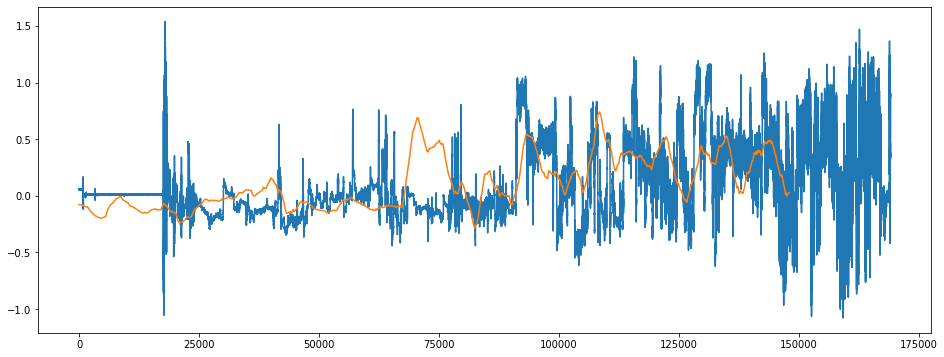

In [36]:
# g_multiplier = 0.061/1000
# dps_multiplier = 17.5/1000
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
# dataset manipulation
for path in path_list[:1]:

    df_init = pd.read_csv("/content/gdrive/MyDrive/Academic/FYP/weee-dataset/data/v1/P03/MUSE/acc.csv", names=['timestamp', 'acc_x', 'acc_y', 'acc_z'])
    df_modified = pd.read_csv("/content/gdrive/MyDrive/Academic/FYP/weee-dataset/data/v1/P03/MUSE/modified_acc_cma.csv")
    # df_modified_with_CMA = pd.read_csv(os.path.join(path, "modified_with_CMA_ACC.csv"))

    # Set the width and height of the figure
    plt.figure(figsize=(16,6))
    # Line chart showing how each person accelerometer data evolved over time 
    plt.plot(df_init.acc_x)
    plt.plot(df_modified.acc_x_avg)
    # plt.plot(df_modified_with_CMA.acc_x_avg)
    # plt.plot(df.acc_z)
    # plt.xticks(np.arange(0,len(df),len(df)//16), df.timestamp[0:len(df):len(df)//16], rotation=90)
    plt.show()

# Remove `NaN` values after central moving average

In [ ]:
moving_window_size = 100 * 60
for path in path_list[2:3]:
    # dataset manipulation

    file_path_list = glob.glob(os.path.join(path, 'modified_imu_*.csv'), recursive=True)

    for file_path in file_path_list:

        # deciding the side of the earbud
        side = 'right' if 'right' in file_path else 'left'

        df_temp = pd.read_csv(file_path)
        # print(df_temp.head())
        # df_temp.drop(df_temp.index[:moving_window_size//2-1], inplace=True)
        # df_temp.drop(df_temp.index[len(df_temp)-moving_window_size//2-1:], inplace=True)

        print(df_temp.head())

        # df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp']).dt.round('S').dt.strftime('%Y-%m-%d %H:%M:%S')

        # to_csv(df_temp, os.path.join("../../../..",
        #       VAR_ENV["dataset.path"], VAR_ENV["dataset.version"], f"P{path_list.index(path)+1:02d}", "EARBUDS", f"modified_0_rows_removed_IMU_ACC_{side}.csv"))

                          timestamp   gyro_x   gyro_y   gyro_z  acc_x_avg  \
0  2021-11-26 16:19:23.655000+00:00  -4.3400 -17.2725 -11.6200        NaN   
1  2021-11-26 16:19:23.665000+00:00  23.0475 -31.8850  -0.1575        NaN   
2  2021-11-26 16:19:23.674000+00:00  42.7000 -46.8475  12.8100        NaN   
3  2021-11-26 16:19:23.684000+00:00  46.3225 -51.1175  11.3925        NaN   
4  2021-11-26 16:19:23.694000+00:00  33.6700 -55.0200  18.7950        NaN   

   acc_y_avg  acc_z_avg  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
study_information = pd.read_csv(os.path.join("../../../..", VAR_ENV["dataset.path"], VAR_ENV["dataset.version"],"Study_Information.csv"))
activities = ["Start_Sit", "Start_Stand", "Start_Cycle1", "Start_Cycle2", "Start_Run1", "Start_Run2"]
time_windows = [2,4,6,8,10,12]



for time_window in time_windows:

    number_of_rows = 100 * time_window

    for path in path_list:
        file_path_list = glob.glob(os.path.join(path, 'modified_imu_*.csv'), recursive=True)

        for file_path in file_path_list:

            # dataset manipulation
            df_temp = pd.read_csv(file_path)

            df_temp["id"] = path_list.index(path)+1

            # deciding the side of the earbud
            side = 'right' if 'right' in file_path else 'left'

            dictionary = {
                'user_id': [],
                'start_timestamp': [],
                'end_timestamp': [],
                'session_type': [],
                'window_number': [],
                'ax_sum_values_wristband_wrist_acc': [],
                'ax_median_wristband_wrist_acc': [],
                'ax_mean_wristband_wrist_acc': [],
                'ax_length_wristband_wrist_acc': [],
                'ax_standard_deviation_wristband_wrist_acc': [],
                'ax_variance_wristband_wrist_acc': [],
                'ax_root_mean_square_wristband_wrist_acc': [],
                'ax_maximum_wristband_wrist_acc': [],
                'ax_absolute_maximum_wristband_wrist_acc': [],
                'ax_minimum_wristband_wrist_acc': [],
                'ay_sum_values_wristband_wrist_acc': [],
                'ay_median_wristband_wrist_acc': [],
                'ay_mean_wristband_wrist_acc': [],
                'ay_length_wristband_wrist_acc': [],
                'ay_standard_deviation_wristband_wrist_acc': [],
                'ay_variance_wristband_wrist_acc': [],
                'ay_root_mean_square_wristband_wrist_acc': [],
                'ay_maximum_wristband_wrist_acc': [],
                'ay_absolute_maximum_wristband_wrist_acc': [],
                'ay_minimum_wristband_wrist_acc': [],
                'az_sum_values_wristband_wrist_acc': [],
                'az_median_wristband_wrist_acc': [],
                'az_mean_wristband_wrist_acc': [],
                'az_length_wristband_wrist_acc': [],
                'az_standard_deviation_wristband_wrist_acc': [],
                'az_variance_wristband_wrist_acc': [],
                'az_root_mean_square_wristband_wrist_acc': [],
                'az_maximum_wristband_wrist_acc': [],
                'az_absolute_maximum_wristband_wrist_acc': [],
                'az_minimum_wristband_wrist_acc': [],
                'gx_sum_values_wristband_wrist_acc': [],
                'gx_median_wristband_wrist_acc': [],
                'gx_mean_wristband_wrist_acc': [],
                'gx_length_wristband_wrist_acc': [],
                'gx_standard_deviation_wristband_wrist_acc': [],
                'gx_variance_wristband_wrist_acc': [],
                'gx_root_mean_square_wristband_wrist_acc': [],
                'gx_maximum_wristband_wrist_acc': [],
                'gx_absolute_maximum_wristband_wrist_acc': [],
                'gx_minimum_wristband_wrist_acc': [],
                'gy_sum_values_wristband_wrist_acc': [],
                'gy_median_wristband_wrist_acc': [],
                'gy_mean_wristband_wrist_acc': [],
                'gy_length_wristband_wrist_acc': [],
                'gy_standard_deviation_wristband_wrist_acc': [],
                'gy_variance_wristband_wrist_acc': [],
                'gy_root_mean_square_wristband_wrist_acc': [],
                'gy_maximum_wristband_wrist_acc': [],
                'gy_absolute_maximum_wristband_wrist_acc': [],
                'gy_minimum_wristband_wrist_acc': [],
                'gz_sum_values_wristband_wrist_acc': [],
                'gz_median_wristband_wrist_acc': [],
                'gz_mean_wristband_wrist_acc': [],
                'gz_length_wristband_wrist_acc': [],
                'gz_standard_deviation_wristband_wrist_acc': [],
                'gz_variance_wristband_wrist_acc': [],
                'gz_root_mean_square_wristband_wrist_acc': [],
                'gz_maximum_wristband_wrist_acc': [],
                'gz_absolute_maximum_wristband_wrist_acc': [],
                'gz_minimum_wristband_wrist_acc': [],
            }
            start = df_temp.loc[df_temp.index[0], 'timestamp'].split('.')[0].split('+')[0]
            start_time = datetime.datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
            total_end = df_temp.loc[df_temp.index[len(df_temp)-number_of_rows], 'timestamp'].split('.')[0].split('+')[0]
            total_end_time = datetime.datetime.strptime(total_end, "%Y-%m-%d %H:%M:%S")
            current_activity_index = 0
            current_window = -1
            while start_time < total_end_time:
                row_start_time = str(start_time)

                current_starting_time_indices = df_temp.loc[df_temp['timestamp'] == str(start_time)].index
                end_time_indices = df_temp.loc[df_temp['timestamp'] == str(start_time+datetime.timedelta(seconds=time_window-1))].index

                if(len(current_starting_time_indices) > 0): 
                    current_starting_time_index = current_starting_time_indices[0]
                else:
                    start_time += datetime.timedelta(seconds=1)
                    print(start_time)
                    continue

                if(len(end_time_indices) > 0): 
                    end_time_index = end_time_indices[-1]
                else:
                    start_time += datetime.timedelta(seconds=1)
                    print(start_time)
                    continue

                end_time = datetime.datetime.strptime(df_temp.loc[end_time_index, 'timestamp'], "%Y-%m-%d %H:%M:%S")
                end = str(end_time + datetime.timedelta(seconds=1))
                row_end_time = end_time + datetime.timedelta(seconds=1)

                # new start time
                start_time = end_time + datetime.timedelta(seconds=1)
                
                if(current_activity_index == 5):
                    next_activity_start_time = total_end_time
                else:
                    next_activity_start_time = datetime.datetime.strptime(study_information[activities[current_activity_index+1]][path_list.index(path)], "%Y-%m-%d %H:%M:%S")
                if(datetime.datetime.strptime(row_start_time, "%Y-%m-%d %H:%M:%S")+datetime.timedelta(seconds=time_window-1) > next_activity_start_time):
                    # print(row_start_time, row_end_time)
                    start_time = next_activity_start_time
                    current_activity_index += 1
                    current_window = -1
                    continue
                if (row_end_time <= next_activity_start_time):
                    dictionary['session_type'].append(current_activity_index)
                    current_window += 1
                    dictionary['window_number'].append(current_window)
                elif (current_activity_index == 5):
                    dictionary['session_type'].append(5)
                    current_window += 1
                    dictionary['window_number'].append(current_window)
                else:
                    current_activity_index += 1
                    dictionary['session_type'].append(current_activity_index)
                    current_window = 0
                    dictionary['window_number'].append(current_window)
                extracted_features = extract_features(df_temp[current_starting_time_index:end_time_index+1], column_id="id", column_sort="timestamp", default_fc_parameters={
                    "sum_values": None,
                    "mean": None,
                    "median": None,
                    "length": None,
                    "standard_deviation": None,
                    "variance": None,
                    "root_mean_square": None,
                    "maximum": None,
                    "absolute_maximum": None,
                    "minimum": None,
                })
                dictionary['start_timestamp'].append(row_start_time)
                dictionary['end_timestamp'].append(end)
                dictionary['ax_sum_values_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__sum_values"][path_list.index(path)+1])
                dictionary['ax_median_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__median"][path_list.index(path)+1])
                dictionary['ax_mean_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__mean"][path_list.index(path)+1])
                dictionary['ax_length_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__length"][path_list.index(path)+1])
                dictionary['ax_standard_deviation_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__standard_deviation"][path_list.index(path)+1])
                dictionary['ax_variance_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__variance"][path_list.index(path)+1])
                dictionary['ax_root_mean_square_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__root_mean_square"][path_list.index(path)+1])
                dictionary['ax_maximum_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__maximum"][path_list.index(path)+1])
                dictionary['ax_absolute_maximum_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__absolute_maximum"][path_list.index(path)+1])
                dictionary['ax_minimum_wristband_wrist_acc'].append(
                    extracted_features["acc_x_avg__minimum"][path_list.index(path)+1])
                dictionary['ay_sum_values_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__sum_values"][path_list.index(path)+1])
                dictionary['ay_median_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__median"][path_list.index(path)+1])
                dictionary['ay_mean_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__mean"][path_list.index(path)+1])
                dictionary['ay_length_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__length"][path_list.index(path)+1])
                dictionary['ay_standard_deviation_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__standard_deviation"][path_list.index(path)+1])
                dictionary['ay_variance_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__variance"][path_list.index(path)+1])
                dictionary['ay_root_mean_square_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__root_mean_square"][path_list.index(path)+1])
                dictionary['ay_maximum_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__maximum"][path_list.index(path)+1])
                dictionary['ay_absolute_maximum_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__absolute_maximum"][path_list.index(path)+1])
                dictionary['ay_minimum_wristband_wrist_acc'].append(
                    extracted_features["acc_y_avg__minimum"][path_list.index(path)+1])
                dictionary['az_sum_values_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__sum_values"][path_list.index(path)+1])
                dictionary['az_median_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__median"][path_list.index(path)+1])
                dictionary['az_mean_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__mean"][path_list.index(path)+1])
                dictionary['az_length_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__length"][path_list.index(path)+1])
                dictionary['az_standard_deviation_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__standard_deviation"][path_list.index(path)+1])
                dictionary['az_variance_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__variance"][path_list.index(path)+1])
                dictionary['az_root_mean_square_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__root_mean_square"][path_list.index(path)+1])
                dictionary['az_maximum_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__maximum"][path_list.index(path)+1])
                dictionary['az_absolute_maximum_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__absolute_maximum"][path_list.index(path)+1])
                dictionary['az_minimum_wristband_wrist_acc'].append(
                    extracted_features["acc_z_avg__minimum"][path_list.index(path)+1])
                dictionary['gx_sum_values_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__sum_values"][path_list.index(path)+1])
                dictionary['gx_median_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__median"][path_list.index(path)+1])
                dictionary['gx_mean_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__mean"][path_list.index(path)+1])
                dictionary['gx_length_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__length"][path_list.index(path)+1])
                dictionary['gx_standard_deviation_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__standard_deviation"][path_list.index(path)+1])
                dictionary['gx_variance_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__variance"][path_list.index(path)+1])
                dictionary['gx_root_mean_square_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__root_mean_square"][path_list.index(path)+1])
                dictionary['gx_maximum_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__maximum"][path_list.index(path)+1])
                dictionary['gx_absolute_maximum_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__absolute_maximum"][path_list.index(path)+1])
                dictionary['gx_minimum_wristband_wrist_acc'].append(
                    extracted_features["gyro_x_avg__minimum"][path_list.index(path)+1])
                dictionary['gy_sum_values_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__sum_values"][path_list.index(path)+1])
                dictionary['gy_median_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__median"][path_list.index(path)+1])
                dictionary['gy_mean_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__mean"][path_list.index(path)+1])
                dictionary['gy_length_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__length"][path_list.index(path)+1])
                dictionary['gy_standard_deviation_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__standard_deviation"][path_list.index(path)+1])
                dictionary['gy_variance_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__variance"][path_list.index(path)+1])
                dictionary['gy_root_mean_square_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__root_mean_square"][path_list.index(path)+1])
                dictionary['gy_maximum_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__maximum"][path_list.index(path)+1])
                dictionary['gy_absolute_maximum_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__absolute_maximum"][path_list.index(path)+1])
                dictionary['gy_minimum_wristband_wrist_acc'].append(
                    extracted_features["gyro_y_avg__minimum"][path_list.index(path)+1])
                dictionary['gz_sum_values_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__sum_values"][path_list.index(path)+1])
                dictionary['gz_median_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__median"][path_list.index(path)+1])
                dictionary['gz_mean_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__mean"][path_list.index(path)+1])
                dictionary['gz_length_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__length"][path_list.index(path)+1])
                dictionary['gz_standard_deviation_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__standard_deviation"][path_list.index(path)+1])
                dictionary['gz_variance_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__variance"][path_list.index(path)+1])
                dictionary['gz_root_mean_square_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__root_mean_square"][path_list.index(path)+1])
                dictionary['gz_maximum_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__maximum"][path_list.index(path)+1])
                dictionary['gz_absolute_maximum_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__absolute_maximum"][path_list.index(path)+1])
                dictionary['gz_minimum_wristband_wrist_acc'].append(
                    extracted_features["gyro_z_avg__minimum"][path_list.index(path)+1])
                
                print(f'P{path_list.index(path)+1:02d}_earbuds_{side}_time_window_{time_window}-{current_starting_time_index*100/(len(df_temp)-number_of_rows)}%')
                current_starting_time_index = end_time_index + 1

            dictionary['user_id'] = [path_list.index(path)+1 for i in range(len(dictionary['session_type']))]
            df = pd.DataFrame(dictionary)

            # saving
            to_csv(df, os.path.join("../../../..",
                VAR_ENV["dataset.path"], VAR_ENV["dataset.version"], f"P{path_list.index(path)+1:02d}", "EARBUDS", f"modified_with_tsfresh_ACC_{time_window}_{side}.csv"))


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 763.87it/s]


P01_earbuds_right_time_window_2-0.0%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1574.34it/s]


P01_earbuds_right_time_window_2-0.10858273430118136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1037.85it/s]


P01_earbuds_right_time_window_2-0.21716546860236272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.87it/s]


P01_earbuds_right_time_window_2-0.32627023527999205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.30it/s]


P01_earbuds_right_time_window_2-0.4348529695811734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1326.33it/s]


P01_earbuds_right_time_window_2-0.5434357038823547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.32it/s]


P01_earbuds_right_time_window_2-0.6525404705599841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.45it/s]


P01_earbuds_right_time_window_2-0.7611232048611655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.89it/s]


P01_earbuds_right_time_window_2-0.8697059391623468%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.01it/s]


P01_earbuds_right_time_window_2-0.9788107058399762%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1267.48it/s]


P01_earbuds_right_time_window_2-1.0873934401411576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1036.10it/s]


P01_earbuds_right_time_window_2-1.195976174442339%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1313.05it/s]


P01_earbuds_right_time_window_2-1.3050809411199682%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1133.09it/s]


P01_earbuds_right_time_window_2-1.4136636754211496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.71it/s]


P01_earbuds_right_time_window_2-1.522246409722331%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.14it/s]


P01_earbuds_right_time_window_2-1.6313511763999604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.31it/s]


P01_earbuds_right_time_window_2-1.7399339107011418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.94it/s]


P01_earbuds_right_time_window_2-1.848516645002323%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.72it/s]


P01_earbuds_right_time_window_2-1.9576214116799524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.04it/s]


P01_earbuds_right_time_window_2-2.0662041459811338%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.29it/s]


P01_earbuds_right_time_window_2-2.174786880282315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.82it/s]


P01_earbuds_right_time_window_2-2.2838916469599444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.29it/s]


P01_earbuds_right_time_window_2-2.3924743812611258%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.14it/s]


P01_earbuds_right_time_window_2-2.501057115562307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.72it/s]


P01_earbuds_right_time_window_2-2.6101618822399364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.16it/s]


P01_earbuds_right_time_window_2-2.7187446165411178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1305.35it/s]


P01_earbuds_right_time_window_2-2.827327350842299%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1052.96it/s]

P01_earbuds_right_time_window_2-2.9364321175199284%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 619.33it/s]


P01_earbuds_right_time_window_2-3.0450148518211098%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 680.97it/s]


P01_earbuds_right_time_window_2-3.153597586122291%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.91it/s]


P01_earbuds_right_time_window_2-3.262702352799921%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.14it/s]


P01_earbuds_right_time_window_2-3.371285087101102%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.45it/s]


P01_earbuds_right_time_window_2-3.4798678214022836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.49it/s]


P01_earbuds_right_time_window_2-3.588972588079913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.17it/s]


P01_earbuds_right_time_window_2-3.697555322381094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.98it/s]

P01_earbuds_right_time_window_2-3.8061380566822756%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.28it/s]


P01_earbuds_right_time_window_2-3.915242823359905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.95it/s]


P01_earbuds_right_time_window_2-4.023825557661086%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.64it/s]


P01_earbuds_right_time_window_2-4.1324082919622676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.86it/s]


P01_earbuds_right_time_window_2-4.241513058639897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1054.64it/s]


P01_earbuds_right_time_window_2-4.350095792941079%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.62it/s]


P01_earbuds_right_time_window_2-4.4586785272422595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 407.27it/s]


P01_earbuds_right_time_window_2-4.567783293919889%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.91it/s]


P01_earbuds_right_time_window_2-4.676366028221071%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.45it/s]


P01_earbuds_right_time_window_2-4.7849487625222515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1048.53it/s]


P01_earbuds_right_time_window_2-4.894053529199881%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.61it/s]


P01_earbuds_right_time_window_2-5.002636263501063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.47it/s]


P01_earbuds_right_time_window_2-5.1112189978022435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.56it/s]


P01_earbuds_right_time_window_2-5.220323764479873%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.08it/s]


P01_earbuds_right_time_window_2-5.328906498781055%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.81it/s]


P01_earbuds_right_time_window_2-5.4374892330822355%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.49it/s]


P01_earbuds_right_time_window_2-5.546593999759865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.24it/s]


P01_earbuds_right_time_window_2-5.655176734061047%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.99it/s]


P01_earbuds_right_time_window_2-5.7637594683622275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.61it/s]


P01_earbuds_right_time_window_2-5.872864235039857%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.30it/s]


P01_earbuds_right_time_window_2-5.981446969341039%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.69it/s]


P01_earbuds_right_time_window_2-6.0900297036422195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 677.17it/s]

P01_earbuds_right_time_window_2-6.19913447031985%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.94it/s]


P01_earbuds_right_time_window_2-6.307717204621031%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.90it/s]


P01_earbuds_right_time_window_2-6.416299938922212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 710.32it/s]


P01_earbuds_right_time_window_2-6.525404705599842%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.89it/s]


P01_earbuds_right_time_window_2-6.633987439901023%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.00it/s]


P01_earbuds_right_time_window_2-6.742570174202204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.72it/s]


P01_earbuds_right_time_window_2-6.851674940879834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.59it/s]


P01_earbuds_right_time_window_2-6.960257675181015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.05it/s]


P01_earbuds_right_time_window_2-7.068840409482196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.69it/s]


P01_earbuds_right_time_window_2-7.177945176159826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1118.48it/s]


P01_earbuds_right_time_window_2-7.286527910461007%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 718.61it/s]


P01_earbuds_right_time_window_2-7.395110644762188%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 692.87it/s]


P01_earbuds_right_time_window_2-7.504215411439818%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.92it/s]


P01_earbuds_right_time_window_2-7.612798145740999%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.92it/s]


P01_earbuds_right_time_window_2-7.72138088004218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 615.65it/s]


P01_earbuds_right_time_window_2-7.83048564671981%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1065.63it/s]


P01_earbuds_right_time_window_2-7.9390683810209906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.14it/s]


P01_earbuds_right_time_window_2-8.047651115322171%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1066.08it/s]


P01_earbuds_right_time_window_2-8.156755881999802%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 586.10it/s]


P01_earbuds_right_time_window_2-8.265338616300983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.91it/s]


P01_earbuds_right_time_window_2-8.373921350602163%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.09it/s]


P01_earbuds_right_time_window_2-8.483026117279794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.81it/s]


P01_earbuds_right_time_window_2-8.591608851580975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.31it/s]


P01_earbuds_right_time_window_2-8.700191585882157%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.20it/s]


P01_earbuds_right_time_window_2-8.809296352559786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 708.68it/s]


P01_earbuds_right_time_window_2-8.917879086860967%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.37it/s]


P01_earbuds_right_time_window_2-9.02646182116215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 630.20it/s]


P01_earbuds_right_time_window_2-9.135566587839778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 567.26it/s]


P01_earbuds_right_time_window_2-9.24414932214096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.91it/s]


P01_earbuds_right_time_window_2-9.352732056442141%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.22it/s]

P01_earbuds_right_time_window_2-9.46183682311977%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.80it/s]

P01_earbuds_right_time_window_2-9.570419557420951%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.29it/s]


P01_earbuds_right_time_window_2-9.679002291722133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1123.83it/s]


P01_earbuds_right_time_window_2-9.788107058399762%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1122.62it/s]


P01_earbuds_right_time_window_2-9.896689792700943%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1089.15it/s]


P01_earbuds_right_time_window_2-10.005272527002125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.98it/s]


P01_earbuds_right_time_window_2-10.114377293679754%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.21it/s]


P01_earbuds_right_time_window_2-10.222960027980935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1134.67it/s]


P01_earbuds_right_time_window_2-10.331542762282117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 486.86it/s]


P01_earbuds_right_time_window_2-10.440647528959746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.28it/s]


P01_earbuds_right_time_window_2-10.549230263260927%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.83it/s]


P01_earbuds_right_time_window_2-10.65781299756211%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1141.00it/s]


P01_earbuds_right_time_window_2-10.766917764239738%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1299.02it/s]

P01_earbuds_right_time_window_2-10.87550049854092%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 763.90it/s]


P01_earbuds_right_time_window_2-10.984083232842101%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.13it/s]


P01_earbuds_right_time_window_2-11.09318799951973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.76it/s]


P01_earbuds_right_time_window_2-11.201770733820911%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1051.29it/s]

P01_earbuds_right_time_window_2-11.310353468122093%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.77it/s]


P01_earbuds_right_time_window_2-11.419458234799722%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.37it/s]


P01_earbuds_right_time_window_2-11.528040969100903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1142.97it/s]


P01_earbuds_right_time_window_2-11.636623703402085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1122.02it/s]


P01_earbuds_right_time_window_2-11.745728470079714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.30it/s]


P01_earbuds_right_time_window_2-11.854311204380895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.11it/s]


P01_earbuds_right_time_window_2-11.962893938682077%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1124.08it/s]


P01_earbuds_right_time_window_2-12.071998705359706%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1105.02it/s]


P01_earbuds_right_time_window_2-12.180581439660887%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 759.40it/s]


P01_earbuds_right_time_window_2-12.28916417396207%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1077.53it/s]


P01_earbuds_right_time_window_2-12.3982689406397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 607.61it/s]


P01_earbuds_right_time_window_2-12.50685167494088%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 532.91it/s]


P01_earbuds_right_time_window_2-12.615434409242061%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1275.90it/s]


P01_earbuds_right_time_window_2-12.724539175919691%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.77it/s]

P01_earbuds_right_time_window_2-12.833121910220871%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.80it/s]

P01_earbuds_right_time_window_2-12.941704644522053%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.27it/s]


P01_earbuds_right_time_window_2-13.050809411199683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 524.33it/s]


P01_earbuds_right_time_window_2-13.159392145500863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.24it/s]


P01_earbuds_right_time_window_2-13.267974879802045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.64it/s]


P01_earbuds_right_time_window_2-13.377079646479675%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1079.75it/s]


P01_earbuds_right_time_window_2-13.485662380780855%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.00it/s]

P01_earbuds_right_time_window_2-13.594245115082037%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.66it/s]


P01_earbuds_right_time_window_2-13.703349881759667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 683.02it/s]


P01_earbuds_right_time_window_2-13.811932616060847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.56it/s]


P01_earbuds_right_time_window_2-13.92051535036203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1155.77it/s]


P01_earbuds_right_time_window_2-14.02962011703966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.88it/s]


P01_earbuds_right_time_window_2-14.13820285134084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.89it/s]


P01_earbuds_right_time_window_2-14.246785585642021%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.29it/s]


P01_earbuds_right_time_window_2-14.355890352319651%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 468.52it/s]

P01_earbuds_right_time_window_2-14.464473086620833%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1160.57it/s]

P01_earbuds_right_time_window_2-14.573055820922013%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1255.72it/s]


P01_earbuds_right_time_window_2-14.682160587599643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.59it/s]


P01_earbuds_right_time_window_2-14.790743321900825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.86it/s]


P01_earbuds_right_time_window_2-14.899326056202005%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1096.65it/s]


P01_earbuds_right_time_window_2-15.008430822879635%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.59it/s]


P01_earbuds_right_time_window_2-15.117013557180817%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.23it/s]


P01_earbuds_right_time_window_2-15.225596291481997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1076.98it/s]


P01_earbuds_right_time_window_2-15.334701058159627%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1075.69it/s]


P01_earbuds_right_time_window_2-15.443283792460809%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 617.28it/s]


P01_earbuds_right_time_window_2-15.551866526761989%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.51it/s]


P01_earbuds_right_time_window_2-15.66097129343962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.52it/s]


P01_earbuds_right_time_window_2-15.769554027740801%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 590.90it/s]


P01_earbuds_right_time_window_2-15.878136762041981%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.75it/s]

P01_earbuds_right_time_window_2-15.987241528719611%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.67it/s]


P01_earbuds_right_time_window_2-16.09582426302079%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.57it/s]


P01_earbuds_right_time_window_2-16.204406997321975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.14it/s]


P01_earbuds_right_time_window_2-16.313511763999603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.70it/s]


P01_earbuds_right_time_window_2-16.422094498300783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1205.66it/s]


P01_earbuds_right_time_window_2-16.530677232601967%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.02it/s]


P01_earbuds_right_time_window_2-16.639781999279595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1072.71it/s]


P01_earbuds_right_time_window_2-16.748364733580775%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 499.01it/s]


P01_earbuds_right_time_window_2-16.85694746788196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.26it/s]

P01_earbuds_right_time_window_2-16.966052234559587%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 741.09it/s]


P01_earbuds_right_time_window_2-17.074634968860767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.80it/s]


P01_earbuds_right_time_window_2-17.18321770316195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 566.06it/s]


P01_earbuds_right_time_window_2-17.29232246983958%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1086.04it/s]


P01_earbuds_right_time_window_2-17.40090520414076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1106.58it/s]


P01_earbuds_right_time_window_2-17.509487938441943%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.47it/s]


P01_earbuds_right_time_window_2-17.61859270511957%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.97it/s]


P01_earbuds_right_time_window_2-17.72717543942075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.01it/s]


P01_earbuds_right_time_window_2-17.835758173721935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.48it/s]


P01_earbuds_right_time_window_2-17.944862940399563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.18it/s]


P01_earbuds_right_time_window_2-18.053445674700743%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.43it/s]


P01_earbuds_right_time_window_2-18.162028409001927%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.36it/s]


P01_earbuds_right_time_window_2-18.271133175679555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 638.32it/s]


P01_earbuds_right_time_window_2-18.379715909980735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.36it/s]


P01_earbuds_right_time_window_2-18.48829864428192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.57it/s]


P01_earbuds_right_time_window_2-18.597403410959547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.69it/s]


P01_earbuds_right_time_window_2-18.70598614526073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 595.61it/s]


P01_earbuds_right_time_window_2-18.81456887956191%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1372.63it/s]


P01_earbuds_right_time_window_2-18.92367364623954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.63it/s]


P01_earbuds_right_time_window_2-19.032256380540723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.35it/s]


P01_earbuds_right_time_window_2-19.140839114841903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.32it/s]

P01_earbuds_right_time_window_2-19.24994388151953%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.04it/s]

P01_earbuds_right_time_window_2-19.358526615820715%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.86it/s]

P01_earbuds_right_time_window_2-19.467109350121895%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.99it/s]


P01_earbuds_right_time_window_2-19.576214116799523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.54it/s]

P01_earbuds_right_time_window_2-19.684796851100707%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.03it/s]

P01_earbuds_right_time_window_2-19.793379585401887%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.31it/s]


P01_earbuds_right_time_window_2-19.902484352079515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1068.11it/s]


P01_earbuds_right_time_window_2-20.0110670863807%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.87it/s]


P01_earbuds_right_time_window_2-20.11964982068188%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 408.33it/s]

P01_earbuds_right_time_window_2-20.228754587359507%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.84it/s]

P01_earbuds_right_time_window_2-20.33733732166069%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.72it/s]


P01_earbuds_right_time_window_2-20.44592005596187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.12it/s]


P01_earbuds_right_time_window_2-20.5550248226395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 571.65it/s]


P01_earbuds_right_time_window_2-20.663607556940683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1169.04it/s]


P01_earbuds_right_time_window_2-20.772190291241863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.19it/s]

P01_earbuds_right_time_window_2-20.88129505791949%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.89it/s]

P01_earbuds_right_time_window_2-20.989877792220675%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.15it/s]


P01_earbuds_right_time_window_2-21.098460526521855%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 682.80it/s]


P01_earbuds_right_time_window_2-21.207565293199483%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.75it/s]


P01_earbuds_right_time_window_2-21.316148027500667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.19it/s]

P01_earbuds_right_time_window_2-21.424730761801847%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1079.20it/s]


P01_earbuds_right_time_window_2-21.533835528479475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.15it/s]


P01_earbuds_right_time_window_2-21.64241826278066%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1075.65it/s]


P01_earbuds_right_time_window_2-21.75100099708184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 586.77it/s]

P01_earbuds_right_time_window_2-21.860105763759467%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1183.16it/s]


P01_earbuds_right_time_window_2-21.96868849806065%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.98it/s]


P01_earbuds_right_time_window_2-22.07727123236183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.03it/s]

P01_earbuds_right_time_window_2-22.18637599903946%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.39it/s]

P01_earbuds_right_time_window_2-22.294958733340643%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1324.31it/s]

P01_earbuds_right_time_window_2-22.403541467641823%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.09it/s]


P01_earbuds_right_time_window_2-22.51264623431945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.58it/s]


P01_earbuds_right_time_window_2-22.621228968620635%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.57it/s]


P01_earbuds_right_time_window_2-22.729811702921815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1196.49it/s]


P01_earbuds_right_time_window_2-22.838916469599443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1097.41it/s]


P01_earbuds_right_time_window_2-22.947499203900627%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.75it/s]

P01_earbuds_right_time_window_2-23.056081938201807%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.58it/s]


P01_earbuds_right_time_window_2-23.165186704879435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.33it/s]


P01_earbuds_right_time_window_2-23.27376943918062%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.05it/s]

P01_earbuds_right_time_window_2-23.3823521734818%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 699.44it/s]

P01_earbuds_right_time_window_2-23.491456940159427%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.00it/s]


P01_earbuds_right_time_window_2-23.60003967446061%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.80it/s]


P01_earbuds_right_time_window_2-23.70862240876179%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.06it/s]


P01_earbuds_right_time_window_2-23.81772717543942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.29it/s]


P01_earbuds_right_time_window_2-23.926309909740603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.56it/s]

P01_earbuds_right_time_window_2-24.034892644041783%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.46it/s]

P01_earbuds_right_time_window_2-24.14399741071941%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1129.22it/s]


P01_earbuds_right_time_window_2-24.252580145020595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.51it/s]


P01_earbuds_right_time_window_2-24.361162879321775%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.54it/s]


P01_earbuds_right_time_window_2-24.470267645999407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.86it/s]


P01_earbuds_right_time_window_2-24.578850380300587%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1125.08it/s]


P01_earbuds_right_time_window_2-24.687433114601767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 522.41it/s]


P01_earbuds_right_time_window_2-24.7965378812794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.50it/s]


P01_earbuds_right_time_window_2-24.90512061558058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.56it/s]


P01_earbuds_right_time_window_2-25.01370334988176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.63it/s]


P01_earbuds_right_time_window_2-25.12280811655939%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.10it/s]


P01_earbuds_right_time_window_2-25.23139085086057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.95it/s]

P01_earbuds_right_time_window_2-25.33997358516175%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.42it/s]


P01_earbuds_right_time_window_2-25.449078351839383%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.79it/s]


P01_earbuds_right_time_window_2-25.557661086140563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.33it/s]

P01_earbuds_right_time_window_2-25.666243820441743%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.56it/s]


P01_earbuds_right_time_window_2-25.775348587119375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 759.68it/s]


P01_earbuds_right_time_window_2-25.883931321420555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.28it/s]

P01_earbuds_right_time_window_2-25.992514055721735%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.79it/s]


P01_earbuds_right_time_window_2-26.101618822399367%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 776.15it/s]


P01_earbuds_right_time_window_2-26.210201556700547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.19it/s]


P01_earbuds_right_time_window_2-26.318784291001727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.00it/s]


P01_earbuds_right_time_window_2-26.42788905767936%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.47it/s]


P01_earbuds_right_time_window_2-26.53647179198054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.67it/s]


P01_earbuds_right_time_window_2-26.64505452628172%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.32it/s]

P01_earbuds_right_time_window_2-26.75415929295935%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.81it/s]


P01_earbuds_right_time_window_2-26.86274202726053%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1110.88it/s]


P01_earbuds_right_time_window_2-26.97132476156171%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.53it/s]


P01_earbuds_right_time_window_2-27.080429528239343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.91it/s]


P01_earbuds_right_time_window_2-27.189012262540523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.76it/s]


P01_earbuds_right_time_window_2-27.297594996841703%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 565.08it/s]


P01_earbuds_right_time_window_2-27.406699763519335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.02it/s]


P01_earbuds_right_time_window_2-27.515282497820515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.23it/s]


P01_earbuds_right_time_window_2-27.623865232121695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1092.41it/s]


P01_earbuds_right_time_window_2-27.732969998799327%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.65it/s]


P01_earbuds_right_time_window_2-27.841552733100507%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1165.35it/s]


P01_earbuds_right_time_window_2-27.950135467401687%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1143.80it/s]


P01_earbuds_right_time_window_2-28.05924023407932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 611.70it/s]


P01_earbuds_right_time_window_2-28.1678229683805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1152.70it/s]


P01_earbuds_right_time_window_2-28.27640570268168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.52it/s]

P01_earbuds_right_time_window_2-28.38551046935931%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.66it/s]


P01_earbuds_right_time_window_2-28.49409320366049%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1065.49it/s]

P01_earbuds_right_time_window_2-28.60267593796167%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.72it/s]


P01_earbuds_right_time_window_2-28.711780704639303%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.41it/s]


P01_earbuds_right_time_window_2-28.820363438940483%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.46it/s]


P01_earbuds_right_time_window_2-28.928946173241666%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.77it/s]


P01_earbuds_right_time_window_2-29.038050939919295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.86it/s]


P01_earbuds_right_time_window_2-29.146633674220475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 500.01it/s]


P01_earbuds_right_time_window_2-29.255216408521658%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.99it/s]

P01_earbuds_right_time_window_2-29.364321175199287%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.75it/s]

P01_earbuds_right_time_window_2-29.472903909500467%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.61it/s]


P01_earbuds_right_time_window_2-29.58148664380165%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1157.32it/s]


P01_earbuds_right_time_window_2-29.69059141047928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.91it/s]

P01_earbuds_right_time_window_2-29.79917414478046%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 528.92it/s]


P01_earbuds_right_time_window_2-29.907756879081642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.72it/s]


P01_earbuds_right_time_window_2-30.01686164575927%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1283.51it/s]


P01_earbuds_right_time_window_2-30.12544438006045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.92it/s]


P01_earbuds_right_time_window_2-30.234027114361634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1206.94it/s]


P01_earbuds_right_time_window_2-30.343131881039263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.79it/s]


P01_earbuds_right_time_window_2-30.451714615340443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1066.98it/s]

P01_earbuds_right_time_window_2-30.560297349641626%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.75it/s]

P01_earbuds_right_time_window_2-30.669402116319255%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 699.36it/s]


P01_earbuds_right_time_window_2-30.777984850620435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.04it/s]


P01_earbuds_right_time_window_2-30.886567584921618%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1151.39it/s]


P01_earbuds_right_time_window_2-30.995672351599246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 662.12it/s]


P01_earbuds_right_time_window_2-31.104255085900427%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.03it/s]

P01_earbuds_right_time_window_2-31.21283782020161%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 620.54it/s]


P01_earbuds_right_time_window_2-31.32194258687924%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.08it/s]


P01_earbuds_right_time_window_2-31.43052532118042%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.77it/s]


P01_earbuds_right_time_window_2-31.539108055481602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1090.56it/s]


P01_earbuds_right_time_window_2-31.64821282215923%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 759.01it/s]


P01_earbuds_right_time_window_2-31.75679555646041%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 496.90it/s]


P01_earbuds_right_time_window_2-31.865378290761594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.59it/s]


P01_earbuds_right_time_window_2-31.974483057439222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.57it/s]


P01_earbuds_right_time_window_2-32.0830657917404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.99it/s]


P01_earbuds_right_time_window_2-32.19164852604158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.56it/s]


P01_earbuds_right_time_window_2-32.300753292719214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1153.34it/s]


P01_earbuds_right_time_window_2-32.409336027020395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.59it/s]


P01_earbuds_right_time_window_2-32.517918761321575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.83it/s]


P01_earbuds_right_time_window_2-32.62702352799921%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.68it/s]

P01_earbuds_right_time_window_2-32.73560626230039%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1212.23it/s]


P01_earbuds_right_time_window_2-32.84418899660157%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.74it/s]


P01_earbuds_right_time_window_2-32.9532937632792%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 467.29it/s]


P01_earbuds_right_time_window_2-33.06187649758038%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.82it/s]

P01_earbuds_right_time_window_2-33.17045923188156%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1129.88it/s]


P01_earbuds_right_time_window_2-33.27956399855919%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.16it/s]


P01_earbuds_right_time_window_2-33.38814673286037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.45it/s]


P01_earbuds_right_time_window_2-33.49672946716155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.16it/s]


P01_earbuds_right_time_window_2-33.60583423383918%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1207.46it/s]


P01_earbuds_right_time_window_2-33.71441696814036%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.01it/s]


P01_earbuds_right_time_window_2-33.82299970244154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.32it/s]


P01_earbuds_right_time_window_2-33.932104469119174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.02it/s]


P01_earbuds_right_time_window_2-34.040687203420354%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1062.79it/s]

P01_earbuds_right_time_window_2-34.149269937721535%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.40it/s]


P01_earbuds_right_time_window_2-34.258374704399166%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.14it/s]


P01_earbuds_right_time_window_2-34.36695743870035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.19it/s]


P01_earbuds_right_time_window_2-34.47554017300153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1034.18it/s]


P01_earbuds_right_time_window_2-34.58464493967916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.52it/s]


P01_earbuds_right_time_window_2-34.69322767398034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.84it/s]


P01_earbuds_right_time_window_2-34.80181040828152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.40it/s]


P01_earbuds_right_time_window_2-34.91091517495915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.90it/s]


P01_earbuds_right_time_window_2-35.01949790926033%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.86it/s]


P01_earbuds_right_time_window_2-35.12808064356151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.64it/s]

P01_earbuds_right_time_window_2-35.23718541023914%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.92it/s]


P01_earbuds_right_time_window_2-35.34576814454032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.50it/s]


P01_earbuds_right_time_window_2-35.4543508788415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.61it/s]


P01_earbuds_right_time_window_2-35.563455645519134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.30it/s]


P01_earbuds_right_time_window_2-35.672038379820314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1107.70it/s]


P01_earbuds_right_time_window_2-35.780621114121494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1152.18it/s]

P01_earbuds_right_time_window_2-35.889725880799126%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.50it/s]


P01_earbuds_right_time_window_2-35.998308615100306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.72it/s]

P01_earbuds_right_time_window_2-36.10689134940149%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.39it/s]

P01_earbuds_right_time_window_2-36.21599611607912%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1074.31it/s]


P01_earbuds_right_time_window_2-36.3245788503803%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.99it/s]


P01_earbuds_right_time_window_2-36.43316158468148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1103.04it/s]


P01_earbuds_right_time_window_2-36.54226635135911%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 526.24it/s]


P01_earbuds_right_time_window_2-36.65084908566029%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.97it/s]


P01_earbuds_right_time_window_2-36.75943181996147%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.10it/s]


P01_earbuds_right_time_window_2-36.8685365866391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.80it/s]


P01_earbuds_right_time_window_2-36.97711932094028%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.31it/s]


P01_earbuds_right_time_window_2-37.08570205524147%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.06it/s]

P01_earbuds_right_time_window_2-37.194806821919094%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.48it/s]


P01_earbuds_right_time_window_2-37.303389556220274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.23it/s]


P01_earbuds_right_time_window_2-37.41197229052146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.90it/s]


P01_earbuds_right_time_window_2-37.521077057199086%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 548.23it/s]


P01_earbuds_right_time_window_2-37.629659791500266%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 604.21it/s]


P01_earbuds_right_time_window_2-37.738242525801454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.76it/s]


P01_earbuds_right_time_window_2-37.84734729247908%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.28it/s]


P01_earbuds_right_time_window_2-37.95593002678026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.33it/s]


P01_earbuds_right_time_window_2-38.064512761081446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.33it/s]


P01_earbuds_right_time_window_2-38.17361752775907%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.86it/s]


P01_earbuds_right_time_window_2-38.28220026206025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.24it/s]

P01_earbuds_right_time_window_2-38.39078299636144%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1146.19it/s]


P01_earbuds_right_time_window_2-38.49988776303906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.43it/s]


P01_earbuds_right_time_window_2-38.60847049734024%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.16it/s]


P01_earbuds_right_time_window_2-38.71705323164143%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.77it/s]


P01_earbuds_right_time_window_2-38.826157998319054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 482.25it/s]


P01_earbuds_right_time_window_2-38.934740732620234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.45it/s]


P01_earbuds_right_time_window_2-39.04332346692142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.20it/s]


P01_earbuds_right_time_window_2-39.152428233599046%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.33it/s]


P01_earbuds_right_time_window_2-39.261010967900226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.60it/s]


P01_earbuds_right_time_window_2-39.36959370220141%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 763.11it/s]


P01_earbuds_right_time_window_2-39.47869846887904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.98it/s]


P01_earbuds_right_time_window_2-39.58728120318022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 777.32it/s]


P01_earbuds_right_time_window_2-39.695863937481406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 567.89it/s]


P01_earbuds_right_time_window_2-39.80496870415903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.22it/s]


P01_earbuds_right_time_window_2-39.91355143846021%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.77it/s]


P01_earbuds_right_time_window_2-40.0221341727614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.84it/s]


P01_earbuds_right_time_window_2-40.13123893943902%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.78it/s]


P01_earbuds_right_time_window_2-40.2398216737402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.08it/s]


P01_earbuds_right_time_window_2-40.34840440804139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 820.19it/s]


P01_earbuds_right_time_window_2-40.457509174719014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.69it/s]


P01_earbuds_right_time_window_2-40.566091909020194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.04it/s]


P01_earbuds_right_time_window_2-40.67467464332138%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.19it/s]


P01_earbuds_right_time_window_2-40.783779409999006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.34it/s]


P01_earbuds_right_time_window_2-40.892362144300186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.80it/s]


P01_earbuds_right_time_window_2-41.00094487860137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.24it/s]


P01_earbuds_right_time_window_2-41.110049645279%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.22it/s]


P01_earbuds_right_time_window_2-41.21863237958018%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1133.75it/s]


P01_earbuds_right_time_window_2-41.327215113881365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.96it/s]


P01_earbuds_right_time_window_2-41.43631988055899%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.45it/s]


P01_earbuds_right_time_window_2-41.54490261486017%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.45it/s]


P01_earbuds_right_time_window_2-41.65348534916136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.66it/s]


P01_earbuds_right_time_window_2-41.76259011583898%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.39it/s]


P01_earbuds_right_time_window_2-41.87117285014016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 582.60it/s]


P01_earbuds_right_time_window_2-41.97975558444135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.67it/s]


P01_earbuds_right_time_window_2-42.088860351118974%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.20it/s]


P01_earbuds_right_time_window_2-42.197443085420154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.85it/s]


P01_earbuds_right_time_window_2-42.30602581972134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.43it/s]


P01_earbuds_right_time_window_2-42.415130586398966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 617.35it/s]


P01_earbuds_right_time_window_2-42.523713320700146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.50it/s]


P01_earbuds_right_time_window_2-42.63229605500133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 768.38it/s]


P01_earbuds_right_time_window_2-42.74140082167896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1066.89it/s]


P01_earbuds_right_time_window_2-42.849983555980145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 481.45it/s]


P01_earbuds_right_time_window_2-42.958566290281325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.82it/s]


P01_earbuds_right_time_window_2-43.06767105695895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.14it/s]


P01_earbuds_right_time_window_2-43.17625379126014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1135.03it/s]


P01_earbuds_right_time_window_2-43.28483652556132%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.92it/s]


P01_earbuds_right_time_window_2-43.39394129223894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.77it/s]


P01_earbuds_right_time_window_2-43.50252402654013%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.76it/s]


P01_earbuds_right_time_window_2-43.61110676084131%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.14it/s]


P01_earbuds_right_time_window_2-43.720211527518934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.28it/s]


P01_earbuds_right_time_window_2-43.82879426182012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.71it/s]


P01_earbuds_right_time_window_2-43.9373769961213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.02it/s]


P01_earbuds_right_time_window_2-44.046481762798926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.27it/s]


P01_earbuds_right_time_window_2-44.15506449710011%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.02it/s]


P01_earbuds_right_time_window_2-44.26364723140129%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.02it/s]


P01_earbuds_right_time_window_2-44.37275199807892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.70it/s]


P01_earbuds_right_time_window_2-44.48081270000365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.97it/s]


P01_earbuds_right_time_window_2-44.58939543430483%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 677.78it/s]


P01_earbuds_right_time_window_2-44.698500200982465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 495.98it/s]


P01_earbuds_right_time_window_2-44.807082935283645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.88it/s]


P01_earbuds_right_time_window_2-44.915665669584826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.46it/s]


P01_earbuds_right_time_window_2-45.02477043626246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 468.93it/s]


P01_earbuds_right_time_window_2-45.13335317056364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.58it/s]


P01_earbuds_right_time_window_2-45.24193590486482%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.74it/s]


P01_earbuds_right_time_window_2-45.35104067154245%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.46it/s]

P01_earbuds_right_time_window_2-45.45962340584363%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 603.77it/s]


P01_earbuds_right_time_window_2-45.56820614014481%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.79it/s]


P01_earbuds_right_time_window_2-45.67731090682244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.99it/s]


P01_earbuds_right_time_window_2-45.78589364112362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.94it/s]


P01_earbuds_right_time_window_2-45.8944763754248%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.42it/s]


P01_earbuds_right_time_window_2-46.00358114210243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.88it/s]


P01_earbuds_right_time_window_2-46.11216387640361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.51it/s]


P01_earbuds_right_time_window_2-46.22074661070479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1067.07it/s]


P01_earbuds_right_time_window_2-46.329851377382425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.97it/s]


P01_earbuds_right_time_window_2-46.438434111683605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.36it/s]


P01_earbuds_right_time_window_2-46.547016845984786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.42it/s]


P01_earbuds_right_time_window_2-46.65612161266242%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.58it/s]


P01_earbuds_right_time_window_2-46.7647043469636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.87it/s]


P01_earbuds_right_time_window_2-46.87328708126478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.22it/s]


P01_earbuds_right_time_window_2-46.98239184794241%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.65it/s]


P01_earbuds_right_time_window_2-47.09097458224359%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.32it/s]


P01_earbuds_right_time_window_2-47.19955731654477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1257.85it/s]


P01_earbuds_right_time_window_2-47.3086620832224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.14it/s]


P01_earbuds_right_time_window_2-47.41724481752358%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.47it/s]


P01_earbuds_right_time_window_2-47.52582755182476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.46it/s]


P01_earbuds_right_time_window_2-47.63493231850239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.96it/s]


P01_earbuds_right_time_window_2-47.74351505280357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.93it/s]


P01_earbuds_right_time_window_2-47.85209778710475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.78it/s]


P01_earbuds_right_time_window_2-47.961202553782385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.90it/s]


P01_earbuds_right_time_window_2-48.069785288083565%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.15it/s]


P01_earbuds_right_time_window_2-48.178368022384745%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.09it/s]


P01_earbuds_right_time_window_2-48.28747278906238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.90it/s]

P01_earbuds_right_time_window_2-48.39605552336356%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 725.28it/s]


P01_earbuds_right_time_window_2-48.50463825766474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 684.80it/s]


P01_earbuds_right_time_window_2-48.61374302434237%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.67it/s]


P01_earbuds_right_time_window_2-48.72232575864355%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.30it/s]


P01_earbuds_right_time_window_2-48.83090849294473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.41it/s]


P01_earbuds_right_time_window_2-48.94001325962236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.40it/s]


P01_earbuds_right_time_window_2-49.04859599392354%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1159.13it/s]

P01_earbuds_right_time_window_2-49.15717872822472%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.17it/s]


P01_earbuds_right_time_window_2-49.26628349490235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.41it/s]


P01_earbuds_right_time_window_2-49.37486622920353%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.11it/s]


P01_earbuds_right_time_window_2-49.48344896350471%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.72it/s]


P01_earbuds_right_time_window_2-49.592553730182345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 740.52it/s]


P01_earbuds_right_time_window_2-49.701136464483525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1183.83it/s]


P01_earbuds_right_time_window_2-49.809719198784705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.91it/s]


P01_earbuds_right_time_window_2-49.91882396546234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1168.87it/s]


P01_earbuds_right_time_window_2-50.02740669976352%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 574.80it/s]

P01_earbuds_right_time_window_2-50.1359894340647%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.01it/s]


P01_earbuds_right_time_window_2-50.24509420074233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.76it/s]


P01_earbuds_right_time_window_2-50.35367693504351%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.28it/s]


P01_earbuds_right_time_window_2-50.46225966934469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.46it/s]


P01_earbuds_right_time_window_2-50.57136443602232%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.28it/s]


P01_earbuds_right_time_window_2-50.6799471703235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.13it/s]


P01_earbuds_right_time_window_2-50.78852990462468%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.42it/s]


P01_earbuds_right_time_window_2-50.89763467130231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.39it/s]


P01_earbuds_right_time_window_2-51.00621740560349%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.14it/s]


P01_earbuds_right_time_window_2-51.11480013990467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.71it/s]


P01_earbuds_right_time_window_2-51.223904906582305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1166.33it/s]


P01_earbuds_right_time_window_2-51.332487640883485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.74it/s]


P01_earbuds_right_time_window_2-51.441070375184665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.26it/s]


P01_earbuds_right_time_window_2-51.5501751418623%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.37it/s]


P01_earbuds_right_time_window_2-51.65875787616348%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.19it/s]


P01_earbuds_right_time_window_2-51.767340610464665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.51it/s]


P01_earbuds_right_time_window_2-51.87644537714229%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 804.10it/s]


P01_earbuds_right_time_window_2-51.98502811144347%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.84it/s]


P01_earbuds_right_time_window_2-52.09361084574466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.58it/s]


P01_earbuds_right_time_window_2-52.20271561242228%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.59it/s]


P01_earbuds_right_time_window_2-52.31129834672346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.37it/s]


P01_earbuds_right_time_window_2-52.41988108102465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.92it/s]


P01_earbuds_right_time_window_2-52.52898584770227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.02it/s]


P01_earbuds_right_time_window_2-52.63756858200345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.15it/s]


P01_earbuds_right_time_window_2-52.74615131630464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.27it/s]


P01_earbuds_right_time_window_2-52.855256082982265%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.78it/s]


P01_earbuds_right_time_window_2-52.963838817283445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.94it/s]


P01_earbuds_right_time_window_2-53.07242155158463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1113.63it/s]


P01_earbuds_right_time_window_2-53.18152631826226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.54it/s]


P01_earbuds_right_time_window_2-53.29010905256344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.37it/s]


P01_earbuds_right_time_window_2-53.398691786864624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.83it/s]


P01_earbuds_right_time_window_2-53.50779655354225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.62it/s]


P01_earbuds_right_time_window_2-53.61637928784343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 494.27it/s]


P01_earbuds_right_time_window_2-53.72496202214462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.66it/s]


P01_earbuds_right_time_window_2-53.83406678882224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 545.46it/s]


P01_earbuds_right_time_window_2-53.94264952312342%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.95it/s]


P01_earbuds_right_time_window_2-54.05123225742461%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.51it/s]


P01_earbuds_right_time_window_2-54.16033702410223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 565.69it/s]


P01_earbuds_right_time_window_2-54.26891975840341%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 746.92it/s]


P01_earbuds_right_time_window_2-54.3775024927046%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.15it/s]


P01_earbuds_right_time_window_2-54.486607259382225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.14it/s]


P01_earbuds_right_time_window_2-54.595189993683405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.08it/s]


P01_earbuds_right_time_window_2-54.70377272798459%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.01it/s]


P01_earbuds_right_time_window_2-54.81287749466222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1211.70it/s]


P01_earbuds_right_time_window_2-54.9214602289634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.73it/s]


P01_earbuds_right_time_window_2-55.030042963264584%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.74it/s]


P01_earbuds_right_time_window_2-55.13914772994221%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.95it/s]


P01_earbuds_right_time_window_2-55.24773046424339%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.94it/s]


P01_earbuds_right_time_window_2-55.356313198544576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1063.78it/s]


P01_earbuds_right_time_window_2-55.4654179652222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.16it/s]


P01_earbuds_right_time_window_2-55.57400069952338%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1176.74it/s]


P01_earbuds_right_time_window_2-55.68258343382457%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 636.03it/s]


P01_earbuds_right_time_window_2-55.79168820050219%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 463.39it/s]


P01_earbuds_right_time_window_2-55.90027093480337%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.24it/s]


P01_earbuds_right_time_window_2-56.00885366910456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.87it/s]


P01_earbuds_right_time_window_2-56.117958435782185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.55it/s]


P01_earbuds_right_time_window_2-56.226541170083365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.05it/s]


P01_earbuds_right_time_window_2-56.33512390438455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.97it/s]


P01_earbuds_right_time_window_2-56.44422867106218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.25it/s]


P01_earbuds_right_time_window_2-56.55281140536336%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.29it/s]


P01_earbuds_right_time_window_2-56.661394139664544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.24it/s]


P01_earbuds_right_time_window_2-56.77049890634217%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.76it/s]


P01_earbuds_right_time_window_2-56.87908164064335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 521.69it/s]


P01_earbuds_right_time_window_2-56.987664374944536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.04it/s]


P01_earbuds_right_time_window_2-57.09676914162216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 457.12it/s]


P01_earbuds_right_time_window_2-57.20535187592334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1160.95it/s]


P01_earbuds_right_time_window_2-57.31393461022453%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.62it/s]


P01_earbuds_right_time_window_2-57.42303937690215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.41it/s]


P01_earbuds_right_time_window_2-57.53162211120334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.51it/s]


P01_earbuds_right_time_window_2-57.64020484550452%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.49it/s]


P01_earbuds_right_time_window_2-57.749309612182145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.25it/s]


P01_earbuds_right_time_window_2-57.85789234648333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.88it/s]


P01_earbuds_right_time_window_2-57.96647508078451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.19it/s]


P01_earbuds_right_time_window_2-58.07557984746214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.68it/s]


P01_earbuds_right_time_window_2-58.184162581763324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.35it/s]


P01_earbuds_right_time_window_2-58.292745316064504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.17it/s]


P01_earbuds_right_time_window_2-58.40185008274213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1157.85it/s]


P01_earbuds_right_time_window_2-58.510432817043316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.26it/s]


P01_earbuds_right_time_window_2-58.619015551344496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.08it/s]


P01_earbuds_right_time_window_2-58.72812031802212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.76it/s]


P01_earbuds_right_time_window_2-58.83670305232331%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1058.10it/s]


P01_earbuds_right_time_window_2-58.94528578662449%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.69it/s]


P01_earbuds_right_time_window_2-59.05439055330211%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 620.86it/s]


P01_earbuds_right_time_window_2-59.1629732876033%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.29it/s]


P01_earbuds_right_time_window_2-59.27155602190448%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 513.46it/s]


P01_earbuds_right_time_window_2-59.380660788582105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 710.54it/s]


P01_earbuds_right_time_window_2-59.48924352288329%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.86it/s]


P01_earbuds_right_time_window_2-59.59782625718447%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.97it/s]


P01_earbuds_right_time_window_2-59.7069310238621%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1130.49it/s]


P01_earbuds_right_time_window_2-59.815513758163284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.49it/s]


P01_earbuds_right_time_window_2-59.924096492464464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.05it/s]


P01_earbuds_right_time_window_2-60.03320125914209%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.26it/s]


P01_earbuds_right_time_window_2-60.141783993443276%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.16it/s]


P01_earbuds_right_time_window_2-60.250366727744456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.52it/s]


P01_earbuds_right_time_window_2-60.35947149442208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.05it/s]


P01_earbuds_right_time_window_2-60.46805422872327%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.12it/s]


P01_earbuds_right_time_window_2-60.57663696302445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.63it/s]


P01_earbuds_right_time_window_2-60.68574172970207%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.77it/s]


P01_earbuds_right_time_window_2-60.79432446400326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.09it/s]


P01_earbuds_right_time_window_2-60.90290719830444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.29it/s]


P01_earbuds_right_time_window_2-61.012011964982065%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.63it/s]


P01_earbuds_right_time_window_2-61.12059469928325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 683.89it/s]


P01_earbuds_right_time_window_2-61.22917743358443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 688.08it/s]


P01_earbuds_right_time_window_2-61.33828220026206%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.72it/s]


P01_earbuds_right_time_window_2-61.446864934563244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 567.80it/s]


P01_earbuds_right_time_window_2-61.555447668864424%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.13it/s]


P01_earbuds_right_time_window_2-61.66455243554205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.80it/s]


P01_earbuds_right_time_window_2-61.773135169843236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1072.67it/s]


P01_earbuds_right_time_window_2-61.881717904144416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.55it/s]


P01_earbuds_right_time_window_2-61.99082267082204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 411.25it/s]


P01_earbuds_right_time_window_2-62.09940540512323%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.36it/s]


P01_earbuds_right_time_window_2-62.20798813942441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.19it/s]


P01_earbuds_right_time_window_2-62.31709290610203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.66it/s]


P01_earbuds_right_time_window_2-62.42567564040322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.75it/s]


P01_earbuds_right_time_window_2-62.5342583747044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.82it/s]


P01_earbuds_right_time_window_2-62.643363141382025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.29it/s]


P01_earbuds_right_time_window_2-62.75194587568321%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.18it/s]


P01_earbuds_right_time_window_2-62.86052860998439%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.97it/s]


P01_earbuds_right_time_window_2-62.96963337666202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.15it/s]


P01_earbuds_right_time_window_2-63.078216110963204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1236.53it/s]


P01_earbuds_right_time_window_2-63.186798845264384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 623.26it/s]


P01_earbuds_right_time_window_2-63.29590361194201%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.52it/s]


P01_earbuds_right_time_window_2-63.404486346243196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.36it/s]


P01_earbuds_right_time_window_2-63.513069080544376%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.43it/s]


P01_earbuds_right_time_window_2-63.62217384722201%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.00it/s]


P01_earbuds_right_time_window_2-63.73075658152319%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.25it/s]


P01_earbuds_right_time_window_2-63.83933931582437%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.86it/s]


P01_earbuds_right_time_window_2-63.948444082502%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 547.93it/s]


P01_earbuds_right_time_window_2-64.05702681680317%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 804.59it/s]


P01_earbuds_right_time_window_2-64.16560955110435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.95it/s]


P01_earbuds_right_time_window_2-64.27471431778199%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 617.96it/s]


P01_earbuds_right_time_window_2-64.38329705208317%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1070.98it/s]


P01_earbuds_right_time_window_2-64.49187978638435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1062.34it/s]


P01_earbuds_right_time_window_2-64.60098455306198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.42it/s]


P01_earbuds_right_time_window_2-64.70956728736316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.39it/s]


P01_earbuds_right_time_window_2-64.81815002166434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.08it/s]


P01_earbuds_right_time_window_2-64.92725478834197%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.32it/s]


P01_earbuds_right_time_window_2-65.03583752264315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.55it/s]


P01_earbuds_right_time_window_2-65.14442025694433%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.92it/s]


P01_earbuds_right_time_window_2-65.25352502362196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.78it/s]


P01_earbuds_right_time_window_2-65.36210775792314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.70it/s]


P01_earbuds_right_time_window_2-65.47069049222432%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.03it/s]


P01_earbuds_right_time_window_2-65.57979525890195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.16it/s]


P01_earbuds_right_time_window_2-65.68837799320313%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1059.61it/s]


P01_earbuds_right_time_window_2-65.79696072750431%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.94it/s]


P01_earbuds_right_time_window_2-65.90606549418195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 662.36it/s]


P01_earbuds_right_time_window_2-66.01464822848313%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.23it/s]


P01_earbuds_right_time_window_2-66.1232309627843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.45it/s]


P01_earbuds_right_time_window_2-66.23233572946194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.72it/s]


P01_earbuds_right_time_window_2-66.34091846376312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.14it/s]


P01_earbuds_right_time_window_2-66.4495011980643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.88it/s]


P01_earbuds_right_time_window_2-66.55860596474193%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.70it/s]


P01_earbuds_right_time_window_2-66.66718869904311%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.04it/s]


P01_earbuds_right_time_window_2-66.77577143334429%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1041.72it/s]


P01_earbuds_right_time_window_2-66.88487620002192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 660.83it/s]


P01_earbuds_right_time_window_2-66.9934589343231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.64it/s]


P01_earbuds_right_time_window_2-67.10204166862428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.77it/s]


P01_earbuds_right_time_window_2-67.21114643530191%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.05it/s]


P01_earbuds_right_time_window_2-67.3197291696031%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 446.78it/s]


P01_earbuds_right_time_window_2-67.42831190390427%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1140.22it/s]


P01_earbuds_right_time_window_2-67.5374166705819%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.71it/s]


P01_earbuds_right_time_window_2-67.64599940488309%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.18it/s]


P01_earbuds_right_time_window_2-67.75458213918428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.05it/s]


P01_earbuds_right_time_window_2-67.8636869058619%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.41it/s]


P01_earbuds_right_time_window_2-67.97226964016308%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.14it/s]


P01_earbuds_right_time_window_2-68.08085237446427%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.62it/s]


P01_earbuds_right_time_window_2-68.18995714114189%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.95it/s]


P01_earbuds_right_time_window_2-68.29853987544307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.54it/s]


P01_earbuds_right_time_window_2-68.40712260974426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.76it/s]


P01_earbuds_right_time_window_2-68.51622737642188%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.38it/s]


P01_earbuds_right_time_window_2-68.62481011072306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 587.89it/s]


P01_earbuds_right_time_window_2-68.73339284502426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.70it/s]


P01_earbuds_right_time_window_2-68.84249761170187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1051.42it/s]


P01_earbuds_right_time_window_2-68.95108034600305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.15it/s]


P01_earbuds_right_time_window_2-69.05966308030425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.48it/s]


P01_earbuds_right_time_window_2-69.16876784698186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 539.60it/s]


P01_earbuds_right_time_window_2-69.27735058128305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 670.00it/s]


P01_earbuds_right_time_window_2-69.38593331558424%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.49it/s]


P01_earbuds_right_time_window_2-69.49503808226186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.36it/s]


P01_earbuds_right_time_window_2-69.60362081656304%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.29it/s]


P01_earbuds_right_time_window_2-69.71220355086423%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.45it/s]


P01_earbuds_right_time_window_2-69.82130831754185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.47it/s]


P01_earbuds_right_time_window_2-69.92989105184303%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.19it/s]


P01_earbuds_right_time_window_2-70.03847378614422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.57it/s]


P01_earbuds_right_time_window_2-70.14757855282184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.19it/s]


P01_earbuds_right_time_window_2-70.25616128712302%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 368.20it/s]


P01_earbuds_right_time_window_2-70.36474402142422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.11it/s]


P01_earbuds_right_time_window_2-70.47384878810183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.82it/s]


P01_earbuds_right_time_window_2-70.58243152240301%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.65it/s]


P01_earbuds_right_time_window_2-70.69101425670421%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.56it/s]


P01_earbuds_right_time_window_2-70.80011902338182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 584.80it/s]


P01_earbuds_right_time_window_2-70.908701757683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.98it/s]


P01_earbuds_right_time_window_2-71.0172844919842%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.60it/s]


P01_earbuds_right_time_window_2-71.12638925866182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.63it/s]


P01_earbuds_right_time_window_2-71.234971992963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.21it/s]


P01_earbuds_right_time_window_2-71.34355472726419%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.48it/s]


P01_earbuds_right_time_window_2-71.45265949394181%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.59it/s]


P01_earbuds_right_time_window_2-71.56124222824299%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.26it/s]


P01_earbuds_right_time_window_2-71.66982496254418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.95it/s]


P01_earbuds_right_time_window_2-71.7789297292218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.31it/s]


P01_earbuds_right_time_window_2-71.88751246352298%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.63it/s]


P01_earbuds_right_time_window_2-71.99609519782418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 718.86it/s]


P01_earbuds_right_time_window_2-72.1051999645018%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 535.86it/s]


P01_earbuds_right_time_window_2-72.21378269880297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.51it/s]


P01_earbuds_right_time_window_2-72.32236543310417%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.69it/s]


P01_earbuds_right_time_window_2-72.43147019978178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.16it/s]


P01_earbuds_right_time_window_2-72.54005293408296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.84it/s]


P01_earbuds_right_time_window_2-72.64863566838416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.35it/s]


P01_earbuds_right_time_window_2-72.75774043506178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.24it/s]


P01_earbuds_right_time_window_2-72.86632316936296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.50it/s]


P01_earbuds_right_time_window_2-72.97490590366415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 455.35it/s]


P01_earbuds_right_time_window_2-73.08401067034177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.16it/s]


P01_earbuds_right_time_window_2-73.19259340464295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.57it/s]


P01_earbuds_right_time_window_2-73.30117613894414%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.25it/s]


P01_earbuds_right_time_window_2-73.41028090562176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.12it/s]


P01_earbuds_right_time_window_2-73.51886363992294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1123.12it/s]


P01_earbuds_right_time_window_2-73.62744637422414%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.84it/s]


P01_earbuds_right_time_window_2-73.73655114090175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.91it/s]


P01_earbuds_right_time_window_2-73.84513387520295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.44it/s]


P01_earbuds_right_time_window_2-73.95371660950413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.25it/s]


P01_earbuds_right_time_window_2-74.06282137618174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.21it/s]


P01_earbuds_right_time_window_2-74.17140411048294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.84it/s]


P01_earbuds_right_time_window_2-74.27998684478412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.78it/s]


P01_earbuds_right_time_window_2-74.38909161146174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.41it/s]


P01_earbuds_right_time_window_2-74.49767434576293%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.32it/s]


P01_earbuds_right_time_window_2-74.60625708006411%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 549.21it/s]


P01_earbuds_right_time_window_2-74.71536184674173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.01it/s]


P01_earbuds_right_time_window_2-74.82394458104292%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.98it/s]


P01_earbuds_right_time_window_2-74.9325273153441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.16it/s]


P01_earbuds_right_time_window_2-75.04163208202172%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.79it/s]


P01_earbuds_right_time_window_2-75.15021481632292%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.52it/s]


P01_earbuds_right_time_window_2-75.2587975506241%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.24it/s]


P01_earbuds_right_time_window_2-75.36790231730171%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.14it/s]


P01_earbuds_right_time_window_2-75.47648505160291%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.30it/s]


P01_earbuds_right_time_window_2-75.58506778590409%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.89it/s]


P01_earbuds_right_time_window_2-75.6941725525817%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1034.99it/s]


P01_earbuds_right_time_window_2-75.8027552868829%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.16it/s]


P01_earbuds_right_time_window_2-75.91133802118408%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.44it/s]


P01_earbuds_right_time_window_2-76.0204427878617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.32it/s]


P01_earbuds_right_time_window_2-76.12902552216289%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.14it/s]


P01_earbuds_right_time_window_2-76.23760825646407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.19it/s]


P01_earbuds_right_time_window_2-76.34671302314169%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.78it/s]


P01_earbuds_right_time_window_2-76.45529575744288%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.96it/s]


P01_earbuds_right_time_window_2-76.56387849174406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 725.20it/s]


P01_earbuds_right_time_window_2-76.67298325842168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 566.85it/s]


P01_earbuds_right_time_window_2-76.78156599272288%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 735.22it/s]


P01_earbuds_right_time_window_2-76.89014872702406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 791.60it/s]


P01_earbuds_right_time_window_2-76.99925349370167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.39it/s]


P01_earbuds_right_time_window_2-77.10783622800287%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.20it/s]


P01_earbuds_right_time_window_2-77.21641896230405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.24it/s]


P01_earbuds_right_time_window_2-77.32552372898166%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.52it/s]


P01_earbuds_right_time_window_2-77.43410646328286%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.65it/s]


P01_earbuds_right_time_window_2-77.54268919758404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 599.81it/s]


P01_earbuds_right_time_window_2-77.65179396426166%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.20it/s]


P01_earbuds_right_time_window_2-77.76037669856285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.79it/s]


P01_earbuds_right_time_window_2-77.86895943286403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 623.02it/s]


P01_earbuds_right_time_window_2-77.97806419954165%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.79it/s]


P01_earbuds_right_time_window_2-78.08664693384284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.98it/s]


P01_earbuds_right_time_window_2-78.19522966814402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.54it/s]


P01_earbuds_right_time_window_2-78.30433443482164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.95it/s]


P01_earbuds_right_time_window_2-78.41291716912284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.85it/s]


P01_earbuds_right_time_window_2-78.52149990342402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.78it/s]


P01_earbuds_right_time_window_2-78.63060467010163%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.69it/s]


P01_earbuds_right_time_window_2-78.73918740440283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1051.03it/s]

P01_earbuds_right_time_window_2-78.847770138704%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.64it/s]


P01_earbuds_right_time_window_2-78.95687490538162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.07it/s]


P01_earbuds_right_time_window_2-79.06545763968282%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.01it/s]


P01_earbuds_right_time_window_2-79.174040373984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.91it/s]


P01_earbuds_right_time_window_2-79.28314514066162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.79it/s]


P01_earbuds_right_time_window_2-79.39172787496281%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.06it/s]


P01_earbuds_right_time_window_2-79.50031060926399%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.31it/s]


P01_earbuds_right_time_window_2-79.60941537594162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.23it/s]


P01_earbuds_right_time_window_2-79.7179981102428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 615.09it/s]


P01_earbuds_right_time_window_2-79.82658084454398%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 529.03it/s]


P01_earbuds_right_time_window_2-79.93568561122161%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1026.17it/s]


P01_earbuds_right_time_window_2-80.0442683455228%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1132.22it/s]


P01_earbuds_right_time_window_2-80.15285107982398%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.34it/s]


P01_earbuds_right_time_window_2-80.2619558465016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1065.49it/s]


P01_earbuds_right_time_window_2-80.37053858080279%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.73it/s]


P01_earbuds_right_time_window_2-80.47912131510397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.99it/s]


P01_earbuds_right_time_window_2-80.5882260817816%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1195.87it/s]


P01_earbuds_right_time_window_2-80.69680881608278%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.87it/s]


P01_earbuds_right_time_window_2-80.80539155038396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.90it/s]


P01_earbuds_right_time_window_2-80.91449631706159%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.43it/s]


P01_earbuds_right_time_window_2-81.02307905136277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.74it/s]


P01_earbuds_right_time_window_2-81.13166178566395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 716.73it/s]


P01_earbuds_right_time_window_2-81.24076655234158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.62it/s]


P01_earbuds_right_time_window_2-81.34934928664276%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.05it/s]


P01_earbuds_right_time_window_2-81.45793202094394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.89it/s]


P01_earbuds_right_time_window_2-81.56703678762157%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.72it/s]


P01_earbuds_right_time_window_2-81.67561952192275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.23it/s]


P01_earbuds_right_time_window_2-81.78420225622394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 436.13it/s]


P01_earbuds_right_time_window_2-81.89330702290157%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.68it/s]


P01_earbuds_right_time_window_2-82.00188975720275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.54it/s]


P01_earbuds_right_time_window_2-82.11047249150393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.74it/s]


P01_earbuds_right_time_window_2-82.21957725818156%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.10it/s]


P01_earbuds_right_time_window_2-82.32815999248274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.42it/s]


P01_earbuds_right_time_window_2-82.43674272678392%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.76it/s]


P01_earbuds_right_time_window_2-82.54584749346155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1075.32it/s]


P01_earbuds_right_time_window_2-82.65443022776273%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.25it/s]


P01_earbuds_right_time_window_2-82.76301296206391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.94it/s]


P01_earbuds_right_time_window_2-82.87211772874154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.37it/s]


P01_earbuds_right_time_window_2-82.98070046304272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.09it/s]


P01_earbuds_right_time_window_2-83.0892831973439%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.22it/s]


P01_earbuds_right_time_window_2-83.19838796402153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 473.14it/s]


P01_earbuds_right_time_window_2-83.30697069832271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.58it/s]


P01_earbuds_right_time_window_2-83.4155534326239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.87it/s]


P01_earbuds_right_time_window_2-83.52465819930153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.42it/s]


P01_earbuds_right_time_window_2-83.6332409336027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.42it/s]


P01_earbuds_right_time_window_2-83.74182366790389%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 619.66it/s]


P01_earbuds_right_time_window_2-83.85092843458152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.40it/s]


P01_earbuds_right_time_window_2-83.9595111688827%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.17it/s]


P01_earbuds_right_time_window_2-84.06809390318388%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 449.54it/s]


P01_earbuds_right_time_window_2-84.17719866986151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.04it/s]


P01_earbuds_right_time_window_2-84.28578140416269%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1054.73it/s]


P01_earbuds_right_time_window_2-84.39436413846387%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.43it/s]


P01_earbuds_right_time_window_2-84.5034689051415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.25it/s]


P01_earbuds_right_time_window_2-84.61205163944268%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.33it/s]


P01_earbuds_right_time_window_2-84.72063437374386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1085.11it/s]


P01_earbuds_right_time_window_2-84.8297391404215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1145.36it/s]


P01_earbuds_right_time_window_2-84.93832187472267%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1092.17it/s]


P01_earbuds_right_time_window_2-85.04690460902385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.86it/s]


P01_earbuds_right_time_window_2-85.15600937570149%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.45it/s]


P01_earbuds_right_time_window_2-85.26459211000267%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 562.09it/s]


P01_earbuds_right_time_window_2-85.37317484430385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.64it/s]


P01_earbuds_right_time_window_2-85.48227961098148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.03it/s]


P01_earbuds_right_time_window_2-85.59086234528266%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.33it/s]


P01_earbuds_right_time_window_2-85.69944507958384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.75it/s]


P01_earbuds_right_time_window_2-85.80854984626147%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.06it/s]


P01_earbuds_right_time_window_2-85.91713258056265%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.99it/s]


P01_earbuds_right_time_window_2-86.02571531486383%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.33it/s]


P01_earbuds_right_time_window_2-86.13482008154146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.91it/s]


P01_earbuds_right_time_window_2-86.24340281584264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.47it/s]


P01_earbuds_right_time_window_2-86.35198555014382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.19it/s]


P01_earbuds_right_time_window_2-86.46109031682145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.29it/s]


P01_earbuds_right_time_window_2-86.56967305112263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 497.39it/s]


P01_earbuds_right_time_window_2-86.67825578542381%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.09it/s]


P01_earbuds_right_time_window_2-86.78736055210145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.90it/s]


P01_earbuds_right_time_window_2-86.89594328640263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.66it/s]


P01_earbuds_right_time_window_2-87.0045260207038%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.64it/s]


P01_earbuds_right_time_window_2-87.11363078738144%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 770.85it/s]


P01_earbuds_right_time_window_2-87.22221352168262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.16it/s]


P01_earbuds_right_time_window_2-87.3307962559838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.32it/s]


P01_earbuds_right_time_window_2-87.43990102266143%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.80it/s]


P01_earbuds_right_time_window_2-87.54848375696261%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 569.63it/s]


P01_earbuds_right_time_window_2-87.65706649126379%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.45it/s]


P01_earbuds_right_time_window_2-87.76617125794142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.70it/s]


P01_earbuds_right_time_window_2-87.8747539922426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.62it/s]


P01_earbuds_right_time_window_2-87.98333672654378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.17it/s]


P01_earbuds_right_time_window_2-88.09244149322141%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.82it/s]


P01_earbuds_right_time_window_2-88.2010242275226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.17it/s]


P01_earbuds_right_time_window_2-88.30960696182377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.27it/s]


P01_earbuds_right_time_window_2-88.4187117285014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1106.00it/s]


P01_earbuds_right_time_window_2-88.52729446280259%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1050.46it/s]


P01_earbuds_right_time_window_2-88.63587719710377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.31it/s]


P01_earbuds_right_time_window_2-88.7449819637814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.37it/s]


P01_earbuds_right_time_window_2-88.85356469808258%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.86it/s]


P01_earbuds_right_time_window_2-88.96214743238376%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.49it/s]


P01_earbuds_right_time_window_2-89.07125219906139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.69it/s]


P01_earbuds_right_time_window_2-89.17983493336257%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.55it/s]


P01_earbuds_right_time_window_2-89.28841766766375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.43it/s]


P01_earbuds_right_time_window_2-89.39752243434138%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.17it/s]


P01_earbuds_right_time_window_2-89.50610516864256%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.27it/s]


P01_earbuds_right_time_window_2-89.61468790294374%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.42it/s]


P01_earbuds_right_time_window_2-89.72379266962137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.90it/s]


P01_earbuds_right_time_window_2-89.83237540392255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.20it/s]


P01_earbuds_right_time_window_2-89.94095813822373%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.51it/s]


P01_earbuds_right_time_window_2-90.05006290490137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 662.96it/s]


P01_earbuds_right_time_window_2-90.15864563920255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.84it/s]


P01_earbuds_right_time_window_2-90.26722837350373%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.06it/s]


P01_earbuds_right_time_window_2-90.37633314018136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.83it/s]


P01_earbuds_right_time_window_2-90.48491587448254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.00it/s]


P01_earbuds_right_time_window_2-90.59349860878372%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.69it/s]


P01_earbuds_right_time_window_2-90.70260337546135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.17it/s]


P01_earbuds_right_time_window_2-90.81118610976253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.14it/s]


P01_earbuds_right_time_window_2-90.91976884406371%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.15it/s]


P01_earbuds_right_time_window_2-91.02887361074134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.05it/s]


P01_earbuds_right_time_window_2-91.13745634504252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.47it/s]


P01_earbuds_right_time_window_2-91.2460390793437%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.55it/s]


P01_earbuds_right_time_window_2-91.35514384602133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.62it/s]


P01_earbuds_right_time_window_2-91.46372658032251%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.62it/s]


P01_earbuds_right_time_window_2-91.5723093146237%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.76it/s]


P01_earbuds_right_time_window_2-91.68141408130133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.95it/s]


P01_earbuds_right_time_window_2-91.7899968156025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.19it/s]


P01_earbuds_right_time_window_2-91.89857954990369%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.49it/s]


P01_earbuds_right_time_window_2-92.00768431658132%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.84it/s]


P01_earbuds_right_time_window_2-92.1162670508825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.04it/s]


P01_earbuds_right_time_window_2-92.22484978518368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.15it/s]


P01_earbuds_right_time_window_2-92.33395455186131%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1064.18it/s]


P01_earbuds_right_time_window_2-92.44253728616249%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.52it/s]


P01_earbuds_right_time_window_2-92.55112002046367%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.41it/s]


P01_earbuds_right_time_window_2-92.6602247871413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.30it/s]


P01_earbuds_right_time_window_2-92.76880752144248%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.77it/s]


P01_earbuds_right_time_window_2-92.87739025574366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.39it/s]


P01_earbuds_right_time_window_2-92.9864950224213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.58it/s]


P01_earbuds_right_time_window_2-93.09507775672247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.34it/s]


P01_earbuds_right_time_window_2-93.20366049102365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.14it/s]


P01_earbuds_right_time_window_2-93.31276525770129%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.98it/s]


P01_earbuds_right_time_window_2-93.42134799200247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.39it/s]


P01_earbuds_right_time_window_2-93.52993072630365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.57it/s]


P01_earbuds_right_time_window_2-93.63903549298128%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.48it/s]


P01_earbuds_right_time_window_2-93.74761822728246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.11it/s]


P01_earbuds_right_time_window_2-93.85620096158364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.97it/s]


P01_earbuds_right_time_window_2-93.96530572826127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.44it/s]


P01_earbuds_right_time_window_2-94.07388846256245%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.47it/s]


P01_earbuds_right_time_window_2-94.18247119686363%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.01it/s]


P01_earbuds_right_time_window_2-94.29157596354126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.56it/s]


P01_earbuds_right_time_window_2-94.40015869784244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.33it/s]


P01_earbuds_right_time_window_2-94.50874143214362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.77it/s]


P01_earbuds_right_time_window_2-94.61784619882125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.31it/s]


P01_earbuds_right_time_window_2-94.72642893312243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1113.19it/s]


P01_earbuds_right_time_window_2-94.83501166742361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.12it/s]


P01_earbuds_right_time_window_2-94.94411643410125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 733.74it/s]


P01_earbuds_right_time_window_2-95.05269916840243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.95it/s]


P01_earbuds_right_time_window_2-95.1612819027036%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.15it/s]


P01_earbuds_right_time_window_2-95.27038666938124%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.85it/s]


P01_earbuds_right_time_window_2-95.37896940368242%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.31it/s]


P01_earbuds_right_time_window_2-95.4875521379836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.40it/s]


P01_earbuds_right_time_window_2-95.59665690466123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 522.05it/s]


P01_earbuds_right_time_window_2-95.70523963896241%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 434.05it/s]


P01_earbuds_right_time_window_2-95.81382237326359%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.49it/s]


P01_earbuds_right_time_window_2-95.92292713994122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 706.57it/s]


P01_earbuds_right_time_window_2-96.0315098742424%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 669.11it/s]


P01_earbuds_right_time_window_2-96.14009260854358%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.29it/s]


P01_earbuds_right_time_window_2-96.24919737522121%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1177.29it/s]


P01_earbuds_right_time_window_2-96.3577801095224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 707.82it/s]


P01_earbuds_right_time_window_2-96.46636284382357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.58it/s]


P01_earbuds_right_time_window_2-96.5754676105012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.43it/s]


P01_earbuds_right_time_window_2-96.68405034480239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.44it/s]


P01_earbuds_right_time_window_2-96.79263307910357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 713.72it/s]


P01_earbuds_right_time_window_2-96.9017378457812%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.68it/s]


P01_earbuds_right_time_window_2-97.01032058008238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 607.11it/s]


P01_earbuds_right_time_window_2-97.11890331438356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.61it/s]


P01_earbuds_right_time_window_2-97.22800808106119%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.65it/s]


P01_earbuds_right_time_window_2-97.33659081536237%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.94it/s]


P01_earbuds_right_time_window_2-97.44517354966355%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.46it/s]


P01_earbuds_right_time_window_2-97.55427831634118%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.21it/s]


P01_earbuds_right_time_window_2-97.66286105064236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.90it/s]


P01_earbuds_right_time_window_2-97.77144378494354%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.27it/s]


P01_earbuds_right_time_window_2-97.88054855162117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.89it/s]


P01_earbuds_right_time_window_2-97.98913128592235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.93it/s]


P01_earbuds_right_time_window_2-98.09771402022353%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.46it/s]


P01_earbuds_right_time_window_2-98.20681878690117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.03it/s]


P01_earbuds_right_time_window_2-98.31540152120235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.51it/s]


P01_earbuds_right_time_window_2-98.42398425550353%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.82it/s]


P01_earbuds_right_time_window_2-98.53308902218116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.89it/s]


P01_earbuds_right_time_window_2-98.64167175648234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.20it/s]


P01_earbuds_right_time_window_2-98.75025449078352%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.57it/s]


P01_earbuds_right_time_window_2-98.85935925746115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.76it/s]


P01_earbuds_right_time_window_2-98.96794199176233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.89it/s]


P01_earbuds_right_time_window_2-99.07652472606351%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.28it/s]


P01_earbuds_right_time_window_2-99.18562949274114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.06it/s]


P01_earbuds_right_time_window_2-99.29421222704232%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.97it/s]


P01_earbuds_right_time_window_2-99.4027949613435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.62it/s]


P01_earbuds_right_time_window_2-99.51189972802113%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 768.38it/s]


P01_earbuds_right_time_window_2-99.62048246232231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.87it/s]


P01_earbuds_right_time_window_2-99.7290651966235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 746.61it/s]


P01_earbuds_right_time_window_2-99.83816996330113%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.60it/s]


P01_earbuds_left_time_window_2-0.0%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.36it/s]


P01_earbuds_left_time_window_2-0.10959597024047885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.95it/s]


P01_earbuds_left_time_window_2-0.2191919404809577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.86it/s]


P01_earbuds_left_time_window_2-0.32931481442451577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.19it/s]


P01_earbuds_left_time_window_2-0.4389107846649946%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.32it/s]


P01_earbuds_left_time_window_2-0.5485067549054735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.68it/s]


P01_earbuds_left_time_window_2-0.6586296288490315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.62it/s]


P01_earbuds_left_time_window_2-0.7682255990895104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.17it/s]


P01_earbuds_left_time_window_2-0.8778215693299892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.05it/s]


P01_earbuds_left_time_window_2-0.9879444432735474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.42it/s]


P01_earbuds_left_time_window_2-1.097540413514026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.38it/s]


P01_earbuds_left_time_window_2-1.207136383754505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 601.00it/s]


P01_earbuds_left_time_window_2-1.317259257698063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 457.98it/s]


P01_earbuds_left_time_window_2-1.426855227938542%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 717.77it/s]


P01_earbuds_left_time_window_2-1.5364511981790208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.55it/s]


P01_earbuds_left_time_window_2-1.6465740721225788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 677.08it/s]


P01_earbuds_left_time_window_2-1.7561700423630577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 669.21it/s]


P01_earbuds_left_time_window_2-1.8657660126035365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 623.80it/s]


P01_earbuds_left_time_window_2-1.9758888865470947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.06it/s]


P01_earbuds_left_time_window_2-2.0854848567875734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.57it/s]


P01_earbuds_left_time_window_2-2.195080827028052%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.46it/s]


P01_earbuds_left_time_window_2-2.3052037009716106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.41it/s]


P01_earbuds_left_time_window_2-2.4147996712120894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.57it/s]


P01_earbuds_left_time_window_2-2.524395641452568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 675.97it/s]


P01_earbuds_left_time_window_2-2.634518515396126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.46it/s]


P01_earbuds_left_time_window_2-2.744114485636605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.17it/s]


P01_earbuds_left_time_window_2-2.853710455877084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.67it/s]


P01_earbuds_left_time_window_2-2.963833329820642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.34it/s]


P01_earbuds_left_time_window_2-3.073429300061121%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.44it/s]


P01_earbuds_left_time_window_2-3.1830252703015995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.13it/s]


P01_earbuds_left_time_window_2-3.2931481442451576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.09it/s]


P01_earbuds_left_time_window_2-3.4027441144856367%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 620.23it/s]


P01_earbuds_left_time_window_2-3.5123400847261155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 602.79it/s]


P01_earbuds_left_time_window_2-3.6224629586696735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.73it/s]


P01_earbuds_left_time_window_2-3.7320589289101522%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.39it/s]

P01_earbuds_left_time_window_2-3.8416548991506314%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.02it/s]


P01_earbuds_left_time_window_2-3.9517777730941894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.04it/s]


P01_earbuds_left_time_window_2-4.061373743334668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.13it/s]


P01_earbuds_left_time_window_2-4.170969713575147%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.60it/s]


P01_earbuds_left_time_window_2-4.281092587518705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.73it/s]


P01_earbuds_left_time_window_2-4.390688557759184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.51it/s]


P01_earbuds_left_time_window_2-4.500284527999662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.19it/s]


P01_earbuds_left_time_window_2-4.610407401943221%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.55it/s]


P01_earbuds_left_time_window_2-4.7200033721837%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 741.98it/s]


P01_earbuds_left_time_window_2-4.829599342424179%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 523.75it/s]


P01_earbuds_left_time_window_2-4.939722216367737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.77it/s]


P01_earbuds_left_time_window_2-5.0493181866082155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.71it/s]


P01_earbuds_left_time_window_2-5.158914156848694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.45it/s]


P01_earbuds_left_time_window_2-5.269037030792252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.90it/s]


P01_earbuds_left_time_window_2-5.378633001032731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.15it/s]


P01_earbuds_left_time_window_2-5.48822897127321%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.88it/s]


P01_earbuds_left_time_window_2-5.598351845216768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.28it/s]


P01_earbuds_left_time_window_2-5.707947815457247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.09it/s]


P01_earbuds_left_time_window_2-5.817543785697726%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.52it/s]


P01_earbuds_left_time_window_2-5.927666659641284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.08it/s]


P01_earbuds_left_time_window_2-6.037262629881763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.83it/s]


P01_earbuds_left_time_window_2-6.146858600122242%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.35it/s]


P01_earbuds_left_time_window_2-6.2569814740658%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.86it/s]


P01_earbuds_left_time_window_2-6.366577444306278%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.07it/s]


P01_earbuds_left_time_window_2-6.476173414546757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.58it/s]


P01_earbuds_left_time_window_2-6.586296288490315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.61it/s]


P01_earbuds_left_time_window_2-6.695892258730795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.50it/s]


P01_earbuds_left_time_window_2-6.8054882289712735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.05it/s]


P01_earbuds_left_time_window_2-6.9156111029148315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.15it/s]


P01_earbuds_left_time_window_2-7.02520707315531%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.21it/s]


P01_earbuds_left_time_window_2-7.134803043395789%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.89it/s]


P01_earbuds_left_time_window_2-7.244925917339347%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.23it/s]


P01_earbuds_left_time_window_2-7.354521887579826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.05it/s]


P01_earbuds_left_time_window_2-7.4641178578203045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.21it/s]


P01_earbuds_left_time_window_2-7.5742407317638625%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.59it/s]


P01_earbuds_left_time_window_2-7.683836702004342%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.45it/s]


P01_earbuds_left_time_window_2-7.793432672244821%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.60it/s]


P01_earbuds_left_time_window_2-7.903555546188379%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.09it/s]


P01_earbuds_left_time_window_2-8.013151516428858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.06it/s]


P01_earbuds_left_time_window_2-8.122747486669336%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.91it/s]


P01_earbuds_left_time_window_2-8.232870360612894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.89it/s]


P01_earbuds_left_time_window_2-8.342466330853373%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.11it/s]


P01_earbuds_left_time_window_2-8.452062301093852%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.44it/s]


P01_earbuds_left_time_window_2-8.56218517503741%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.43it/s]


P01_earbuds_left_time_window_2-8.671781145277889%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.34it/s]


P01_earbuds_left_time_window_2-8.781377115518367%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.99it/s]


P01_earbuds_left_time_window_2-8.891499989461925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 458.14it/s]


P01_earbuds_left_time_window_2-9.001095959702404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.18it/s]


P01_earbuds_left_time_window_2-9.110691929942883%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.32it/s]


P01_earbuds_left_time_window_2-9.220814803886443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 577.66it/s]


P01_earbuds_left_time_window_2-9.330410774126921%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.31it/s]


P01_earbuds_left_time_window_2-9.4400067443674%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.24it/s]


P01_earbuds_left_time_window_2-9.550129618310958%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.73it/s]


P01_earbuds_left_time_window_2-9.659725588551437%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.47it/s]


P01_earbuds_left_time_window_2-9.769321558791916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.70it/s]


P01_earbuds_left_time_window_2-9.879444432735474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.95it/s]


P01_earbuds_left_time_window_2-9.989040402975952%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.10it/s]


P01_earbuds_left_time_window_2-10.098636373216431%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.98it/s]


P01_earbuds_left_time_window_2-10.208759247159989%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.71it/s]


P01_earbuds_left_time_window_2-10.318355217400468%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.33it/s]


P01_earbuds_left_time_window_2-10.427951187640947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1134.72it/s]


P01_earbuds_left_time_window_2-10.538074061584505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 674.69it/s]


P01_earbuds_left_time_window_2-10.647670031824983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.34it/s]


P01_earbuds_left_time_window_2-10.757266002065462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.20it/s]


P01_earbuds_left_time_window_2-10.86738887600902%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.48it/s]


P01_earbuds_left_time_window_2-10.976984846249499%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 798.71it/s]


P01_earbuds_left_time_window_2-11.086580816489978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.26it/s]


P01_earbuds_left_time_window_2-11.196703690433536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.43it/s]


P01_earbuds_left_time_window_2-11.306299660674016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.76it/s]


P01_earbuds_left_time_window_2-11.415895630914495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.98it/s]


P01_earbuds_left_time_window_2-11.526018504858053%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.98it/s]


P01_earbuds_left_time_window_2-11.635614475098532%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.05it/s]


P01_earbuds_left_time_window_2-11.74521044533901%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.30it/s]


P01_earbuds_left_time_window_2-11.855333319282568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1061.04it/s]


P01_earbuds_left_time_window_2-11.964929289523047%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.01it/s]


P01_earbuds_left_time_window_2-12.074525259763526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1175.15it/s]


P01_earbuds_left_time_window_2-12.184648133707084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.75it/s]


P01_earbuds_left_time_window_2-12.294244103947563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.16it/s]


P01_earbuds_left_time_window_2-12.403840074188041%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 540.94it/s]


P01_earbuds_left_time_window_2-12.5139629481316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.55it/s]


P01_earbuds_left_time_window_2-12.623558918372078%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 636.82it/s]


P01_earbuds_left_time_window_2-12.733154888612557%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.08it/s]


P01_earbuds_left_time_window_2-12.843277762556115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 588.96it/s]


P01_earbuds_left_time_window_2-12.952873732796593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 543.21it/s]


P01_earbuds_left_time_window_2-13.062469703037072%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.63it/s]


P01_earbuds_left_time_window_2-13.17259257698063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.60it/s]


P01_earbuds_left_time_window_2-13.28218854722111%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1148.18it/s]


P01_earbuds_left_time_window_2-13.39178451746159%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1433.22it/s]


P01_earbuds_left_time_window_2-13.501907391405148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.56it/s]


P01_earbuds_left_time_window_2-13.611503361645626%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1153.60it/s]


P01_earbuds_left_time_window_2-13.721099331886105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.67it/s]


P01_earbuds_left_time_window_2-13.831222205829663%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.88it/s]


P01_earbuds_left_time_window_2-13.940818176070142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.25it/s]


P01_earbuds_left_time_window_2-14.05041414631062%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 497.78it/s]


P01_earbuds_left_time_window_2-14.160537020254178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.03it/s]


P01_earbuds_left_time_window_2-14.270132990494657%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.58it/s]


P01_earbuds_left_time_window_2-14.379728960735136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.79it/s]


P01_earbuds_left_time_window_2-14.489851834678694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.91it/s]


P01_earbuds_left_time_window_2-14.599447804919173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.63it/s]


P01_earbuds_left_time_window_2-14.709043775159651%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.94it/s]


P01_earbuds_left_time_window_2-14.81916664910321%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1043.79it/s]


P01_earbuds_left_time_window_2-14.928762619343688%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.97it/s]


P01_earbuds_left_time_window_2-15.038358589584167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.46it/s]


P01_earbuds_left_time_window_2-15.148481463527725%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.60it/s]


P01_earbuds_left_time_window_2-15.258077433768204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.14it/s]


P01_earbuds_left_time_window_2-15.367673404008684%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.47it/s]


P01_earbuds_left_time_window_2-15.477796277952242%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 593.39it/s]


P01_earbuds_left_time_window_2-15.587392248192721%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.56it/s]


P01_earbuds_left_time_window_2-15.6969882184332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.75it/s]


P01_earbuds_left_time_window_2-15.807111092376758%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 835.16it/s]


P01_earbuds_left_time_window_2-15.916707062617236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.56it/s]


P01_earbuds_left_time_window_2-16.026303032857715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.79it/s]


P01_earbuds_left_time_window_2-16.13642590680127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.72it/s]


P01_earbuds_left_time_window_2-16.246021877041752%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.43it/s]


P01_earbuds_left_time_window_2-16.355617847282232%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 688.02it/s]


P01_earbuds_left_time_window_2-16.46574072122579%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.91it/s]


P01_earbuds_left_time_window_2-16.57533669146627%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 532.86it/s]


P01_earbuds_left_time_window_2-16.684932661706746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.72it/s]


P01_earbuds_left_time_window_2-16.795055535650306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.21it/s]


P01_earbuds_left_time_window_2-16.904651505890783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.34it/s]


P01_earbuds_left_time_window_2-17.014247476131263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.66it/s]


P01_earbuds_left_time_window_2-17.12437035007482%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1100.67it/s]


P01_earbuds_left_time_window_2-17.2339663203153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.10it/s]


P01_earbuds_left_time_window_2-17.343562290555777%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.51it/s]


P01_earbuds_left_time_window_2-17.453685164499337%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.14it/s]


P01_earbuds_left_time_window_2-17.563281134739814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1114.96it/s]


P01_earbuds_left_time_window_2-17.672877104980294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.91it/s]


P01_earbuds_left_time_window_2-17.78299997892385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.78it/s]


P01_earbuds_left_time_window_2-17.89259594916433%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 612.01it/s]


P01_earbuds_left_time_window_2-18.002191919404808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.58it/s]


P01_earbuds_left_time_window_2-18.112314793348368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.50it/s]


P01_earbuds_left_time_window_2-18.221910763588845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1102.12it/s]


P01_earbuds_left_time_window_2-18.331506733829325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.43it/s]


P01_earbuds_left_time_window_2-18.441629607772885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.40it/s]


P01_earbuds_left_time_window_2-18.551225578013362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.96it/s]


P01_earbuds_left_time_window_2-18.660821548253843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 596.12it/s]


P01_earbuds_left_time_window_2-18.7709444221974%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 679.17it/s]


P01_earbuds_left_time_window_2-18.88054039243788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.68it/s]


P01_earbuds_left_time_window_2-18.990136362678356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.47it/s]


P01_earbuds_left_time_window_2-19.100259236621916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.64it/s]


P01_earbuds_left_time_window_2-19.209855206862393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.73it/s]


P01_earbuds_left_time_window_2-19.319451177102874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.38it/s]


P01_earbuds_left_time_window_2-19.42957405104643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.09it/s]


P01_earbuds_left_time_window_2-19.53917002128691%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.59it/s]


P01_earbuds_left_time_window_2-19.648765991527387%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.09it/s]


P01_earbuds_left_time_window_2-19.758888865470947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1077.67it/s]


P01_earbuds_left_time_window_2-19.868484835711424%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.82it/s]


P01_earbuds_left_time_window_2-19.978080805951905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.24it/s]


P01_earbuds_left_time_window_2-20.08820367989546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1105.85it/s]


P01_earbuds_left_time_window_2-20.19779965013594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.34it/s]


P01_earbuds_left_time_window_2-20.30739562037642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.33it/s]


P01_earbuds_left_time_window_2-20.417518494319978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 798.18it/s]


P01_earbuds_left_time_window_2-20.52711446456046%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.57it/s]


P01_earbuds_left_time_window_2-20.636710434800936%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.64it/s]


P01_earbuds_left_time_window_2-20.746833308744495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.35it/s]


P01_earbuds_left_time_window_2-20.856429278984972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.16it/s]


P01_earbuds_left_time_window_2-20.966025249225453%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.94it/s]


P01_earbuds_left_time_window_2-21.07614812316901%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.07it/s]


P01_earbuds_left_time_window_2-21.18574409340949%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.82it/s]


P01_earbuds_left_time_window_2-21.295340063649967%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.48it/s]


P01_earbuds_left_time_window_2-21.405462937593526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.22it/s]


P01_earbuds_left_time_window_2-21.515058907834003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 592.75it/s]


P01_earbuds_left_time_window_2-21.624654878074484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1026.00it/s]


P01_earbuds_left_time_window_2-21.73477775201804%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.17it/s]


P01_earbuds_left_time_window_2-21.84437372225852%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 616.89it/s]


P01_earbuds_left_time_window_2-21.953969692498998%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.75it/s]


P01_earbuds_left_time_window_2-22.064092566442557%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.11it/s]


P01_earbuds_left_time_window_2-22.173688536683034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.94it/s]


P01_earbuds_left_time_window_2-22.283284506923515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 791.95it/s]


P01_earbuds_left_time_window_2-22.39340738086707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.53it/s]


P01_earbuds_left_time_window_2-22.50300335110755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.33it/s]


P01_earbuds_left_time_window_2-22.612599321348032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.45it/s]


P01_earbuds_left_time_window_2-22.72272219529159%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.28it/s]


P01_earbuds_left_time_window_2-22.83231816553207%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.14it/s]


P01_earbuds_left_time_window_2-22.941914135772546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.06it/s]


P01_earbuds_left_time_window_2-23.052037009716106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.13it/s]


P01_earbuds_left_time_window_2-23.161632979956583%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.30it/s]


P01_earbuds_left_time_window_2-23.271228950197063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.03it/s]


P01_earbuds_left_time_window_2-23.38135182414062%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.61it/s]


P01_earbuds_left_time_window_2-23.4909477943811%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.89it/s]


P01_earbuds_left_time_window_2-23.600543764621577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 557.47it/s]


P01_earbuds_left_time_window_2-23.710666638565137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.62it/s]


P01_earbuds_left_time_window_2-23.820262608805614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.49it/s]


P01_earbuds_left_time_window_2-23.929858579046094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.06it/s]


P01_earbuds_left_time_window_2-24.03998145298965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.08it/s]


P01_earbuds_left_time_window_2-24.14957742323013%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.51it/s]


P01_earbuds_left_time_window_2-24.259173393470608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.80it/s]


P01_earbuds_left_time_window_2-24.369296267414168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.37it/s]


P01_earbuds_left_time_window_2-24.478892237654645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1173.40it/s]


P01_earbuds_left_time_window_2-24.588488207895125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.27it/s]


P01_earbuds_left_time_window_2-24.698611081838685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.22it/s]


P01_earbuds_left_time_window_2-24.80820705207916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.76it/s]


P01_earbuds_left_time_window_2-24.917803022319642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.07it/s]


P01_earbuds_left_time_window_2-25.0279258962632%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.93it/s]


P01_earbuds_left_time_window_2-25.13752186650368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.37it/s]


P01_earbuds_left_time_window_2-25.247117836744156%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.52it/s]


P01_earbuds_left_time_window_2-25.357240710687716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 644.35it/s]


P01_earbuds_left_time_window_2-25.466836680928193%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 598.47it/s]


P01_earbuds_left_time_window_2-25.576432651168673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 527.19it/s]


P01_earbuds_left_time_window_2-25.68655552511223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.37it/s]


P01_earbuds_left_time_window_2-25.79615149535271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 540.76it/s]

P01_earbuds_left_time_window_2-25.905747465593187%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.29it/s]


P01_earbuds_left_time_window_2-26.015870339536747%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.58it/s]


P01_earbuds_left_time_window_2-26.125466309777224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.38it/s]


P01_earbuds_left_time_window_2-26.235062280017704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.75it/s]


P01_earbuds_left_time_window_2-26.34518515396126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 683.69it/s]


P01_earbuds_left_time_window_2-26.45478112420174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.79it/s]


P01_earbuds_left_time_window_2-26.56437709444222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.80it/s]


P01_earbuds_left_time_window_2-26.674499968385778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 588.00it/s]


P01_earbuds_left_time_window_2-26.78409593862626%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.27it/s]


P01_earbuds_left_time_window_2-26.893691908866735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.51it/s]


P01_earbuds_left_time_window_2-27.003814782810295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.72it/s]


P01_earbuds_left_time_window_2-27.113410753050772%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.12it/s]


P01_earbuds_left_time_window_2-27.223006723291252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.82it/s]


P01_earbuds_left_time_window_2-27.33312959723481%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.42it/s]


P01_earbuds_left_time_window_2-27.44272556747529%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.74it/s]


P01_earbuds_left_time_window_2-27.552321537715766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.75it/s]


P01_earbuds_left_time_window_2-27.662444411659326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.26it/s]


P01_earbuds_left_time_window_2-27.772040381899803%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.00it/s]


P01_earbuds_left_time_window_2-27.881636352140283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.65it/s]


P01_earbuds_left_time_window_2-27.99175922608384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.47it/s]


P01_earbuds_left_time_window_2-28.10135519632432%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.14it/s]


P01_earbuds_left_time_window_2-28.210951166564797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.42it/s]


P01_earbuds_left_time_window_2-28.321074040508357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 710.00it/s]


P01_earbuds_left_time_window_2-28.430670010748834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.06it/s]


P01_earbuds_left_time_window_2-28.540265980989314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 593.37it/s]


P01_earbuds_left_time_window_2-28.650388854932874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.80it/s]


P01_earbuds_left_time_window_2-28.75998482517335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.27it/s]


P01_earbuds_left_time_window_2-28.86958079541383%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.66it/s]


P01_earbuds_left_time_window_2-28.979703669357388%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.96it/s]


P01_earbuds_left_time_window_2-29.08929963959787%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.12it/s]


P01_earbuds_left_time_window_2-29.198895609838345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.39it/s]


P01_earbuds_left_time_window_2-29.309018483781905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.00it/s]


P01_earbuds_left_time_window_2-29.418614454022382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.86it/s]


P01_earbuds_left_time_window_2-29.528210424262863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 592.57it/s]


P01_earbuds_left_time_window_2-29.63833329820642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.43it/s]


P01_earbuds_left_time_window_2-29.7479292684469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 537.23it/s]


P01_earbuds_left_time_window_2-29.857525238687376%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.10it/s]


P01_earbuds_left_time_window_2-29.967648112630936%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 597.42it/s]


P01_earbuds_left_time_window_2-30.077244082871413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.54it/s]


P01_earbuds_left_time_window_2-30.186840053111894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.76it/s]


P01_earbuds_left_time_window_2-30.29696292705545%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.94it/s]


P01_earbuds_left_time_window_2-30.40655889729593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1107.94it/s]


P01_earbuds_left_time_window_2-30.516154867536407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1105.51it/s]


P01_earbuds_left_time_window_2-30.626277741479967%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.00it/s]


P01_earbuds_left_time_window_2-30.735873711720448%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.32it/s]


P01_earbuds_left_time_window_2-30.845469681960925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 798.51it/s]


P01_earbuds_left_time_window_2-30.955592555904484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.83it/s]


P01_earbuds_left_time_window_2-31.06518852614496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 612.40it/s]


P01_earbuds_left_time_window_2-31.174784496385442%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.97it/s]


P01_earbuds_left_time_window_2-31.284907370328998%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.01it/s]


P01_earbuds_left_time_window_2-31.39450334056948%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.49it/s]


P01_earbuds_left_time_window_2-31.504099310809956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1081.52it/s]


P01_earbuds_left_time_window_2-31.614222184753515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 485.86it/s]


P01_earbuds_left_time_window_2-31.723818154993992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.64it/s]


P01_earbuds_left_time_window_2-31.833414125234473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.80it/s]


P01_earbuds_left_time_window_2-31.94353699917803%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 699.83it/s]


P01_earbuds_left_time_window_2-32.053132969418506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.11it/s]


P01_earbuds_left_time_window_2-32.16272893965899%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.89it/s]


P01_earbuds_left_time_window_2-32.27285181360254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.67it/s]


P01_earbuds_left_time_window_2-32.38244778384303%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.26it/s]


P01_earbuds_left_time_window_2-32.492043754083504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.26it/s]


P01_earbuds_left_time_window_2-32.602166628027064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 493.09it/s]


P01_earbuds_left_time_window_2-32.71176259826754%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.49it/s]


P01_earbuds_left_time_window_2-32.82135856850802%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 627.20it/s]


P01_earbuds_left_time_window_2-32.93148144245158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.86it/s]

P01_earbuds_left_time_window_2-33.041077412692054%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.26it/s]


P01_earbuds_left_time_window_2-33.15067338293254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.89it/s]


P01_earbuds_left_time_window_2-33.26079625687609%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 616.02it/s]


P01_earbuds_left_time_window_2-33.370392227116575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.43it/s]


P01_earbuds_left_time_window_2-33.47998819735705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.52it/s]


P01_earbuds_left_time_window_2-33.59011107130061%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.97it/s]


P01_earbuds_left_time_window_2-33.69970704154109%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.21it/s]


P01_earbuds_left_time_window_2-33.809303011781566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.30it/s]


P01_earbuds_left_time_window_2-33.919425885725126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.89it/s]


P01_earbuds_left_time_window_2-34.0290218559656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.18it/s]


P01_earbuds_left_time_window_2-34.13861782620608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.32it/s]


P01_earbuds_left_time_window_2-34.24874070014964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.20it/s]


P01_earbuds_left_time_window_2-34.358336670390116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.99it/s]


P01_earbuds_left_time_window_2-34.4679326406306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 707.26it/s]


P01_earbuds_left_time_window_2-34.57805551457415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.69it/s]


P01_earbuds_left_time_window_2-34.68765148481464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.56it/s]


P01_earbuds_left_time_window_2-34.797247455055114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 564.71it/s]


P01_earbuds_left_time_window_2-34.907370328998674%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.73it/s]


P01_earbuds_left_time_window_2-35.01696629923915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.53it/s]


P01_earbuds_left_time_window_2-35.12656226947963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.38it/s]


P01_earbuds_left_time_window_2-35.23668514342319%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.05it/s]


P01_earbuds_left_time_window_2-35.346281113663665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 587.95it/s]


P01_earbuds_left_time_window_2-35.45587708390415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.76it/s]


P01_earbuds_left_time_window_2-35.5659999578477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.54it/s]


P01_earbuds_left_time_window_2-35.675595928088185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.10it/s]


P01_earbuds_left_time_window_2-35.78519189832866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.60it/s]


P01_earbuds_left_time_window_2-35.89531477227222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 563.33it/s]


P01_earbuds_left_time_window_2-36.0049107425127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.15it/s]


P01_earbuds_left_time_window_2-36.114506712753176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.83it/s]


P01_earbuds_left_time_window_2-36.224629586696736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.23it/s]


P01_earbuds_left_time_window_2-36.33422555693721%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 513.97it/s]

P01_earbuds_left_time_window_2-36.44382152717769%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.16it/s]

P01_earbuds_left_time_window_2-36.55394440112125%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.73it/s]

P01_earbuds_left_time_window_2-36.66354037136173%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.85it/s]

P01_earbuds_left_time_window_2-36.77313634160221%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 741.52it/s]

P01_earbuds_left_time_window_2-36.88325921554577%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 708.18it/s]


P01_earbuds_left_time_window_2-36.99285518578625%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.78it/s]


P01_earbuds_left_time_window_2-37.102451156026724%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.70it/s]


P01_earbuds_left_time_window_2-37.212574029970284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.17it/s]

P01_earbuds_left_time_window_2-37.32217000021076%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.64it/s]

P01_earbuds_left_time_window_2-37.43176597045124%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.51it/s]


P01_earbuds_left_time_window_2-37.5418888443948%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.28it/s]


P01_earbuds_left_time_window_2-37.651484814635275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.28it/s]


P01_earbuds_left_time_window_2-37.76108078487576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.11it/s]


P01_earbuds_left_time_window_2-37.87120365881931%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.38it/s]


P01_earbuds_left_time_window_2-37.980799629059796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.53it/s]


P01_earbuds_left_time_window_2-38.09039559930027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.24it/s]


P01_earbuds_left_time_window_2-38.20051847324383%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.77it/s]


P01_earbuds_left_time_window_2-38.31011444348431%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 725.89it/s]

P01_earbuds_left_time_window_2-38.419710413724786%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.63it/s]


P01_earbuds_left_time_window_2-38.529833287668346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.77it/s]


P01_earbuds_left_time_window_2-38.63942925790882%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.19it/s]


P01_earbuds_left_time_window_2-38.7490252281493%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.18it/s]


P01_earbuds_left_time_window_2-38.85914810209286%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.49it/s]


P01_earbuds_left_time_window_2-38.968744072333344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.68it/s]


P01_earbuds_left_time_window_2-39.07834004257382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 702.03it/s]


P01_earbuds_left_time_window_2-39.18846291651738%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 684.50it/s]


P01_earbuds_left_time_window_2-39.29805888675786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 603.74it/s]


P01_earbuds_left_time_window_2-39.407654856998334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.58it/s]


P01_earbuds_left_time_window_2-39.517777730941894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.05it/s]


P01_earbuds_left_time_window_2-39.62737370118237%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.81it/s]


P01_earbuds_left_time_window_2-39.73696967142285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.00it/s]


P01_earbuds_left_time_window_2-39.84709254536641%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.12it/s]


P01_earbuds_left_time_window_2-39.956688515606885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.99it/s]


P01_earbuds_left_time_window_2-40.06628448584737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.08it/s]


P01_earbuds_left_time_window_2-40.17640735979092%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.12it/s]


P01_earbuds_left_time_window_2-40.286003330031406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.51it/s]


P01_earbuds_left_time_window_2-40.39559930027188%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.82it/s]


P01_earbuds_left_time_window_2-40.50572217421544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.03it/s]


P01_earbuds_left_time_window_2-40.61531814445592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.86it/s]


P01_earbuds_left_time_window_2-40.724914114696396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.50it/s]


P01_earbuds_left_time_window_2-40.835036988639956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 654.73it/s]

P01_earbuds_left_time_window_2-40.94463295888043%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.02it/s]


P01_earbuds_left_time_window_2-41.05422892912092%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 628.47it/s]


P01_earbuds_left_time_window_2-41.16435180306447%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.94it/s]


P01_earbuds_left_time_window_2-41.273947773304954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 413.71it/s]


P01_earbuds_left_time_window_2-41.38354374354543%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.11it/s]


P01_earbuds_left_time_window_2-41.49366661748899%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.82it/s]


P01_earbuds_left_time_window_2-41.60326258772947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.85it/s]

P01_earbuds_left_time_window_2-41.712858557969945%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.73it/s]


P01_earbuds_left_time_window_2-41.822981431913504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1263.47it/s]


P01_earbuds_left_time_window_2-41.93257740215398%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 565.38it/s]


P01_earbuds_left_time_window_2-42.04217337239446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.46it/s]


P01_earbuds_left_time_window_2-42.15229624633802%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.07it/s]


P01_earbuds_left_time_window_2-42.261892216578495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.54it/s]


P01_earbuds_left_time_window_2-42.37148818681898%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 432.18it/s]


P01_earbuds_left_time_window_2-42.48161106076253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 514.03it/s]


P01_earbuds_left_time_window_2-42.591207031003016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 603.50it/s]


P01_earbuds_left_time_window_2-42.70080300124349%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 613.10it/s]


P01_earbuds_left_time_window_2-42.81092587518705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.71it/s]


P01_earbuds_left_time_window_2-42.92052184542753%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.26it/s]


P01_earbuds_left_time_window_2-43.03011781566801%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.67it/s]


P01_earbuds_left_time_window_2-43.140240689611566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.05it/s]


P01_earbuds_left_time_window_2-43.24983665985204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 526.54it/s]


P01_earbuds_left_time_window_2-43.35943263009253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.60it/s]


P01_earbuds_left_time_window_2-43.46955550403608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 423.15it/s]


P01_earbuds_left_time_window_2-43.579151474276564%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.94it/s]


P01_earbuds_left_time_window_2-43.68874744451704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.50it/s]


P01_earbuds_left_time_window_2-43.7988703184606%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 312.08it/s]


P01_earbuds_left_time_window_2-43.90846628870108%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.79it/s]


P01_earbuds_left_time_window_2-44.018062258941555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.14it/s]

P01_earbuds_left_time_window_2-44.128185132885115%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.16it/s]


P01_earbuds_left_time_window_2-44.23778110312559%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.82it/s]


P01_earbuds_left_time_window_2-44.34737707336607%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.56it/s]


P01_earbuds_left_time_window_2-44.45749994730963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 670.66it/s]


P01_earbuds_left_time_window_2-44.567095917550105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 598.37it/s]


P01_earbuds_left_time_window_2-44.67669188779059%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.45it/s]


P01_earbuds_left_time_window_2-44.78681476173414%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.68it/s]


P01_earbuds_left_time_window_2-44.896410731974626%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.05it/s]


P01_earbuds_left_time_window_2-45.0060067022151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.26it/s]


P01_earbuds_left_time_window_2-45.11612957615866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.99it/s]


P01_earbuds_left_time_window_2-45.22572554639914%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.86it/s]


P01_earbuds_left_time_window_2-45.33532151663962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.81it/s]


P01_earbuds_left_time_window_2-45.44544439058318%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 670.93it/s]


P01_earbuds_left_time_window_2-45.555040360823654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 693.60it/s]


P01_earbuds_left_time_window_2-45.66463633106414%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 820.43it/s]


P01_earbuds_left_time_window_2-45.77475920500769%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 673.21it/s]


P01_earbuds_left_time_window_2-45.884355175248174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 473.99it/s]


P01_earbuds_left_time_window_2-45.99395114548865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.85it/s]


P01_earbuds_left_time_window_2-46.10407401943221%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 717.92it/s]


P01_earbuds_left_time_window_2-46.21366998967269%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.74it/s]


P01_earbuds_left_time_window_2-46.323265959913165%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.36it/s]


P01_earbuds_left_time_window_2-46.433388833856725%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.00it/s]


P01_earbuds_left_time_window_2-46.5429848040972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.47it/s]


P01_earbuds_left_time_window_2-46.65258077433768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.77it/s]


P01_earbuds_left_time_window_2-46.76270364828124%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 580.38it/s]


P01_earbuds_left_time_window_2-46.872299618521716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.03it/s]


P01_earbuds_left_time_window_2-46.9818955887622%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.49it/s]


P01_earbuds_left_time_window_2-47.09201846270576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.12it/s]


P01_earbuds_left_time_window_2-47.201614432946236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 721.66it/s]


P01_earbuds_left_time_window_2-47.31121040318671%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.69it/s]


P01_earbuds_left_time_window_2-47.42133327713027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.36it/s]


P01_earbuds_left_time_window_2-47.53092924737075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.62it/s]


P01_earbuds_left_time_window_2-47.64052521761123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.31it/s]


P01_earbuds_left_time_window_2-47.75064809155479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 835.02it/s]


P01_earbuds_left_time_window_2-47.860244061795264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1097.22it/s]


P01_earbuds_left_time_window_2-47.96984003203575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.61it/s]


P01_earbuds_left_time_window_2-48.0799629059793%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 707.32it/s]


P01_earbuds_left_time_window_2-48.189558876219785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.69it/s]


P01_earbuds_left_time_window_2-48.29915484646026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.78it/s]


P01_earbuds_left_time_window_2-48.40927772040382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.67it/s]


P01_earbuds_left_time_window_2-48.5188736906443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 628.09it/s]

P01_earbuds_left_time_window_2-48.628469660884775%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.45it/s]


P01_earbuds_left_time_window_2-48.738592534828335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.31it/s]


P01_earbuds_left_time_window_2-48.84818850506881%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.18it/s]


P01_earbuds_left_time_window_2-48.95778447530929%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.52it/s]


P01_earbuds_left_time_window_2-49.06790734925285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 613.94it/s]


P01_earbuds_left_time_window_2-49.17750331949333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.82it/s]


P01_earbuds_left_time_window_2-49.28709928973381%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.80it/s]


P01_earbuds_left_time_window_2-49.39722216367737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 617.05it/s]


P01_earbuds_left_time_window_2-49.50681813391785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.50it/s]


P01_earbuds_left_time_window_2-49.61641410415832%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.73it/s]


P01_earbuds_left_time_window_2-49.72653697810188%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.06it/s]


P01_earbuds_left_time_window_2-49.83613294834236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 683.52it/s]


P01_earbuds_left_time_window_2-49.94572891858284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 672.54it/s]


P01_earbuds_left_time_window_2-50.0558517925264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 739.04it/s]


P01_earbuds_left_time_window_2-50.165447762766874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.22it/s]


P01_earbuds_left_time_window_2-50.27504373300736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.58it/s]


P01_earbuds_left_time_window_2-50.38516660695091%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.03it/s]


P01_earbuds_left_time_window_2-50.494762577191395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.03it/s]


P01_earbuds_left_time_window_2-50.60435854743187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.51it/s]


P01_earbuds_left_time_window_2-50.71448142137543%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.88it/s]


P01_earbuds_left_time_window_2-50.82407739161591%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.17it/s]


P01_earbuds_left_time_window_2-50.933673361856385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.36it/s]


P01_earbuds_left_time_window_2-51.043796235799945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.09it/s]


P01_earbuds_left_time_window_2-51.15339220604042%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.40it/s]


P01_earbuds_left_time_window_2-51.262988176280906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.77it/s]


P01_earbuds_left_time_window_2-51.37311105022446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.33it/s]


P01_earbuds_left_time_window_2-51.48270702046494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.94it/s]


P01_earbuds_left_time_window_2-51.59230299070542%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.23it/s]


P01_earbuds_left_time_window_2-51.70242586464898%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.82it/s]


P01_earbuds_left_time_window_2-51.81202183488946%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.09it/s]


P01_earbuds_left_time_window_2-51.921617805129934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 537.57it/s]


P01_earbuds_left_time_window_2-52.03174067907349%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.53it/s]


P01_earbuds_left_time_window_2-52.14133664931397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 593.81it/s]


P01_earbuds_left_time_window_2-52.25093261955445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.71it/s]


P01_earbuds_left_time_window_2-52.36105549349801%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.20it/s]


P01_earbuds_left_time_window_2-52.470651463738484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.79it/s]


P01_earbuds_left_time_window_2-52.58024743397897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.15it/s]


P01_earbuds_left_time_window_2-52.69037030792252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.77it/s]


P01_earbuds_left_time_window_2-52.799966278163005%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.73it/s]


P01_earbuds_left_time_window_2-52.90956224840348%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.26it/s]


P01_earbuds_left_time_window_2-53.01968512234704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.73it/s]


P01_earbuds_left_time_window_2-53.12928109258752%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.39it/s]


P01_earbuds_left_time_window_2-53.238877062827996%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.66it/s]


P01_earbuds_left_time_window_2-53.348999936771555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.77it/s]


P01_earbuds_left_time_window_2-53.45859590701203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.50it/s]


P01_earbuds_left_time_window_2-53.56819187725252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.03it/s]


P01_earbuds_left_time_window_2-53.67831475119607%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.43it/s]


P01_earbuds_left_time_window_2-53.78791072143655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 719.76it/s]

P01_earbuds_left_time_window_2-53.89750669167703%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.90it/s]


P01_earbuds_left_time_window_2-54.00762956562059%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.55it/s]


P01_earbuds_left_time_window_2-54.11722553586107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.80it/s]


P01_earbuds_left_time_window_2-54.226821506101544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 632.23it/s]


P01_earbuds_left_time_window_2-54.336944380045104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.97it/s]


P01_earbuds_left_time_window_2-54.44654035028558%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 636.32it/s]


P01_earbuds_left_time_window_2-54.55613632052606%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.31it/s]


P01_earbuds_left_time_window_2-54.66625919446962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.51it/s]


P01_earbuds_left_time_window_2-54.775855164710094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.36it/s]


P01_earbuds_left_time_window_2-54.88545113495058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.27it/s]


P01_earbuds_left_time_window_2-54.99557400889413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.75it/s]


P01_earbuds_left_time_window_2-55.105169979134615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.77it/s]


P01_earbuds_left_time_window_2-55.21476594937509%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.74it/s]


P01_earbuds_left_time_window_2-55.32488882331865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.73it/s]


P01_earbuds_left_time_window_2-55.43448479355913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.51it/s]


P01_earbuds_left_time_window_2-55.544080763799606%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.82it/s]


P01_earbuds_left_time_window_2-55.654203637743166%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.47it/s]


P01_earbuds_left_time_window_2-55.76379960798364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.46it/s]


P01_earbuds_left_time_window_2-55.87339557822413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 527.71it/s]


P01_earbuds_left_time_window_2-55.98351845216768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.66it/s]


P01_earbuds_left_time_window_2-56.09311442240816%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.35it/s]


P01_earbuds_left_time_window_2-56.20271039264864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.52it/s]


P01_earbuds_left_time_window_2-56.3128332665922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1161.70it/s]


P01_earbuds_left_time_window_2-56.42242923683268%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.05it/s]


P01_earbuds_left_time_window_2-56.532025207073154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.30it/s]


P01_earbuds_left_time_window_2-56.642148081016714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 437.00it/s]


P01_earbuds_left_time_window_2-56.75174405125719%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.72it/s]


P01_earbuds_left_time_window_2-56.86134002149767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.38it/s]


P01_earbuds_left_time_window_2-56.97146289544123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.47it/s]


P01_earbuds_left_time_window_2-57.081058865681705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.56it/s]


P01_earbuds_left_time_window_2-57.19065483592219%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.43it/s]


P01_earbuds_left_time_window_2-57.30077770986575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.91it/s]


P01_earbuds_left_time_window_2-57.410373680106225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.86it/s]


P01_earbuds_left_time_window_2-57.5199696503467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.11it/s]


P01_earbuds_left_time_window_2-57.63009252429026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.81it/s]


P01_earbuds_left_time_window_2-57.73968849453074%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.75it/s]


P01_earbuds_left_time_window_2-57.849284464771216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.08it/s]


P01_earbuds_left_time_window_2-57.959407338714776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.93it/s]


P01_earbuds_left_time_window_2-58.06900330895525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.64it/s]


P01_earbuds_left_time_window_2-58.17859927919574%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.05it/s]


P01_earbuds_left_time_window_2-58.28872215313929%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.62it/s]


P01_earbuds_left_time_window_2-58.398318123379774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.50it/s]


P01_earbuds_left_time_window_2-58.50791409362025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.26it/s]


P01_earbuds_left_time_window_2-58.61803696756381%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.13it/s]


P01_earbuds_left_time_window_2-58.72763293780429%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.79it/s]


P01_earbuds_left_time_window_2-58.837228908044764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 567.55it/s]


P01_earbuds_left_time_window_2-58.947351781988324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.76it/s]


P01_earbuds_left_time_window_2-59.0569477522288%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 777.71it/s]


P01_earbuds_left_time_window_2-59.16654372246928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.96it/s]


P01_earbuds_left_time_window_2-59.27666659641284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.55it/s]


P01_earbuds_left_time_window_2-59.38626256665332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.69it/s]


P01_earbuds_left_time_window_2-59.4958585368938%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.29it/s]


P01_earbuds_left_time_window_2-59.60598141083736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.85it/s]


P01_earbuds_left_time_window_2-59.715577381077836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.25it/s]


P01_earbuds_left_time_window_2-59.82517335131831%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.07it/s]


P01_earbuds_left_time_window_2-59.93529622526187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.82it/s]


P01_earbuds_left_time_window_2-60.04489219550235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.58it/s]


P01_earbuds_left_time_window_2-60.154488165742826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.26it/s]


P01_earbuds_left_time_window_2-60.264611039686386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.29it/s]


P01_earbuds_left_time_window_2-60.37420700992686%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.64it/s]


P01_earbuds_left_time_window_2-60.48380298016735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.10it/s]


P01_earbuds_left_time_window_2-60.5939258541109%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.17it/s]


P01_earbuds_left_time_window_2-60.703521824351384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.39it/s]


P01_earbuds_left_time_window_2-60.81311779459186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.64it/s]


P01_earbuds_left_time_window_2-60.92324066853542%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.21it/s]


P01_earbuds_left_time_window_2-61.0328366387759%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.21it/s]


P01_earbuds_left_time_window_2-61.142432609016375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.90it/s]


P01_earbuds_left_time_window_2-61.252555482959934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.28it/s]


P01_earbuds_left_time_window_2-61.36215145320041%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.66it/s]


P01_earbuds_left_time_window_2-61.471747423440895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.51it/s]


P01_earbuds_left_time_window_2-61.58187029738445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.72it/s]


P01_earbuds_left_time_window_2-61.69146626762493%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.64it/s]


P01_earbuds_left_time_window_2-61.80106223786541%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.68it/s]


P01_earbuds_left_time_window_2-61.91118511180897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.23it/s]


P01_earbuds_left_time_window_2-62.020781082049446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.03it/s]


P01_earbuds_left_time_window_2-62.13037705228992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.25it/s]


P01_earbuds_left_time_window_2-62.24049992623348%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.34it/s]


P01_earbuds_left_time_window_2-62.35009589647396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.00it/s]


P01_earbuds_left_time_window_2-62.45969186671444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.47it/s]


P01_earbuds_left_time_window_2-62.569814740657996%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.45it/s]


P01_earbuds_left_time_window_2-62.67941071089847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.41it/s]


P01_earbuds_left_time_window_2-62.78900668113896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.80it/s]


P01_earbuds_left_time_window_2-62.89912955508251%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 634.19it/s]


P01_earbuds_left_time_window_2-63.008725525322994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1043.88it/s]


P01_earbuds_left_time_window_2-63.11832149556347%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.18it/s]


P01_earbuds_left_time_window_2-63.22844436950703%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 716.28it/s]


P01_earbuds_left_time_window_2-63.33804033974751%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 776.15it/s]


P01_earbuds_left_time_window_2-63.447636309987985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.30it/s]


P01_earbuds_left_time_window_2-63.557759183931545%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.77it/s]


P01_earbuds_left_time_window_2-63.66735515417202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 702.52it/s]


P01_earbuds_left_time_window_2-63.776951124412506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.16it/s]


P01_earbuds_left_time_window_2-63.88707399835606%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.16it/s]


P01_earbuds_left_time_window_2-63.99666996859654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.20it/s]


P01_earbuds_left_time_window_2-64.10626593883701%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.51it/s]


P01_earbuds_left_time_window_2-64.21638881278058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.56it/s]


P01_earbuds_left_time_window_2-64.32598478302106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.44it/s]


P01_earbuds_left_time_window_2-64.43558075326153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 647.50it/s]


P01_earbuds_left_time_window_2-64.54570362720509%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 563.88it/s]


P01_earbuds_left_time_window_2-64.65529959744558%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.25it/s]


P01_earbuds_left_time_window_2-64.76489556768605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 635.95it/s]


P01_earbuds_left_time_window_2-64.8750184416296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 541.77it/s]


P01_earbuds_left_time_window_2-64.98461441187008%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 606.54it/s]


P01_earbuds_left_time_window_2-65.09421038211056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.80it/s]


P01_earbuds_left_time_window_2-65.20433325605413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.44it/s]


P01_earbuds_left_time_window_2-65.3139292262946%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.12it/s]


P01_earbuds_left_time_window_2-65.42352519653508%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.13it/s]


P01_earbuds_left_time_window_2-65.53364807047863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.70it/s]


P01_earbuds_left_time_window_2-65.64324404071913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.75it/s]


P01_earbuds_left_time_window_2-65.7528400109596%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.71it/s]


P01_earbuds_left_time_window_2-65.86296288490315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.27it/s]


P01_earbuds_left_time_window_2-65.97255885514363%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.05it/s]


P01_earbuds_left_time_window_2-66.08215482538411%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1316.96it/s]


P01_earbuds_left_time_window_2-66.19227769932768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 614.19it/s]


P01_earbuds_left_time_window_2-66.30187366956815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.24it/s]


P01_earbuds_left_time_window_2-66.41146963980863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.58it/s]


P01_earbuds_left_time_window_2-66.52159251375218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.63it/s]


P01_earbuds_left_time_window_2-66.63118848399266%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.02it/s]


P01_earbuds_left_time_window_2-66.74078445423315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.03it/s]


P01_earbuds_left_time_window_2-66.8509073281767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 717.40it/s]


P01_earbuds_left_time_window_2-66.96050329841718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.01it/s]


P01_earbuds_left_time_window_2-67.07009926865766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.63it/s]


P01_earbuds_left_time_window_2-67.18022214260122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.00it/s]


P01_earbuds_left_time_window_2-67.2898181128417%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.87it/s]


P01_earbuds_left_time_window_2-67.39941408308218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.99it/s]


P01_earbuds_left_time_window_2-67.50953695702573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.64it/s]


P01_earbuds_left_time_window_2-67.61913292726621%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.75it/s]


P01_earbuds_left_time_window_2-67.7287288975067%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.54it/s]


P01_earbuds_left_time_window_2-67.83885177145025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.41it/s]


P01_earbuds_left_time_window_2-67.94844774169073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.20it/s]


P01_earbuds_left_time_window_2-68.0580437119312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.63it/s]


P01_earbuds_left_time_window_2-68.16816658587477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.39it/s]


P01_earbuds_left_time_window_2-68.27776255611525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.72it/s]


P01_earbuds_left_time_window_2-68.38735852635573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.31it/s]


P01_earbuds_left_time_window_2-68.49748140029928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.50it/s]


P01_earbuds_left_time_window_2-68.60707737053976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 735.00it/s]


P01_earbuds_left_time_window_2-68.71667334078023%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 716.08it/s]


P01_earbuds_left_time_window_2-68.8267962147238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 791.10it/s]


P01_earbuds_left_time_window_2-68.93639218496428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.56it/s]


P01_earbuds_left_time_window_2-69.04598815520475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.96it/s]


P01_earbuds_left_time_window_2-69.1561110291483%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.43it/s]


P01_earbuds_left_time_window_2-69.2657069993888%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.15it/s]


P01_earbuds_left_time_window_2-69.37530296962927%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1013.32it/s]


P01_earbuds_left_time_window_2-69.48542584357283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.45it/s]


P01_earbuds_left_time_window_2-69.5950218138133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.60it/s]


P01_earbuds_left_time_window_2-69.70461778405378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.24it/s]


P01_earbuds_left_time_window_2-69.81474065799735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.36it/s]


P01_earbuds_left_time_window_2-69.92433662823782%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1219.69it/s]


P01_earbuds_left_time_window_2-70.0339325984783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.81it/s]


P01_earbuds_left_time_window_2-70.14405547242185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 675.70it/s]


P01_earbuds_left_time_window_2-70.25365144266235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.64it/s]


P01_earbuds_left_time_window_2-70.36324741290282%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.27it/s]


P01_earbuds_left_time_window_2-70.47337028684638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1092.03it/s]


P01_earbuds_left_time_window_2-70.58296625708685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.21it/s]


P01_earbuds_left_time_window_2-70.69256222732733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.51it/s]


P01_earbuds_left_time_window_2-70.8026851012709%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 521.02it/s]


P01_earbuds_left_time_window_2-70.91228107151137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.77it/s]


P01_earbuds_left_time_window_2-71.02187704175185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1026.09it/s]


P01_earbuds_left_time_window_2-71.1319999156954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.30it/s]


P01_earbuds_left_time_window_2-71.24159588593588%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.08it/s]


P01_earbuds_left_time_window_2-71.35119185617637%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 493.44it/s]


P01_earbuds_left_time_window_2-71.46131473011992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.54it/s]


P01_earbuds_left_time_window_2-71.5709107003604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.48it/s]


P01_earbuds_left_time_window_2-71.68050667060088%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.30it/s]


P01_earbuds_left_time_window_2-71.79062954454444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.22it/s]


P01_earbuds_left_time_window_2-71.90022551478492%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.20it/s]


P01_earbuds_left_time_window_2-72.0098214850254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.19it/s]


P01_earbuds_left_time_window_2-72.11994435896895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.44it/s]


P01_earbuds_left_time_window_2-72.22954032920943%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.94it/s]


P01_earbuds_left_time_window_2-72.33913629944992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.87it/s]


P01_earbuds_left_time_window_2-72.44925917339347%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 699.50it/s]


P01_earbuds_left_time_window_2-72.55885514363395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.67it/s]


P01_earbuds_left_time_window_2-72.66845111387443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.91it/s]


P01_earbuds_left_time_window_2-72.77857398781799%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.28it/s]


P01_earbuds_left_time_window_2-72.88816995805847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.29it/s]


P01_earbuds_left_time_window_2-72.99776592829895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.51it/s]


P01_earbuds_left_time_window_2-73.1078888022425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.92it/s]


P01_earbuds_left_time_window_2-73.21748477248298%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.97it/s]


P01_earbuds_left_time_window_2-73.32708074272345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.09it/s]


P01_earbuds_left_time_window_2-73.43720361666702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 600.00it/s]


P01_earbuds_left_time_window_2-73.5467995869075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 600.39it/s]


P01_earbuds_left_time_window_2-73.65639555714797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.69it/s]


P01_earbuds_left_time_window_2-73.76651843109154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 522.33it/s]


P01_earbuds_left_time_window_2-73.87611440133202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.74it/s]

P01_earbuds_left_time_window_2-73.9857103715725%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.44it/s]


P01_earbuds_left_time_window_2-74.09583324551605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.64it/s]


P01_earbuds_left_time_window_2-74.20542921575652%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.16it/s]


P01_earbuds_left_time_window_2-74.315025185997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 777.01it/s]


P01_earbuds_left_time_window_2-74.42514805994057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.68it/s]


P01_earbuds_left_time_window_2-74.53474403018105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.98it/s]


P01_earbuds_left_time_window_2-74.64434000042152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.26it/s]


P01_earbuds_left_time_window_2-74.75446287436507%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 491.54it/s]


P01_earbuds_left_time_window_2-74.86405884460557%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.68it/s]


P01_earbuds_left_time_window_2-74.97365481484604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.73it/s]


P01_earbuds_left_time_window_2-75.0837776887896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.76it/s]


P01_earbuds_left_time_window_2-75.19337365903007%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.53it/s]


P01_earbuds_left_time_window_2-75.30296962927055%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 580.50it/s]


P01_earbuds_left_time_window_2-75.41309250321412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.61it/s]


P01_earbuds_left_time_window_2-75.5226884734546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.55it/s]


P01_earbuds_left_time_window_2-75.63228444369507%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 532.50it/s]


P01_earbuds_left_time_window_2-75.74240731763862%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.13it/s]


P01_earbuds_left_time_window_2-75.85200328787911%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.91it/s]


P01_earbuds_left_time_window_2-75.96159925811959%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.36it/s]


P01_earbuds_left_time_window_2-76.07172213206314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.65it/s]


P01_earbuds_left_time_window_2-76.18131810230362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.49it/s]


P01_earbuds_left_time_window_2-76.2909140725441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.86it/s]


P01_earbuds_left_time_window_2-76.40103694648766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.61it/s]


P01_earbuds_left_time_window_2-76.51063291672814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.06it/s]


P01_earbuds_left_time_window_2-76.62022888696862%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.18it/s]


P01_earbuds_left_time_window_2-76.73035176091217%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.57it/s]


P01_earbuds_left_time_window_2-76.83994773115265%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.66it/s]


P01_earbuds_left_time_window_2-76.94954370139314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.44it/s]


P01_earbuds_left_time_window_2-77.05966657533669%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.50it/s]


P01_earbuds_left_time_window_2-77.16926254557717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.75it/s]


P01_earbuds_left_time_window_2-77.27885851581765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.14it/s]


P01_earbuds_left_time_window_2-77.38898138976121%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.28it/s]


P01_earbuds_left_time_window_2-77.49857736000169%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.36it/s]


P01_earbuds_left_time_window_2-77.60817333024217%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.28it/s]


P01_earbuds_left_time_window_2-77.71829620418572%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.64it/s]


P01_earbuds_left_time_window_2-77.8278921744262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.47it/s]


P01_earbuds_left_time_window_2-77.93748814466669%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.47it/s]


P01_earbuds_left_time_window_2-78.04761101861024%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.17it/s]


P01_earbuds_left_time_window_2-78.15720698885072%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.79it/s]


P01_earbuds_left_time_window_2-78.2668029590912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.68it/s]


P01_earbuds_left_time_window_2-78.37692583303476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 562.70it/s]


P01_earbuds_left_time_window_2-78.48652180327524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.02it/s]


P01_earbuds_left_time_window_2-78.59611777351572%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.79it/s]


P01_earbuds_left_time_window_2-78.70624064745927%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.63it/s]


P01_earbuds_left_time_window_2-78.81583661769974%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.53it/s]


P01_earbuds_left_time_window_2-78.92543258794022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.88it/s]


P01_earbuds_left_time_window_2-79.03555546188379%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.93it/s]


P01_earbuds_left_time_window_2-79.14515143212427%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.31it/s]


P01_earbuds_left_time_window_2-79.25474740236474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.59it/s]


P01_earbuds_left_time_window_2-79.3648702763083%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.54it/s]


P01_earbuds_left_time_window_2-79.47446624654879%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.27it/s]


P01_earbuds_left_time_window_2-79.58406221678926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 560.11it/s]


P01_earbuds_left_time_window_2-79.69418509073282%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 572.18it/s]


P01_earbuds_left_time_window_2-79.8037810609733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.12it/s]


P01_earbuds_left_time_window_2-79.91337703121377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.12it/s]


P01_earbuds_left_time_window_2-80.02349990515734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.89it/s]


P01_earbuds_left_time_window_2-80.13309587539781%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.93it/s]

P01_earbuds_left_time_window_2-80.24269184563829%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.00it/s]


P01_earbuds_left_time_window_2-80.35281471958184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1035.67it/s]


P01_earbuds_left_time_window_2-80.46241068982233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.29it/s]


P01_earbuds_left_time_window_2-80.57200666006281%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.30it/s]


P01_earbuds_left_time_window_2-80.68212953400636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.61it/s]


P01_earbuds_left_time_window_2-80.79172550424684%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.75it/s]


P01_earbuds_left_time_window_2-80.90132147448732%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.67it/s]


P01_earbuds_left_time_window_2-81.01144434843089%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 563.95it/s]


P01_earbuds_left_time_window_2-81.12104031867136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.88it/s]


P01_earbuds_left_time_window_2-81.23063628891184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.39it/s]


P01_earbuds_left_time_window_2-81.34075916285539%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.28it/s]


P01_earbuds_left_time_window_2-81.45035513309587%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.65it/s]


P01_earbuds_left_time_window_2-81.55995110333636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.79it/s]


P01_earbuds_left_time_window_2-81.67007397727991%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.48it/s]


P01_earbuds_left_time_window_2-81.77966994752039%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 651.83it/s]


P01_earbuds_left_time_window_2-81.88926591776087%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.72it/s]

P01_earbuds_left_time_window_2-81.99938879170443%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.15it/s]


P01_earbuds_left_time_window_2-82.10898476194491%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.15it/s]


P01_earbuds_left_time_window_2-82.21858073218539%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.67it/s]


P01_earbuds_left_time_window_2-82.32870360612894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.95it/s]


P01_earbuds_left_time_window_2-82.43829957636942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.96it/s]


P01_earbuds_left_time_window_2-82.54789554660991%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.96it/s]


P01_earbuds_left_time_window_2-82.65801842055346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 618.17it/s]


P01_earbuds_left_time_window_2-82.76761439079394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.92it/s]


P01_earbuds_left_time_window_2-82.87721036103441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.24it/s]


P01_earbuds_left_time_window_2-82.98733323497798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.12it/s]


P01_earbuds_left_time_window_2-83.09692920521846%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.81it/s]


P01_earbuds_left_time_window_2-83.20652517545894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.62it/s]


P01_earbuds_left_time_window_2-83.31664804940249%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.50it/s]


P01_earbuds_left_time_window_2-83.42624401964297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.23it/s]


P01_earbuds_left_time_window_2-83.53583998988344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.77it/s]


P01_earbuds_left_time_window_2-83.64596286382701%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.33it/s]


P01_earbuds_left_time_window_2-83.75555883406749%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.88it/s]


P01_earbuds_left_time_window_2-83.86515480430796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.76it/s]


P01_earbuds_left_time_window_2-83.97527767825153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.35it/s]


P01_earbuds_left_time_window_2-84.084873648492%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.41it/s]


P01_earbuds_left_time_window_2-84.19446961873248%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.54it/s]


P01_earbuds_left_time_window_2-84.30459249267604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 598.50it/s]


P01_earbuds_left_time_window_2-84.41418846291651%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 746.52it/s]


P01_earbuds_left_time_window_2-84.52378443315699%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.95it/s]


P01_earbuds_left_time_window_2-84.63390730710056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.06it/s]


P01_earbuds_left_time_window_2-84.74350327734103%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.27it/s]


P01_earbuds_left_time_window_2-84.85309924758151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.31it/s]


P01_earbuds_left_time_window_2-84.96322212152506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.93it/s]

P01_earbuds_left_time_window_2-85.07281809176555%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.45it/s]


P01_earbuds_left_time_window_2-85.18241406200603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.28it/s]


P01_earbuds_left_time_window_2-85.29253693594958%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.76it/s]


P01_earbuds_left_time_window_2-85.40213290619006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.40it/s]


P01_earbuds_left_time_window_2-85.51172887643054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.45it/s]


P01_earbuds_left_time_window_2-85.6218517503741%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.88it/s]


P01_earbuds_left_time_window_2-85.73144772061458%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.15it/s]


P01_earbuds_left_time_window_2-85.84104369085506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.29it/s]


P01_earbuds_left_time_window_2-85.95116656479861%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 353.58it/s]


P01_earbuds_left_time_window_2-86.0607625350391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 669.68it/s]


P01_earbuds_left_time_window_2-86.17035850527958%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.73it/s]


P01_earbuds_left_time_window_2-86.28048137922313%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 533.92it/s]


P01_earbuds_left_time_window_2-86.39007734946361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.51it/s]


P01_earbuds_left_time_window_2-86.49967331970409%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.35it/s]


P01_earbuds_left_time_window_2-86.60979619364765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.63it/s]


P01_earbuds_left_time_window_2-86.71939216388813%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.77it/s]


P01_earbuds_left_time_window_2-86.82898813412861%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.94it/s]


P01_earbuds_left_time_window_2-86.93911100807216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.00it/s]


P01_earbuds_left_time_window_2-87.04870697831264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.45it/s]


P01_earbuds_left_time_window_2-87.15830294855313%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.52it/s]


P01_earbuds_left_time_window_2-87.26842582249668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.90it/s]


P01_earbuds_left_time_window_2-87.37802179273716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 685.68it/s]


P01_earbuds_left_time_window_2-87.48761776297764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.55it/s]


P01_earbuds_left_time_window_2-87.5977406369212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.75it/s]


P01_earbuds_left_time_window_2-87.70733660716168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.45it/s]


P01_earbuds_left_time_window_2-87.81693257740216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.79it/s]


P01_earbuds_left_time_window_2-87.92705545134571%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.93it/s]


P01_earbuds_left_time_window_2-88.03665142158619%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.55it/s]


P01_earbuds_left_time_window_2-88.14624739182668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.69it/s]


P01_earbuds_left_time_window_2-88.25637026577023%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.24it/s]


P01_earbuds_left_time_window_2-88.3659662360107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.71it/s]


P01_earbuds_left_time_window_2-88.47556220625118%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.91it/s]


P01_earbuds_left_time_window_2-88.58568508019475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.53it/s]


P01_earbuds_left_time_window_2-88.69528105043523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.68it/s]


P01_earbuds_left_time_window_2-88.8048770206757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.35it/s]


P01_earbuds_left_time_window_2-88.91499989461926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.10it/s]


P01_earbuds_left_time_window_2-89.02459586485973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.96it/s]


P01_earbuds_left_time_window_2-89.13419183510021%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.17it/s]


P01_earbuds_left_time_window_2-89.24431470904378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.50it/s]


P01_earbuds_left_time_window_2-89.35391067928425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.10it/s]


P01_earbuds_left_time_window_2-89.46350664952473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.52it/s]


P01_earbuds_left_time_window_2-89.57362952346828%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.81it/s]


P01_earbuds_left_time_window_2-89.68322549370878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.31it/s]


P01_earbuds_left_time_window_2-89.79282146394925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.41it/s]


P01_earbuds_left_time_window_2-89.9029443378928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.63it/s]


P01_earbuds_left_time_window_2-90.01254030813328%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.72it/s]


P01_earbuds_left_time_window_2-90.12213627837376%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 566.06it/s]

P01_earbuds_left_time_window_2-90.23225915231733%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.31it/s]


P01_earbuds_left_time_window_2-90.3418551225578%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.44it/s]


P01_earbuds_left_time_window_2-90.45145109279828%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.67it/s]


P01_earbuds_left_time_window_2-90.56157396674183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.92it/s]


P01_earbuds_left_time_window_2-90.67116993698232%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.15it/s]


P01_earbuds_left_time_window_2-90.7807659072228%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.82it/s]


P01_earbuds_left_time_window_2-90.89088878116635%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.12it/s]


P01_earbuds_left_time_window_2-91.00048475140683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.06it/s]


P01_earbuds_left_time_window_2-91.11008072164731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.72it/s]


P01_earbuds_left_time_window_2-91.22020359559087%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.79it/s]


P01_earbuds_left_time_window_2-91.32979956583135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.59it/s]


P01_earbuds_left_time_window_2-91.43939553607183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.09it/s]


P01_earbuds_left_time_window_2-91.54951841001538%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.69it/s]


P01_earbuds_left_time_window_2-91.65911438025586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1048.05it/s]


P01_earbuds_left_time_window_2-91.76871035049635%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.15it/s]


P01_earbuds_left_time_window_2-91.8788332244399%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.34it/s]


P01_earbuds_left_time_window_2-91.98842919468038%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.45it/s]


P01_earbuds_left_time_window_2-92.09802516492086%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.85it/s]


P01_earbuds_left_time_window_2-92.20814803886442%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.21it/s]


P01_earbuds_left_time_window_2-92.3177440091049%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.76it/s]


P01_earbuds_left_time_window_2-92.42733997934538%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.88it/s]


P01_earbuds_left_time_window_2-92.53746285328893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.25it/s]


P01_earbuds_left_time_window_2-92.6470588235294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.12it/s]


P01_earbuds_left_time_window_2-92.7566547937699%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.06it/s]


P01_earbuds_left_time_window_2-92.86677766771345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.03it/s]


P01_earbuds_left_time_window_2-92.97637363795393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.56it/s]


P01_earbuds_left_time_window_2-93.0859696081944%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.89it/s]


P01_earbuds_left_time_window_2-93.19609248213797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.51it/s]


P01_earbuds_left_time_window_2-93.30568845237845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.15it/s]


P01_earbuds_left_time_window_2-93.41528442261892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.22it/s]


P01_earbuds_left_time_window_2-93.52540729656248%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.67it/s]


P01_earbuds_left_time_window_2-93.63500326680295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.23it/s]


P01_earbuds_left_time_window_2-93.74459923704343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.50it/s]


P01_earbuds_left_time_window_2-93.854722110987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.40it/s]


P01_earbuds_left_time_window_2-93.96431808122747%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.94it/s]


P01_earbuds_left_time_window_2-94.07391405146795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 547.90it/s]


P01_earbuds_left_time_window_2-94.18403692541152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.48it/s]


P01_earbuds_left_time_window_2-94.293632895652%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.98it/s]


P01_earbuds_left_time_window_2-94.40322886589247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.33it/s]


P01_earbuds_left_time_window_2-94.51335173983603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.38it/s]


P01_earbuds_left_time_window_2-94.6229477100765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.32it/s]


P01_earbuds_left_time_window_2-94.73254368031698%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.21it/s]


P01_earbuds_left_time_window_2-94.84266655426055%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.94it/s]


P01_earbuds_left_time_window_2-94.95226252450102%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1054.15it/s]


P01_earbuds_left_time_window_2-95.0618584947415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.29it/s]


P01_earbuds_left_time_window_2-95.17198136868505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.30it/s]


P01_earbuds_left_time_window_2-95.28157733892554%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.47it/s]


P01_earbuds_left_time_window_2-95.39117330916602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.60it/s]


P01_earbuds_left_time_window_2-95.50129618310957%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.05it/s]


P01_earbuds_left_time_window_2-95.61089215335005%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.17it/s]

P01_earbuds_left_time_window_2-95.72048812359053%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.41it/s]

P01_earbuds_left_time_window_2-95.8306109975341%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.67it/s]


P01_earbuds_left_time_window_2-95.94020696777457%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.46it/s]


P01_earbuds_left_time_window_2-96.04980293801505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 682.80it/s]


P01_earbuds_left_time_window_2-96.1599258119586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.37it/s]


P01_earbuds_left_time_window_2-96.26952178219909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.02it/s]


P01_earbuds_left_time_window_2-96.37911775243957%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.22it/s]


P01_earbuds_left_time_window_2-96.48924062638312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 369.25it/s]


P01_earbuds_left_time_window_2-96.5988365966236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 555.03it/s]


P01_earbuds_left_time_window_2-96.70843256686408%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.32it/s]


P01_earbuds_left_time_window_2-96.81855544080764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 477.87it/s]

P01_earbuds_left_time_window_2-96.92815141104812%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.26it/s]


P01_earbuds_left_time_window_2-97.0377473812886%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 482.96it/s]


P01_earbuds_left_time_window_2-97.14787025523215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 702.78it/s]


P01_earbuds_left_time_window_2-97.25746622547263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 461.28it/s]


P01_earbuds_left_time_window_2-97.36706219571312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 489.83it/s]


P01_earbuds_left_time_window_2-97.47718506965667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.30it/s]


P01_earbuds_left_time_window_2-97.58678103989715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.67it/s]


P01_earbuds_left_time_window_2-97.69637701013762%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 588.56it/s]


P01_earbuds_left_time_window_2-97.80649988408119%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.43it/s]


P01_earbuds_left_time_window_2-97.91609585432167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.84it/s]


P01_earbuds_left_time_window_2-98.02569182456214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.39it/s]


P01_earbuds_left_time_window_2-98.1358146985057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.63it/s]


P01_earbuds_left_time_window_2-98.24541066874617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 454.48it/s]


P01_earbuds_left_time_window_2-98.35500663898667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.42it/s]


P01_earbuds_left_time_window_2-98.46512951293022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.51it/s]


P01_earbuds_left_time_window_2-98.5747254831707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.71it/s]


P01_earbuds_left_time_window_2-98.68432145341117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.50it/s]


P01_earbuds_left_time_window_2-98.79444432735474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.55it/s]


P01_earbuds_left_time_window_2-98.90404029759522%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.89it/s]


P01_earbuds_left_time_window_2-99.0136362678357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.60it/s]


P01_earbuds_left_time_window_2-99.12375914177925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.50it/s]


P01_earbuds_left_time_window_2-99.23335511201972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.17it/s]


P01_earbuds_left_time_window_2-99.3429510822602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.59it/s]


P01_earbuds_left_time_window_2-99.45307395620377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.56it/s]


P01_earbuds_left_time_window_2-99.56266992644424%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.58it/s]


P01_earbuds_left_time_window_2-99.67226589668472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.58it/s]


P01_earbuds_left_time_window_2-99.78238877062827%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.35it/s]


P01_earbuds_left_time_window_2-99.89198474086876%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.55it/s]


P02_earbuds_right_time_window_2-0.0%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.66it/s]


P02_earbuds_right_time_window_2-0.07597734493714602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.85it/s]


P02_earbuds_right_time_window_2-0.15159116190808558%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.84it/s]


P02_earbuds_right_time_window_2-0.22720497887902516%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 489.73it/s]


P02_earbuds_right_time_window_2-0.30318232381617116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.33it/s]


P02_earbuds_right_time_window_2-0.37879614078711077%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.89it/s]


P02_earbuds_right_time_window_2-0.4544099577580503%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.57it/s]


P02_earbuds_right_time_window_2-0.5303873026951963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.54it/s]


P02_earbuds_right_time_window_2-0.6060011196661359%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1182.16it/s]


P02_earbuds_right_time_window_2-0.6816149366370755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.78it/s]


P02_earbuds_right_time_window_2-0.7575922815742215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.03it/s]


P02_earbuds_right_time_window_2-0.833206098545161%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.01it/s]


P02_earbuds_right_time_window_2-0.9088199155161006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.23it/s]


P02_earbuds_right_time_window_2-0.9847972604532467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 688.21it/s]


P02_earbuds_right_time_window_2-1.0604110774241862%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.74it/s]


P02_earbuds_right_time_window_2-1.1360248943951259%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.60it/s]


P02_earbuds_right_time_window_2-1.2120022393322718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.37it/s]


P02_earbuds_right_time_window_2-1.2876160563032113%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.90it/s]


P02_earbuds_right_time_window_2-1.363229873274151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.91it/s]


P02_earbuds_right_time_window_2-1.439207218211297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.13it/s]


P02_earbuds_right_time_window_2-1.5148210351822367%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.25it/s]


P02_earbuds_right_time_window_2-1.5904348521531761%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.80it/s]


P02_earbuds_right_time_window_2-1.666412197090322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.16it/s]


P02_earbuds_right_time_window_2-1.7420260140612618%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.67it/s]


P02_earbuds_right_time_window_2-1.8176398310322013%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 798.81it/s]


P02_earbuds_right_time_window_2-1.8936171759693474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.13it/s]


P02_earbuds_right_time_window_2-1.969230992940287%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.51it/s]


P02_earbuds_right_time_window_2-2.0448448099112264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.80it/s]


P02_earbuds_right_time_window_2-2.1208221548483723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.47it/s]


P02_earbuds_right_time_window_2-2.1964359718193123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.03it/s]


P02_earbuds_right_time_window_2-2.2720497887902518%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.43it/s]


P02_earbuds_right_time_window_2-2.3480271337273977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.02it/s]


P02_earbuds_right_time_window_2-2.423640950698337%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.40it/s]


P02_earbuds_right_time_window_2-2.4992547676692767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.52it/s]


P02_earbuds_right_time_window_2-2.5752321126064226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.82it/s]


P02_earbuds_right_time_window_2-2.6508459295773625%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 820.40it/s]


P02_earbuds_right_time_window_2-2.726459746548302%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 529.80it/s]


P02_earbuds_right_time_window_2-2.802437091485448%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.77it/s]


P02_earbuds_right_time_window_2-2.8780509084563874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.34it/s]


P02_earbuds_right_time_window_2-2.953664725427327%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.14it/s]


P02_earbuds_right_time_window_2-3.0296420703644733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.67it/s]


P02_earbuds_right_time_window_2-3.105255887335413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.35it/s]


P02_earbuds_right_time_window_2-3.1808697043063523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.76it/s]


P02_earbuds_right_time_window_2-3.256847049243498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.39it/s]


P02_earbuds_right_time_window_2-3.3324608662144377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.49it/s]


P02_earbuds_right_time_window_2-3.4080746831853777%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.31it/s]


P02_earbuds_right_time_window_2-3.4840520281225236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.03it/s]


P02_earbuds_right_time_window_2-3.559665845093463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.89it/s]


P02_earbuds_right_time_window_2-3.6352796620644026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 763.90it/s]


P02_earbuds_right_time_window_2-3.7112570070015485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 557.47it/s]


P02_earbuds_right_time_window_2-3.7868708239724884%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.44it/s]


P02_earbuds_right_time_window_2-3.862484640943428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.94it/s]


P02_earbuds_right_time_window_2-3.938461985880574%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.46it/s]


P02_earbuds_right_time_window_2-4.014075802851513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.95it/s]


P02_earbuds_right_time_window_2-4.089689619822453%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.11it/s]


P02_earbuds_right_time_window_2-4.165666964759599%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.01it/s]


P02_earbuds_right_time_window_2-4.241280781730539%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.51it/s]


P02_earbuds_right_time_window_2-4.316894598701478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.47it/s]


P02_earbuds_right_time_window_2-4.3928719436386245%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.72it/s]


P02_earbuds_right_time_window_2-4.468485760609564%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.03it/s]


P02_earbuds_right_time_window_2-4.5440995775805035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.14it/s]


P02_earbuds_right_time_window_2-4.620076922517649%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.21it/s]


P02_earbuds_right_time_window_2-4.6956907394885885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.05it/s]


P02_earbuds_right_time_window_2-4.771304556459528%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.35it/s]


P02_earbuds_right_time_window_2-4.847281901396674%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.62it/s]


P02_earbuds_right_time_window_2-4.922895718367614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.55it/s]


P02_earbuds_right_time_window_2-4.998509535338553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.17it/s]


P02_earbuds_right_time_window_2-5.0744868802757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.13it/s]


P02_earbuds_right_time_window_2-5.150100697246639%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.55it/s]


P02_earbuds_right_time_window_2-5.225714514217579%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.00it/s]


P02_earbuds_right_time_window_2-5.301691859154725%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.85it/s]


P02_earbuds_right_time_window_2-5.377305676125665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 616.73it/s]


P02_earbuds_right_time_window_2-5.452919493096604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.67it/s]


P02_earbuds_right_time_window_2-5.5288968380337495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.19it/s]


P02_earbuds_right_time_window_2-5.60451065500469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.81it/s]


P02_earbuds_right_time_window_2-5.680124471975629%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.27it/s]


P02_earbuds_right_time_window_2-5.756101816912775%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.55it/s]


P02_earbuds_right_time_window_2-5.831715633883714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.47it/s]


P02_earbuds_right_time_window_2-5.907329450854654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.52it/s]


P02_earbuds_right_time_window_2-5.9833067957918%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.18it/s]


P02_earbuds_right_time_window_2-6.05892061276274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.26it/s]


P02_earbuds_right_time_window_2-6.134534429733679%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.69it/s]


P02_earbuds_right_time_window_2-6.210511774670826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.48it/s]


P02_earbuds_right_time_window_2-6.286125591641765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.48it/s]


P02_earbuds_right_time_window_2-6.361739408612705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 710.68it/s]


P02_earbuds_right_time_window_2-6.437716753549851%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.60it/s]


P02_earbuds_right_time_window_2-6.5133305705207905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.62it/s]


P02_earbuds_right_time_window_2-6.58894438749173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.80it/s]


P02_earbuds_right_time_window_2-6.664921732428875%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.15it/s]


P02_earbuds_right_time_window_2-6.740535549399815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.21it/s]


P02_earbuds_right_time_window_2-6.816149366370755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.30it/s]


P02_earbuds_right_time_window_2-6.892126711307901%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.10it/s]


P02_earbuds_right_time_window_2-6.96774052827884%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.93it/s]


P02_earbuds_right_time_window_2-7.04335434524978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.13it/s]


P02_earbuds_right_time_window_2-7.119331690186926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.49it/s]


P02_earbuds_right_time_window_2-7.194945507157866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.16it/s]


P02_earbuds_right_time_window_2-7.270559324128805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.60it/s]


P02_earbuds_right_time_window_2-7.3465366690659515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.99it/s]


P02_earbuds_right_time_window_2-7.422150486036891%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.82it/s]


P02_earbuds_right_time_window_2-7.4977643030078305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.79it/s]


P02_earbuds_right_time_window_2-7.573741647944977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.27it/s]


P02_earbuds_right_time_window_2-7.649355464915916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.91it/s]


P02_earbuds_right_time_window_2-7.724969281886856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.71it/s]


P02_earbuds_right_time_window_2-7.800946626824001%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.29it/s]


P02_earbuds_right_time_window_2-7.876560443794941%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.26it/s]


P02_earbuds_right_time_window_2-7.95217426076588%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.07it/s]


P02_earbuds_right_time_window_2-8.028151605703027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.25it/s]


P02_earbuds_right_time_window_2-8.103765422673966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.72it/s]


P02_earbuds_right_time_window_2-8.179379239644906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.77it/s]


P02_earbuds_right_time_window_2-8.255356584582051%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.62it/s]


P02_earbuds_right_time_window_2-8.33097040155299%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.83it/s]


P02_earbuds_right_time_window_2-8.406584218523932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.92it/s]


P02_earbuds_right_time_window_2-8.482561563461077%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.97it/s]


P02_earbuds_right_time_window_2-8.558175380432017%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.10it/s]


P02_earbuds_right_time_window_2-8.633789197402956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.42it/s]


P02_earbuds_right_time_window_2-8.709766542340102%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.89it/s]


P02_earbuds_right_time_window_2-8.785380359311041%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.31it/s]


P02_earbuds_right_time_window_2-8.86099417628198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.06it/s]


P02_earbuds_right_time_window_2-8.936971521219128%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 820.08it/s]


P02_earbuds_right_time_window_2-9.012585338190068%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.77it/s]


P02_earbuds_right_time_window_2-9.088199155161007%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.84it/s]


P02_earbuds_right_time_window_2-9.164176500098153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.90it/s]


P02_earbuds_right_time_window_2-9.239790317069092%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.06it/s]


P02_earbuds_right_time_window_2-9.315404134040032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.70it/s]


P02_earbuds_right_time_window_2-9.391381478977177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.60it/s]


P02_earbuds_right_time_window_2-9.466995295948117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.60it/s]


P02_earbuds_right_time_window_2-9.542609112919056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.88it/s]


P02_earbuds_right_time_window_2-9.618586457856203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.58it/s]


P02_earbuds_right_time_window_2-9.694200274827143%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.93it/s]


P02_earbuds_right_time_window_2-9.769814091798082%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.76it/s]


P02_earbuds_right_time_window_2-9.845791436735228%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.49it/s]


P02_earbuds_right_time_window_2-9.921405253706167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.74it/s]


P02_earbuds_right_time_window_2-9.997019070677107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.93it/s]


P02_earbuds_right_time_window_2-10.072996415614254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.72it/s]


P02_earbuds_right_time_window_2-10.148610232585193%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.99it/s]


P02_earbuds_right_time_window_2-10.224224049556133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.07it/s]


P02_earbuds_right_time_window_2-10.300201394493278%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.03it/s]


P02_earbuds_right_time_window_2-10.375815211464218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.30it/s]


P02_earbuds_right_time_window_2-10.451429028435157%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.05it/s]


P02_earbuds_right_time_window_2-10.527406373372303%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.72it/s]


P02_earbuds_right_time_window_2-10.603020190343242%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.97it/s]


P02_earbuds_right_time_window_2-10.678634007314182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.55it/s]


P02_earbuds_right_time_window_2-10.75461135225133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.55it/s]


P02_earbuds_right_time_window_2-10.830225169222269%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.13it/s]


P02_earbuds_right_time_window_2-10.905838986193208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.06it/s]


P02_earbuds_right_time_window_2-10.981816331130354%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.27it/s]


P02_earbuds_right_time_window_2-11.057430148101293%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 835.13it/s]


P02_earbuds_right_time_window_2-11.133043965072233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.43it/s]


P02_earbuds_right_time_window_2-11.20902131000938%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.20it/s]


P02_earbuds_right_time_window_2-11.28463512698032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.51it/s]


P02_earbuds_right_time_window_2-11.360248943951259%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.17it/s]


P02_earbuds_right_time_window_2-11.436226288888404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1071.66it/s]


P02_earbuds_right_time_window_2-11.511840105859344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 770.89it/s]

P02_earbuds_right_time_window_2-11.587453922830283%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 552.48it/s]


P02_earbuds_right_time_window_2-11.663431267767429%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 618.20it/s]


P02_earbuds_right_time_window_2-11.739045084738368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.18it/s]


P02_earbuds_right_time_window_2-11.814658901709308%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1141.46it/s]


P02_earbuds_right_time_window_2-11.890636246646455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1069.84it/s]


P02_earbuds_right_time_window_2-11.966250063617395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.52it/s]


P02_earbuds_right_time_window_2-12.041863880588334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.07it/s]


P02_earbuds_right_time_window_2-12.11784122552548%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.27it/s]


P02_earbuds_right_time_window_2-12.193455042496419%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.78it/s]


P02_earbuds_right_time_window_2-12.269068859467358%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.48it/s]


P02_earbuds_right_time_window_2-12.345046204404504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.32it/s]


P02_earbuds_right_time_window_2-12.420660021375445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.85it/s]


P02_earbuds_right_time_window_2-12.496273838346385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 665.38it/s]


P02_earbuds_right_time_window_2-12.57225118328353%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 630.26it/s]


P02_earbuds_right_time_window_2-12.64786500025447%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.83it/s]


P02_earbuds_right_time_window_2-12.72347881722541%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.46it/s]

P02_earbuds_right_time_window_2-12.799456162162555%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.38it/s]


P02_earbuds_right_time_window_2-12.875069979133494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.51it/s]


P02_earbuds_right_time_window_2-12.950683796104434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.86it/s]


P02_earbuds_right_time_window_2-13.026661141041581%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.93it/s]


P02_earbuds_right_time_window_2-13.10227495801252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.50it/s]


P02_earbuds_right_time_window_2-13.17788877498346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 452.30it/s]


P02_earbuds_right_time_window_2-13.253866119920605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.60it/s]

P02_earbuds_right_time_window_2-13.329479936891545%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.99it/s]


P02_earbuds_right_time_window_2-13.405093753862484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.32it/s]


P02_earbuds_right_time_window_2-13.48107109879963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.80it/s]


P02_earbuds_right_time_window_2-13.556684915770571%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.97it/s]


P02_earbuds_right_time_window_2-13.63229873274151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1048.05it/s]


P02_earbuds_right_time_window_2-13.708276077678656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 463.39it/s]


P02_earbuds_right_time_window_2-13.783889894649596%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.78it/s]


P02_earbuds_right_time_window_2-13.859503711620535%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.88it/s]


P02_earbuds_right_time_window_2-13.93548105655768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.47it/s]


P02_earbuds_right_time_window_2-14.01109487352862%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.08it/s]


P02_earbuds_right_time_window_2-14.08670869049956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.70it/s]


P02_earbuds_right_time_window_2-14.162686035436707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.97it/s]

P02_earbuds_right_time_window_2-14.238299852407646%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.06it/s]


P02_earbuds_right_time_window_2-14.313913669378586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.22it/s]


P02_earbuds_right_time_window_2-14.389891014315731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 497.99it/s]


P02_earbuds_right_time_window_2-14.46550483128667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.17it/s]

P02_earbuds_right_time_window_2-14.54111864825761%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.21it/s]


P02_earbuds_right_time_window_2-14.617095993194756%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.55it/s]


P02_earbuds_right_time_window_2-14.692709810165695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.42it/s]


P02_earbuds_right_time_window_2-14.768323627136636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 685.19it/s]


P02_earbuds_right_time_window_2-14.844300972073782%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.34it/s]


P02_earbuds_right_time_window_2-14.919914789044721%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.71it/s]


P02_earbuds_right_time_window_2-14.995528606015661%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.78it/s]


P02_earbuds_right_time_window_2-15.071505950952806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 554.57it/s]


P02_earbuds_right_time_window_2-15.147119767923746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.43it/s]


P02_earbuds_right_time_window_2-15.222733584894685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.42it/s]


P02_earbuds_right_time_window_2-15.298710929831833%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.82it/s]


P02_earbuds_right_time_window_2-15.374324746802772%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.43it/s]


P02_earbuds_right_time_window_2-15.449938563773712%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.84it/s]


P02_earbuds_right_time_window_2-15.525915908710857%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 776.51it/s]

P02_earbuds_right_time_window_2-15.601529725681797%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1094.98it/s]


P02_earbuds_right_time_window_2-15.677143542652736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.91it/s]

P02_earbuds_right_time_window_2-15.753120887589882%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.26it/s]


P02_earbuds_right_time_window_2-15.828734704560821%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.37it/s]


P02_earbuds_right_time_window_2-15.90434852153176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 538.50it/s]

P02_earbuds_right_time_window_2-15.980325866468908%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.56it/s]


P02_earbuds_right_time_window_2-16.055939683439846%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.21it/s]

P02_earbuds_right_time_window_2-16.131553500410785%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.00it/s]


P02_earbuds_right_time_window_2-16.207530845347932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.88it/s]


P02_earbuds_right_time_window_2-16.283144662318872%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.52it/s]


P02_earbuds_right_time_window_2-16.35875847928981%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.80it/s]


P02_earbuds_right_time_window_2-16.43473582422696%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.13it/s]


P02_earbuds_right_time_window_2-16.510349641197898%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.41it/s]


P02_earbuds_right_time_window_2-16.585963458168838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.75it/s]


P02_earbuds_right_time_window_2-16.66194080310598%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.95it/s]


P02_earbuds_right_time_window_2-16.73755462007692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.85it/s]


P02_earbuds_right_time_window_2-16.813168437047864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 768.02it/s]


P02_earbuds_right_time_window_2-16.889145781985007%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.19it/s]


P02_earbuds_right_time_window_2-16.964759598955947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.26it/s]


P02_earbuds_right_time_window_2-17.040373415926886%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 835.60it/s]


P02_earbuds_right_time_window_2-17.116350760864034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.00it/s]


P02_earbuds_right_time_window_2-17.191964577834973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.95it/s]


P02_earbuds_right_time_window_2-17.267578394805913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.72it/s]


P02_earbuds_right_time_window_2-17.34355573974306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.21it/s]


P02_earbuds_right_time_window_2-17.419169556714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.94it/s]

P02_earbuds_right_time_window_2-17.49478337368494%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.02it/s]


P02_earbuds_right_time_window_2-17.570760718622083%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.11it/s]


P02_earbuds_right_time_window_2-17.646374535593022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.74it/s]


P02_earbuds_right_time_window_2-17.72198835256396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.99it/s]


P02_earbuds_right_time_window_2-17.79796569750111%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.30it/s]


P02_earbuds_right_time_window_2-17.87357951447205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.26it/s]


P02_earbuds_right_time_window_2-17.949193331442988%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 632.01it/s]


P02_earbuds_right_time_window_2-18.025170676380135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 550.13it/s]


P02_earbuds_right_time_window_2-18.100784493351075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.72it/s]

P02_earbuds_right_time_window_2-18.176398310322014%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.93it/s]


P02_earbuds_right_time_window_2-18.252375655259158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.57it/s]


P02_earbuds_right_time_window_2-18.327989472230097%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.17it/s]


P02_earbuds_right_time_window_2-18.403603289201037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.11it/s]


P02_earbuds_right_time_window_2-18.479580634138184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.89it/s]


P02_earbuds_right_time_window_2-18.555194451109124%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 707.20it/s]


P02_earbuds_right_time_window_2-18.630808268080063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 632.12it/s]

P02_earbuds_right_time_window_2-18.70678561301721%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 660.57it/s]

P02_earbuds_right_time_window_2-18.78239942998815%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.69it/s]


P02_earbuds_right_time_window_2-18.85801324695909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 584.87it/s]

P02_earbuds_right_time_window_2-18.933990591896233%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.42it/s]


P02_earbuds_right_time_window_2-19.009604408867173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.55it/s]


P02_earbuds_right_time_window_2-19.085218225838112%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.90it/s]


P02_earbuds_right_time_window_2-19.16119557077526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.71it/s]


P02_earbuds_right_time_window_2-19.2368093877462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.55it/s]


P02_earbuds_right_time_window_2-19.31242320471714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.58it/s]


P02_earbuds_right_time_window_2-19.388400549654285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.04it/s]


P02_earbuds_right_time_window_2-19.464014366625225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.36it/s]


P02_earbuds_right_time_window_2-19.539628183596164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 507.27it/s]


P02_earbuds_right_time_window_2-19.61560552853331%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.35it/s]


P02_earbuds_right_time_window_2-19.69121934550425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.80it/s]


P02_earbuds_right_time_window_2-19.76683316247519%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.37it/s]


P02_earbuds_right_time_window_2-19.842810507412334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.56it/s]


P02_earbuds_right_time_window_2-19.918424324383274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.90it/s]


P02_earbuds_right_time_window_2-19.994038141354213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.63it/s]


P02_earbuds_right_time_window_2-20.07001548629136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.99it/s]


P02_earbuds_right_time_window_2-20.1456293032623%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.50it/s]


P02_earbuds_right_time_window_2-20.22124312023324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.91it/s]


P02_earbuds_right_time_window_2-20.297220465170387%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.50it/s]


P02_earbuds_right_time_window_2-20.372834282141326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.31it/s]


P02_earbuds_right_time_window_2-20.448448099112266%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.35it/s]


P02_earbuds_right_time_window_2-20.52442544404941%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.81it/s]


P02_earbuds_right_time_window_2-20.60003926102035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.82it/s]


P02_earbuds_right_time_window_2-20.67565307799129%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.34it/s]


P02_earbuds_right_time_window_2-20.751630422928436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 587.42it/s]


P02_earbuds_right_time_window_2-20.827244239899375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.92it/s]


P02_earbuds_right_time_window_2-20.902858056870315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.01it/s]


P02_earbuds_right_time_window_2-20.978835401807462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.91it/s]


P02_earbuds_right_time_window_2-21.0544492187784%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.55it/s]


P02_earbuds_right_time_window_2-21.13006303574934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.63it/s]


P02_earbuds_right_time_window_2-21.206040380686485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.78it/s]


P02_earbuds_right_time_window_2-21.281654197657424%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.97it/s]


P02_earbuds_right_time_window_2-21.357268014628364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.44it/s]


P02_earbuds_right_time_window_2-21.43324535956551%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.99it/s]


P02_earbuds_right_time_window_2-21.50885917653645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.69it/s]


P02_earbuds_right_time_window_2-21.58447299350739%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.41it/s]


P02_earbuds_right_time_window_2-21.660450338444537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.43it/s]


P02_earbuds_right_time_window_2-21.736064155415477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.26it/s]


P02_earbuds_right_time_window_2-21.811677972386416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.59it/s]


P02_earbuds_right_time_window_2-21.88765531732356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.59it/s]


P02_earbuds_right_time_window_2-21.963269134294503%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.89it/s]


P02_earbuds_right_time_window_2-22.038882951265443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.90it/s]


P02_earbuds_right_time_window_2-22.114860296202586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.78it/s]


P02_earbuds_right_time_window_2-22.190474113173526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.53it/s]


P02_earbuds_right_time_window_2-22.266087930144465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.60it/s]


P02_earbuds_right_time_window_2-22.342065275081612%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.10it/s]


P02_earbuds_right_time_window_2-22.417679092052552%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 721.56it/s]


P02_earbuds_right_time_window_2-22.49329290902349%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.59it/s]


P02_earbuds_right_time_window_2-22.56927025396064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.36it/s]

P02_earbuds_right_time_window_2-22.644884070931578%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.19it/s]

P02_earbuds_right_time_window_2-22.720497887902518%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1179.33it/s]


P02_earbuds_right_time_window_2-22.79647523283966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.74it/s]


P02_earbuds_right_time_window_2-22.8720890498106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 536.04it/s]


P02_earbuds_right_time_window_2-22.94770286678154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.73it/s]


P02_earbuds_right_time_window_2-23.023680211718688%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.47it/s]


P02_earbuds_right_time_window_2-23.099294028689627%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.91it/s]


P02_earbuds_right_time_window_2-23.174907845660567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.36it/s]


P02_earbuds_right_time_window_2-23.250885190597714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.52it/s]


P02_earbuds_right_time_window_2-23.326499007568653%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.29it/s]


P02_earbuds_right_time_window_2-23.402112824539593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.33it/s]


P02_earbuds_right_time_window_2-23.478090169476737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 529.52it/s]


P02_earbuds_right_time_window_2-23.553703986447676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.78it/s]


P02_earbuds_right_time_window_2-23.629317803418616%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.96it/s]


P02_earbuds_right_time_window_2-23.705295148355763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.94it/s]


P02_earbuds_right_time_window_2-23.780908965326702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.64it/s]


P02_earbuds_right_time_window_2-23.856522782297642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.46it/s]


P02_earbuds_right_time_window_2-23.93250012723479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.43it/s]


P02_earbuds_right_time_window_2-24.00811394420573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.49it/s]


P02_earbuds_right_time_window_2-24.083727761176668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.81it/s]


P02_earbuds_right_time_window_2-24.15970510611381%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.51it/s]


P02_earbuds_right_time_window_2-24.23531892308475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.00it/s]


P02_earbuds_right_time_window_2-24.31093274005569%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.56it/s]

P02_earbuds_right_time_window_2-24.386910084992838%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.58it/s]


P02_earbuds_right_time_window_2-24.462523901963777%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 584.52it/s]


P02_earbuds_right_time_window_2-24.538137718934717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.56it/s]


P02_earbuds_right_time_window_2-24.614115063871864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.10it/s]


P02_earbuds_right_time_window_2-24.689728880842804%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.50it/s]


P02_earbuds_right_time_window_2-24.765342697813743%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1211.12it/s]


P02_earbuds_right_time_window_2-24.84132004275089%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.69it/s]


P02_earbuds_right_time_window_2-24.91693385972183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.08it/s]


P02_earbuds_right_time_window_2-24.99254767669277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 595.80it/s]


P02_earbuds_right_time_window_2-25.068525021629913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.08it/s]


P02_earbuds_right_time_window_2-25.144138838600853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 593.53it/s]

P02_earbuds_right_time_window_2-25.219752655571792%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.40it/s]


P02_earbuds_right_time_window_2-25.29573000050894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.43it/s]


P02_earbuds_right_time_window_2-25.37134381747988%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.08it/s]


P02_earbuds_right_time_window_2-25.44695763445082%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.50it/s]


P02_earbuds_right_time_window_2-25.522934979387966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.47it/s]


P02_earbuds_right_time_window_2-25.598548796358905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.85it/s]


P02_earbuds_right_time_window_2-25.674162613329845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.38it/s]


P02_earbuds_right_time_window_2-25.75013995826699%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.70it/s]


P02_earbuds_right_time_window_2-25.825753775237928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.62it/s]


P02_earbuds_right_time_window_2-25.901367592208867%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.00it/s]


P02_earbuds_right_time_window_2-25.977344937146015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.54it/s]


P02_earbuds_right_time_window_2-26.052958754116954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.64it/s]


P02_earbuds_right_time_window_2-26.128572571087894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.30it/s]


P02_earbuds_right_time_window_2-26.20454991602504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 557.43it/s]


P02_earbuds_right_time_window_2-26.28016373299598%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 564.89it/s]


P02_earbuds_right_time_window_2-26.35577754996692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 630.04it/s]


P02_earbuds_right_time_window_2-26.431754894904063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.24it/s]


P02_earbuds_right_time_window_2-26.507368711875003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 441.40it/s]


P02_earbuds_right_time_window_2-26.582982528845942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1058.10it/s]


P02_earbuds_right_time_window_2-26.65895987378309%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.34it/s]


P02_earbuds_right_time_window_2-26.73457369075403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.32it/s]


P02_earbuds_right_time_window_2-26.81018750772497%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.87it/s]


P02_earbuds_right_time_window_2-26.886164852662116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.35it/s]


P02_earbuds_right_time_window_2-26.961778669633055%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.91it/s]


P02_earbuds_right_time_window_2-27.037392486603995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.14it/s]


P02_earbuds_right_time_window_2-27.113369831541142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.32it/s]

P02_earbuds_right_time_window_2-27.18898364851208%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.13it/s]


P02_earbuds_right_time_window_2-27.26459746548302%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.99it/s]


P02_earbuds_right_time_window_2-27.340574810420165%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.17it/s]


P02_earbuds_right_time_window_2-27.416188627391104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.58it/s]


P02_earbuds_right_time_window_2-27.491802444362044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.64it/s]


P02_earbuds_right_time_window_2-27.56777978929919%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.84it/s]


P02_earbuds_right_time_window_2-27.64339360627013%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 682.56it/s]

P02_earbuds_right_time_window_2-27.71900742324107%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.07it/s]


P02_earbuds_right_time_window_2-27.794984768178217%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.58it/s]


P02_earbuds_right_time_window_2-27.870598585149157%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.08it/s]


P02_earbuds_right_time_window_2-27.946212402120096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1234.89it/s]

P02_earbuds_right_time_window_2-28.02218974705724%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.31it/s]


P02_earbuds_right_time_window_2-28.09780356402818%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 433.65it/s]


P02_earbuds_right_time_window_2-28.17341738099912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.65it/s]


P02_earbuds_right_time_window_2-28.249394725936266%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.39it/s]


P02_earbuds_right_time_window_2-28.325008542907206%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.83it/s]


P02_earbuds_right_time_window_2-28.400622359878145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.30it/s]


P02_earbuds_right_time_window_2-28.476599704815293%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 719.93it/s]


P02_earbuds_right_time_window_2-28.552213521786232%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.09it/s]


P02_earbuds_right_time_window_2-28.62782733875717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 503.20it/s]


P02_earbuds_right_time_window_2-28.703804683694315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.92it/s]


P02_earbuds_right_time_window_2-28.779418500665255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1212.11it/s]


P02_earbuds_right_time_window_2-28.855032317636194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.77it/s]


P02_earbuds_right_time_window_2-28.93100966257334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 595.73it/s]


P02_earbuds_right_time_window_2-29.00662347954428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.92it/s]


P02_earbuds_right_time_window_2-29.08223729651522%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.36it/s]


P02_earbuds_right_time_window_2-29.158214641452368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.83it/s]


P02_earbuds_right_time_window_2-29.233828458423307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.79it/s]


P02_earbuds_right_time_window_2-29.309442275394247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.17it/s]


P02_earbuds_right_time_window_2-29.38541962033139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.96it/s]


P02_earbuds_right_time_window_2-29.46103343730233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.83it/s]


P02_earbuds_right_time_window_2-29.536647254273273%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 561.47it/s]


P02_earbuds_right_time_window_2-29.612624599210417%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.74it/s]


P02_earbuds_right_time_window_2-29.688238416181356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1083.05it/s]


P02_earbuds_right_time_window_2-29.763852233152296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.25it/s]


P02_earbuds_right_time_window_2-29.839829578089443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.46it/s]


P02_earbuds_right_time_window_2-29.915443395060382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.09it/s]


P02_earbuds_right_time_window_2-29.991057212031322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.27it/s]


P02_earbuds_right_time_window_2-30.06703455696847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.64it/s]


P02_earbuds_right_time_window_2-30.14264837393941%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.70it/s]


P02_earbuds_right_time_window_2-30.218262190910348%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1116.74it/s]


P02_earbuds_right_time_window_2-30.294239535847492%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1076.29it/s]


P02_earbuds_right_time_window_2-30.36985335281843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.51it/s]


P02_earbuds_right_time_window_2-30.44546716978937%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.23it/s]


P02_earbuds_right_time_window_2-30.521444514726518%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.82it/s]


P02_earbuds_right_time_window_2-30.597058331697458%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.87it/s]


P02_earbuds_right_time_window_2-30.672672148668397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.47it/s]


P02_earbuds_right_time_window_2-30.748649493605544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.06it/s]


P02_earbuds_right_time_window_2-30.824263310576484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.44it/s]


P02_earbuds_right_time_window_2-30.899877127547423%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.00it/s]


P02_earbuds_right_time_window_2-30.975854472484567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.61it/s]


P02_earbuds_right_time_window_2-31.051468289455507%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 672.47it/s]


P02_earbuds_right_time_window_2-31.127082106426446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1067.34it/s]


P02_earbuds_right_time_window_2-31.203059451363593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.48it/s]

P02_earbuds_right_time_window_2-31.278673268334533%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.20it/s]

P02_earbuds_right_time_window_2-31.354287085305472%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.26it/s]


P02_earbuds_right_time_window_2-31.43026443024262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.39it/s]

P02_earbuds_right_time_window_2-31.50587824721356%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.17it/s]


P02_earbuds_right_time_window_2-31.5814920641845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.71it/s]


P02_earbuds_right_time_window_2-31.657469409121642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.11it/s]


P02_earbuds_right_time_window_2-31.73308322609258%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.37it/s]


P02_earbuds_right_time_window_2-31.80869704306352%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1146.77it/s]


P02_earbuds_right_time_window_2-31.88467438800067%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.97it/s]


P02_earbuds_right_time_window_2-31.960288204971608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1208.38it/s]

P02_earbuds_right_time_window_2-32.03590202194255%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 601.85it/s]


P02_earbuds_right_time_window_2-32.11187936687969%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 654.75it/s]


P02_earbuds_right_time_window_2-32.187493183850634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.59it/s]


P02_earbuds_right_time_window_2-32.26310700082157%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 577.78it/s]


P02_earbuds_right_time_window_2-32.33908434575872%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.24it/s]


P02_earbuds_right_time_window_2-32.41469816272966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.82it/s]


P02_earbuds_right_time_window_2-32.4903119797006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 491.44it/s]


P02_earbuds_right_time_window_2-32.566289324637744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 560.21it/s]


P02_earbuds_right_time_window_2-32.64190314160869%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.37it/s]


P02_earbuds_right_time_window_2-32.71751695857962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.10it/s]


P02_earbuds_right_time_window_2-32.793494303516766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1104.68it/s]


P02_earbuds_right_time_window_2-32.86910812048771%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.62it/s]


P02_earbuds_right_time_window_2-32.944721937458645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.64it/s]


P02_earbuds_right_time_window_2-33.020699282395796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 645.86it/s]


P02_earbuds_right_time_window_2-33.09631309936673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.84it/s]


P02_earbuds_right_time_window_2-33.171926916337675%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.14it/s]


P02_earbuds_right_time_window_2-33.24790426127482%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.94it/s]


P02_earbuds_right_time_window_2-33.32351807824576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.84it/s]


P02_earbuds_right_time_window_2-33.3991318952167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.84it/s]


P02_earbuds_right_time_window_2-33.47510924015384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.12it/s]


P02_earbuds_right_time_window_2-33.550723057124785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.65it/s]


P02_earbuds_right_time_window_2-33.62633687409573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.96it/s]


P02_earbuds_right_time_window_2-33.70231421903287%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.61it/s]


P02_earbuds_right_time_window_2-33.77792803600381%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.32it/s]


P02_earbuds_right_time_window_2-33.85354185297475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 546.39it/s]


P02_earbuds_right_time_window_2-33.929519197911894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.74it/s]


P02_earbuds_right_time_window_2-34.00513301488284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.62it/s]


P02_earbuds_right_time_window_2-34.08074683185377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.17it/s]

P02_earbuds_right_time_window_2-34.156724176790924%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.92it/s]


P02_earbuds_right_time_window_2-34.23233799376186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.24it/s]


P02_earbuds_right_time_window_2-34.3079518107328%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.08it/s]


P02_earbuds_right_time_window_2-34.38392915566995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.31it/s]


P02_earbuds_right_time_window_2-34.45954297264088%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1238.60it/s]


P02_earbuds_right_time_window_2-34.535156789611825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.20it/s]


P02_earbuds_right_time_window_2-34.61113413454897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 599.02it/s]

P02_earbuds_right_time_window_2-34.68674795151991%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 619.51it/s]


P02_earbuds_right_time_window_2-34.76236176849085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.34it/s]


P02_earbuds_right_time_window_2-34.838339113428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.12it/s]


P02_earbuds_right_time_window_2-34.913952930398935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.20it/s]


P02_earbuds_right_time_window_2-34.98956674736988%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.19it/s]


P02_earbuds_right_time_window_2-35.06554409230702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.87it/s]


P02_earbuds_right_time_window_2-35.14115790927796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.64it/s]


P02_earbuds_right_time_window_2-35.2167717262489%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.86it/s]


P02_earbuds_right_time_window_2-35.292749071186044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1077.17it/s]


P02_earbuds_right_time_window_2-35.36836288815699%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.08it/s]


P02_earbuds_right_time_window_2-35.44397670512792%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.18it/s]


P02_earbuds_right_time_window_2-35.519954050065074%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 618.46it/s]

P02_earbuds_right_time_window_2-35.59556786703601%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.75it/s]


P02_earbuds_right_time_window_2-35.67118168400695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.06it/s]


P02_earbuds_right_time_window_2-35.7471590289441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.87it/s]


P02_earbuds_right_time_window_2-35.82277284591503%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 702.19it/s]

P02_earbuds_right_time_window_2-35.898386662885976%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.56it/s]


P02_earbuds_right_time_window_2-35.97436400782312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.83it/s]


P02_earbuds_right_time_window_2-36.04997782479406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.77it/s]


P02_earbuds_right_time_window_2-36.125591641765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.95it/s]


P02_earbuds_right_time_window_2-36.20156898670215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.04it/s]


P02_earbuds_right_time_window_2-36.277182803673085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.87it/s]


P02_earbuds_right_time_window_2-36.35279662064403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1068.43it/s]

P02_earbuds_right_time_window_2-36.42877396558117%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 619.12it/s]


P02_earbuds_right_time_window_2-36.504387782552115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.37it/s]


P02_earbuds_right_time_window_2-36.58000159952305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 660.47it/s]


P02_earbuds_right_time_window_2-36.655978944460195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.56it/s]


P02_earbuds_right_time_window_2-36.73159276143114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.18it/s]


P02_earbuds_right_time_window_2-36.807206578402074%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.64it/s]


P02_earbuds_right_time_window_2-36.883183923339224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1096.41it/s]

P02_earbuds_right_time_window_2-36.95879774031016%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.12it/s]


P02_earbuds_right_time_window_2-37.0344115572811%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 771.11it/s]


P02_earbuds_right_time_window_2-37.11038890221825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1159.02it/s]


P02_earbuds_right_time_window_2-37.18600271918919%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 451.10it/s]

P02_earbuds_right_time_window_2-37.261616536160126%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.39it/s]


P02_earbuds_right_time_window_2-37.33759388109727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.37it/s]


P02_earbuds_right_time_window_2-37.41320769806821%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.81it/s]


P02_earbuds_right_time_window_2-37.48882151503915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.85it/s]


P02_earbuds_right_time_window_2-37.5647988599763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 741.33it/s]


P02_earbuds_right_time_window_2-37.640412676947236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.20it/s]


P02_earbuds_right_time_window_2-37.71602649391818%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.94it/s]


P02_earbuds_right_time_window_2-37.79200383885532%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.87it/s]


P02_earbuds_right_time_window_2-37.867617655826265%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.05it/s]


P02_earbuds_right_time_window_2-37.9432314727972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.53it/s]


P02_earbuds_right_time_window_2-38.019208817734345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.60it/s]


P02_earbuds_right_time_window_2-38.09482263470529%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.70it/s]


P02_earbuds_right_time_window_2-38.170436451676224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.08it/s]


P02_earbuds_right_time_window_2-38.246413796613375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.22it/s]


P02_earbuds_right_time_window_2-38.32202761358431%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.54it/s]


P02_earbuds_right_time_window_2-38.397641430555254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.62it/s]


P02_earbuds_right_time_window_2-38.4736187754924%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 571.18it/s]


P02_earbuds_right_time_window_2-38.54923259246334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.14it/s]


P02_earbuds_right_time_window_2-38.62484640943428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.76it/s]


P02_earbuds_right_time_window_2-38.70082375437143%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.76it/s]


P02_earbuds_right_time_window_2-38.77643757134236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.30it/s]


P02_earbuds_right_time_window_2-38.852051388313306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 618.05it/s]


P02_earbuds_right_time_window_2-38.92802873325045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.66it/s]


P02_earbuds_right_time_window_2-39.003642550221386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.21it/s]


P02_earbuds_right_time_window_2-39.07925636719233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.76it/s]


P02_earbuds_right_time_window_2-39.15523371212947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.18it/s]


P02_earbuds_right_time_window_2-39.230847529100416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 602.64it/s]

P02_earbuds_right_time_window_2-39.30646134607135%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 536.14it/s]


P02_earbuds_right_time_window_2-39.3824386910085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1128.46it/s]


P02_earbuds_right_time_window_2-39.45805250797944%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.90it/s]


P02_earbuds_right_time_window_2-39.53366632495038%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1197.75it/s]


P02_earbuds_right_time_window_2-39.609643669887525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.42it/s]


P02_earbuds_right_time_window_2-39.68525748685846%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 654.25it/s]


P02_earbuds_right_time_window_2-39.760871303829404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.83it/s]


P02_earbuds_right_time_window_2-39.83684864876655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.42it/s]


P02_earbuds_right_time_window_2-39.91246246573749%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.28it/s]


P02_earbuds_right_time_window_2-39.98807628270843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.16it/s]


P02_earbuds_right_time_window_2-40.06405362764558%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.26it/s]

P02_earbuds_right_time_window_2-40.139667444616514%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 770.12it/s]


P02_earbuds_right_time_window_2-40.21528126158746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1178.06it/s]


P02_earbuds_right_time_window_2-40.2912586065246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1146.87it/s]


P02_earbuds_right_time_window_2-40.366872423495536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.20it/s]


P02_earbuds_right_time_window_2-40.44248624046648%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.74it/s]


P02_earbuds_right_time_window_2-40.51846358540362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.00it/s]


P02_earbuds_right_time_window_2-40.594077402374566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1224.20it/s]


P02_earbuds_right_time_window_2-40.6696912193455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.06it/s]


P02_earbuds_right_time_window_2-40.74566856428265%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 710.02it/s]


P02_earbuds_right_time_window_2-40.82128238125359%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.64it/s]

P02_earbuds_right_time_window_2-40.89689619822453%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 630.98it/s]


P02_earbuds_right_time_window_2-40.972873543161676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.01it/s]


P02_earbuds_right_time_window_2-41.04848736013261%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.29it/s]


P02_earbuds_right_time_window_2-41.124101177103555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.92it/s]


P02_earbuds_right_time_window_2-41.2000785220407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.82it/s]


P02_earbuds_right_time_window_2-41.27569233901164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 595.09it/s]


P02_earbuds_right_time_window_2-41.35130615598258%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.53it/s]


P02_earbuds_right_time_window_2-41.42728350091973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.22it/s]


P02_earbuds_right_time_window_2-41.502897317890664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.45it/s]


P02_earbuds_right_time_window_2-41.57851113486161%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.80it/s]


P02_earbuds_right_time_window_2-41.65448847979875%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1064.09it/s]


P02_earbuds_right_time_window_2-41.730102296769694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 489.66it/s]


P02_earbuds_right_time_window_2-41.80571611374063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.73it/s]


P02_earbuds_right_time_window_2-41.88169345867777%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1119.33it/s]


P02_earbuds_right_time_window_2-41.957307275648716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.96it/s]


P02_earbuds_right_time_window_2-42.03292109261965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.71it/s]


P02_earbuds_right_time_window_2-42.1088984375568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 628.55it/s]


P02_earbuds_right_time_window_2-42.18451225452774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 704.65it/s]


P02_earbuds_right_time_window_2-42.26012607149868%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.45it/s]


P02_earbuds_right_time_window_2-42.336103416435826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.23it/s]

P02_earbuds_right_time_window_2-42.41171723340677%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 483.08it/s]


P02_earbuds_right_time_window_2-42.487331050377705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.88it/s]


P02_earbuds_right_time_window_2-42.56330839531485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 679.00it/s]


P02_earbuds_right_time_window_2-42.63892221228579%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.82it/s]


P02_earbuds_right_time_window_2-42.71453602925673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.36it/s]


P02_earbuds_right_time_window_2-42.79051337419388%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.19it/s]


P02_earbuds_right_time_window_2-42.866127191164814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.70it/s]


P02_earbuds_right_time_window_2-42.94174100813576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.36it/s]


P02_earbuds_right_time_window_2-43.0177183530729%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1049.76it/s]


P02_earbuds_right_time_window_2-43.093332170043844%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 693.08it/s]


P02_earbuds_right_time_window_2-43.16894598701478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 645.39it/s]


P02_earbuds_right_time_window_2-43.244923331951924%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.95it/s]


P02_earbuds_right_time_window_2-43.32053714892287%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.83it/s]

P02_earbuds_right_time_window_2-43.3961509658938%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.25it/s]


P02_earbuds_right_time_window_2-43.47212831083095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.57it/s]


P02_earbuds_right_time_window_2-43.54774212780189%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.15it/s]


P02_earbuds_right_time_window_2-43.62335594477283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.32it/s]


P02_earbuds_right_time_window_2-43.699333289709976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 770.45it/s]

P02_earbuds_right_time_window_2-43.77494710668092%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1132.88it/s]


P02_earbuds_right_time_window_2-43.850560923651855%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1221.40it/s]

P02_earbuds_right_time_window_2-43.926538268589006%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.00it/s]


P02_earbuds_right_time_window_2-44.00215208555994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 523.10it/s]


P02_earbuds_right_time_window_2-44.077765902530885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.49it/s]


P02_earbuds_right_time_window_2-44.15374324746803%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.87it/s]


P02_earbuds_right_time_window_2-44.229357064438965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.57it/s]


P02_earbuds_right_time_window_2-44.30497088140991%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.17it/s]


P02_earbuds_right_time_window_2-44.38094822634705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.92it/s]

P02_earbuds_right_time_window_2-44.456562043317994%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.85it/s]


P02_earbuds_right_time_window_2-44.53217586028893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.72it/s]

P02_earbuds_right_time_window_2-44.60815320522608%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 675.81it/s]


P02_earbuds_right_time_window_2-44.68376702219702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 647.90it/s]


P02_earbuds_right_time_window_2-44.75938083916796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.97it/s]


P02_earbuds_right_time_window_2-44.835358184105104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.39it/s]


P02_earbuds_right_time_window_2-44.91097200107604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.88it/s]


P02_earbuds_right_time_window_2-44.98658581804698%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.96it/s]


P02_earbuds_right_time_window_2-45.06256316298413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 679.07it/s]


P02_earbuds_right_time_window_2-45.13817697995507%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.88it/s]


P02_earbuds_right_time_window_2-45.213790796926006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.25it/s]


P02_earbuds_right_time_window_2-45.289768141863156%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 740.50it/s]


P02_earbuds_right_time_window_2-45.36538195883409%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.75it/s]


P02_earbuds_right_time_window_2-45.440995775805035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.36it/s]


P02_earbuds_right_time_window_2-45.51697312074218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.21it/s]


P02_earbuds_right_time_window_2-45.592586937713115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.68it/s]

P02_earbuds_right_time_window_2-45.66820075468406%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.01it/s]


P02_earbuds_right_time_window_2-45.7441780996212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 674.85it/s]


P02_earbuds_right_time_window_2-45.819791916592145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 669.52it/s]


P02_earbuds_right_time_window_2-45.89540573356308%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.50it/s]

P02_earbuds_right_time_window_2-45.97138307850023%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.84it/s]


P02_earbuds_right_time_window_2-46.04699689547117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.92it/s]


P02_earbuds_right_time_window_2-46.12261071244211%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.96it/s]


P02_earbuds_right_time_window_2-46.198588057379254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 530.00it/s]


P02_earbuds_right_time_window_2-46.2742018743502%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.08it/s]


P02_earbuds_right_time_window_2-46.34981569132113%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.72it/s]


P02_earbuds_right_time_window_2-46.42579303625828%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.90it/s]


P02_earbuds_right_time_window_2-46.50140685322922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 644.72it/s]


P02_earbuds_right_time_window_2-46.577020670200156%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.51it/s]


P02_earbuds_right_time_window_2-46.65299801513731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.46it/s]


P02_earbuds_right_time_window_2-46.72861183210824%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.50it/s]


P02_earbuds_right_time_window_2-46.804225649079186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 771.15it/s]

P02_earbuds_right_time_window_2-46.88020299401633%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.99it/s]


P02_earbuds_right_time_window_2-46.95581681098727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.60it/s]


P02_earbuds_right_time_window_2-47.03143062795821%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.05it/s]


P02_earbuds_right_time_window_2-47.10740797289535%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.10it/s]


P02_earbuds_right_time_window_2-47.183021789866295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.42it/s]


P02_earbuds_right_time_window_2-47.25863560683723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.30it/s]


P02_earbuds_right_time_window_2-47.33461295177438%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1056.41it/s]


P02_earbuds_right_time_window_2-47.41022676874532%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.71it/s]

P02_earbuds_right_time_window_2-47.48584058571626%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.53it/s]


P02_earbuds_right_time_window_2-47.561817930653405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.23it/s]


P02_earbuds_right_time_window_2-47.63743174762435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.08it/s]

P02_earbuds_right_time_window_2-47.713045564595284%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.69it/s]


P02_earbuds_right_time_window_2-47.78902290953243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.40it/s]


P02_earbuds_right_time_window_2-47.86463672650337%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.25it/s]


P02_earbuds_right_time_window_2-47.940250543474306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.39it/s]


P02_earbuds_right_time_window_2-48.01622788841146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 532.14it/s]


P02_earbuds_right_time_window_2-48.09184170538239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 763.69it/s]


P02_earbuds_right_time_window_2-48.167455522353336%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1103.76it/s]


P02_earbuds_right_time_window_2-48.24343286729048%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.35it/s]

P02_earbuds_right_time_window_2-48.31904668426142%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.34it/s]


P02_earbuds_right_time_window_2-48.39466050123236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.09it/s]


P02_earbuds_right_time_window_2-48.4706378461695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.23it/s]


P02_earbuds_right_time_window_2-48.546251663140445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.31it/s]


P02_earbuds_right_time_window_2-48.62186548011138%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 719.21it/s]


P02_earbuds_right_time_window_2-48.69784282504853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.78it/s]


P02_earbuds_right_time_window_2-48.77345664201947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 473.88it/s]


P02_earbuds_right_time_window_2-48.84907045899041%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.03it/s]


P02_earbuds_right_time_window_2-48.925047803927555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.05it/s]


P02_earbuds_right_time_window_2-49.0006616208985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.87it/s]


P02_earbuds_right_time_window_2-49.076275437869434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.47it/s]


P02_earbuds_right_time_window_2-49.152252782806585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 505.06it/s]


P02_earbuds_right_time_window_2-49.22786659977752%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 672.45it/s]


P02_earbuds_right_time_window_2-49.303480416748464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.76it/s]


P02_earbuds_right_time_window_2-49.37945776168561%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.30it/s]


P02_earbuds_right_time_window_2-49.45507157865654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 776.89it/s]


P02_earbuds_right_time_window_2-49.530685395627486%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 523.94it/s]


P02_earbuds_right_time_window_2-49.60666274056463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.82it/s]


P02_earbuds_right_time_window_2-49.68227655753557%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.21it/s]


P02_earbuds_right_time_window_2-49.75789037450651%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.56it/s]


P02_earbuds_right_time_window_2-49.83386771944366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.48it/s]


P02_earbuds_right_time_window_2-49.909481536414596%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.62it/s]


P02_earbuds_right_time_window_2-49.98509535338554%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.69it/s]


P02_earbuds_right_time_window_2-50.06107269832268%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.85it/s]


P02_earbuds_right_time_window_2-50.13668651529362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.65it/s]


P02_earbuds_right_time_window_2-50.21230033226456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.27it/s]


P02_earbuds_right_time_window_2-50.288277677201705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.77it/s]


P02_earbuds_right_time_window_2-50.36389149417265%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 721.75it/s]


P02_earbuds_right_time_window_2-50.439505311143584%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 570.05it/s]


P02_earbuds_right_time_window_2-50.515482656080735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.88it/s]


P02_earbuds_right_time_window_2-50.59109647305167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.31it/s]


P02_earbuds_right_time_window_2-50.666710290022614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.28it/s]


P02_earbuds_right_time_window_2-50.74268763495976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 566.62it/s]


P02_earbuds_right_time_window_2-50.818301451930694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 798.97it/s]


P02_earbuds_right_time_window_2-50.89391526890164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 581.06it/s]


P02_earbuds_right_time_window_2-50.96989261383878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 682.91it/s]


P02_earbuds_right_time_window_2-51.04550643080972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.87it/s]

P02_earbuds_right_time_window_2-51.12112024778066%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 649.91it/s]


P02_earbuds_right_time_window_2-51.19709759271781%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1058.94it/s]


P02_earbuds_right_time_window_2-51.272711409688746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.69it/s]


P02_earbuds_right_time_window_2-51.34832522665969%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 583.96it/s]


P02_earbuds_right_time_window_2-51.42430257159683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.65it/s]


P02_earbuds_right_time_window_2-51.499916388567776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.73it/s]


P02_earbuds_right_time_window_2-51.57553020553871%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.21it/s]


P02_earbuds_right_time_window_2-51.651507550475856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 497.65it/s]


P02_earbuds_right_time_window_2-51.7271213674468%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 574.65it/s]


P02_earbuds_right_time_window_2-51.802735184417735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.32it/s]


P02_earbuds_right_time_window_2-51.878712529354885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.76it/s]


P02_earbuds_right_time_window_2-51.95432634632582%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.11it/s]


P02_earbuds_right_time_window_2-52.029940163296764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.74it/s]


P02_earbuds_right_time_window_2-52.10591750823391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.12it/s]


P02_earbuds_right_time_window_2-52.18153132520485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.82it/s]


P02_earbuds_right_time_window_2-52.25714514217579%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.87it/s]

P02_earbuds_right_time_window_2-52.33312248711293%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 713.74it/s]


P02_earbuds_right_time_window_2-52.408736304083874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 725.78it/s]


P02_earbuds_right_time_window_2-52.48435012105481%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.44it/s]


P02_earbuds_right_time_window_2-52.56032746599196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.80it/s]


P02_earbuds_right_time_window_2-52.6359412829629%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.59it/s]


P02_earbuds_right_time_window_2-52.71155509993384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.77it/s]


P02_earbuds_right_time_window_2-52.78753244487098%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.57it/s]


P02_earbuds_right_time_window_2-52.863146261841926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.77it/s]

P02_earbuds_right_time_window_2-52.93876007881286%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.08it/s]


P02_earbuds_right_time_window_2-53.014737423750006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.84it/s]


P02_earbuds_right_time_window_2-53.09035124072095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.44it/s]


P02_earbuds_right_time_window_2-53.165965057691885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.94it/s]


P02_earbuds_right_time_window_2-53.241942402629036%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.34it/s]


P02_earbuds_right_time_window_2-53.31755621959997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 582.61it/s]


P02_earbuds_right_time_window_2-53.393170036570915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.31it/s]


P02_earbuds_right_time_window_2-53.46914738150806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 374.23it/s]


P02_earbuds_right_time_window_2-53.544761198479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.97it/s]


P02_earbuds_right_time_window_2-53.62037501544994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.00it/s]


P02_earbuds_right_time_window_2-53.69635236038708%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.48it/s]


P02_earbuds_right_time_window_2-53.771966177358024%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.93it/s]


P02_earbuds_right_time_window_2-53.84757999432897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.40it/s]


P02_earbuds_right_time_window_2-53.92355733926611%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.85it/s]


P02_earbuds_right_time_window_2-53.99917115623705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.14it/s]


P02_earbuds_right_time_window_2-54.07478497320799%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.04it/s]


P02_earbuds_right_time_window_2-54.150762318145134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.79it/s]


P02_earbuds_right_time_window_2-54.22637613511608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.76it/s]


P02_earbuds_right_time_window_2-54.30198995208701%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.57it/s]


P02_earbuds_right_time_window_2-54.37796729702416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.90it/s]


P02_earbuds_right_time_window_2-54.4535811139951%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.34it/s]


P02_earbuds_right_time_window_2-54.52919493096604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.46it/s]


P02_earbuds_right_time_window_2-54.605172275903186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.21it/s]


P02_earbuds_right_time_window_2-54.68078609287412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.06it/s]


P02_earbuds_right_time_window_2-54.756399909845065%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.36it/s]


P02_earbuds_right_time_window_2-54.83237725478221%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.31it/s]


P02_earbuds_right_time_window_2-54.90799107175315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.29it/s]


P02_earbuds_right_time_window_2-54.98360488872409%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.48it/s]


P02_earbuds_right_time_window_2-55.05958223366124%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.83it/s]


P02_earbuds_right_time_window_2-55.135196050632175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.45it/s]


P02_earbuds_right_time_window_2-55.21080986760312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.58it/s]


P02_earbuds_right_time_window_2-55.28678721254026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.14it/s]


P02_earbuds_right_time_window_2-55.3624010295112%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.80it/s]


P02_earbuds_right_time_window_2-55.43801484648214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.61it/s]


P02_earbuds_right_time_window_2-55.513992191419284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 804.46it/s]


P02_earbuds_right_time_window_2-55.58960600839023%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.84it/s]


P02_earbuds_right_time_window_2-55.66521982536116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.30it/s]


P02_earbuds_right_time_window_2-55.741197170298314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.57it/s]


P02_earbuds_right_time_window_2-55.81681098726925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.61it/s]


P02_earbuds_right_time_window_2-55.89242480424019%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.89it/s]


P02_earbuds_right_time_window_2-55.96840214917734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 733.10it/s]


P02_earbuds_right_time_window_2-56.04401596614827%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.99it/s]


P02_earbuds_right_time_window_2-56.119629783119215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.51it/s]


P02_earbuds_right_time_window_2-56.19560712805636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.75it/s]


P02_earbuds_right_time_window_2-56.2712209450273%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.14it/s]


P02_earbuds_right_time_window_2-56.34683476199824%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.19it/s]


P02_earbuds_right_time_window_2-56.42281210693539%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.65it/s]


P02_earbuds_right_time_window_2-56.498425923906325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.57it/s]


P02_earbuds_right_time_window_2-56.57403974087727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.42it/s]


P02_earbuds_right_time_window_2-56.65001708581441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.24it/s]


P02_earbuds_right_time_window_2-56.725630902785355%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.42it/s]


P02_earbuds_right_time_window_2-56.80124471975629%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.52it/s]


P02_earbuds_right_time_window_2-56.877222064693434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 692.55it/s]


P02_earbuds_right_time_window_2-56.95283588166438%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.55it/s]


P02_earbuds_right_time_window_2-57.02844969863531%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.02it/s]


P02_earbuds_right_time_window_2-57.104427043572464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.33it/s]


P02_earbuds_right_time_window_2-57.1800408605434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.45it/s]


P02_earbuds_right_time_window_2-57.25565467751434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.54it/s]


P02_earbuds_right_time_window_2-57.33163202245149%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.30it/s]


P02_earbuds_right_time_window_2-57.40724583942243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.17it/s]


P02_earbuds_right_time_window_2-57.482859656393366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 660.33it/s]


P02_earbuds_right_time_window_2-57.55883700133051%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1142.81it/s]


P02_earbuds_right_time_window_2-57.63445081830145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.11it/s]

P02_earbuds_right_time_window_2-57.71006463527239%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.89it/s]


P02_earbuds_right_time_window_2-57.78604198020954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.57it/s]


P02_earbuds_right_time_window_2-57.861655797180475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.93it/s]


P02_earbuds_right_time_window_2-57.93726961415142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.50it/s]


P02_earbuds_right_time_window_2-58.01324695908856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.00it/s]


P02_earbuds_right_time_window_2-58.088860776059505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.72it/s]


P02_earbuds_right_time_window_2-58.16447459303044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.37it/s]


P02_earbuds_right_time_window_2-58.240451937967585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.67it/s]


P02_earbuds_right_time_window_2-58.31606575493853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.91it/s]


P02_earbuds_right_time_window_2-58.391679571909464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.24it/s]


P02_earbuds_right_time_window_2-58.467656916846614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.41it/s]


P02_earbuds_right_time_window_2-58.54327073381755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.42it/s]


P02_earbuds_right_time_window_2-58.61888455078849%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.62it/s]


P02_earbuds_right_time_window_2-58.69486189572564%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.27it/s]


P02_earbuds_right_time_window_2-58.77047571269658%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.43it/s]


P02_earbuds_right_time_window_2-58.846089529667516%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.19it/s]


P02_earbuds_right_time_window_2-58.92206687460466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.63it/s]


P02_earbuds_right_time_window_2-58.9976806915756%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.11it/s]


P02_earbuds_right_time_window_2-59.073294508546546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.08it/s]


P02_earbuds_right_time_window_2-59.14927185348369%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.26it/s]


P02_earbuds_right_time_window_2-59.224885670454626%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.06it/s]


P02_earbuds_right_time_window_2-59.30049948742557%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.84it/s]


P02_earbuds_right_time_window_2-59.37647683236271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.53it/s]


P02_earbuds_right_time_window_2-59.452090649333655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1103.96it/s]


P02_earbuds_right_time_window_2-59.52770446630459%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.08it/s]


P02_earbuds_right_time_window_2-59.60368181124174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.77it/s]


P02_earbuds_right_time_window_2-59.67929562821268%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.47it/s]


P02_earbuds_right_time_window_2-59.75490944518362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.50it/s]


P02_earbuds_right_time_window_2-59.830886790120765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.30it/s]


P02_earbuds_right_time_window_2-59.9065006070917%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.63it/s]


P02_earbuds_right_time_window_2-59.982114424062644%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.71it/s]


P02_earbuds_right_time_window_2-60.05809176899979%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.09it/s]


P02_earbuds_right_time_window_2-60.13370558597073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.85it/s]


P02_earbuds_right_time_window_2-60.20931940294167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.43it/s]


P02_earbuds_right_time_window_2-60.28529674787882%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.25it/s]


P02_earbuds_right_time_window_2-60.36091056484975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.37it/s]


P02_earbuds_right_time_window_2-60.436524381820696%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.90it/s]


P02_earbuds_right_time_window_2-60.51250172675784%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.26it/s]


P02_earbuds_right_time_window_2-60.588115543728776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.38it/s]


P02_earbuds_right_time_window_2-60.66372936069972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.10it/s]


P02_earbuds_right_time_window_2-60.73970670563686%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.43it/s]


P02_earbuds_right_time_window_2-60.815320522607806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.03it/s]


P02_earbuds_right_time_window_2-60.89093433957874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.55it/s]


P02_earbuds_right_time_window_2-60.96691168451589%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.34it/s]


P02_earbuds_right_time_window_2-61.04252550148683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.87it/s]


P02_earbuds_right_time_window_2-61.11813931845777%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.25it/s]


P02_earbuds_right_time_window_2-61.194116663394915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.43it/s]


P02_earbuds_right_time_window_2-61.26973048036585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.65it/s]


P02_earbuds_right_time_window_2-61.345344297336794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.36it/s]


P02_earbuds_right_time_window_2-61.42132164227394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 683.65it/s]


P02_earbuds_right_time_window_2-61.49693545924488%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 735.61it/s]


P02_earbuds_right_time_window_2-61.57254927621582%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.22it/s]


P02_earbuds_right_time_window_2-61.64852662115297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.36it/s]


P02_earbuds_right_time_window_2-61.724140438123904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.73it/s]


P02_earbuds_right_time_window_2-61.79975425509485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.59it/s]


P02_earbuds_right_time_window_2-61.87573160003199%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.66it/s]


P02_earbuds_right_time_window_2-61.95134541700293%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.57it/s]


P02_earbuds_right_time_window_2-62.02695923397387%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 713.18it/s]


P02_earbuds_right_time_window_2-62.10293657891101%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.87it/s]


P02_earbuds_right_time_window_2-62.178550395881956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 740.19it/s]


P02_earbuds_right_time_window_2-62.25416421285289%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.59it/s]


P02_earbuds_right_time_window_2-62.33014155779004%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.58it/s]


P02_earbuds_right_time_window_2-62.40575537476098%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.28it/s]


P02_earbuds_right_time_window_2-62.48136919173192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.29it/s]


P02_earbuds_right_time_window_2-62.557346536669066%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.10it/s]


P02_earbuds_right_time_window_2-62.63296035364001%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.61it/s]


P02_earbuds_right_time_window_2-62.708574170610945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 488.30it/s]

P02_earbuds_right_time_window_2-62.78455151554809%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.28it/s]


P02_earbuds_right_time_window_2-62.86016533251903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.53it/s]


P02_earbuds_right_time_window_2-62.93577914948997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.78it/s]


P02_earbuds_right_time_window_2-63.01175649442712%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.61it/s]


P02_earbuds_right_time_window_2-63.087370311398054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.18it/s]


P02_earbuds_right_time_window_2-63.162984128369%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.63it/s]


P02_earbuds_right_time_window_2-63.23896147330614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1200.60it/s]

P02_earbuds_right_time_window_2-63.314575290277084%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.30it/s]


P02_earbuds_right_time_window_2-63.39018910724802%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.66it/s]


P02_earbuds_right_time_window_2-63.46616645218516%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 508.22it/s]


P02_earbuds_right_time_window_2-63.541780269156106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 566.24it/s]


P02_earbuds_right_time_window_2-63.61739408612704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.58it/s]


P02_earbuds_right_time_window_2-63.69337143106419%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.02it/s]


P02_earbuds_right_time_window_2-63.76898524803513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.39it/s]


P02_earbuds_right_time_window_2-63.84459906500607%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.40it/s]


P02_earbuds_right_time_window_2-63.920576409943216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.69it/s]


P02_earbuds_right_time_window_2-63.99619022691416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 539.78it/s]


P02_earbuds_right_time_window_2-64.0718040438851%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 524.07it/s]


P02_earbuds_right_time_window_2-64.14778138882224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.18it/s]


P02_earbuds_right_time_window_2-64.22339520579318%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 606.71it/s]


P02_earbuds_right_time_window_2-64.29900902276412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.05it/s]


P02_earbuds_right_time_window_2-64.37498636770127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 505.38it/s]


P02_earbuds_right_time_window_2-64.45060018467221%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1241.78it/s]


P02_earbuds_right_time_window_2-64.52621400164314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 685.96it/s]


P02_earbuds_right_time_window_2-64.6021913465803%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.46it/s]


P02_earbuds_right_time_window_2-64.67780516355123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 554.02it/s]


P02_earbuds_right_time_window_2-64.75341898052217%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.53it/s]


P02_earbuds_right_time_window_2-64.82939632545931%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 675.18it/s]


P02_earbuds_right_time_window_2-64.90501014243026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.69it/s]


P02_earbuds_right_time_window_2-64.9806239594012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.80it/s]


P02_earbuds_right_time_window_2-65.05660130433834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.87it/s]


P02_earbuds_right_time_window_2-65.13221512130929%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.51it/s]


P02_earbuds_right_time_window_2-65.20782893828022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.88it/s]


P02_earbuds_right_time_window_2-65.28380628321737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.46it/s]


P02_earbuds_right_time_window_2-65.3594201001883%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.05it/s]


P02_earbuds_right_time_window_2-65.43503391715925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 573.82it/s]


P02_earbuds_right_time_window_2-65.51101126209639%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.13it/s]


P02_earbuds_right_time_window_2-65.58662507906733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.77it/s]


P02_earbuds_right_time_window_2-65.66223889603828%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.16it/s]


P02_earbuds_right_time_window_2-65.73821624097542%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.68it/s]


P02_earbuds_right_time_window_2-65.81383005794636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.88it/s]


P02_earbuds_right_time_window_2-65.88944387491729%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.22it/s]


P02_earbuds_right_time_window_2-65.96542121985445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.74it/s]


P02_earbuds_right_time_window_2-66.04103503682538%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 789.27it/s]


P02_earbuds_right_time_window_2-66.11664885379632%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.93it/s]


P02_earbuds_right_time_window_2-66.19262619873346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.96it/s]


P02_earbuds_right_time_window_2-66.26824001570441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.38it/s]


P02_earbuds_right_time_window_2-66.34385383267535%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.69it/s]


P02_earbuds_right_time_window_2-66.4198311776125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.76it/s]


P02_earbuds_right_time_window_2-66.49544499458344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 739.28it/s]


P02_earbuds_right_time_window_2-66.57105881155437%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.39it/s]

P02_earbuds_right_time_window_2-66.64703615649152%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 687.70it/s]


P02_earbuds_right_time_window_2-66.72264997346245%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1034.99it/s]

P02_earbuds_right_time_window_2-66.7982637904334%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.40it/s]


P02_earbuds_right_time_window_2-66.87424113537054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.09it/s]


P02_earbuds_right_time_window_2-66.94985495234148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.21it/s]


P02_earbuds_right_time_window_2-67.02546876931243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.16it/s]


P02_earbuds_right_time_window_2-67.10144611424957%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 702.37it/s]

P02_earbuds_right_time_window_2-67.17705993122051%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1225.03it/s]


P02_earbuds_right_time_window_2-67.25267374819146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 499.18it/s]


P02_earbuds_right_time_window_2-67.3286510931286%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 484.90it/s]


P02_earbuds_right_time_window_2-67.40426491009953%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.61it/s]


P02_earbuds_right_time_window_2-67.47987872707047%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.22it/s]

P02_earbuds_right_time_window_2-67.55585607200761%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.28it/s]


P02_earbuds_right_time_window_2-67.63146988897856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.00it/s]


P02_earbuds_right_time_window_2-67.7070837059495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.53it/s]


P02_earbuds_right_time_window_2-67.78306105088664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.05it/s]


P02_earbuds_right_time_window_2-67.85867486785759%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.62it/s]


P02_earbuds_right_time_window_2-67.93428868482853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.23it/s]

P02_earbuds_right_time_window_2-68.01026602976567%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.98it/s]


P02_earbuds_right_time_window_2-68.0858798467366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.24it/s]


P02_earbuds_right_time_window_2-68.16149366370755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 432.49it/s]


P02_earbuds_right_time_window_2-68.23747100864469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.66it/s]


P02_earbuds_right_time_window_2-68.31308482561563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.25it/s]


P02_earbuds_right_time_window_2-68.38869864258658%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.55it/s]


P02_earbuds_right_time_window_2-68.46467598752372%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.16it/s]


P02_earbuds_right_time_window_2-68.54028980449466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 618.61it/s]


P02_earbuds_right_time_window_2-68.6159036214656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 704.20it/s]

P02_earbuds_right_time_window_2-68.69188096640275%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.05it/s]


P02_earbuds_right_time_window_2-68.76749478337368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.46it/s]


P02_earbuds_right_time_window_2-68.84310860034462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.16it/s]


P02_earbuds_right_time_window_2-68.91908594528176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 719.23it/s]


P02_earbuds_right_time_window_2-68.99469976225271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.39it/s]


P02_earbuds_right_time_window_2-69.07031357922365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.11it/s]


P02_earbuds_right_time_window_2-69.1462909241608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.20it/s]


P02_earbuds_right_time_window_2-69.22190474113174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 596.28it/s]


P02_earbuds_right_time_window_2-69.29751855810268%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 588.87it/s]


P02_earbuds_right_time_window_2-69.37349590303982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 682.24it/s]


P02_earbuds_right_time_window_2-69.44910972001077%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.38it/s]


P02_earbuds_right_time_window_2-69.5247235369817%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.73it/s]


P02_earbuds_right_time_window_2-69.60070088191884%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1159.82it/s]


P02_earbuds_right_time_window_2-69.67631469888978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.54it/s]


P02_earbuds_right_time_window_2-69.75192851586073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.31it/s]


P02_earbuds_right_time_window_2-69.82790586079787%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 672.09it/s]


P02_earbuds_right_time_window_2-69.90351967776881%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.31it/s]


P02_earbuds_right_time_window_2-69.97913349473976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.62it/s]


P02_earbuds_right_time_window_2-70.0551108396769%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.35it/s]


P02_earbuds_right_time_window_2-70.13072465664784%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 759.54it/s]


P02_earbuds_right_time_window_2-70.20633847361877%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.50it/s]


P02_earbuds_right_time_window_2-70.28231581855592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.45it/s]


P02_earbuds_right_time_window_2-70.35792963552686%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.41it/s]


P02_earbuds_right_time_window_2-70.4335434524978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.41it/s]


P02_earbuds_right_time_window_2-70.50952079743494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.35it/s]


P02_earbuds_right_time_window_2-70.58513461440589%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 543.60it/s]


P02_earbuds_right_time_window_2-70.66074843137683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.95it/s]


P02_earbuds_right_time_window_2-70.73672577631397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.19it/s]


P02_earbuds_right_time_window_2-70.81233959328492%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.67it/s]


P02_earbuds_right_time_window_2-70.88795341025585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 582.52it/s]


P02_earbuds_right_time_window_2-70.96393075519299%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.26it/s]


P02_earbuds_right_time_window_2-71.03954457216393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.65it/s]


P02_earbuds_right_time_window_2-71.11515838913488%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 708.72it/s]


P02_earbuds_right_time_window_2-71.19113573407202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.76it/s]


P02_earbuds_right_time_window_2-71.26674955104296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 682.67it/s]


P02_earbuds_right_time_window_2-71.3423633680139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.62it/s]


P02_earbuds_right_time_window_2-71.41834071295105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.60it/s]


P02_earbuds_right_time_window_2-71.493954529922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.53it/s]


P02_earbuds_right_time_window_2-71.56956834689292%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.18it/s]


P02_earbuds_right_time_window_2-71.64554569183007%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.51it/s]


P02_earbuds_right_time_window_2-71.72115950880101%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.65it/s]


P02_earbuds_right_time_window_2-71.79677332577195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.46it/s]


P02_earbuds_right_time_window_2-71.8727506707091%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.53it/s]


P02_earbuds_right_time_window_2-71.94836448768004%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.26it/s]


P02_earbuds_right_time_window_2-72.02397830465098%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.59it/s]


P02_earbuds_right_time_window_2-72.09995564958813%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.35it/s]


P02_earbuds_right_time_window_2-72.17556946655907%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.55it/s]


P02_earbuds_right_time_window_2-72.25118328353%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.36it/s]


P02_earbuds_right_time_window_2-72.32716062846715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 455.50it/s]


P02_earbuds_right_time_window_2-72.40277444543808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.62it/s]


P02_earbuds_right_time_window_2-72.47838826240903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.73it/s]


P02_earbuds_right_time_window_2-72.55436560734617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.70it/s]


P02_earbuds_right_time_window_2-72.62997942431711%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.61it/s]


P02_earbuds_right_time_window_2-72.70559324128806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 763.76it/s]


P02_earbuds_right_time_window_2-72.7815705862252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.91it/s]


P02_earbuds_right_time_window_2-72.85718440319614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.03it/s]


P02_earbuds_right_time_window_2-72.93279822016707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.09it/s]


P02_earbuds_right_time_window_2-73.00877556510423%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.43it/s]


P02_earbuds_right_time_window_2-73.08438938207516%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.99it/s]


P02_earbuds_right_time_window_2-73.1600031990461%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.49it/s]


P02_earbuds_right_time_window_2-73.23598054398325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.48it/s]


P02_earbuds_right_time_window_2-73.31159436095419%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.55it/s]


P02_earbuds_right_time_window_2-73.38720817792513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.36it/s]


P02_earbuds_right_time_window_2-73.46318552286228%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.13it/s]


P02_earbuds_right_time_window_2-73.53879933983322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.49it/s]


P02_earbuds_right_time_window_2-73.61441315680415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.15it/s]


P02_earbuds_right_time_window_2-73.6903905017413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.18it/s]


P02_earbuds_right_time_window_2-73.76600431871223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 541.15it/s]


P02_earbuds_right_time_window_2-73.84161813568318%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.77it/s]


P02_earbuds_right_time_window_2-73.91759548062032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.83it/s]


P02_earbuds_right_time_window_2-73.99320929759126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.29it/s]


P02_earbuds_right_time_window_2-74.0688231145622%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1096.55it/s]


P02_earbuds_right_time_window_2-74.14480045949935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.21it/s]


P02_earbuds_right_time_window_2-74.2204142764703%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.02it/s]


P02_earbuds_right_time_window_2-74.29602809344122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.01it/s]


P02_earbuds_right_time_window_2-74.37200543837838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.75it/s]


P02_earbuds_right_time_window_2-74.44761925534931%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 603.89it/s]


P02_earbuds_right_time_window_2-74.52323307232025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.22it/s]


P02_earbuds_right_time_window_2-74.5992104172574%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.42it/s]


P02_earbuds_right_time_window_2-74.67482423422834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.19it/s]

P02_earbuds_right_time_window_2-74.75043805119928%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 702.68it/s]


P02_earbuds_right_time_window_2-74.82641539613643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.76it/s]


P02_earbuds_right_time_window_2-74.90202921310737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.23it/s]


P02_earbuds_right_time_window_2-74.9776430300783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.62it/s]


P02_earbuds_right_time_window_2-75.05362037501546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.08it/s]


P02_earbuds_right_time_window_2-75.12923419198638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.40it/s]


P02_earbuds_right_time_window_2-75.20484800895733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.05it/s]


P02_earbuds_right_time_window_2-75.28082535389447%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.50it/s]


P02_earbuds_right_time_window_2-75.35643917086541%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.44it/s]


P02_earbuds_right_time_window_2-75.43205298783636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.28it/s]


P02_earbuds_right_time_window_2-75.5080303327735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.04it/s]


P02_earbuds_right_time_window_2-75.58364414974444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.09it/s]


P02_earbuds_right_time_window_2-75.65925796671537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.47it/s]


P02_earbuds_right_time_window_2-75.73523531165253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.58it/s]


P02_earbuds_right_time_window_2-75.81084912862346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.92it/s]


P02_earbuds_right_time_window_2-75.8864629455944%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 570.76it/s]


P02_earbuds_right_time_window_2-75.96244029053155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.04it/s]


P02_earbuds_right_time_window_2-76.03805410750249%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1109.70it/s]


P02_earbuds_right_time_window_2-76.11366792447343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.97it/s]


P02_earbuds_right_time_window_2-76.18964526941058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.22it/s]


P02_earbuds_right_time_window_2-76.26525908638152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.83it/s]


P02_earbuds_right_time_window_2-76.34087290335245%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.07it/s]


P02_earbuds_right_time_window_2-76.4168502482896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.38it/s]


P02_earbuds_right_time_window_2-76.49246406526053%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.11it/s]


P02_earbuds_right_time_window_2-76.56807788223148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.86it/s]


P02_earbuds_right_time_window_2-76.64405522716862%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.06it/s]


P02_earbuds_right_time_window_2-76.71966904413956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.85it/s]


P02_earbuds_right_time_window_2-76.79528286111051%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.33it/s]


P02_earbuds_right_time_window_2-76.87126020604765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.22it/s]


P02_earbuds_right_time_window_2-76.9468740230186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.82it/s]


P02_earbuds_right_time_window_2-77.02248783998954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.67it/s]


P02_earbuds_right_time_window_2-77.09846518492668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.21it/s]


P02_earbuds_right_time_window_2-77.17407900189761%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 516.03it/s]


P02_earbuds_right_time_window_2-77.24969281886855%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.09it/s]


P02_earbuds_right_time_window_2-77.3256701638057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.96it/s]


P02_earbuds_right_time_window_2-77.40128398077664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.12it/s]


P02_earbuds_right_time_window_2-77.47689779774758%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.46it/s]


P02_earbuds_right_time_window_2-77.55287514268473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.63it/s]


P02_earbuds_right_time_window_2-77.62848895965567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.47it/s]


P02_earbuds_right_time_window_2-77.70410277662661%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.37it/s]


P02_earbuds_right_time_window_2-77.78008012156376%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.31it/s]


P02_earbuds_right_time_window_2-77.85569393853469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.65it/s]


P02_earbuds_right_time_window_2-77.93130775550563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.96it/s]


P02_earbuds_right_time_window_2-78.00728510044277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.35it/s]


P02_earbuds_right_time_window_2-78.08289891741371%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.84it/s]


P02_earbuds_right_time_window_2-78.15851273438466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.54it/s]


P02_earbuds_right_time_window_2-78.2344900793218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.30it/s]


P02_earbuds_right_time_window_2-78.31010389629274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.52it/s]


P02_earbuds_right_time_window_2-78.38571771326369%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.89it/s]


P02_earbuds_right_time_window_2-78.46169505820083%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.91it/s]


P02_earbuds_right_time_window_2-78.53730887517176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.45it/s]


P02_earbuds_right_time_window_2-78.6129226921427%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.83it/s]


P02_earbuds_right_time_window_2-78.68890003707985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.25it/s]


P02_earbuds_right_time_window_2-78.76451385405079%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.81it/s]


P02_earbuds_right_time_window_2-78.84012767102173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1106.38it/s]


P02_earbuds_right_time_window_2-78.91610501595888%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.71it/s]


P02_earbuds_right_time_window_2-78.99171883292982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.27it/s]


P02_earbuds_right_time_window_2-79.06733264990076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.80it/s]


P02_earbuds_right_time_window_2-79.1433099948379%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.55it/s]


P02_earbuds_right_time_window_2-79.21892381180884%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 589.68it/s]


P02_earbuds_right_time_window_2-79.29453762877978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.91it/s]


P02_earbuds_right_time_window_2-79.37051497371692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.98it/s]


P02_earbuds_right_time_window_2-79.44612879068787%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.16it/s]


P02_earbuds_right_time_window_2-79.52174260765881%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.89it/s]


P02_earbuds_right_time_window_2-79.59771995259595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.66it/s]


P02_earbuds_right_time_window_2-79.6733337695669%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.21it/s]


P02_earbuds_right_time_window_2-79.74894758653784%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.43it/s]


P02_earbuds_right_time_window_2-79.82492493147498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.20it/s]


P02_earbuds_right_time_window_2-79.90053874844592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.44it/s]


P02_earbuds_right_time_window_2-79.97615256541685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.69it/s]


P02_earbuds_right_time_window_2-80.052129910354%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.86it/s]


P02_earbuds_right_time_window_2-80.12774372732494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.63it/s]


P02_earbuds_right_time_window_2-80.20335754429588%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.96it/s]


P02_earbuds_right_time_window_2-80.27933488923303%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.79it/s]


P02_earbuds_right_time_window_2-80.35494870620397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.10it/s]


P02_earbuds_right_time_window_2-80.43056252317491%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.89it/s]


P02_earbuds_right_time_window_2-80.50653986811206%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.43it/s]


P02_earbuds_right_time_window_2-80.582153685083%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.15it/s]


P02_earbuds_right_time_window_2-80.65776750205393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.86it/s]


P02_earbuds_right_time_window_2-80.73374484699107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.52it/s]


P02_earbuds_right_time_window_2-80.80935866396202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.96it/s]


P02_earbuds_right_time_window_2-80.88497248093296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.64it/s]


P02_earbuds_right_time_window_2-80.9609498258701%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.13it/s]


P02_earbuds_right_time_window_2-81.03656364284105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.29it/s]


P02_earbuds_right_time_window_2-81.11217745981199%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.98it/s]


P02_earbuds_right_time_window_2-81.18815480474913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.82it/s]


P02_earbuds_right_time_window_2-81.26376862172008%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.55it/s]


P02_earbuds_right_time_window_2-81.339382438691%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.07it/s]


P02_earbuds_right_time_window_2-81.41535978362815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.25it/s]


P02_earbuds_right_time_window_2-81.49097360059909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 573.11it/s]


P02_earbuds_right_time_window_2-81.56658741757003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.40it/s]


P02_earbuds_right_time_window_2-81.64256476250718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.37it/s]


P02_earbuds_right_time_window_2-81.71817857947812%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.75it/s]


P02_earbuds_right_time_window_2-81.79379239644906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.32it/s]


P02_earbuds_right_time_window_2-81.86976974138621%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.77it/s]


P02_earbuds_right_time_window_2-81.94538355835715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.50it/s]


P02_earbuds_right_time_window_2-82.02099737532808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.32it/s]


P02_earbuds_right_time_window_2-82.09697472026522%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.00it/s]


P02_earbuds_right_time_window_2-82.17258853723617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.38it/s]


P02_earbuds_right_time_window_2-82.24820235420711%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.00it/s]


P02_earbuds_right_time_window_2-82.32417969914425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.68it/s]


P02_earbuds_right_time_window_2-82.3997935161152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.47it/s]


P02_earbuds_right_time_window_2-82.47540733308614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.39it/s]


P02_earbuds_right_time_window_2-82.55138467802328%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.69it/s]


P02_earbuds_right_time_window_2-82.62699849499423%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 623.92it/s]


P02_earbuds_right_time_window_2-82.70261231196515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.57it/s]


P02_earbuds_right_time_window_2-82.77858965690231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.28it/s]


P02_earbuds_right_time_window_2-82.85420347387324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.11it/s]


P02_earbuds_right_time_window_2-82.92981729084418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.42it/s]


P02_earbuds_right_time_window_2-83.00579463578133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.97it/s]


P02_earbuds_right_time_window_2-83.08140845275227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.96it/s]


P02_earbuds_right_time_window_2-83.15702226972321%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.22it/s]


P02_earbuds_right_time_window_2-83.23299961466036%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.82it/s]


P02_earbuds_right_time_window_2-83.3086134316313%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.88it/s]


P02_earbuds_right_time_window_2-83.38422724860223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 506.34it/s]


P02_earbuds_right_time_window_2-83.46020459353939%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.70it/s]


P02_earbuds_right_time_window_2-83.53581841051032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.93it/s]


P02_earbuds_right_time_window_2-83.61143222748126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.82it/s]


P02_earbuds_right_time_window_2-83.6874095724184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.53it/s]


P02_earbuds_right_time_window_2-83.76302338938935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.73it/s]


P02_earbuds_right_time_window_2-83.83863720636029%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.41it/s]


P02_earbuds_right_time_window_2-83.91461455129743%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.01it/s]


P02_earbuds_right_time_window_2-83.99022836826838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.80it/s]


P02_earbuds_right_time_window_2-84.0658421852393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.74it/s]


P02_earbuds_right_time_window_2-84.14181953017646%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.36it/s]


P02_earbuds_right_time_window_2-84.21743334714739%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.28it/s]


P02_earbuds_right_time_window_2-84.29304716411833%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.36it/s]


P02_earbuds_right_time_window_2-84.36902450905548%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.14it/s]


P02_earbuds_right_time_window_2-84.44463832602642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.60it/s]

P02_earbuds_right_time_window_2-84.52025214299736%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.80it/s]


P02_earbuds_right_time_window_2-84.59622948793451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.22it/s]

P02_earbuds_right_time_window_2-84.67184330490545%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.69it/s]


P02_earbuds_right_time_window_2-84.74745712187638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.80it/s]


P02_earbuds_right_time_window_2-84.82343446681354%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.48it/s]


P02_earbuds_right_time_window_2-84.89904828378447%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 553.18it/s]


P02_earbuds_right_time_window_2-84.97466210075541%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 630.17it/s]


P02_earbuds_right_time_window_2-85.05063944569255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.79it/s]


P02_earbuds_right_time_window_2-85.1262532626635%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.18it/s]


P02_earbuds_right_time_window_2-85.20186707963444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.47it/s]


P02_earbuds_right_time_window_2-85.27784442457158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.10it/s]


P02_earbuds_right_time_window_2-85.35345824154253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 486.95it/s]


P02_earbuds_right_time_window_2-85.42907205851346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.12it/s]

P02_earbuds_right_time_window_2-85.50504940345061%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.98it/s]


P02_earbuds_right_time_window_2-85.58066322042154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.28it/s]


P02_earbuds_right_time_window_2-85.65627703739248%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.94it/s]


P02_earbuds_right_time_window_2-85.73225438232963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 597.35it/s]


P02_earbuds_right_time_window_2-85.80786819930057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.77it/s]


P02_earbuds_right_time_window_2-85.88348201627151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.57it/s]


P02_earbuds_right_time_window_2-85.95945936120866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.03it/s]


P02_earbuds_right_time_window_2-86.0350731781796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.63it/s]


P02_earbuds_right_time_window_2-86.11068699515053%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.10it/s]


P02_earbuds_right_time_window_2-86.18666434008769%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.65it/s]


P02_earbuds_right_time_window_2-86.26227815705862%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.50it/s]


P02_earbuds_right_time_window_2-86.33789197402956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.65it/s]


P02_earbuds_right_time_window_2-86.4138693189667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.70it/s]


P02_earbuds_right_time_window_2-86.48948313593765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.25it/s]


P02_earbuds_right_time_window_2-86.56509695290859%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.07it/s]


P02_earbuds_right_time_window_2-86.64107429784573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.97it/s]


P02_earbuds_right_time_window_2-86.71668811481668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.95it/s]


P02_earbuds_right_time_window_2-86.7923019317876%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.59it/s]


P02_earbuds_right_time_window_2-86.86827927672476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.11it/s]


P02_earbuds_right_time_window_2-86.94389309369569%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.99it/s]


P02_earbuds_right_time_window_2-87.01950691066664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.31it/s]


P02_earbuds_right_time_window_2-87.09548425560378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.86it/s]


P02_earbuds_right_time_window_2-87.17109807257472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.77it/s]


P02_earbuds_right_time_window_2-87.24671188954567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.14it/s]


P02_earbuds_right_time_window_2-87.32268923448281%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.77it/s]


P02_earbuds_right_time_window_2-87.39830305145375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.79it/s]


P02_earbuds_right_time_window_2-87.4739168684247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 647.30it/s]


P02_earbuds_right_time_window_2-87.54989421336184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.43it/s]


P02_earbuds_right_time_window_2-87.62550803033277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.43it/s]


P02_earbuds_right_time_window_2-87.70112184730371%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.40it/s]


P02_earbuds_right_time_window_2-87.77709919224085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.59it/s]


P02_earbuds_right_time_window_2-87.8527130092118%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.68it/s]


P02_earbuds_right_time_window_2-87.92832682618274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.88it/s]


P02_earbuds_right_time_window_2-88.00430417111988%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.09it/s]


P02_earbuds_right_time_window_2-88.07991798809083%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 635.73it/s]


P02_earbuds_right_time_window_2-88.15553180506177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 546.67it/s]


P02_earbuds_right_time_window_2-88.23150914999891%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.58it/s]


P02_earbuds_right_time_window_2-88.30712296696984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.87it/s]


P02_earbuds_right_time_window_2-88.38273678394079%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.47it/s]


P02_earbuds_right_time_window_2-88.45871412887793%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.43it/s]


P02_earbuds_right_time_window_2-88.53432794584887%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.10it/s]


P02_earbuds_right_time_window_2-88.60994176281982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.95it/s]


P02_earbuds_right_time_window_2-88.68591910775696%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.82it/s]


P02_earbuds_right_time_window_2-88.7615329247279%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.00it/s]


P02_earbuds_right_time_window_2-88.83714674169885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.63it/s]


P02_earbuds_right_time_window_2-88.91312408663599%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.09it/s]


P02_earbuds_right_time_window_2-88.98873790360692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.11it/s]


P02_earbuds_right_time_window_2-89.06435172057786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.26it/s]


P02_earbuds_right_time_window_2-89.140329065515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.33it/s]


P02_earbuds_right_time_window_2-89.21594288248595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.50it/s]


P02_earbuds_right_time_window_2-89.29155669945689%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.93it/s]


P02_earbuds_right_time_window_2-89.36753404439403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.72it/s]


P02_earbuds_right_time_window_2-89.44314786136498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.96it/s]


P02_earbuds_right_time_window_2-89.51876167833592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.35it/s]


P02_earbuds_right_time_window_2-89.59473902327306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.74it/s]


P02_earbuds_right_time_window_2-89.67035284024399%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.39it/s]


P02_earbuds_right_time_window_2-89.74596665721494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.31it/s]


P02_earbuds_right_time_window_2-89.82194400215208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.50it/s]


P02_earbuds_right_time_window_2-89.89755781912302%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.05it/s]


P02_earbuds_right_time_window_2-89.97317163609397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.43it/s]


P02_earbuds_right_time_window_2-90.04914898103111%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.39it/s]


P02_earbuds_right_time_window_2-90.12476279800205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.56it/s]


P02_earbuds_right_time_window_2-90.200376614973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.86it/s]


P02_earbuds_right_time_window_2-90.27635395991014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.39it/s]


P02_earbuds_right_time_window_2-90.35196777688108%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.33it/s]


P02_earbuds_right_time_window_2-90.42758159385201%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.62it/s]


P02_earbuds_right_time_window_2-90.50355893878915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.70it/s]


P02_earbuds_right_time_window_2-90.5791727557601%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.07it/s]


P02_earbuds_right_time_window_2-90.65478657273104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.97it/s]


P02_earbuds_right_time_window_2-90.73076391766818%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.38it/s]


P02_earbuds_right_time_window_2-90.80637773463913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1078.41it/s]


P02_earbuds_right_time_window_2-90.88199155161007%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1063.28it/s]


P02_earbuds_right_time_window_2-90.95796889654721%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.05it/s]


P02_earbuds_right_time_window_2-91.03358271351816%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.47it/s]


P02_earbuds_right_time_window_2-91.10919653048909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.15it/s]


P02_earbuds_right_time_window_2-91.18517387542623%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.77it/s]


P02_earbuds_right_time_window_2-91.26078769239717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.83it/s]


P02_earbuds_right_time_window_2-91.33640150936812%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.12it/s]


P02_earbuds_right_time_window_2-91.41237885430526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.10it/s]


P02_earbuds_right_time_window_2-91.4879926712762%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.19it/s]


P02_earbuds_right_time_window_2-91.56360648824715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.57it/s]


P02_earbuds_right_time_window_2-91.63958383318429%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.57it/s]


P02_earbuds_right_time_window_2-91.71519765015523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.19it/s]


P02_earbuds_right_time_window_2-91.79081146712616%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.79it/s]


P02_earbuds_right_time_window_2-91.8667888120633%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.04it/s]


P02_earbuds_right_time_window_2-91.94240262903425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1083.19it/s]


P02_earbuds_right_time_window_2-92.01801644600519%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.22it/s]


P02_earbuds_right_time_window_2-92.09399379094233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.25it/s]


P02_earbuds_right_time_window_2-92.16960760791328%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.63it/s]


P02_earbuds_right_time_window_2-92.24522142488422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.10it/s]


P02_earbuds_right_time_window_2-92.32119876982136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.80it/s]


P02_earbuds_right_time_window_2-92.39681258679231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.64it/s]


P02_earbuds_right_time_window_2-92.47242640376324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.34it/s]


P02_earbuds_right_time_window_2-92.5484037487004%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.49it/s]


P02_earbuds_right_time_window_2-92.62401756567132%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.01it/s]


P02_earbuds_right_time_window_2-92.69963138264227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.07it/s]


P02_earbuds_right_time_window_2-92.77560872757941%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.80it/s]


P02_earbuds_right_time_window_2-92.85122254455035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.88it/s]


P02_earbuds_right_time_window_2-92.9268363615213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.58it/s]


P02_earbuds_right_time_window_2-93.00281370645844%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.72it/s]


P02_earbuds_right_time_window_2-93.07842752342938%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.22it/s]


P02_earbuds_right_time_window_2-93.15404134040031%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.62it/s]


P02_earbuds_right_time_window_2-93.23001868533747%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.62it/s]


P02_earbuds_right_time_window_2-93.3056325023084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.94it/s]


P02_earbuds_right_time_window_2-93.38124631927934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1108.82it/s]


P02_earbuds_right_time_window_2-93.45722366421649%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.26it/s]


P02_earbuds_right_time_window_2-93.53283748118743%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.74it/s]


P02_earbuds_right_time_window_2-93.60845129815837%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.50it/s]


P02_earbuds_right_time_window_2-93.68442864309552%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.19it/s]


P02_earbuds_right_time_window_2-93.76004246006646%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.26it/s]


P02_earbuds_right_time_window_2-93.83565627703739%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.40it/s]


P02_earbuds_right_time_window_2-93.91163362197454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.65it/s]


P02_earbuds_right_time_window_2-93.98724743894547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.58it/s]


P02_earbuds_right_time_window_2-94.06286125591642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.40it/s]


P02_earbuds_right_time_window_2-94.13883860085356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.25it/s]


P02_earbuds_right_time_window_2-94.2144524178245%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.92it/s]


P02_earbuds_right_time_window_2-94.29006623479545%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.69it/s]


P02_earbuds_right_time_window_2-94.36604357973259%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.52it/s]


P02_earbuds_right_time_window_2-94.44165739670353%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.82it/s]


P02_earbuds_right_time_window_2-94.51727121367446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.51it/s]


P02_earbuds_right_time_window_2-94.59324855861162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.57it/s]


P02_earbuds_right_time_window_2-94.66886237558255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.28it/s]


P02_earbuds_right_time_window_2-94.74447619255349%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.45it/s]


P02_earbuds_right_time_window_2-94.82045353749064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.40it/s]


P02_earbuds_right_time_window_2-94.89606735446158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.27it/s]


P02_earbuds_right_time_window_2-94.97168117143252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.31it/s]


P02_earbuds_right_time_window_2-95.04765851636967%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.66it/s]


P02_earbuds_right_time_window_2-95.12327233334061%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.14it/s]


P02_earbuds_right_time_window_2-95.19888615031154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 588.83it/s]


P02_earbuds_right_time_window_2-95.2748634952487%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.61it/s]


P02_earbuds_right_time_window_2-95.35047731221962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.36it/s]


P02_earbuds_right_time_window_2-95.42609112919057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.95it/s]


P02_earbuds_right_time_window_2-95.50206847412771%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.97it/s]


P02_earbuds_right_time_window_2-95.57768229109865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.09it/s]


P02_earbuds_right_time_window_2-95.6532961080696%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.72it/s]


P02_earbuds_right_time_window_2-95.72927345300674%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.12it/s]


P02_earbuds_right_time_window_2-95.80488726997768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.20it/s]


P02_earbuds_right_time_window_2-95.88050108694861%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.67it/s]


P02_earbuds_right_time_window_2-95.95647843188577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.55it/s]


P02_earbuds_right_time_window_2-96.0320922488567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.12it/s]


P02_earbuds_right_time_window_2-96.10770606582764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.27it/s]


P02_earbuds_right_time_window_2-96.18368341076479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 630.88it/s]


P02_earbuds_right_time_window_2-96.25929722773573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.79it/s]


P02_earbuds_right_time_window_2-96.33491104470667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.95it/s]


P02_earbuds_right_time_window_2-96.41088838964382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.99it/s]


P02_earbuds_right_time_window_2-96.48650220661476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.76it/s]


P02_earbuds_right_time_window_2-96.56211602358569%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.94it/s]


P02_earbuds_right_time_window_2-96.63809336852285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.59it/s]


P02_earbuds_right_time_window_2-96.71370718549377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.06it/s]


P02_earbuds_right_time_window_2-96.78932100246472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.18it/s]


P02_earbuds_right_time_window_2-96.86529834740186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1035.97it/s]


P02_earbuds_right_time_window_2-96.9409121643728%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.30it/s]


P02_earbuds_right_time_window_2-97.01652598134375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.13it/s]


P02_earbuds_right_time_window_2-97.09250332628089%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.19it/s]


P02_earbuds_right_time_window_2-97.16811714325183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.18it/s]


P02_earbuds_right_time_window_2-97.24373096022276%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.20it/s]


P02_earbuds_right_time_window_2-97.31970830515992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.36it/s]


P02_earbuds_right_time_window_2-97.39532212213085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.95it/s]


P02_earbuds_right_time_window_2-97.47093593910179%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.26it/s]


P02_earbuds_right_time_window_2-97.54691328403894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.15it/s]


P02_earbuds_right_time_window_2-97.62252710100988%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.73it/s]


P02_earbuds_right_time_window_2-97.69814091798082%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.29it/s]


P02_earbuds_right_time_window_2-97.77411826291797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.45it/s]


P02_earbuds_right_time_window_2-97.84973207988891%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.82it/s]


P02_earbuds_right_time_window_2-97.92534589685985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 627.03it/s]


P02_earbuds_right_time_window_2-98.001323241797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.82it/s]


P02_earbuds_right_time_window_2-98.07693705876792%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.96it/s]


P02_earbuds_right_time_window_2-98.15255087573887%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.59it/s]


P02_earbuds_right_time_window_2-98.22852822067601%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 527.24it/s]


P02_earbuds_right_time_window_2-98.30414203764695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.26it/s]


P02_earbuds_right_time_window_2-98.3797558546179%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.12it/s]


P02_earbuds_right_time_window_2-98.45573319955504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.31it/s]


P02_earbuds_right_time_window_2-98.53134701652598%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.63it/s]


P02_earbuds_right_time_window_2-98.60696083349693%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.08it/s]


P02_earbuds_right_time_window_2-98.68293817843407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.88it/s]


P02_earbuds_right_time_window_2-98.758551995405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.00it/s]


P02_earbuds_right_time_window_2-98.83416581237594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.90it/s]


P02_earbuds_right_time_window_2-98.91014315731309%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 636.34it/s]


P02_earbuds_right_time_window_2-98.98575697428403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.25it/s]


P02_earbuds_right_time_window_2-99.06137079125497%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.57it/s]


P02_earbuds_right_time_window_2-99.13734813619212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.32it/s]


P02_earbuds_right_time_window_2-99.21296195316306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.67it/s]


P02_earbuds_right_time_window_2-99.288575770134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.60it/s]


P02_earbuds_right_time_window_2-99.36455311507115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.85it/s]


P02_earbuds_right_time_window_2-99.44016693204208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 577.87it/s]


P02_earbuds_right_time_window_2-99.51578074901302%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.33it/s]


P02_earbuds_right_time_window_2-99.59175809395016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.21it/s]


P02_earbuds_right_time_window_2-99.6673719109211%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.65it/s]


P02_earbuds_right_time_window_2-99.74298572789205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.60it/s]


P02_earbuds_right_time_window_2-99.81896307282919%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 670.62it/s]


P02_earbuds_right_time_window_2-99.89457688980013%
2021-11-26 16:20:21
2021-11-26 16:20:22
2021-11-26 16:20:23
2021-11-26 16:20:24
2021-11-26 16:20:25
2021-11-26 16:20:26
2021-11-26 16:20:27
2021-11-26 16:20:28
2021-11-26 16:20:29
2021-11-26 16:20:30
2021-11-26 16:20:31
2021-11-26 16:20:32
2021-11-26 16:20:33
2021-11-26 16:20:34
2021-11-26 16:20:35
2021-11-26 16:20:36
2021-11-26 16:20:37
2021-11-26 16:20:38
2021-11-26 16:20:39
2021-11-26 16:20:40
2021-11-26 16:20:41
2021-11-26 16:20:42
2021-11-26 16:20:43
2021-11-26 16:20:44
2021-11-26 16:20:45
2021-11-26 16:20:46
2021-11-26 16:20:47
2021-11-26 16:20:48
2021-11-26 16:20:49
2021-11-26 16:20:50
2021-11-26 16:20:51
2021-11-26 16:20:52
2021-11-26 16:20:53
2021-11-26 16:20:54
2021-11-26 16:20:55
2021-11-26 16:20:56
2021-11-26 16:20:57
2021-11-26 16:20:58
2021-11-26 16:20:59
2021-11-26 16:21:00
2021-11-26 16:21:01
2021-11-26 16:21:02
2021-11-26 16:21:03
2021-11-26 16:21:04
2021-11-26 16:21:05
2021-11-26 16:21:06
2021-11-26 16:21:07
2021-11-2

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1139.24it/s]

P03_earbuds_right_time_window_2-0.00042746368695979276%
2021-11-26 16:25:33


2021-11-26 16:25:34
2021-11-26 16:25:35
2021-11-26 16:25:36
2021-11-26 16:25:37
2021-11-26 16:25:38
2021-11-26 16:25:39
2021-11-26 16:25:40
2021-11-26 16:25:41
2021-11-26 16:25:42
2021-11-26 16:25:43
2021-11-26 16:25:44
2021-11-26 16:25:45
2021-11-26 16:25:46
2021-11-26 16:25:47
2021-11-26 16:25:48
2021-11-26 16:25:49
2021-11-26 16:25:50
2021-11-26 16:25:51
2021-11-26 16:25:52
2021-11-26 16:25:53
2021-11-26 16:25:54
2021-11-26 16:25:55
2021-11-26 16:25:56
2021-11-26 16:25:57
2021-11-26 16:25:58
2021-11-26 16:25:59
2021-11-26 16:26:00
2021-11-26 16:26:01
2021-11-26 16:26:02
2021-11-26 16:26:03
2021-11-26 16:26:04
2021-11-26 16:26:05
2021-11-26 16:26:06
2021-11-26 16:26:07
2021-11-26 16:26:08
2021-11-26 16:26:09
2021-11-26 16:26:10
2021-11-26 16:26:11
2021-11-26 16:26:12
2021-11-26 16:26:13
2021-11-26 16:26:14
2021-11-26 16:26:15
2021-11-26 16:26:16
2021-11-26 16:26:17
2021-11-26 16:26:18
2021-11-26 16:26:19
2021-11-26 16:26:20
2021-11-26 16:26:21
2021-11-26 16:26:22
2021-11-26 16:26:23


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.79it/s]

P03_earbuds_right_time_window_2-0.013251374295753576%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.25it/s]


P03_earbuds_right_time_window_2-0.08763005582675752%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.10it/s]

P03_earbuds_right_time_window_2-0.1769699664013542%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.40it/s]


P03_earbuds_right_time_window_2-0.2658824132889911%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.14it/s]

P03_earbuds_right_time_window_2-0.354794860176628%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 679.28it/s]

P03_earbuds_right_time_window_2-0.4441347707512247%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.47it/s]


P03_earbuds_right_time_window_2-0.5330472176388615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 551.34it/s]


P03_earbuds_right_time_window_2-0.6219596645264984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.05it/s]


P03_earbuds_right_time_window_2-0.7112995751010952%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.26it/s]


P03_earbuds_right_time_window_2-0.8002120219887321%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 545.25it/s]


P03_earbuds_right_time_window_2-0.889124468876369%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.22it/s]

P03_earbuds_right_time_window_2-0.9784643794509656%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.85it/s]


P03_earbuds_right_time_window_2-1.0673768263386025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.04it/s]

P03_earbuds_right_time_window_2-1.1562892732262395%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.19it/s]

P03_earbuds_right_time_window_2-1.2456291838008362%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.39it/s]


P03_earbuds_right_time_window_2-1.334541630688473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.04it/s]


P03_earbuds_right_time_window_2-1.42345407757611%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 654.00it/s]


P03_earbuds_right_time_window_2-1.5127939881507066%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 520.85it/s]


P03_earbuds_right_time_window_2-1.6017064350383434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.05it/s]


P03_earbuds_right_time_window_2-1.6906188819259804%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 628.00it/s]


P03_earbuds_right_time_window_2-1.779958792500577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.23it/s]


P03_earbuds_right_time_window_2-1.8688712393882139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.59it/s]

P03_earbuds_right_time_window_2-1.9577836862758509%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.49it/s]


P03_earbuds_right_time_window_2-2.0471235968504478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.52it/s]

P03_earbuds_right_time_window_2-2.1360360437380845%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 694.38it/s]


P03_earbuds_right_time_window_2-2.2249484906257213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.11it/s]


P03_earbuds_right_time_window_2-2.314288401200318%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 694.61it/s]


P03_earbuds_right_time_window_2-2.403200848087955%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.46it/s]


P03_earbuds_right_time_window_2-2.4921132949755918%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.89it/s]


P03_earbuds_right_time_window_2-2.5814532055501886%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.69it/s]


P03_earbuds_right_time_window_2-2.6703656524378254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.96it/s]

P03_earbuds_right_time_window_2-2.759278099325462%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.21it/s]


P03_earbuds_right_time_window_2-2.848618009900059%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.83it/s]


P03_earbuds_right_time_window_2-2.937530456787696%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.64it/s]


P03_earbuds_right_time_window_2-3.0264429036753326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.62it/s]

P03_earbuds_right_time_window_2-3.1157828142499295%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1230.54it/s]


P03_earbuds_right_time_window_2-3.2046952611375663%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1072.44it/s]

P03_earbuds_right_time_window_2-3.293607708025203%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.22it/s]


P03_earbuds_right_time_window_2-3.3829476185998%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 539.39it/s]


P03_earbuds_right_time_window_2-3.4718600654874368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.14it/s]


P03_earbuds_right_time_window_2-3.5607725123750735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 768.70it/s]


P03_earbuds_right_time_window_2-3.6501124229496704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.96it/s]


P03_earbuds_right_time_window_2-3.739024869837307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.13it/s]


P03_earbuds_right_time_window_2-3.8279373167249444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.25it/s]


P03_earbuds_right_time_window_2-3.917277227299541%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.99it/s]


P03_earbuds_right_time_window_2-4.006189674187178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.38it/s]


P03_earbuds_right_time_window_2-4.095102121074815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.38it/s]


P03_earbuds_right_time_window_2-4.184442031649412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 735.15it/s]


P03_earbuds_right_time_window_2-4.2733544785370485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.89it/s]

P03_earbuds_right_time_window_2-4.362266925424685%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.15it/s]

P03_earbuds_right_time_window_2-4.451606835999282%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 610.69it/s]


P03_earbuds_right_time_window_2-4.540519282886919%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.98it/s]


P03_earbuds_right_time_window_2-4.629431729774556%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.53it/s]


P03_earbuds_right_time_window_2-4.718771640349153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.61it/s]


P03_earbuds_right_time_window_2-4.807684087236789%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 614.22it/s]


P03_earbuds_right_time_window_2-4.896596534124426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.52it/s]


P03_earbuds_right_time_window_2-4.985936444699023%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.69it/s]


P03_earbuds_right_time_window_2-5.07484889158666%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.84it/s]


P03_earbuds_right_time_window_2-5.163761338474297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 611.44it/s]


P03_earbuds_right_time_window_2-5.2531012490488935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.91it/s]


P03_earbuds_right_time_window_2-5.34201369593653%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.22it/s]


P03_earbuds_right_time_window_2-5.430926142824167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.69it/s]


P03_earbuds_right_time_window_2-5.520266053398764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 798.59it/s]


P03_earbuds_right_time_window_2-5.609178500286401%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.24it/s]


P03_earbuds_right_time_window_2-5.6980909471740375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 610.12it/s]


P03_earbuds_right_time_window_2-5.787430857748634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 530.97it/s]


P03_earbuds_right_time_window_2-5.876343304636271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 582.42it/s]


P03_earbuds_right_time_window_2-5.965255751523908%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.59it/s]


P03_earbuds_right_time_window_2-6.054595662098505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 600.89it/s]


P03_earbuds_right_time_window_2-6.143508108986142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.45it/s]


P03_earbuds_right_time_window_2-6.232420555873778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1071.34it/s]


P03_earbuds_right_time_window_2-6.321760466448375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1050.46it/s]


P03_earbuds_right_time_window_2-6.410672913336012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.12it/s]


P03_earbuds_right_time_window_2-6.499585360223649%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.05it/s]


P03_earbuds_right_time_window_2-6.588925270798246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1108.77it/s]


P03_earbuds_right_time_window_2-6.6778377176858825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.40it/s]

P03_earbuds_right_time_window_2-6.766750164573519%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1117.64it/s]


P03_earbuds_right_time_window_2-6.856090075148116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.82it/s]


P03_earbuds_right_time_window_2-6.945002522035753%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.59it/s]


P03_earbuds_right_time_window_2-7.03391496892339%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1076.52it/s]


P03_earbuds_right_time_window_2-7.123254879497987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.89it/s]


P03_earbuds_right_time_window_2-7.212167326385623%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.16it/s]


P03_earbuds_right_time_window_2-7.30107977327326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.93it/s]


P03_earbuds_right_time_window_2-7.390419683847857%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1078.41it/s]


P03_earbuds_right_time_window_2-7.479332130735494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.34it/s]


P03_earbuds_right_time_window_2-7.568244577623131%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 651.04it/s]


P03_earbuds_right_time_window_2-7.6575844881977275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.10it/s]


P03_earbuds_right_time_window_2-7.746496935085364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.95it/s]


P03_earbuds_right_time_window_2-7.835409381973001%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1111.81it/s]


P03_earbuds_right_time_window_2-7.924749292547598%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.17it/s]


P03_earbuds_right_time_window_2-8.013661739435236%
2021-11-26 16:32:07
2021-11-26 16:32:08
2021-11-26 16:32:09
2021-11-26 16:32:10
2021-11-26 16:32:11
2021-11-26 16:32:12
2021-11-26 16:32:13
2021-11-26 16:32:14
2021-11-26 16:32:15
2021-11-26 16:32:16
2021-11-26 16:32:17
2021-11-26 16:32:18
2021-11-26 16:32:19
2021-11-26 16:32:20
2021-11-26 16:32:21
2021-11-26 16:32:22
2021-11-26 16:32:23
2021-11-26 16:32:24
2021-11-26 16:32:25
2021-11-26 16:32:26
2021-11-26 16:32:27
2021-11-26 16:32:28
2021-11-26 16:32:29
2021-11-26 16:32:30
2021-11-26 16:32:31
2021-11-26 16:32:32
2021-11-26 16:32:33
2021-11-26 16:32:34
2021-11-26 16:32:35
2021-11-26 16:32:36
2021-11-26 16:32:37
2021-11-26 16:32:38
2021-11-26 16:32:39
2021-11-26 16:32:40
2021-11-26 16:32:41
2021-11-26 16:32:42
2021-11-26 16:32:43
2021-11-26 16:32:44
2021-11-26 16:32:45
2021-11-26 16:32:46
2021-11-26 16:32:47
2021-11-26 16:32:48
2021-11-26 16:32:49
2021-11-26 16:32:50
2021-11-26 16:32:51
2021-11-26 16:32:52
2021-11-26 16:32:53
2021-11-2

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.34it/s]


P03_earbuds_right_time_window_2-8.141900845523173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.87it/s]


P03_earbuds_right_time_window_2-8.191059169523548%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.15it/s]


P03_earbuds_right_time_window_2-8.279971616411187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 677.61it/s]


P03_earbuds_right_time_window_2-8.369311526985783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.91it/s]

P03_earbuds_right_time_window_2-8.45822397387342%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 449.06it/s]


P03_earbuds_right_time_window_2-8.547136420761056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.39it/s]

P03_earbuds_right_time_window_2-8.636476331335652%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.91it/s]


P03_earbuds_right_time_window_2-8.725388778223289%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 529.72it/s]


P03_earbuds_right_time_window_2-8.823277962537082%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.60it/s]


P03_earbuds_right_time_window_2-8.916892509981277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 497.75it/s]


P03_earbuds_right_time_window_2-9.005804956868914%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.92it/s]


P03_earbuds_right_time_window_2-9.094717403756551%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.97it/s]

P03_earbuds_right_time_window_2-9.184057314331147%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.22it/s]


P03_earbuds_right_time_window_2-9.272969761218784%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 517.85it/s]


P03_earbuds_right_time_window_2-9.36188220810642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1101.54it/s]

P03_earbuds_right_time_window_2-9.451222118681018%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.97it/s]


P03_earbuds_right_time_window_2-9.540134565568655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.37it/s]


P03_earbuds_right_time_window_2-9.629047012456292%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 594.11it/s]


P03_earbuds_right_time_window_2-9.718386923030888%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.42it/s]


P03_earbuds_right_time_window_2-9.807299369918525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 337.32it/s]


P03_earbuds_right_time_window_2-9.896211816806161%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.82it/s]


P03_earbuds_right_time_window_2-9.98555172738076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.64it/s]


P03_earbuds_right_time_window_2-10.074464174268396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.39it/s]

P03_earbuds_right_time_window_2-10.163376621156033%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.52it/s]


P03_earbuds_right_time_window_2-10.252716531730629%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.45it/s]


P03_earbuds_right_time_window_2-10.341628978618266%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.53it/s]


P03_earbuds_right_time_window_2-10.430541425505904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.21it/s]


P03_earbuds_right_time_window_2-10.5198813360805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.07it/s]


P03_earbuds_right_time_window_2-10.608793782968137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1059.61it/s]


P03_earbuds_right_time_window_2-10.697706229855774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 662.66it/s]


P03_earbuds_right_time_window_2-10.78704614043037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.08it/s]


P03_earbuds_right_time_window_2-10.875958587318006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.29it/s]

P03_earbuds_right_time_window_2-10.964871034205645%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 528.62it/s]

P03_earbuds_right_time_window_2-11.054210944780241%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.35it/s]


P03_earbuds_right_time_window_2-11.143123391667878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.74it/s]

P03_earbuds_right_time_window_2-11.232035838555515%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.46it/s]


P03_earbuds_right_time_window_2-11.32137574913011%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.08it/s]

P03_earbuds_right_time_window_2-11.41028819601775%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.10it/s]


P03_earbuds_right_time_window_2-11.499200642905386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.14it/s]


P03_earbuds_right_time_window_2-11.588540553479982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.80it/s]

P03_earbuds_right_time_window_2-11.677453000367619%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.03it/s]


P03_earbuds_right_time_window_2-11.766365447255255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.47it/s]


P03_earbuds_right_time_window_2-11.855705357829853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 741.31it/s]


P03_earbuds_right_time_window_2-11.94461780471749%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.80it/s]


P03_earbuds_right_time_window_2-12.033530251605127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.75it/s]


P03_earbuds_right_time_window_2-12.122870162179723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.45it/s]


P03_earbuds_right_time_window_2-12.21178260906736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.42it/s]


P03_earbuds_right_time_window_2-12.300695055954996%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.33it/s]


P03_earbuds_right_time_window_2-12.390034966529594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.32it/s]


P03_earbuds_right_time_window_2-12.478947413417231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.55it/s]


P03_earbuds_right_time_window_2-12.567859860304868%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.13it/s]


P03_earbuds_right_time_window_2-12.657199770879464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.49it/s]


P03_earbuds_right_time_window_2-12.7461122177671%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.66it/s]


P03_earbuds_right_time_window_2-12.835024664654737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 645.06it/s]


P03_earbuds_right_time_window_2-12.924364575229335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.47it/s]


P03_earbuds_right_time_window_2-13.013277022116972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.46it/s]


P03_earbuds_right_time_window_2-13.102189469004609%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.79it/s]


P03_earbuds_right_time_window_2-13.191529379579205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.76it/s]


P03_earbuds_right_time_window_2-13.280441826466841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.73it/s]


P03_earbuds_right_time_window_2-13.369354273354478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.37it/s]


P03_earbuds_right_time_window_2-13.458694183929076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 768.84it/s]


P03_earbuds_right_time_window_2-13.547606630816713%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.84it/s]


P03_earbuds_right_time_window_2-13.63651907770435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.25it/s]


P03_earbuds_right_time_window_2-13.725858988278945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.14it/s]


P03_earbuds_right_time_window_2-13.814771435166582%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.24it/s]


P03_earbuds_right_time_window_2-13.903683882054219%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.09it/s]


P03_earbuds_right_time_window_2-13.993023792628817%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.91it/s]


P03_earbuds_right_time_window_2-14.081936239516454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.59it/s]


P03_earbuds_right_time_window_2-14.17084868640409%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.19it/s]


P03_earbuds_right_time_window_2-14.260188596978686%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.57it/s]


P03_earbuds_right_time_window_2-14.349101043866323%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.24it/s]


P03_earbuds_right_time_window_2-14.43801349075396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.98it/s]


P03_earbuds_right_time_window_2-14.527353401328558%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.08it/s]


P03_earbuds_right_time_window_2-14.616265848216194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.15it/s]


P03_earbuds_right_time_window_2-14.705178295103831%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.39it/s]


P03_earbuds_right_time_window_2-14.794518205678427%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.12it/s]


P03_earbuds_right_time_window_2-14.883430652566064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.63it/s]

P03_earbuds_right_time_window_2-14.9723430994537%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.23it/s]


P03_earbuds_right_time_window_2-15.061683010028299%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.02it/s]


P03_earbuds_right_time_window_2-15.150595456915935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.73it/s]


P03_earbuds_right_time_window_2-15.239507903803572%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.79it/s]


P03_earbuds_right_time_window_2-15.328847814378168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.94it/s]


P03_earbuds_right_time_window_2-15.417760261265805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.61it/s]


P03_earbuds_right_time_window_2-15.506672708153442%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.06it/s]


P03_earbuds_right_time_window_2-15.59601261872804%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.20it/s]


P03_earbuds_right_time_window_2-15.684925065615676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.31it/s]

P03_earbuds_right_time_window_2-15.773837512503313%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.04it/s]


P03_earbuds_right_time_window_2-15.863177423077909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.71it/s]


P03_earbuds_right_time_window_2-15.952089869965546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.64it/s]

P03_earbuds_right_time_window_2-16.041002316853184%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.54it/s]


P03_earbuds_right_time_window_2-16.13034222742778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 680.95it/s]


P03_earbuds_right_time_window_2-16.219254674315415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.93it/s]


P03_earbuds_right_time_window_2-16.308167121203052%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.55it/s]


P03_earbuds_right_time_window_2-16.39750703177765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 789.19it/s]

P03_earbuds_right_time_window_2-16.486419478665287%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.23it/s]


P03_earbuds_right_time_window_2-16.575331925552923%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 692.61it/s]

P03_earbuds_right_time_window_2-16.66467183612752%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.73it/s]


P03_earbuds_right_time_window_2-16.753584283015158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.96it/s]


P03_earbuds_right_time_window_2-16.842496729902795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.54it/s]


P03_earbuds_right_time_window_2-16.931836640477393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 645.33it/s]


P03_earbuds_right_time_window_2-17.02074908736503%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 634.57it/s]

P03_earbuds_right_time_window_2-17.109661534252666%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.99it/s]


P03_earbuds_right_time_window_2-17.19900144482726%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.63it/s]

P03_earbuds_right_time_window_2-17.287913891714897%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 462.93it/s]


P03_earbuds_right_time_window_2-17.376826338602537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.25it/s]


P03_earbuds_right_time_window_2-17.46616624917713%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.72it/s]


P03_earbuds_right_time_window_2-17.55507869606477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.46it/s]


P03_earbuds_right_time_window_2-17.643991142952405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.81it/s]


P03_earbuds_right_time_window_2-17.733331053527003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.90it/s]

P03_earbuds_right_time_window_2-17.82224350041464%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.52it/s]


P03_earbuds_right_time_window_2-17.911155947302277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.37it/s]


P03_earbuds_right_time_window_2-18.000495857876874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.35it/s]


P03_earbuds_right_time_window_2-18.08940830476451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.94it/s]


P03_earbuds_right_time_window_2-18.178320751652148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 616.84it/s]

P03_earbuds_right_time_window_2-18.267660662226742%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.76it/s]


P03_earbuds_right_time_window_2-18.356573109114382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.62it/s]

P03_earbuds_right_time_window_2-18.44548555600202%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.84it/s]


P03_earbuds_right_time_window_2-18.534825466576613%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.20it/s]

P03_earbuds_right_time_window_2-18.62373791346425%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1099.18it/s]


P03_earbuds_right_time_window_2-18.712650360351887%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.44it/s]


P03_earbuds_right_time_window_2-18.801990270926485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.55it/s]


P03_earbuds_right_time_window_2-18.89090271781412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.85it/s]


P03_earbuds_right_time_window_2-18.97981516470176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.22it/s]

P03_earbuds_right_time_window_2-19.069155075276356%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.06it/s]


P03_earbuds_right_time_window_2-19.158067522163993%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.03it/s]

P03_earbuds_right_time_window_2-19.24697996905163%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 458.11it/s]


P03_earbuds_right_time_window_2-19.336319879626227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.16it/s]


P03_earbuds_right_time_window_2-19.425232326513864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.98it/s]


P03_earbuds_right_time_window_2-19.5141447734015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.74it/s]


P03_earbuds_right_time_window_2-19.603484683976095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.72it/s]


P03_earbuds_right_time_window_2-19.692397130863732%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.09it/s]


P03_earbuds_right_time_window_2-19.78130957775137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 581.59it/s]


P03_earbuds_right_time_window_2-19.870649488325967%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.99it/s]


P03_earbuds_right_time_window_2-19.959561935213603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 706.25it/s]

P03_earbuds_right_time_window_2-20.04847438210124%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.41it/s]


P03_earbuds_right_time_window_2-20.137814292675838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.34it/s]


P03_earbuds_right_time_window_2-20.226726739563475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 739.84it/s]


P03_earbuds_right_time_window_2-20.31563918645111%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.85it/s]


P03_earbuds_right_time_window_2-20.40497909702571%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.27it/s]


P03_earbuds_right_time_window_2-20.493891543913346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.31it/s]


P03_earbuds_right_time_window_2-20.582803990800983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 645.03it/s]


P03_earbuds_right_time_window_2-20.672143901375577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.26it/s]


P03_earbuds_right_time_window_2-20.761056348263214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.79it/s]


P03_earbuds_right_time_window_2-20.84996879515085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.43it/s]


P03_earbuds_right_time_window_2-20.93930870572545%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.21it/s]


P03_earbuds_right_time_window_2-21.028221152613085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 509.11it/s]


P03_earbuds_right_time_window_2-21.117133599500722%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.05it/s]

P03_earbuds_right_time_window_2-21.20647351007532%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 452.93it/s]


P03_earbuds_right_time_window_2-21.295385956962956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 544.07it/s]


P03_earbuds_right_time_window_2-21.384298403850593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.20it/s]


P03_earbuds_right_time_window_2-21.47363831442519%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.68it/s]


P03_earbuds_right_time_window_2-21.562550761312828%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.85it/s]


P03_earbuds_right_time_window_2-21.651463208200465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.50it/s]


P03_earbuds_right_time_window_2-21.74080311877506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.08it/s]


P03_earbuds_right_time_window_2-21.829715565662696%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.42it/s]


P03_earbuds_right_time_window_2-21.918628012550332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.11it/s]

P03_earbuds_right_time_window_2-22.00796792312493%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.80it/s]


P03_earbuds_right_time_window_2-22.096880370012567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.05it/s]


P03_earbuds_right_time_window_2-22.185792816900204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.44it/s]


P03_earbuds_right_time_window_2-22.2751327274748%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.11it/s]


P03_earbuds_right_time_window_2-22.364045174362438%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.04it/s]


P03_earbuds_right_time_window_2-22.452957621250075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.53it/s]


P03_earbuds_right_time_window_2-22.542297531824673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.87it/s]


P03_earbuds_right_time_window_2-22.63120997871231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.24it/s]


P03_earbuds_right_time_window_2-22.720122425599946%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.80it/s]


P03_earbuds_right_time_window_2-22.80946233617454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.66it/s]


P03_earbuds_right_time_window_2-22.898374783062177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.69it/s]


P03_earbuds_right_time_window_2-23.00053860424557%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.70it/s]


P03_earbuds_right_time_window_2-23.089878514820168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.41it/s]


P03_earbuds_right_time_window_2-23.178790961707804%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.26it/s]


P03_earbuds_right_time_window_2-23.26770340859544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.37it/s]


P03_earbuds_right_time_window_2-23.357043319170035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.10it/s]


P03_earbuds_right_time_window_2-23.445955766057672%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.97it/s]


P03_earbuds_right_time_window_2-23.53486821294531%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1060.64it/s]


P03_earbuds_right_time_window_2-23.624208123519907%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.87it/s]


P03_earbuds_right_time_window_2-23.713120570407543%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.13it/s]


P03_earbuds_right_time_window_2-23.80203301729518%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.97it/s]


P03_earbuds_right_time_window_2-23.891372927869778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.61it/s]


P03_earbuds_right_time_window_2-23.980285374757415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.23it/s]


P03_earbuds_right_time_window_2-24.06919782164505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1043.01it/s]


P03_earbuds_right_time_window_2-24.15853773221965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.43it/s]


P03_earbuds_right_time_window_2-24.247450179107286%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.15it/s]


P03_earbuds_right_time_window_2-24.336362625994923%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.40it/s]


P03_earbuds_right_time_window_2-24.425702536569517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.89it/s]


P03_earbuds_right_time_window_2-24.514614983457154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.58it/s]


P03_earbuds_right_time_window_2-24.60352743034479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.01it/s]


P03_earbuds_right_time_window_2-24.69286734091939%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.89it/s]


P03_earbuds_right_time_window_2-24.781779787807025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.10it/s]


P03_earbuds_right_time_window_2-24.870692234694662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.54it/s]


P03_earbuds_right_time_window_2-24.96003214526926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.66it/s]


P03_earbuds_right_time_window_2-25.048944592156897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.55it/s]


P03_earbuds_right_time_window_2-25.137857039044533%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.85it/s]


P03_earbuds_right_time_window_2-25.22719694961913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 576.42it/s]


P03_earbuds_right_time_window_2-25.316109396506768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.67it/s]


P03_earbuds_right_time_window_2-25.405021843394405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.43it/s]


P03_earbuds_right_time_window_2-25.494361753969%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.55it/s]


P03_earbuds_right_time_window_2-25.583274200856636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.97it/s]


P03_earbuds_right_time_window_2-25.672186647744272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.48it/s]


P03_earbuds_right_time_window_2-25.76152655831887%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 634.11it/s]


P03_earbuds_right_time_window_2-25.850439005206507%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.53it/s]


P03_earbuds_right_time_window_2-25.939351452094144%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.34it/s]


P03_earbuds_right_time_window_2-26.02869136266874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 580.21it/s]


P03_earbuds_right_time_window_2-26.11760380955638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.04it/s]


P03_earbuds_right_time_window_2-26.206516256444015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.80it/s]


P03_earbuds_right_time_window_2-26.295856167018613%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.45it/s]


P03_earbuds_right_time_window_2-26.38476861390625%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.26it/s]


P03_earbuds_right_time_window_2-26.473681060793886%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.09it/s]


P03_earbuds_right_time_window_2-26.56302097136848%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.89it/s]


P03_earbuds_right_time_window_2-26.651933418256117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.95it/s]


P03_earbuds_right_time_window_2-26.740845865143758%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.35it/s]


P03_earbuds_right_time_window_2-26.830185775718352%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.37it/s]


P03_earbuds_right_time_window_2-26.91909822260599%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.52it/s]


P03_earbuds_right_time_window_2-27.008010669493625%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.90it/s]


P03_earbuds_right_time_window_2-27.097350580068223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.38it/s]


P03_earbuds_right_time_window_2-27.18626302695586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.30it/s]


P03_earbuds_right_time_window_2-27.275175473843497%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.31it/s]


P03_earbuds_right_time_window_2-27.364515384418095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.09it/s]


P03_earbuds_right_time_window_2-27.45342783130573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.57it/s]


P03_earbuds_right_time_window_2-27.542340278193368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.80it/s]


P03_earbuds_right_time_window_2-27.631680188767962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.61it/s]


P03_earbuds_right_time_window_2-27.720592635655603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.15it/s]


P03_earbuds_right_time_window_2-27.80950508254324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.75it/s]


P03_earbuds_right_time_window_2-27.898844993117834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.26it/s]


P03_earbuds_right_time_window_2-27.98775744000547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.71it/s]


P03_earbuds_right_time_window_2-28.076669886893107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.21it/s]


P03_earbuds_right_time_window_2-28.166009797467705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.07it/s]


P03_earbuds_right_time_window_2-28.254922244355342%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.31it/s]


P03_earbuds_right_time_window_2-28.34383469124298%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.20it/s]


P03_earbuds_right_time_window_2-28.433174601817576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.68it/s]


P03_earbuds_right_time_window_2-28.522087048705213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 620.93it/s]


P03_earbuds_right_time_window_2-28.61099949559285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.24it/s]


P03_earbuds_right_time_window_2-28.700339406167448%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.12it/s]


P03_earbuds_right_time_window_2-28.789251853055084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.68it/s]


P03_earbuds_right_time_window_2-28.87816429994272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.37it/s]


P03_earbuds_right_time_window_2-28.967504210517315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.43it/s]


P03_earbuds_right_time_window_2-29.056416657404952%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.09it/s]


P03_earbuds_right_time_window_2-29.14532910429259%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.33it/s]


P03_earbuds_right_time_window_2-29.234669014867187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.63it/s]


P03_earbuds_right_time_window_2-29.323581461754824%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.92it/s]


P03_earbuds_right_time_window_2-29.41249390864246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.11it/s]


P03_earbuds_right_time_window_2-29.501833819217058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.80it/s]


P03_earbuds_right_time_window_2-29.590746266104695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.10it/s]


P03_earbuds_right_time_window_2-29.67965871299233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.00it/s]


P03_earbuds_right_time_window_2-29.76899862356693%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.93it/s]


P03_earbuds_right_time_window_2-29.857911070454566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.06it/s]


P03_earbuds_right_time_window_2-29.946823517342203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.54it/s]


P03_earbuds_right_time_window_2-30.036163427916797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.06it/s]


P03_earbuds_right_time_window_2-30.125075874804434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.80it/s]


P03_earbuds_right_time_window_2-30.21398832169207%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.49it/s]


P03_earbuds_right_time_window_2-30.30332823226667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.61it/s]


P03_earbuds_right_time_window_2-30.392240679154305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.23it/s]

P03_earbuds_right_time_window_2-30.481153126041942%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.75it/s]


P03_earbuds_right_time_window_2-30.57049303661654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.30it/s]


P03_earbuds_right_time_window_2-30.659405483504177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.59it/s]


P03_earbuds_right_time_window_2-30.748317930391813%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.95it/s]


P03_earbuds_right_time_window_2-30.83765784096641%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.94it/s]


P03_earbuds_right_time_window_2-30.926570287854048%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.86it/s]


P03_earbuds_right_time_window_2-31.015482734741685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.37it/s]


P03_earbuds_right_time_window_2-31.10482264531628%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.25it/s]


P03_earbuds_right_time_window_2-31.193735092203916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.87it/s]


P03_earbuds_right_time_window_2-31.282647539091553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.55it/s]


P03_earbuds_right_time_window_2-31.37198744966615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 636.53it/s]


P03_earbuds_right_time_window_2-31.460899896553787%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.50it/s]


P03_earbuds_right_time_window_2-31.549812343441424%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 605.33it/s]


P03_earbuds_right_time_window_2-31.63915225401602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 490.08it/s]


P03_earbuds_right_time_window_2-31.72806470090366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.73it/s]


P03_earbuds_right_time_window_2-31.816977147791295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.20it/s]


P03_earbuds_right_time_window_2-31.906317058365893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.19it/s]


P03_earbuds_right_time_window_2-31.99522950525353%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1072.53it/s]


P03_earbuds_right_time_window_2-32.08414195214117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.67it/s]


P03_earbuds_right_time_window_2-32.17348186271576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.56it/s]


P03_earbuds_right_time_window_2-32.2623943096034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.25it/s]


P03_earbuds_right_time_window_2-32.351306756491034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.20it/s]


P03_earbuds_right_time_window_2-32.440646667065636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.14it/s]


P03_earbuds_right_time_window_2-32.52955911395327%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.84it/s]


P03_earbuds_right_time_window_2-32.61847156084091%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 687.03it/s]


P03_earbuds_right_time_window_2-32.7078114714155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.72it/s]


P03_earbuds_right_time_window_2-32.79672391830314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.92it/s]


P03_earbuds_right_time_window_2-32.88563636519078%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.14it/s]


P03_earbuds_right_time_window_2-32.97497627576537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.03it/s]


P03_earbuds_right_time_window_2-33.06388872265301%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.20it/s]


P03_earbuds_right_time_window_2-33.152801169540645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.27it/s]


P03_earbuds_right_time_window_2-33.242141080115246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.02it/s]


P03_earbuds_right_time_window_2-33.33105352700288%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.53it/s]


P03_earbuds_right_time_window_2-33.41996597389052%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.72it/s]


P03_earbuds_right_time_window_2-33.509305884465114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.06it/s]


P03_earbuds_right_time_window_2-33.598218331352754%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.65it/s]


P03_earbuds_right_time_window_2-33.68713077824039%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.92it/s]


P03_earbuds_right_time_window_2-33.77647068881498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.75it/s]

P03_earbuds_right_time_window_2-33.86538313570262%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.43it/s]


P03_earbuds_right_time_window_2-33.95429558259026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.72it/s]


P03_earbuds_right_time_window_2-34.04363549316486%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.64it/s]


P03_earbuds_right_time_window_2-34.13254794005249%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.26it/s]


P03_earbuds_right_time_window_2-34.22146038694013%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.92it/s]


P03_earbuds_right_time_window_2-34.310800297514724%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.83it/s]


P03_earbuds_right_time_window_2-34.399712744402365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.36it/s]


P03_earbuds_right_time_window_2-34.48862519129%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.41it/s]

P03_earbuds_right_time_window_2-34.5779651018646%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.49it/s]


P03_earbuds_right_time_window_2-34.66687754875223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.55it/s]


P03_earbuds_right_time_window_2-34.75578999563987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.97it/s]


P03_earbuds_right_time_window_2-34.84512990621447%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.52it/s]


P03_earbuds_right_time_window_2-34.93404235310211%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1035.46it/s]


P03_earbuds_right_time_window_2-35.02295479998974%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.42it/s]


P03_earbuds_right_time_window_2-35.112294710564335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.50it/s]


P03_earbuds_right_time_window_2-35.201207157451975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.55it/s]


P03_earbuds_right_time_window_2-35.29011960433961%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.22it/s]


P03_earbuds_right_time_window_2-35.37945951491421%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.29it/s]


P03_earbuds_right_time_window_2-35.46837196180184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.54it/s]


P03_earbuds_right_time_window_2-35.55728440868948%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.71it/s]


P03_earbuds_right_time_window_2-35.64662431926408%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.66it/s]


P03_earbuds_right_time_window_2-35.73553676615172%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1127.45it/s]


P03_earbuds_right_time_window_2-35.82444921303935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.97it/s]


P03_earbuds_right_time_window_2-35.91378912361395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.00it/s]


P03_earbuds_right_time_window_2-36.002701570501586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.18it/s]


P03_earbuds_right_time_window_2-36.091614017389226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1044.57it/s]


P03_earbuds_right_time_window_2-36.18095392796382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.37it/s]


P03_earbuds_right_time_window_2-36.26986637485145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1030.37it/s]


P03_earbuds_right_time_window_2-36.358778821739094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.26it/s]


P03_earbuds_right_time_window_2-36.44811873231369%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.16it/s]


P03_earbuds_right_time_window_2-36.53703117920133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1067.93it/s]


P03_earbuds_right_time_window_2-36.62594362608896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.00it/s]


P03_earbuds_right_time_window_2-36.71528353666356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1195.98it/s]


P03_earbuds_right_time_window_2-36.804195983551196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.83it/s]


P03_earbuds_right_time_window_2-36.893108430438836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.12it/s]


P03_earbuds_right_time_window_2-36.98244834101343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 638.53it/s]


P03_earbuds_right_time_window_2-37.07136078790107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.42it/s]


P03_earbuds_right_time_window_2-37.160273234788704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.99it/s]


P03_earbuds_right_time_window_2-37.2496131453633%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.20it/s]


P03_earbuds_right_time_window_2-37.33852559225094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.72it/s]


P03_earbuds_right_time_window_2-37.42743803913857%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.18it/s]


P03_earbuds_right_time_window_2-37.51677794971317%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.87it/s]


P03_earbuds_right_time_window_2-37.60569039660081%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.30it/s]


P03_earbuds_right_time_window_2-37.69460284348845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1078.92it/s]


P03_earbuds_right_time_window_2-37.78394275406304%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.26it/s]


P03_earbuds_right_time_window_2-37.87285520095068%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.16it/s]


P03_earbuds_right_time_window_2-37.961767647838315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.66it/s]


P03_earbuds_right_time_window_2-38.051107558412916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.76it/s]


P03_earbuds_right_time_window_2-38.14002000530055%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.58it/s]


P03_earbuds_right_time_window_2-38.22893245218819%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.55it/s]


P03_earbuds_right_time_window_2-38.318272362762784%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.78it/s]


P03_earbuds_right_time_window_2-38.40718480965042%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.79it/s]


P03_earbuds_right_time_window_2-38.49609725653806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.59it/s]


P03_earbuds_right_time_window_2-38.58543716711265%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.17it/s]


P03_earbuds_right_time_window_2-38.67434961400029%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.53it/s]


P03_earbuds_right_time_window_2-38.763262060887925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1035.42it/s]


P03_earbuds_right_time_window_2-38.852601971462526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.69it/s]


P03_earbuds_right_time_window_2-38.94151441835016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.33it/s]


P03_earbuds_right_time_window_2-39.0304268652378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.27it/s]


P03_earbuds_right_time_window_2-39.119766775812394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.30it/s]


P03_earbuds_right_time_window_2-39.208679222700034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.56it/s]


P03_earbuds_right_time_window_2-39.29759166958767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.75it/s]


P03_earbuds_right_time_window_2-39.38693158016226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.76it/s]


P03_earbuds_right_time_window_2-39.4758440270499%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.29it/s]


P03_earbuds_right_time_window_2-39.564756473937535%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.62it/s]


P03_earbuds_right_time_window_2-39.65409638451214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.94it/s]


P03_earbuds_right_time_window_2-39.74300883139977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.09it/s]


P03_earbuds_right_time_window_2-39.83192127828741%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.68it/s]


P03_earbuds_right_time_window_2-39.921261188862005%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1054.42it/s]


P03_earbuds_right_time_window_2-40.010173635749645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 454.63it/s]


P03_earbuds_right_time_window_2-40.09908608263728%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.17it/s]


P03_earbuds_right_time_window_2-40.18842599321188%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.01it/s]


P03_earbuds_right_time_window_2-40.27733844009951%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.02it/s]


P03_earbuds_right_time_window_2-40.36625088698715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.99it/s]


P03_earbuds_right_time_window_2-40.45559079756175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.01it/s]


P03_earbuds_right_time_window_2-40.54450324444938%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.94it/s]


P03_earbuds_right_time_window_2-40.63341569133702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.44it/s]


P03_earbuds_right_time_window_2-40.722755601911615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.11it/s]


P03_earbuds_right_time_window_2-40.811668048799255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 524.68it/s]

P03_earbuds_right_time_window_2-40.90058049568689%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 708.22it/s]


P03_earbuds_right_time_window_2-40.98992040626149%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 576.14it/s]


P03_earbuds_right_time_window_2-41.07883285314912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.27it/s]


P03_earbuds_right_time_window_2-41.16774530003676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1103.18it/s]


P03_earbuds_right_time_window_2-41.25708521061136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 692.59it/s]


P03_earbuds_right_time_window_2-41.345997657499%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.72it/s]

P03_earbuds_right_time_window_2-41.43491010438663%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 616.84it/s]


P03_earbuds_right_time_window_2-41.52425001496123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.69it/s]


P03_earbuds_right_time_window_2-41.613162461848866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.52it/s]


P03_earbuds_right_time_window_2-41.702074908736506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.46it/s]


P03_earbuds_right_time_window_2-41.7914148193111%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.81it/s]


P03_earbuds_right_time_window_2-41.880327266198734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.69it/s]


P03_earbuds_right_time_window_2-41.969239713086374%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.16it/s]


P03_earbuds_right_time_window_2-42.05857962366097%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.68it/s]


P03_earbuds_right_time_window_2-42.14749207054861%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.03it/s]


P03_earbuds_right_time_window_2-42.23640451743624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 507.37it/s]


P03_earbuds_right_time_window_2-42.32574442801084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 740.59it/s]


P03_earbuds_right_time_window_2-42.414656874898476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.54it/s]


P03_earbuds_right_time_window_2-42.50356932178612%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.05it/s]


P03_earbuds_right_time_window_2-42.59290923236071%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.06it/s]


P03_earbuds_right_time_window_2-42.68182167924835%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.02it/s]


P03_earbuds_right_time_window_2-42.770734126135984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.39it/s]


P03_earbuds_right_time_window_2-42.86007403671058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.88it/s]


P03_earbuds_right_time_window_2-42.94898648359822%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.73it/s]


P03_earbuds_right_time_window_2-43.03789893048585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.25it/s]


P03_earbuds_right_time_window_2-43.12723884106045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 573.11it/s]


P03_earbuds_right_time_window_2-43.21615128794809%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.59it/s]


P03_earbuds_right_time_window_2-43.30506373483573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.14it/s]


P03_earbuds_right_time_window_2-43.39440364541032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.30it/s]


P03_earbuds_right_time_window_2-43.48331609229796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.46it/s]


P03_earbuds_right_time_window_2-43.572228539185595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.69it/s]


P03_earbuds_right_time_window_2-43.661568449760196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.47it/s]


P03_earbuds_right_time_window_2-43.75048089664783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.59it/s]


P03_earbuds_right_time_window_2-43.83939334353547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.44it/s]


P03_earbuds_right_time_window_2-43.928733254110064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.45it/s]


P03_earbuds_right_time_window_2-44.0176457009977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.36it/s]


P03_earbuds_right_time_window_2-44.10655814788534%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.46it/s]


P03_earbuds_right_time_window_2-44.19589805845993%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.67it/s]


P03_earbuds_right_time_window_2-44.28481050534757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.96it/s]


P03_earbuds_right_time_window_2-44.373722952235205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.83it/s]


P03_earbuds_right_time_window_2-44.46306286280981%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.19it/s]


P03_earbuds_right_time_window_2-44.55197530969744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.79it/s]


P03_earbuds_right_time_window_2-44.64088775658508%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.66it/s]


P03_earbuds_right_time_window_2-44.730227667159674%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.49it/s]


P03_earbuds_right_time_window_2-44.819140114047315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 518.79it/s]


P03_earbuds_right_time_window_2-44.90805256093495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.43it/s]


P03_earbuds_right_time_window_2-44.99739247150954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.79it/s]


P03_earbuds_right_time_window_2-45.08630491839718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 735.97it/s]


P03_earbuds_right_time_window_2-45.175217365284816%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.06it/s]


P03_earbuds_right_time_window_2-45.26455727585942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.69it/s]


P03_earbuds_right_time_window_2-45.35346972274705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.97it/s]


P03_earbuds_right_time_window_2-45.44238216963469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.23it/s]


P03_earbuds_right_time_window_2-45.531722080209285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.76it/s]


P03_earbuds_right_time_window_2-45.620634527096925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.84it/s]


P03_earbuds_right_time_window_2-45.70954697398456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 497.88it/s]


P03_earbuds_right_time_window_2-45.79888688455916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.44it/s]


P03_earbuds_right_time_window_2-45.88779933144679%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 673.32it/s]


P03_earbuds_right_time_window_2-45.97671177833443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.30it/s]


P03_earbuds_right_time_window_2-46.06605168890903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 577.93it/s]


P03_earbuds_right_time_window_2-46.15496413579666%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.70it/s]


P03_earbuds_right_time_window_2-46.2438765826843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.77it/s]

P03_earbuds_right_time_window_2-46.333216493258895%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.14it/s]


P03_earbuds_right_time_window_2-46.422128940146536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.73it/s]


P03_earbuds_right_time_window_2-46.51104138703417%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.96it/s]


P03_earbuds_right_time_window_2-46.60038129760877%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.81it/s]


P03_earbuds_right_time_window_2-46.6892937444964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 465.61it/s]


P03_earbuds_right_time_window_2-46.778206191384044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.76it/s]


P03_earbuds_right_time_window_2-46.86754610195864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.38it/s]


P03_earbuds_right_time_window_2-46.95645854884628%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.74it/s]


P03_earbuds_right_time_window_2-47.04537099573391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.91it/s]


P03_earbuds_right_time_window_2-47.134710906308506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.57it/s]

P03_earbuds_right_time_window_2-47.223623353196146%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.93it/s]


P03_earbuds_right_time_window_2-47.312535800083786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 630.06it/s]


P03_earbuds_right_time_window_2-47.40187571065838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.55it/s]


P03_earbuds_right_time_window_2-47.490788157546014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.81it/s]


P03_earbuds_right_time_window_2-47.579700604433654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.91it/s]


P03_earbuds_right_time_window_2-47.66904051500825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.12it/s]


P03_earbuds_right_time_window_2-47.75795296189589%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.21it/s]


P03_earbuds_right_time_window_2-47.84686540878352%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.83it/s]


P03_earbuds_right_time_window_2-47.93620531935812%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.88it/s]


P03_earbuds_right_time_window_2-48.02511776624576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 605.56it/s]


P03_earbuds_right_time_window_2-48.1140302131334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.47it/s]


P03_earbuds_right_time_window_2-48.20337012370799%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 559.35it/s]


P03_earbuds_right_time_window_2-48.29228257059563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.93it/s]

P03_earbuds_right_time_window_2-48.381195017483265%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 741.83it/s]


P03_earbuds_right_time_window_2-48.47053492805786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.81it/s]


P03_earbuds_right_time_window_2-48.5594473749455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.65it/s]

P03_earbuds_right_time_window_2-48.64835982183313%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 486.79it/s]


P03_earbuds_right_time_window_2-48.737699732407734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.27it/s]


P03_earbuds_right_time_window_2-48.82661217929537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 537.72it/s]


P03_earbuds_right_time_window_2-48.91552462618301%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1125.23it/s]


P03_earbuds_right_time_window_2-49.0048645367576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.02it/s]

P03_earbuds_right_time_window_2-49.09377698364524%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.50it/s]

P03_earbuds_right_time_window_2-49.182689430532875%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.97it/s]


P03_earbuds_right_time_window_2-49.272029341107476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.86it/s]


P03_earbuds_right_time_window_2-49.36094178799511%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.66it/s]


P03_earbuds_right_time_window_2-49.44985423488275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 557.91it/s]


P03_earbuds_right_time_window_2-49.539194145457344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.20it/s]


P03_earbuds_right_time_window_2-49.62810659234498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.39it/s]


P03_earbuds_right_time_window_2-49.71701903923262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 560.92it/s]

P03_earbuds_right_time_window_2-49.80635894980721%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.65it/s]


P03_earbuds_right_time_window_2-49.89527139669485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.72it/s]


P03_earbuds_right_time_window_2-49.984183843582485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.89it/s]


P03_earbuds_right_time_window_2-50.07352375415709%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.50it/s]


P03_earbuds_right_time_window_2-50.16243620104472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.66it/s]


P03_earbuds_right_time_window_2-50.25134864793236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.36it/s]


P03_earbuds_right_time_window_2-50.340688558506955%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 589.65it/s]


P03_earbuds_right_time_window_2-50.429601005394595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.29it/s]


P03_earbuds_right_time_window_2-50.51851345228223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.61it/s]


P03_earbuds_right_time_window_2-50.60785336285682%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.97it/s]


P03_earbuds_right_time_window_2-50.69676580974446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.58it/s]


P03_earbuds_right_time_window_2-50.785678256632096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.18it/s]


P03_earbuds_right_time_window_2-50.8750181672067%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.94it/s]


P03_earbuds_right_time_window_2-50.96393061409433%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.05it/s]


P03_earbuds_right_time_window_2-51.05284306098197%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 348.38it/s]


P03_earbuds_right_time_window_2-51.142182971556565%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.64it/s]


P03_earbuds_right_time_window_2-51.231095418444205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.57it/s]


P03_earbuds_right_time_window_2-51.32000786533184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.72it/s]


P03_earbuds_right_time_window_2-51.40934777590644%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.61it/s]


P03_earbuds_right_time_window_2-51.49826022279407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.48it/s]


P03_earbuds_right_time_window_2-51.58717266968171%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.69it/s]


P03_earbuds_right_time_window_2-51.67651258025631%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.76it/s]


P03_earbuds_right_time_window_2-51.76542502714394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.27it/s]


P03_earbuds_right_time_window_2-51.85433747403158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.66it/s]


P03_earbuds_right_time_window_2-51.943677384606175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.44it/s]


P03_earbuds_right_time_window_2-52.032589831493816%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.26it/s]


P03_earbuds_right_time_window_2-52.12150227838145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.60it/s]


P03_earbuds_right_time_window_2-52.21084218895605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.75it/s]


P03_earbuds_right_time_window_2-52.299754635843684%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.27it/s]


P03_earbuds_right_time_window_2-52.388667082731324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.81it/s]


P03_earbuds_right_time_window_2-52.47800699330592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.17it/s]


P03_earbuds_right_time_window_2-52.56691944019356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.91it/s]


P03_earbuds_right_time_window_2-52.65583188708119%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.77it/s]


P03_earbuds_right_time_window_2-52.745171797655786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.49it/s]

P03_earbuds_right_time_window_2-52.834084244543426%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.54it/s]


P03_earbuds_right_time_window_2-52.92299669143106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.66it/s]


P03_earbuds_right_time_window_2-53.01233660200566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.99it/s]


P03_earbuds_right_time_window_2-53.101249048893294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.89it/s]


P03_earbuds_right_time_window_2-53.190161495780934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.95it/s]


P03_earbuds_right_time_window_2-53.27950140635553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.86it/s]


P03_earbuds_right_time_window_2-53.36841385324317%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.40it/s]


P03_earbuds_right_time_window_2-53.4573263001308%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.73it/s]


P03_earbuds_right_time_window_2-53.5466662107054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.98it/s]


P03_earbuds_right_time_window_2-53.63557865759304%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.84it/s]


P03_earbuds_right_time_window_2-53.72449110448068%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.90it/s]


P03_earbuds_right_time_window_2-53.81383101505527%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.84it/s]


P03_earbuds_right_time_window_2-53.902743461942904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.01it/s]


P03_earbuds_right_time_window_2-53.991655908830545%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1093.26it/s]


P03_earbuds_right_time_window_2-54.08099581940514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.86it/s]


P03_earbuds_right_time_window_2-54.16990826629278%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1105.70it/s]


P03_earbuds_right_time_window_2-54.25882071318041%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.57it/s]


P03_earbuds_right_time_window_2-54.348160623755014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.44it/s]

P03_earbuds_right_time_window_2-54.43707307064265%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.30it/s]


P03_earbuds_right_time_window_2-54.52598551753029%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.30it/s]


P03_earbuds_right_time_window_2-54.61532542810488%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.08it/s]


P03_earbuds_right_time_window_2-54.70423787499252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 644.48it/s]


P03_earbuds_right_time_window_2-54.793150321880155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.25it/s]


P03_earbuds_right_time_window_2-54.88249023245475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.52it/s]


P03_earbuds_right_time_window_2-54.97140267934239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1063.42it/s]


P03_earbuds_right_time_window_2-55.06031512623003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.02it/s]


P03_earbuds_right_time_window_2-55.149655036804624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.07it/s]


P03_earbuds_right_time_window_2-55.23856748369226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.16it/s]


P03_earbuds_right_time_window_2-55.3274799305799%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.47it/s]


P03_earbuds_right_time_window_2-55.41681984115449%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.10it/s]


P03_earbuds_right_time_window_2-55.50573228804213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.67it/s]


P03_earbuds_right_time_window_2-55.594644734929766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.34it/s]


P03_earbuds_right_time_window_2-55.68398464550437%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.42it/s]


P03_earbuds_right_time_window_2-55.772897092392%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.33it/s]


P03_earbuds_right_time_window_2-55.86180953927964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.98it/s]


P03_earbuds_right_time_window_2-55.951149449854235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.23it/s]


P03_earbuds_right_time_window_2-56.040061896741875%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 571.81it/s]


P03_earbuds_right_time_window_2-56.12897434362951%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.08it/s]


P03_earbuds_right_time_window_2-56.2183142542041%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.94it/s]


P03_earbuds_right_time_window_2-56.30722670109174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.63it/s]

P03_earbuds_right_time_window_2-56.396139147979376%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.09it/s]


P03_earbuds_right_time_window_2-56.48547905855398%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.35it/s]


P03_earbuds_right_time_window_2-56.57439150544161%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 638.68it/s]


P03_earbuds_right_time_window_2-56.66330395232925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 579.42it/s]


P03_earbuds_right_time_window_2-56.752643862903845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.82it/s]

P03_earbuds_right_time_window_2-56.841556309791486%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.57it/s]


P03_earbuds_right_time_window_2-56.93046875667912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.09it/s]


P03_earbuds_right_time_window_2-57.01980866725372%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.79it/s]


P03_earbuds_right_time_window_2-57.10872111414135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.75it/s]


P03_earbuds_right_time_window_2-57.197633561028994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.97it/s]

P03_earbuds_right_time_window_2-57.28697347160359%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.93it/s]


P03_earbuds_right_time_window_2-57.37588591849122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.79it/s]


P03_earbuds_right_time_window_2-57.46479836537886%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.07it/s]


P03_earbuds_right_time_window_2-57.554138275953456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.30it/s]


P03_earbuds_right_time_window_2-57.643050722841096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.62it/s]

P03_earbuds_right_time_window_2-57.73196316972873%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.13it/s]


P03_earbuds_right_time_window_2-57.82130308030333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.33it/s]


P03_earbuds_right_time_window_2-57.910215527190964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.03it/s]


P03_earbuds_right_time_window_2-57.999127974078604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.49it/s]


P03_earbuds_right_time_window_2-58.0884678846532%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.17it/s]


P03_earbuds_right_time_window_2-58.17738033154084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.27it/s]


P03_earbuds_right_time_window_2-58.26629277842847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.46it/s]

P03_earbuds_right_time_window_2-58.355632689003066%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.91it/s]


P03_earbuds_right_time_window_2-58.444545135890706%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.65it/s]


P03_earbuds_right_time_window_2-58.53345758277834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.48it/s]


P03_earbuds_right_time_window_2-58.62279749335294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.79it/s]

P03_earbuds_right_time_window_2-58.711709940240574%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.38it/s]

P03_earbuds_right_time_window_2-58.800622387128215%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.58it/s]

P03_earbuds_right_time_window_2-58.88996229770281%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.02it/s]

P03_earbuds_right_time_window_2-58.97887474459045%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.48it/s]


P03_earbuds_right_time_window_2-59.06778719147808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.92it/s]


P03_earbuds_right_time_window_2-59.157127102052684%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.72it/s]


P03_earbuds_right_time_window_2-59.24603954894032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.39it/s]


P03_earbuds_right_time_window_2-59.33495199582796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.89it/s]


P03_earbuds_right_time_window_2-59.42429190640255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1194.84it/s]


P03_earbuds_right_time_window_2-59.513204353290185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1118.03it/s]


P03_earbuds_right_time_window_2-59.602116800177825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.02it/s]


P03_earbuds_right_time_window_2-59.69145671075242%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.13it/s]


P03_earbuds_right_time_window_2-59.78036915764006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.73it/s]


P03_earbuds_right_time_window_2-59.86928160452769%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.78it/s]

P03_earbuds_right_time_window_2-59.958621515102294%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 628.12it/s]


P03_earbuds_right_time_window_2-60.04753396198993%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 717.79it/s]


P03_earbuds_right_time_window_2-60.13644640887757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.42it/s]


P03_earbuds_right_time_window_2-60.22578631945216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.10it/s]


P03_earbuds_right_time_window_2-60.3146987663398%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1253.15it/s]

P03_earbuds_right_time_window_2-60.403611213227435%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1213.92it/s]


P03_earbuds_right_time_window_2-60.49295112380203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.81it/s]

P03_earbuds_right_time_window_2-60.58186357068967%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.59it/s]


P03_earbuds_right_time_window_2-60.67077601757731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.45it/s]


P03_earbuds_right_time_window_2-60.760115928151905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1195.70it/s]


P03_earbuds_right_time_window_2-60.84902837503954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.23it/s]


P03_earbuds_right_time_window_2-60.93794082192718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 569.05it/s]

P03_earbuds_right_time_window_2-61.02728073250177%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.80it/s]


P03_earbuds_right_time_window_2-61.11619317938941%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.63it/s]


P03_earbuds_right_time_window_2-61.205105626277046%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.20it/s]

P03_earbuds_right_time_window_2-61.29444553685165%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.20it/s]


P03_earbuds_right_time_window_2-61.38335798373928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 564.57it/s]


P03_earbuds_right_time_window_2-61.47227043062692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.03it/s]


P03_earbuds_right_time_window_2-61.561610341201515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 716.65it/s]


P03_earbuds_right_time_window_2-61.650522788089155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.60it/s]


P03_earbuds_right_time_window_2-61.73943523497679%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.54it/s]

P03_earbuds_right_time_window_2-61.82877514555138%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.90it/s]


P03_earbuds_right_time_window_2-61.91768759243902%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.44it/s]


P03_earbuds_right_time_window_2-62.006600039326656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.12it/s]


P03_earbuds_right_time_window_2-62.09593994990126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 660.69it/s]


P03_earbuds_right_time_window_2-62.18485239678889%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.69it/s]


P03_earbuds_right_time_window_2-62.27376484367653%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 501.84it/s]


P03_earbuds_right_time_window_2-62.363104754251125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.06it/s]


P03_earbuds_right_time_window_2-62.452017201138766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.69it/s]

P03_earbuds_right_time_window_2-62.5409296480264%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.61it/s]


P03_earbuds_right_time_window_2-62.630269558601%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.71it/s]


P03_earbuds_right_time_window_2-62.71918200548863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.76it/s]


P03_earbuds_right_time_window_2-62.808094452376274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 569.45it/s]


P03_earbuds_right_time_window_2-62.89743436295087%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.74it/s]


P03_earbuds_right_time_window_2-62.9863468098385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 654.15it/s]

P03_earbuds_right_time_window_2-63.07525925672614%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1063.69it/s]


P03_earbuds_right_time_window_2-63.164599167300736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.94it/s]


P03_earbuds_right_time_window_2-63.253511614188376%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.69it/s]


P03_earbuds_right_time_window_2-63.34242406107601%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.76it/s]


P03_earbuds_right_time_window_2-63.43176397165061%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 673.06it/s]


P03_earbuds_right_time_window_2-63.520676418538244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 632.32it/s]

P03_earbuds_right_time_window_2-63.609588865425884%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.26it/s]


P03_earbuds_right_time_window_2-63.69892877600048%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.91it/s]


P03_earbuds_right_time_window_2-63.78784122288812%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.35it/s]


P03_earbuds_right_time_window_2-63.87675366977575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.68it/s]


P03_earbuds_right_time_window_2-63.966093580350346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.27it/s]


P03_earbuds_right_time_window_2-64.05500602723798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.87it/s]


P03_earbuds_right_time_window_2-64.14391847412563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.25it/s]


P03_earbuds_right_time_window_2-64.23325838470022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.32it/s]


P03_earbuds_right_time_window_2-64.32217083158785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.04it/s]


P03_earbuds_right_time_window_2-64.41108327847549%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 605.68it/s]


P03_earbuds_right_time_window_2-64.5004231890501%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.13it/s]

P03_earbuds_right_time_window_2-64.58933563593773%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 645.46it/s]


P03_earbuds_right_time_window_2-64.67824808282536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.01it/s]


P03_earbuds_right_time_window_2-64.76758799339996%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 559.05it/s]


P03_earbuds_right_time_window_2-64.8565004402876%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.46it/s]


P03_earbuds_right_time_window_2-64.94541288717524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.63it/s]


P03_earbuds_right_time_window_2-65.03475279774983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.17it/s]


P03_earbuds_right_time_window_2-65.12366524463746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 554.11it/s]


P03_earbuds_right_time_window_2-65.2125776915251%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.05it/s]

P03_earbuds_right_time_window_2-65.3019176020997%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.94it/s]


P03_earbuds_right_time_window_2-65.39083004898734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.85it/s]


P03_earbuds_right_time_window_2-65.47974249587497%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.65it/s]

P03_earbuds_right_time_window_2-65.56908240644957%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.26it/s]


P03_earbuds_right_time_window_2-65.65799485333721%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.08it/s]


P03_earbuds_right_time_window_2-65.74690730022485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 634.25it/s]


P03_earbuds_right_time_window_2-65.83624721079944%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 716.95it/s]


P03_earbuds_right_time_window_2-65.92515965768708%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.97it/s]


P03_earbuds_right_time_window_2-66.01407210457472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.55it/s]


P03_earbuds_right_time_window_2-66.10341201514932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.23it/s]


P03_earbuds_right_time_window_2-66.19232446203695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.86it/s]


P03_earbuds_right_time_window_2-66.28123690892458%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.26it/s]


P03_earbuds_right_time_window_2-66.37057681949918%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.53it/s]


P03_earbuds_right_time_window_2-66.45948926638683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.87it/s]


P03_earbuds_right_time_window_2-66.54840171327446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.57it/s]


P03_earbuds_right_time_window_2-66.63774162384905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.13it/s]


P03_earbuds_right_time_window_2-66.72665407073669%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.69it/s]


P03_earbuds_right_time_window_2-66.81556651762433%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.37it/s]


P03_earbuds_right_time_window_2-66.90490642819893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.72it/s]


P03_earbuds_right_time_window_2-66.99381887508656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.86it/s]


P03_earbuds_right_time_window_2-67.0827313219742%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1066.12it/s]


P03_earbuds_right_time_window_2-67.17207123254879%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.43it/s]


P03_earbuds_right_time_window_2-67.26098367943644%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.73it/s]


P03_earbuds_right_time_window_2-67.34989612632407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.06it/s]


P03_earbuds_right_time_window_2-67.43923603689866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.21it/s]


P03_earbuds_right_time_window_2-67.5281484837863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.91it/s]


P03_earbuds_right_time_window_2-67.61706093067394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.57it/s]


P03_earbuds_right_time_window_2-67.70640084124854%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 375.88it/s]


P03_earbuds_right_time_window_2-67.79531328813617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 564.79it/s]


P03_earbuds_right_time_window_2-67.8842257350238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.20it/s]


P03_earbuds_right_time_window_2-67.97356564559841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.48it/s]

P03_earbuds_right_time_window_2-68.06247809248605%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.21it/s]


P03_earbuds_right_time_window_2-68.15139053937368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.52it/s]


P03_earbuds_right_time_window_2-68.24073044994827%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1199.63it/s]

P03_earbuds_right_time_window_2-68.32964289683592%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.53it/s]


P03_earbuds_right_time_window_2-68.41855534372355%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.58it/s]


P03_earbuds_right_time_window_2-68.50789525429815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.40it/s]


P03_earbuds_right_time_window_2-68.59680770118578%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.14it/s]


P03_earbuds_right_time_window_2-68.68572014807341%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.95it/s]

P03_earbuds_right_time_window_2-68.77506005864802%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.99it/s]


P03_earbuds_right_time_window_2-68.86397250553566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.28it/s]


P03_earbuds_right_time_window_2-68.95288495242329%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.38it/s]


P03_earbuds_right_time_window_2-69.04222486299788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 565.92it/s]


P03_earbuds_right_time_window_2-69.13113730988553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 507.56it/s]

P03_earbuds_right_time_window_2-69.22004975677316%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.35it/s]


P03_earbuds_right_time_window_2-69.30938966734776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 586.17it/s]


P03_earbuds_right_time_window_2-69.39830211423539%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.31it/s]


P03_earbuds_right_time_window_2-69.48721456112304%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.15it/s]


P03_earbuds_right_time_window_2-69.57655447169763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.43it/s]


P03_earbuds_right_time_window_2-69.66546691858527%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.57it/s]


P03_earbuds_right_time_window_2-69.7543793654729%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 565.78it/s]


P03_earbuds_right_time_window_2-69.8437192760475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.09it/s]


P03_earbuds_right_time_window_2-69.93263172293514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.35it/s]


P03_earbuds_right_time_window_2-70.02154416982277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.45it/s]


P03_earbuds_right_time_window_2-70.11088408039737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.53it/s]


P03_earbuds_right_time_window_2-70.199796527285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.64it/s]

P03_earbuds_right_time_window_2-70.28870897417265%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.31it/s]

P03_earbuds_right_time_window_2-70.37804888474724%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.01it/s]


P03_earbuds_right_time_window_2-70.46696133163488%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.18it/s]


P03_earbuds_right_time_window_2-70.55587377852251%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 679.75it/s]


P03_earbuds_right_time_window_2-70.6452136890971%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.64it/s]


P03_earbuds_right_time_window_2-70.73412613598475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.07it/s]


P03_earbuds_right_time_window_2-70.82303858287239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.66it/s]


P03_earbuds_right_time_window_2-70.91237849344698%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.14it/s]


P03_earbuds_right_time_window_2-71.00129094033461%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.00it/s]


P03_earbuds_right_time_window_2-71.09020338722226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.05it/s]


P03_earbuds_right_time_window_2-71.17954329779685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.30it/s]


P03_earbuds_right_time_window_2-71.26845574468449%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.54it/s]

P03_earbuds_right_time_window_2-71.35736819157212%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.15it/s]


P03_earbuds_right_time_window_2-71.44670810214673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1043.84it/s]


P03_earbuds_right_time_window_2-71.53562054903436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.62it/s]


P03_earbuds_right_time_window_2-71.624532995922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.93it/s]


P03_earbuds_right_time_window_2-71.71387290649659%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.35it/s]


P03_earbuds_right_time_window_2-71.80278535338422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.67it/s]


P03_earbuds_right_time_window_2-71.89169780027187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.63it/s]


P03_earbuds_right_time_window_2-71.98103771084646%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 497.47it/s]


P03_earbuds_right_time_window_2-72.0699501577341%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.80it/s]


P03_earbuds_right_time_window_2-72.15886260462173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.64it/s]


P03_earbuds_right_time_window_2-72.24820251519634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.79it/s]


P03_earbuds_right_time_window_2-72.33711496208397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.69it/s]


P03_earbuds_right_time_window_2-72.4260274089716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.47it/s]


P03_earbuds_right_time_window_2-72.5153673195462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.03it/s]


P03_earbuds_right_time_window_2-72.60427976643385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.12it/s]


P03_earbuds_right_time_window_2-72.69319221332148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.84it/s]


P03_earbuds_right_time_window_2-72.78253212389608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.05it/s]


P03_earbuds_right_time_window_2-72.87144457078371%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.74it/s]


P03_earbuds_right_time_window_2-72.96035701767134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.35it/s]


P03_earbuds_right_time_window_2-73.04969692824595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1091.56it/s]


P03_earbuds_right_time_window_2-73.13860937513358%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.58it/s]


P03_earbuds_right_time_window_2-73.22752182202122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.39it/s]


P03_earbuds_right_time_window_2-73.31686173259581%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.93it/s]


P03_earbuds_right_time_window_2-73.40577417948346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.37it/s]


P03_earbuds_right_time_window_2-73.49468662637109%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.98it/s]


P03_earbuds_right_time_window_2-73.58402653694569%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.81it/s]


P03_earbuds_right_time_window_2-73.67293898383332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.40it/s]


P03_earbuds_right_time_window_2-73.76185143072097%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.33it/s]


P03_earbuds_right_time_window_2-73.85119134129556%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.26it/s]


P03_earbuds_right_time_window_2-73.9401037881832%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.67it/s]


P03_earbuds_right_time_window_2-74.02901623507083%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.50it/s]


P03_earbuds_right_time_window_2-74.11835614564542%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.90it/s]


P03_earbuds_right_time_window_2-74.20726859253307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.58it/s]

P03_earbuds_right_time_window_2-74.2961810394207%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.87it/s]


P03_earbuds_right_time_window_2-74.3855209499953%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.14it/s]

P03_earbuds_right_time_window_2-74.47443339688293%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1052.79it/s]


P03_earbuds_right_time_window_2-74.56334584377058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.02it/s]


P03_earbuds_right_time_window_2-74.65268575434517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.25it/s]


P03_earbuds_right_time_window_2-74.7415982012328%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.05it/s]


P03_earbuds_right_time_window_2-74.83051064812044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.47it/s]


P03_earbuds_right_time_window_2-74.91985055869503%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.86it/s]


P03_earbuds_right_time_window_2-75.00876300558268%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.10it/s]


P03_earbuds_right_time_window_2-75.09767545247031%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.68it/s]


P03_earbuds_right_time_window_2-75.1870153630449%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.90it/s]


P03_earbuds_right_time_window_2-75.27592780993254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.86it/s]


P03_earbuds_right_time_window_2-75.36484025682019%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 692.72it/s]


P03_earbuds_right_time_window_2-75.45418016739478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 538.28it/s]

P03_earbuds_right_time_window_2-75.54309261428241%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1180.44it/s]

P03_earbuds_right_time_window_2-75.63200506117005%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 580.45it/s]

P03_earbuds_right_time_window_2-75.72134497174466%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1013.65it/s]


P03_earbuds_right_time_window_2-75.81025741863229%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1046.48it/s]


P03_earbuds_right_time_window_2-75.89916986551992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.76it/s]


P03_earbuds_right_time_window_2-75.98850977609452%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.91it/s]


P03_earbuds_right_time_window_2-76.07742222298216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.15it/s]


P03_earbuds_right_time_window_2-76.1663346698698%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.72it/s]


P03_earbuds_right_time_window_2-76.25567458044439%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.35it/s]


P03_earbuds_right_time_window_2-76.34458702733203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.44it/s]


P03_earbuds_right_time_window_2-76.43349947421966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.60it/s]


P03_earbuds_right_time_window_2-76.52283938479427%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.39it/s]


P03_earbuds_right_time_window_2-76.6117518316819%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.48it/s]


P03_earbuds_right_time_window_2-76.70066427856953%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.55it/s]


P03_earbuds_right_time_window_2-76.79000418914413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.42it/s]


P03_earbuds_right_time_window_2-76.87891663603178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.52it/s]


P03_earbuds_right_time_window_2-76.96782908291941%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.24it/s]


P03_earbuds_right_time_window_2-77.057168993494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.37it/s]


P03_earbuds_right_time_window_2-77.14608144038164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.43it/s]


P03_earbuds_right_time_window_2-77.23499388726928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.58it/s]


P03_earbuds_right_time_window_2-77.32433379784388%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1028.35it/s]


P03_earbuds_right_time_window_2-77.41324624473151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.97it/s]


P03_earbuds_right_time_window_2-77.50215869161914%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.17it/s]


P03_earbuds_right_time_window_2-77.59149860219374%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1022.67it/s]


P03_earbuds_right_time_window_2-77.68041104908139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 399.16it/s]


P03_earbuds_right_time_window_2-77.76932349596902%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.87it/s]


P03_earbuds_right_time_window_2-77.85866340654361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1163.90it/s]


P03_earbuds_right_time_window_2-77.94757585343125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.28it/s]


P03_earbuds_right_time_window_2-78.0364883003189%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.59it/s]


P03_earbuds_right_time_window_2-78.12582821089349%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.83it/s]


P03_earbuds_right_time_window_2-78.21474065778112%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1037.30it/s]


P03_earbuds_right_time_window_2-78.30365310466875%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.97it/s]


P03_earbuds_right_time_window_2-78.39299301524335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.34it/s]


P03_earbuds_right_time_window_2-78.481905462131%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.40it/s]


P03_earbuds_right_time_window_2-78.57081790901863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.17it/s]


P03_earbuds_right_time_window_2-78.66015781959322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.88it/s]


P03_earbuds_right_time_window_2-78.74907026648086%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.98it/s]


P03_earbuds_right_time_window_2-78.8379827133685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 495.81it/s]


P03_earbuds_right_time_window_2-78.9273226239431%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.59it/s]


P03_earbuds_right_time_window_2-79.01623507083073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 704.41it/s]


P03_earbuds_right_time_window_2-79.10514751771836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 718.08it/s]


P03_earbuds_right_time_window_2-79.19448742829297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.97it/s]


P03_earbuds_right_time_window_2-79.2833998751806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.16it/s]


P03_earbuds_right_time_window_2-79.37231232206824%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 679.79it/s]


P03_earbuds_right_time_window_2-79.46165223264283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.98it/s]


P03_earbuds_right_time_window_2-79.55056467953047%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.12it/s]

P03_earbuds_right_time_window_2-79.63947712641811%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.11it/s]


P03_earbuds_right_time_window_2-79.72881703699271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.85it/s]


P03_earbuds_right_time_window_2-79.81772948388034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.03it/s]


P03_earbuds_right_time_window_2-79.90664193076798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.60it/s]


P03_earbuds_right_time_window_2-79.99598184134258%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.51it/s]


P03_earbuds_right_time_window_2-80.08489428823022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.42it/s]


P03_earbuds_right_time_window_2-80.17380673511785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.70it/s]


P03_earbuds_right_time_window_2-80.26314664569244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.18it/s]

P03_earbuds_right_time_window_2-80.35205909258009%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.29it/s]


P03_earbuds_right_time_window_2-80.44097153946772%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.55it/s]


P03_earbuds_right_time_window_2-80.53031145004232%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.14it/s]


P03_earbuds_right_time_window_2-80.61922389692995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.92it/s]


P03_earbuds_right_time_window_2-80.70813634381759%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.49it/s]


P03_earbuds_right_time_window_2-80.7974762543922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.44it/s]

P03_earbuds_right_time_window_2-80.88638870127983%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.63it/s]


P03_earbuds_right_time_window_2-80.97530114816746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.23it/s]


P03_earbuds_right_time_window_2-81.06464105874205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.50it/s]


P03_earbuds_right_time_window_2-81.1535535056297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.69it/s]


P03_earbuds_right_time_window_2-81.24246595251734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.33it/s]


P03_earbuds_right_time_window_2-81.33180586309193%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.94it/s]


P03_earbuds_right_time_window_2-81.42071830997956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.79it/s]


P03_earbuds_right_time_window_2-81.50963075686721%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.27it/s]


P03_earbuds_right_time_window_2-81.5989706674418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.67it/s]


P03_earbuds_right_time_window_2-81.68788311432944%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.98it/s]


P03_earbuds_right_time_window_2-81.77679556121707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.59it/s]


P03_earbuds_right_time_window_2-81.86613547179167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.64it/s]


P03_earbuds_right_time_window_2-81.95504791867931%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.64it/s]


P03_earbuds_right_time_window_2-82.04396036556695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 721.29it/s]


P03_earbuds_right_time_window_2-82.13330027614154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.34it/s]


P03_earbuds_right_time_window_2-82.22221272302917%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.34it/s]


P03_earbuds_right_time_window_2-82.31112516991682%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.61it/s]


P03_earbuds_right_time_window_2-82.40046508049141%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.84it/s]


P03_earbuds_right_time_window_2-82.48937752737905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.78it/s]


P03_earbuds_right_time_window_2-82.57828997426668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.73it/s]


P03_earbuds_right_time_window_2-82.66762988484129%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.02it/s]


P03_earbuds_right_time_window_2-82.75654233172892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.17it/s]


P03_earbuds_right_time_window_2-82.84545477861656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.26it/s]


P03_earbuds_right_time_window_2-82.93479468919115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.51it/s]


P03_earbuds_right_time_window_2-83.02370713607878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.45it/s]


P03_earbuds_right_time_window_2-83.11261958296643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.07it/s]


P03_earbuds_right_time_window_2-83.20195949354103%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.66it/s]


P03_earbuds_right_time_window_2-83.29087194042866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.25it/s]


P03_earbuds_right_time_window_2-83.37978438731629%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.62it/s]


P03_earbuds_right_time_window_2-83.4691242978909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.71it/s]


P03_earbuds_right_time_window_2-83.55803674477853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.03it/s]


P03_earbuds_right_time_window_2-83.64694919166617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.28it/s]


P03_earbuds_right_time_window_2-83.73628910224076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.10it/s]


P03_earbuds_right_time_window_2-83.82520154912841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 555.37it/s]


P03_earbuds_right_time_window_2-83.91411399601604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.31it/s]


P03_earbuds_right_time_window_2-84.00345390659064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.23it/s]


P03_earbuds_right_time_window_2-84.09236635347827%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.64it/s]


P03_earbuds_right_time_window_2-84.1812788003659%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.94it/s]


P03_earbuds_right_time_window_2-84.27061871094051%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.24it/s]


P03_earbuds_right_time_window_2-84.35953115782814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.01it/s]


P03_earbuds_right_time_window_2-84.44844360471578%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.34it/s]


P03_earbuds_right_time_window_2-84.53778351529037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.51it/s]


P03_earbuds_right_time_window_2-84.62669596217802%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.00it/s]


P03_earbuds_right_time_window_2-84.71560840906565%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.65it/s]


P03_earbuds_right_time_window_2-84.80494831964025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.11it/s]


P03_earbuds_right_time_window_2-84.89386076652788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.37it/s]


P03_earbuds_right_time_window_2-84.98277321341553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.44it/s]


P03_earbuds_right_time_window_2-85.07211312399012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.07it/s]


P03_earbuds_right_time_window_2-85.16102557087775%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1088.02it/s]


P03_earbuds_right_time_window_2-85.24993801776539%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.61it/s]


P03_earbuds_right_time_window_2-85.33927792833998%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.46it/s]


P03_earbuds_right_time_window_2-85.42819037522763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.88it/s]


P03_earbuds_right_time_window_2-85.51710282211526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.96it/s]


P03_earbuds_right_time_window_2-85.60644273268986%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.46it/s]


P03_earbuds_right_time_window_2-85.69535517957749%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.89it/s]


P03_earbuds_right_time_window_2-85.78426762646514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.19it/s]


P03_earbuds_right_time_window_2-85.87360753703973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.95it/s]


P03_earbuds_right_time_window_2-85.96251998392736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.21it/s]


P03_earbuds_right_time_window_2-86.051432430815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.91it/s]


P03_earbuds_right_time_window_2-86.14077234138959%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 791.70it/s]


P03_earbuds_right_time_window_2-86.22968478827724%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.56it/s]

P03_earbuds_right_time_window_2-86.31859723516487%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.03it/s]


P03_earbuds_right_time_window_2-86.40793714573947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.37it/s]


P03_earbuds_right_time_window_2-86.4968495926271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.86it/s]


P03_earbuds_right_time_window_2-86.58576203951475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.74it/s]


P03_earbuds_right_time_window_2-86.67510195008934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.90it/s]

P03_earbuds_right_time_window_2-86.76401439697698%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.41it/s]

P03_earbuds_right_time_window_2-86.85292684386461%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.53it/s]


P03_earbuds_right_time_window_2-86.94226675443922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.52it/s]


P03_earbuds_right_time_window_2-87.03117920132685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.08it/s]


P03_earbuds_right_time_window_2-87.12009164821448%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.66it/s]


P03_earbuds_right_time_window_2-87.20943155878908%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.76it/s]


P03_earbuds_right_time_window_2-87.29834400567671%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.72it/s]


P03_earbuds_right_time_window_2-87.38725645256436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.04it/s]


P03_earbuds_right_time_window_2-87.47659636313895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 789.86it/s]

P03_earbuds_right_time_window_2-87.56550881002659%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 506.67it/s]


P03_earbuds_right_time_window_2-87.65442125691422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.76it/s]


P03_earbuds_right_time_window_2-87.74376116748883%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.14it/s]


P03_earbuds_right_time_window_2-87.83267361437646%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 477.70it/s]


P03_earbuds_right_time_window_2-87.9215860612641%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.85it/s]


P03_earbuds_right_time_window_2-88.01092597183869%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.45it/s]


P03_earbuds_right_time_window_2-88.09983841872634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.49it/s]


P03_earbuds_right_time_window_2-88.18875086561397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.47it/s]


P03_earbuds_right_time_window_2-88.27809077618856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.88it/s]


P03_earbuds_right_time_window_2-88.3670032230762%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.22it/s]


P03_earbuds_right_time_window_2-88.45591566996384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.75it/s]


P03_earbuds_right_time_window_2-88.54525558053844%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 565.42it/s]


P03_earbuds_right_time_window_2-88.63416802742607%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.91it/s]


P03_earbuds_right_time_window_2-88.7230804743137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.89it/s]


P03_earbuds_right_time_window_2-88.8124203848883%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.90it/s]


P03_earbuds_right_time_window_2-88.90133283177595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 577.77it/s]


P03_earbuds_right_time_window_2-88.99024527866358%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.05it/s]

P03_earbuds_right_time_window_2-89.07958518923817%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.35it/s]


P03_earbuds_right_time_window_2-89.1684976361258%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.57it/s]


P03_earbuds_right_time_window_2-89.25741008301345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.36it/s]


P03_earbuds_right_time_window_2-89.34674999358805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.69it/s]


P03_earbuds_right_time_window_2-89.43566244047568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.73it/s]


P03_earbuds_right_time_window_2-89.52457488736331%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.43it/s]


P03_earbuds_right_time_window_2-89.61391479793791%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.86it/s]


P03_earbuds_right_time_window_2-89.70282724482556%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1049.71it/s]


P03_earbuds_right_time_window_2-89.79173969171319%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.13it/s]


P03_earbuds_right_time_window_2-89.88107960228778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.94it/s]


P03_earbuds_right_time_window_2-89.96999204917542%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.24it/s]


P03_earbuds_right_time_window_2-90.05890449606306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 539.74it/s]


P03_earbuds_right_time_window_2-90.14824440663766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.43it/s]


P03_earbuds_right_time_window_2-90.23715685352529%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.21it/s]


P03_earbuds_right_time_window_2-90.32606930041293%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.90it/s]


P03_earbuds_right_time_window_2-90.41540921098753%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.62it/s]


P03_earbuds_right_time_window_2-90.50432165787517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 548.23it/s]


P03_earbuds_right_time_window_2-90.5932341047628%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 575.55it/s]


P03_earbuds_right_time_window_2-90.6825740153374%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 665.01it/s]

P03_earbuds_right_time_window_2-90.77148646222503%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 680.03it/s]


P03_earbuds_right_time_window_2-90.86039890911267%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.44it/s]


P03_earbuds_right_time_window_2-90.94973881968727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.91it/s]


P03_earbuds_right_time_window_2-91.0386512665749%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.14it/s]


P03_earbuds_right_time_window_2-91.12756371346254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 476.61it/s]


P03_earbuds_right_time_window_2-91.21690362403714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.08it/s]

P03_earbuds_right_time_window_2-91.30581607092478%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.89it/s]


P03_earbuds_right_time_window_2-91.39472851781241%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.71it/s]


P03_earbuds_right_time_window_2-91.484068428387%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.30it/s]


P03_earbuds_right_time_window_2-91.57298087527465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.06it/s]


P03_earbuds_right_time_window_2-91.66189332216229%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 573.21it/s]


P03_earbuds_right_time_window_2-91.75123323273688%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.36it/s]


P03_earbuds_right_time_window_2-91.84014567962451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 789.62it/s]


P03_earbuds_right_time_window_2-91.92905812651215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.85it/s]

P03_earbuds_right_time_window_2-92.01839803708675%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.58it/s]


P03_earbuds_right_time_window_2-92.10731048397439%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.86it/s]


P03_earbuds_right_time_window_2-92.19622293086202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.12it/s]


P03_earbuds_right_time_window_2-92.28556284143662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.14it/s]


P03_earbuds_right_time_window_2-92.37447528832426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.77it/s]


P03_earbuds_right_time_window_2-92.4633877352119%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.84it/s]


P03_earbuds_right_time_window_2-92.55272764578649%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.48it/s]


P03_earbuds_right_time_window_2-92.64164009267412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.36it/s]

P03_earbuds_right_time_window_2-92.73055253956177%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.19it/s]


P03_earbuds_right_time_window_2-92.81989245013636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.87it/s]

P03_earbuds_right_time_window_2-92.908804897024%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 612.64it/s]


P03_earbuds_right_time_window_2-92.99771734391163%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.09it/s]


P03_earbuds_right_time_window_2-93.08705725448623%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.46it/s]


P03_earbuds_right_time_window_2-93.17596970137387%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 612.99it/s]


P03_earbuds_right_time_window_2-93.2648821482615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.37it/s]

P03_earbuds_right_time_window_2-93.3542220588361%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 627.03it/s]


P03_earbuds_right_time_window_2-93.44313450572373%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.12it/s]


P03_earbuds_right_time_window_2-93.53204695261138%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.69it/s]


P03_earbuds_right_time_window_2-93.62138686318598%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.75it/s]


P03_earbuds_right_time_window_2-93.71029931007361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.11it/s]


P03_earbuds_right_time_window_2-93.79921175696124%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.29it/s]


P03_earbuds_right_time_window_2-93.88855166753584%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.80it/s]


P03_earbuds_right_time_window_2-93.97746411442348%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.82it/s]


P03_earbuds_right_time_window_2-94.06637656131112%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.82it/s]


P03_earbuds_right_time_window_2-94.15571647188571%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.98it/s]


P03_earbuds_right_time_window_2-94.24462891877334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.39it/s]


P03_earbuds_right_time_window_2-94.33354136566099%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 704.93it/s]


P03_earbuds_right_time_window_2-94.42288127623559%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1069.93it/s]


P03_earbuds_right_time_window_2-94.51179372312322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.72it/s]


P03_earbuds_right_time_window_2-94.60070617001085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.62it/s]

P03_earbuds_right_time_window_2-94.69004608058546%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.39it/s]


P03_earbuds_right_time_window_2-94.7789585274731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1089.29it/s]


P03_earbuds_right_time_window_2-94.86787097436073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 555.93it/s]


P03_earbuds_right_time_window_2-94.95721088493532%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.06it/s]


P03_earbuds_right_time_window_2-95.04612333182295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.16it/s]

P03_earbuds_right_time_window_2-95.1350357787106%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.81it/s]


P03_earbuds_right_time_window_2-95.2243756892852%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.81it/s]


P03_earbuds_right_time_window_2-95.31328813617283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 520.65it/s]


P03_earbuds_right_time_window_2-95.40220058306046%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.55it/s]


P03_earbuds_right_time_window_2-95.49154049363507%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.69it/s]


P03_earbuds_right_time_window_2-95.5804529405227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.51it/s]


P03_earbuds_right_time_window_2-95.66936538741034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.19it/s]


P03_earbuds_right_time_window_2-95.75870529798493%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.05it/s]

P03_earbuds_right_time_window_2-95.84761774487258%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.96it/s]


P03_earbuds_right_time_window_2-95.93653019176021%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.33it/s]


P03_earbuds_right_time_window_2-96.0258701023348%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.30it/s]


P03_earbuds_right_time_window_2-96.11478254922244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.83it/s]


P03_earbuds_right_time_window_2-96.20369499611009%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.72it/s]


P03_earbuds_right_time_window_2-96.29303490668468%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.40it/s]


P03_earbuds_right_time_window_2-96.38194735357231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.38it/s]


P03_earbuds_right_time_window_2-96.47085980045995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.58it/s]


P03_earbuds_right_time_window_2-96.56019971103454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.37it/s]


P03_earbuds_right_time_window_2-96.64911215792219%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.59it/s]


P03_earbuds_right_time_window_2-96.73802460480982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 740.80it/s]


P03_earbuds_right_time_window_2-96.82736451538442%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.19it/s]


P03_earbuds_right_time_window_2-96.91627696227205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.10it/s]

P03_earbuds_right_time_window_2-97.0051894091597%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.01it/s]


P03_earbuds_right_time_window_2-97.09452931973429%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.07it/s]


P03_earbuds_right_time_window_2-97.18344176662193%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.03it/s]

P03_earbuds_right_time_window_2-97.27235421350956%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.60it/s]

P03_earbuds_right_time_window_2-97.36169412408415%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.46it/s]


P03_earbuds_right_time_window_2-97.4506065709718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.25it/s]

P03_earbuds_right_time_window_2-97.53951901785943%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.72it/s]


P03_earbuds_right_time_window_2-97.62885892843403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.82it/s]


P03_earbuds_right_time_window_2-97.71777137532166%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.39it/s]

P03_earbuds_right_time_window_2-97.80668382220931%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.75it/s]


P03_earbuds_right_time_window_2-97.8960237327839%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.89it/s]


P03_earbuds_right_time_window_2-97.98493617967154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.77it/s]


P03_earbuds_right_time_window_2-98.07384862655917%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.13it/s]


P03_earbuds_right_time_window_2-98.16318853713378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.94it/s]


P03_earbuds_right_time_window_2-98.25210098402141%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.66it/s]


P03_earbuds_right_time_window_2-98.34101343090904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1094.50it/s]


P03_earbuds_right_time_window_2-98.43035334148364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.99it/s]


P03_earbuds_right_time_window_2-98.51926578837127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.86it/s]


P03_earbuds_right_time_window_2-98.60817823525892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.72it/s]


P03_earbuds_right_time_window_2-98.69751814583351%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.89it/s]

P03_earbuds_right_time_window_2-98.78643059272115%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.07it/s]


P03_earbuds_right_time_window_2-98.87534303960878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.26it/s]


P03_earbuds_right_time_window_2-98.96468295018339%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.60it/s]


P03_earbuds_right_time_window_2-99.05359539707102%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.29it/s]


P03_earbuds_right_time_window_2-99.14250784395865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.46it/s]


P03_earbuds_right_time_window_2-99.23184775453325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.63it/s]


P03_earbuds_right_time_window_2-99.3207602014209%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.58it/s]


P03_earbuds_right_time_window_2-99.40967264830853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.77it/s]


P03_earbuds_right_time_window_2-99.49901255888312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.34it/s]


P03_earbuds_right_time_window_2-99.58792500577076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.38it/s]


P03_earbuds_right_time_window_2-99.67683745265839%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.67it/s]


P03_earbuds_right_time_window_2-99.766177363233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.68it/s]

P03_earbuds_right_time_window_2-99.85508981012063%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.54it/s]


P03_earbuds_right_time_window_2-99.94400225700826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 649.21it/s]


P04_earbuds_right_time_window_2-0.0%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 550.84it/s]


P04_earbuds_right_time_window_2-0.12504936159010135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.04it/s]


P04_earbuds_right_time_window_2-0.24950040087594386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.72it/s]


P04_earbuds_right_time_window_2-0.37395144016178633%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.42it/s]


P04_earbuds_right_time_window_2-0.4990008017518877%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.02it/s]


P04_earbuds_right_time_window_2-0.6234518410377302%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.02it/s]


P04_earbuds_right_time_window_2-0.7479028803235727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 616.43it/s]


P04_earbuds_right_time_window_2-0.872952241913674%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.00it/s]


P04_earbuds_right_time_window_2-0.9974032811995166%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.90it/s]


P04_earbuds_right_time_window_2-1.121854320485359%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.71it/s]


P04_earbuds_right_time_window_2-1.2469036820754604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.46it/s]


P04_earbuds_right_time_window_2-1.3713547213613029%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.60it/s]


P04_earbuds_right_time_window_2-1.4958057606471453%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.96it/s]


P04_earbuds_right_time_window_2-1.6208551222372467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.65it/s]


P04_earbuds_right_time_window_2-1.7453061615230892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.72it/s]


P04_earbuds_right_time_window_2-1.8697572008089318%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 484.69it/s]


P04_earbuds_right_time_window_2-1.9948065623990332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.62it/s]


P04_earbuds_right_time_window_2-2.1192576016848754%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1052.39it/s]


P04_earbuds_right_time_window_2-2.243708640970718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1062.79it/s]


P04_earbuds_right_time_window_2-2.3687580025608193%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.74it/s]


P04_earbuds_right_time_window_2-2.493209041846662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.25it/s]


P04_earbuds_right_time_window_2-2.6176600811325046%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.73it/s]


P04_earbuds_right_time_window_2-2.7427094427226058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.16it/s]


P04_earbuds_right_time_window_2-2.8671604820084484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.46it/s]


P04_earbuds_right_time_window_2-2.9916115212942906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.18it/s]


P04_earbuds_right_time_window_2-3.1166608828843922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 687.84it/s]


P04_earbuds_right_time_window_2-3.2411119221702345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.59it/s]


P04_earbuds_right_time_window_2-3.365562961456077%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.02it/s]


P04_earbuds_right_time_window_2-3.4906123230461783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.27it/s]


P04_earbuds_right_time_window_2-3.615063362332021%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1060.06it/s]


P04_earbuds_right_time_window_2-3.7395144016178636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.49it/s]


P04_earbuds_right_time_window_2-3.864563763207965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.13it/s]


P04_earbuds_right_time_window_2-3.9890148024938075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.27it/s]


P04_earbuds_right_time_window_2-4.11346584177965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.53it/s]


P04_earbuds_right_time_window_2-4.238515203369751%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 770.16it/s]


P04_earbuds_right_time_window_2-4.3629662426555935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.02it/s]


P04_earbuds_right_time_window_2-4.487417281941436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.21it/s]


P04_earbuds_right_time_window_2-4.612466643531538%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.73it/s]


P04_earbuds_right_time_window_2-4.7369176828173805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.94it/s]


P04_earbuds_right_time_window_2-4.861368722103222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.48it/s]


P04_earbuds_right_time_window_2-4.986418083693324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.32it/s]


P04_earbuds_right_time_window_2-5.1108691229791665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.29it/s]


P04_earbuds_right_time_window_2-5.235320162265009%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.64it/s]


P04_earbuds_right_time_window_2-5.36036952385511%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.79it/s]


P04_earbuds_right_time_window_2-5.484820563140953%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.60it/s]


P04_earbuds_right_time_window_2-5.609271602426795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.81it/s]


P04_earbuds_right_time_window_2-5.734320964016897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.61it/s]


P04_earbuds_right_time_window_2-5.8587720033027395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 324.26it/s]


P04_earbuds_right_time_window_2-5.983223042588581%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.50it/s]


P04_earbuds_right_time_window_2-6.108272404178683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.86it/s]


P04_earbuds_right_time_window_2-6.232723443464526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.43it/s]


P04_earbuds_right_time_window_2-6.357174482750368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.81it/s]


P04_earbuds_right_time_window_2-6.482223844340469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.69it/s]


P04_earbuds_right_time_window_2-6.606674883626312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.70it/s]


P04_earbuds_right_time_window_2-6.731125922912154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.42it/s]


P04_earbuds_right_time_window_2-6.856175284502256%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 693.54it/s]


P04_earbuds_right_time_window_2-6.9806263237880986%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.54it/s]


P04_earbuds_right_time_window_2-7.10507736307394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.33it/s]


P04_earbuds_right_time_window_2-7.230126724664042%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.37it/s]


P04_earbuds_right_time_window_2-7.354577763949885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.83it/s]


P04_earbuds_right_time_window_2-7.479028803235727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.99it/s]


P04_earbuds_right_time_window_2-7.604078164825828%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.15it/s]


P04_earbuds_right_time_window_2-7.728529204111671%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.52it/s]


P04_earbuds_right_time_window_2-7.852980243397513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.20it/s]


P04_earbuds_right_time_window_2-7.978029604987615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1071.39it/s]


P04_earbuds_right_time_window_2-8.102480644273458%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1052.08it/s]


P04_earbuds_right_time_window_2-8.2269316835593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.80it/s]


P04_earbuds_right_time_window_2-8.351981045149401%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.35it/s]


P04_earbuds_right_time_window_2-8.476432084435244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.32it/s]


P04_earbuds_right_time_window_2-8.600883123721086%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 617.88it/s]


P04_earbuds_right_time_window_2-8.725932485311187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.88it/s]


P04_earbuds_right_time_window_2-8.85038352459703%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.02it/s]


P04_earbuds_right_time_window_2-8.974834563882872%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 716.55it/s]


P04_earbuds_right_time_window_2-9.099883925472973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.30it/s]


P04_earbuds_right_time_window_2-9.224334964758816%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1063.73it/s]


P04_earbuds_right_time_window_2-9.348786004044658%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.36it/s]


P04_earbuds_right_time_window_2-9.473835365634761%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.33it/s]


P04_earbuds_right_time_window_2-9.598286404920602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.10it/s]


P04_earbuds_right_time_window_2-9.722737444206444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.85it/s]


P04_earbuds_right_time_window_2-9.847786805796547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.55it/s]


P04_earbuds_right_time_window_2-9.97223784508239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.47it/s]


P04_earbuds_right_time_window_2-10.096688884368232%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.16it/s]


P04_earbuds_right_time_window_2-10.221738245958333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.17it/s]


P04_earbuds_right_time_window_2-10.346189285244176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.07it/s]


P04_earbuds_right_time_window_2-10.470640324530018%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.45it/s]


P04_earbuds_right_time_window_2-10.595689686120119%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.26it/s]


P04_earbuds_right_time_window_2-10.720140725405962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.83it/s]


P04_earbuds_right_time_window_2-10.844591764691804%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.03it/s]


P04_earbuds_right_time_window_2-10.969641126281905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 733.08it/s]


P04_earbuds_right_time_window_2-11.094092165567748%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.52it/s]


P04_earbuds_right_time_window_2-11.21854320485359%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 491.98it/s]


P04_earbuds_right_time_window_2-11.343592566443691%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.53it/s]


P04_earbuds_right_time_window_2-11.468043605729534%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.25it/s]


P04_earbuds_right_time_window_2-11.592494645015377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.65it/s]


P04_earbuds_right_time_window_2-11.717544006605479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 596.91it/s]


P04_earbuds_right_time_window_2-11.84199504589132%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.53it/s]


P04_earbuds_right_time_window_2-11.966446085177163%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.29it/s]


P04_earbuds_right_time_window_2-12.091495446767265%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1182.94it/s]


P04_earbuds_right_time_window_2-12.215946486053108%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.96it/s]


P04_earbuds_right_time_window_2-12.34039752533895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 601.56it/s]


P04_earbuds_right_time_window_2-12.465446886929051%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.36it/s]


P04_earbuds_right_time_window_2-12.589897926214894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1044.53it/s]


P04_earbuds_right_time_window_2-12.714348965500736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.00it/s]


P04_earbuds_right_time_window_2-12.839398327090837%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.45it/s]


P04_earbuds_right_time_window_2-12.96384936637668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.04it/s]


P04_earbuds_right_time_window_2-13.088300405662523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1036.18it/s]


P04_earbuds_right_time_window_2-13.213349767252623%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.13it/s]


P04_earbuds_right_time_window_2-13.337800806538466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.68it/s]


P04_earbuds_right_time_window_2-13.462251845824309%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.65it/s]


P04_earbuds_right_time_window_2-13.58730120741441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.27it/s]


P04_earbuds_right_time_window_2-13.711752246700252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1076.34it/s]


P04_earbuds_right_time_window_2-13.836203285986095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 436.44it/s]


P04_earbuds_right_time_window_2-13.961252647576197%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.14it/s]


P04_earbuds_right_time_window_2-14.085703686862038%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.41it/s]


P04_earbuds_right_time_window_2-14.21015472614788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.01it/s]


P04_earbuds_right_time_window_2-14.335204087737983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.20it/s]


P04_earbuds_right_time_window_2-14.459655127023826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.25it/s]


P04_earbuds_right_time_window_2-14.584106166309668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.70it/s]


P04_earbuds_right_time_window_2-14.70915552789977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.92it/s]


P04_earbuds_right_time_window_2-14.833606567185612%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.37it/s]


P04_earbuds_right_time_window_2-14.958057606471455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.60it/s]


P04_earbuds_right_time_window_2-15.083106968061555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.64it/s]


P04_earbuds_right_time_window_2-15.207558007347398%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.73it/s]


P04_earbuds_right_time_window_2-15.33200904663324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1036.74it/s]


P04_earbuds_right_time_window_2-15.457058408223341%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.70it/s]


P04_earbuds_right_time_window_2-15.581509447509184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.25it/s]


P04_earbuds_right_time_window_2-15.705960486795027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.75it/s]


P04_earbuds_right_time_window_2-15.831009848385127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 820.08it/s]


P04_earbuds_right_time_window_2-15.95546088767097%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.21it/s]


P04_earbuds_right_time_window_2-16.079911926956814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.91it/s]


P04_earbuds_right_time_window_2-16.204961288546915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.94it/s]


P04_earbuds_right_time_window_2-16.329412327832756%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 776.68it/s]


P04_earbuds_right_time_window_2-16.4538633671186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.50it/s]


P04_earbuds_right_time_window_2-16.5789127287087%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 481.90it/s]


P04_earbuds_right_time_window_2-16.703363767994542%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 528.33it/s]


P04_earbuds_right_time_window_2-16.827814807280387%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.24it/s]

P04_earbuds_right_time_window_2-16.952864168870487%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.53it/s]


P04_earbuds_right_time_window_2-17.077315208156328%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.34it/s]


P04_earbuds_right_time_window_2-17.201766247442173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1110.88it/s]


P04_earbuds_right_time_window_2-17.326815609032273%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1058.45it/s]


P04_earbuds_right_time_window_2-17.451266648318114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.87it/s]


P04_earbuds_right_time_window_2-17.57571768760396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.14it/s]


P04_earbuds_right_time_window_2-17.70076704919406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.77it/s]


P04_earbuds_right_time_window_2-17.825218088479904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.76it/s]


P04_earbuds_right_time_window_2-17.949669127765745%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.73it/s]


P04_earbuds_right_time_window_2-18.074718489355845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 595.15it/s]


P04_earbuds_right_time_window_2-18.19916952864169%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.79it/s]


P04_earbuds_right_time_window_2-18.32362056792753%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1052.96it/s]


P04_earbuds_right_time_window_2-18.44866992951763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.82it/s]


P04_earbuds_right_time_window_2-18.573120968803476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.93it/s]


P04_earbuds_right_time_window_2-18.697572008089317%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 607.06it/s]


P04_earbuds_right_time_window_2-18.822621369679418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.11it/s]


P04_earbuds_right_time_window_2-18.947072408965262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 683.20it/s]


P04_earbuds_right_time_window_2-19.071523448251103%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.34it/s]


P04_earbuds_right_time_window_2-19.196572809841204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.78it/s]


P04_earbuds_right_time_window_2-19.321023849127048%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 484.25it/s]


P04_earbuds_right_time_window_2-19.44547488841289%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.15it/s]


P04_earbuds_right_time_window_2-19.570524250002993%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.51it/s]


P04_earbuds_right_time_window_2-19.694975289288834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.18it/s]

P04_earbuds_right_time_window_2-19.819426328574675%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.49it/s]


P04_earbuds_right_time_window_2-19.94447569016478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 541.79it/s]


P04_earbuds_right_time_window_2-20.06892672945062%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 495.09it/s]


P04_earbuds_right_time_window_2-20.193377768736465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 645.21it/s]


P04_earbuds_right_time_window_2-20.318427130326565%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.77it/s]

P04_earbuds_right_time_window_2-20.442878169612406%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 567.39it/s]


P04_earbuds_right_time_window_2-20.56732920889825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 601.87it/s]


P04_earbuds_right_time_window_2-20.69237857048835%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1129.47it/s]


P04_earbuds_right_time_window_2-20.816829609774192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 604.38it/s]


P04_earbuds_right_time_window_2-20.941280649060037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.64it/s]


P04_earbuds_right_time_window_2-21.066330010650137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.69it/s]


P04_earbuds_right_time_window_2-21.19078104993598%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.78it/s]


P04_earbuds_right_time_window_2-21.315232089221823%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.27it/s]


P04_earbuds_right_time_window_2-21.440281450811923%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 528.93it/s]


P04_earbuds_right_time_window_2-21.564732490097764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.37it/s]


P04_earbuds_right_time_window_2-21.68918352938361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1062.34it/s]


P04_earbuds_right_time_window_2-21.81423289097371%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.27it/s]


P04_earbuds_right_time_window_2-21.938683930259554%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.39it/s]


P04_earbuds_right_time_window_2-22.063134969545395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.83it/s]


P04_earbuds_right_time_window_2-22.188184331135496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.17it/s]


P04_earbuds_right_time_window_2-22.31263537042134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.64it/s]


P04_earbuds_right_time_window_2-22.43708640970718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.11it/s]


P04_earbuds_right_time_window_2-22.56213577129728%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.19it/s]


P04_earbuds_right_time_window_2-22.686586810583126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.17it/s]


P04_earbuds_right_time_window_2-22.811037849868967%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 835.30it/s]


P04_earbuds_right_time_window_2-22.936087211459068%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.81it/s]


P04_earbuds_right_time_window_2-23.060538250744912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.45it/s]


P04_earbuds_right_time_window_2-23.184989290030753%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 777.32it/s]


P04_earbuds_right_time_window_2-23.310038651620854%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.96it/s]


P04_earbuds_right_time_window_2-23.434489690906698%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.36it/s]


P04_earbuds_right_time_window_2-23.55894073019254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.85it/s]


P04_earbuds_right_time_window_2-23.68399009178264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 662.57it/s]


P04_earbuds_right_time_window_2-23.808441131068484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.04it/s]


P04_earbuds_right_time_window_2-23.932892170354325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.64it/s]


P04_earbuds_right_time_window_2-24.05794153194443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.56it/s]


P04_earbuds_right_time_window_2-24.18239257123027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.96it/s]


P04_earbuds_right_time_window_2-24.30684361051611%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.84it/s]


P04_earbuds_right_time_window_2-24.431892972106215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 610.39it/s]


P04_earbuds_right_time_window_2-24.556344011392056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1090.00it/s]


P04_earbuds_right_time_window_2-24.6807950506779%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.00it/s]

P04_earbuds_right_time_window_2-24.805844412268%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 670.68it/s]


P04_earbuds_right_time_window_2-24.930295451553842%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.91it/s]


P04_earbuds_right_time_window_2-25.054746490839687%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.06it/s]


P04_earbuds_right_time_window_2-25.179795852429788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.07it/s]


P04_earbuds_right_time_window_2-25.30424689171563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.43it/s]


P04_earbuds_right_time_window_2-25.428697931001473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.16it/s]


P04_earbuds_right_time_window_2-25.553747292591574%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.92it/s]


P04_earbuds_right_time_window_2-25.678198331877415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.92it/s]


P04_earbuds_right_time_window_2-25.80264937116326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.68it/s]


P04_earbuds_right_time_window_2-25.92769873275336%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.38it/s]


P04_earbuds_right_time_window_2-26.0521497720392%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.55it/s]


P04_earbuds_right_time_window_2-26.176600811325045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.99it/s]

P04_earbuds_right_time_window_2-26.301650172915146%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.65it/s]


P04_earbuds_right_time_window_2-26.42610121220099%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.91it/s]


P04_earbuds_right_time_window_2-26.55055225148683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.68it/s]


P04_earbuds_right_time_window_2-26.675601613076932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1013.73it/s]


P04_earbuds_right_time_window_2-26.800052652362776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.37it/s]


P04_earbuds_right_time_window_2-26.924503691648617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.09it/s]


P04_earbuds_right_time_window_2-27.049553053238718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.26it/s]


P04_earbuds_right_time_window_2-27.174004092524562%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1028.77it/s]


P04_earbuds_right_time_window_2-27.298455131810403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.18it/s]


P04_earbuds_right_time_window_2-27.423504493400504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.13it/s]


P04_earbuds_right_time_window_2-27.54795553268635%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.13it/s]


P04_earbuds_right_time_window_2-27.67240657197219%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.38it/s]


P04_earbuds_right_time_window_2-27.79745593356229%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.66it/s]


P04_earbuds_right_time_window_2-27.921906972848134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.29it/s]


P04_earbuds_right_time_window_2-28.046358012133975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.96it/s]


P04_earbuds_right_time_window_2-28.171407373724076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.20it/s]


P04_earbuds_right_time_window_2-28.29585841300992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.79it/s]


P04_earbuds_right_time_window_2-28.42030945229576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.50it/s]


P04_earbuds_right_time_window_2-28.545358813885866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1030.92it/s]


P04_earbuds_right_time_window_2-28.669809853171706%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.50it/s]


P04_earbuds_right_time_window_2-28.794260892457547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.52it/s]


P04_earbuds_right_time_window_2-28.91931025404765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1097.27it/s]


P04_earbuds_right_time_window_2-29.043761293333493%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.51it/s]


P04_earbuds_right_time_window_2-29.167614010315077%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 685.89it/s]


P04_earbuds_right_time_window_2-29.292663371905178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.18it/s]


P04_earbuds_right_time_window_2-29.41711441119102%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.44it/s]


P04_earbuds_right_time_window_2-29.541565450476863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.94it/s]


P04_earbuds_right_time_window_2-29.666614812066964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1044.92it/s]


P04_earbuds_right_time_window_2-29.79106585135281%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.16it/s]


P04_earbuds_right_time_window_2-29.91551689063865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.43it/s]


P04_earbuds_right_time_window_2-30.04056625222875%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.60it/s]


P04_earbuds_right_time_window_2-30.165017291514594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.93it/s]


P04_earbuds_right_time_window_2-30.289468330800435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1086.98it/s]


P04_earbuds_right_time_window_2-30.414517692390536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 517.55it/s]


P04_earbuds_right_time_window_2-30.53896873167638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 599.99it/s]


P04_earbuds_right_time_window_2-30.66341977096222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.73it/s]


P04_earbuds_right_time_window_2-30.788469132552322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.33it/s]


P04_earbuds_right_time_window_2-30.912920171838167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.71it/s]


P04_earbuds_right_time_window_2-31.037371211124007%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.48it/s]


P04_earbuds_right_time_window_2-31.162420572714108%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1030.41it/s]


P04_earbuds_right_time_window_2-31.286871611999953%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.15it/s]


P04_earbuds_right_time_window_2-31.411322651285793%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.10it/s]


P04_earbuds_right_time_window_2-31.536372012875898%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.53it/s]


P04_earbuds_right_time_window_2-31.66082305216174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.95it/s]


P04_earbuds_right_time_window_2-31.78527409144758%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.19it/s]


P04_earbuds_right_time_window_2-31.910323453037684%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.78it/s]


P04_earbuds_right_time_window_2-32.03477449232353%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1305.76it/s]


P04_earbuds_right_time_window_2-32.159225531609366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.16it/s]


P04_earbuds_right_time_window_2-32.284274893199466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.01it/s]


P04_earbuds_right_time_window_2-32.40872593248531%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 579.87it/s]


P04_earbuds_right_time_window_2-32.533176971771155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.91it/s]


P04_earbuds_right_time_window_2-32.658226333361256%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.70it/s]


P04_earbuds_right_time_window_2-32.7826773726471%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.70it/s]


P04_earbuds_right_time_window_2-32.90712841193294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.95it/s]


P04_earbuds_right_time_window_2-33.03217777352304%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.83it/s]


P04_earbuds_right_time_window_2-33.15662881280888%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.48it/s]


P04_earbuds_right_time_window_2-33.28107985209473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.16it/s]


P04_earbuds_right_time_window_2-33.40612921368483%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.20it/s]


P04_earbuds_right_time_window_2-33.53058025297067%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.59it/s]


P04_earbuds_right_time_window_2-33.65503129225651%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.73it/s]


P04_earbuds_right_time_window_2-33.78008065384662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.79it/s]


P04_earbuds_right_time_window_2-33.904531693132455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1036.23it/s]


P04_earbuds_right_time_window_2-34.0289827324183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.08it/s]


P04_earbuds_right_time_window_2-34.1540320940084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.59it/s]


P04_earbuds_right_time_window_2-34.278483133294245%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.96it/s]


P04_earbuds_right_time_window_2-34.40293417258008%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.42it/s]


P04_earbuds_right_time_window_2-34.52798353417019%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1171.98it/s]


P04_earbuds_right_time_window_2-34.65243457345603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.69it/s]


P04_earbuds_right_time_window_2-34.77688561274187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.95it/s]


P04_earbuds_right_time_window_2-34.90193497433197%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.48it/s]


P04_earbuds_right_time_window_2-35.02638601361782%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.77it/s]


P04_earbuds_right_time_window_2-35.15083705290366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.88it/s]


P04_earbuds_right_time_window_2-35.27588641449376%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.01it/s]


P04_earbuds_right_time_window_2-35.4003374537796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.59it/s]


P04_earbuds_right_time_window_2-35.524788493065444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 525.45it/s]


P04_earbuds_right_time_window_2-35.649837854655544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.35it/s]


P04_earbuds_right_time_window_2-35.77428889394139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.89it/s]


P04_earbuds_right_time_window_2-35.89873993322723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.79it/s]


P04_earbuds_right_time_window_2-36.023789294817334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 598.22it/s]


P04_earbuds_right_time_window_2-36.14824033410317%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1065.58it/s]


P04_earbuds_right_time_window_2-36.272691373389016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.74it/s]


P04_earbuds_right_time_window_2-36.397740734979116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.93it/s]


P04_earbuds_right_time_window_2-36.52219177426496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.58it/s]


P04_earbuds_right_time_window_2-36.646642813550805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.82it/s]


P04_earbuds_right_time_window_2-36.771692175140906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.03it/s]


P04_earbuds_right_time_window_2-36.89614321442675%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.50it/s]


P04_earbuds_right_time_window_2-37.02059425371259%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1062.21it/s]


P04_earbuds_right_time_window_2-37.14564361530269%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.42it/s]


P04_earbuds_right_time_window_2-37.27009465458853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.34it/s]


P04_earbuds_right_time_window_2-37.39454569387438%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.28it/s]


P04_earbuds_right_time_window_2-37.51959505546448%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.36it/s]


P04_earbuds_right_time_window_2-37.64404609475032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.96it/s]


P04_earbuds_right_time_window_2-37.76849713403616%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 733.78it/s]


P04_earbuds_right_time_window_2-37.89354649562626%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.17it/s]


P04_earbuds_right_time_window_2-38.017997534912105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.48it/s]


P04_earbuds_right_time_window_2-38.14244857419795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.04it/s]


P04_earbuds_right_time_window_2-38.26749793578805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.13it/s]


P04_earbuds_right_time_window_2-38.391948975073895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.87it/s]


P04_earbuds_right_time_window_2-38.51640001435973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.49it/s]


P04_earbuds_right_time_window_2-38.64144937594984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.55it/s]


P04_earbuds_right_time_window_2-38.76590041523568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.38it/s]


P04_earbuds_right_time_window_2-38.89035145452152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.40it/s]


P04_earbuds_right_time_window_2-39.01540081611162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.93it/s]


P04_earbuds_right_time_window_2-39.13985185539747%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1026.51it/s]


P04_earbuds_right_time_window_2-39.26430289468331%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.62it/s]


P04_earbuds_right_time_window_2-39.38935225627341%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.99it/s]


P04_earbuds_right_time_window_2-39.51380329555925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.68it/s]


P04_earbuds_right_time_window_2-39.638254334845094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.46it/s]


P04_earbuds_right_time_window_2-39.763303696435194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.34it/s]


P04_earbuds_right_time_window_2-39.88775473572104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 684.08it/s]


P04_earbuds_right_time_window_2-40.01220577500688%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 716.36it/s]


P04_earbuds_right_time_window_2-40.137255136596984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.39it/s]


P04_earbuds_right_time_window_2-40.26170617588282%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.96it/s]


P04_earbuds_right_time_window_2-40.386157215168666%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.76it/s]


P04_earbuds_right_time_window_2-40.51120657675877%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.22it/s]


P04_earbuds_right_time_window_2-40.63565761604461%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1036.70it/s]


P04_earbuds_right_time_window_2-40.760108655330455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 464.43it/s]


P04_earbuds_right_time_window_2-40.885158016920556%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.19it/s]


P04_earbuds_right_time_window_2-41.0096090562064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.32it/s]


P04_earbuds_right_time_window_2-41.13406009549224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.71it/s]


P04_earbuds_right_time_window_2-41.25910945708234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.66it/s]


P04_earbuds_right_time_window_2-41.38356049636818%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.57it/s]


P04_earbuds_right_time_window_2-41.50801153565403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.26it/s]


P04_earbuds_right_time_window_2-41.63306089724413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.11it/s]


P04_earbuds_right_time_window_2-41.75751193652997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.70it/s]


P04_earbuds_right_time_window_2-41.88196297581581%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.01it/s]


P04_earbuds_right_time_window_2-42.00701233740591%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.39it/s]


P04_earbuds_right_time_window_2-42.131463376691755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.61it/s]


P04_earbuds_right_time_window_2-42.2559144159776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.28it/s]


P04_earbuds_right_time_window_2-42.3809637775677%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.99it/s]


P04_earbuds_right_time_window_2-42.505414816853545%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 535.44it/s]


P04_earbuds_right_time_window_2-42.62986585613938%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.29it/s]


P04_earbuds_right_time_window_2-42.75491521772949%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.09it/s]


P04_earbuds_right_time_window_2-42.87936625701533%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.23it/s]


P04_earbuds_right_time_window_2-43.00381729630117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.17it/s]


P04_earbuds_right_time_window_2-43.12886665789127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.87it/s]


P04_earbuds_right_time_window_2-43.25331769717712%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.66it/s]


P04_earbuds_right_time_window_2-43.37776873646296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 510.96it/s]


P04_earbuds_right_time_window_2-43.50281809805306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.96it/s]


P04_earbuds_right_time_window_2-43.6272691373389%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.34it/s]


P04_earbuds_right_time_window_2-43.751720176624744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.80it/s]


P04_earbuds_right_time_window_2-43.876769538214845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.99it/s]


P04_earbuds_right_time_window_2-44.00122057750069%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.37it/s]


P04_earbuds_right_time_window_2-44.12567161678653%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 768.66it/s]


P04_earbuds_right_time_window_2-44.250720978376634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.63it/s]


P04_earbuds_right_time_window_2-44.37517201766247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 561.56it/s]


P04_earbuds_right_time_window_2-44.499623056948316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.29it/s]

P04_earbuds_right_time_window_2-44.62467241853842%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 459.94it/s]


P04_earbuds_right_time_window_2-44.74912345782426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.68it/s]


P04_earbuds_right_time_window_2-44.873574497110106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.41it/s]


P04_earbuds_right_time_window_2-44.998623858700206%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.60it/s]


P04_earbuds_right_time_window_2-45.123074897986044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 741.02it/s]


P04_earbuds_right_time_window_2-45.24752593727189%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.41it/s]


P04_earbuds_right_time_window_2-45.37257529886199%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 593.95it/s]


P04_earbuds_right_time_window_2-45.49702633814783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.43it/s]


P04_earbuds_right_time_window_2-45.62147737743368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.94it/s]


P04_earbuds_right_time_window_2-45.74652673902378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.99it/s]


P04_earbuds_right_time_window_2-45.87097777830962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.81it/s]


P04_earbuds_right_time_window_2-45.99542881759546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.13it/s]


P04_earbuds_right_time_window_2-46.12047817918556%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.23it/s]


P04_earbuds_right_time_window_2-46.244929218471405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.08it/s]


P04_earbuds_right_time_window_2-46.36938025775725%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.21it/s]


P04_earbuds_right_time_window_2-46.49442961934735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.16it/s]


P04_earbuds_right_time_window_2-46.618880658633195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 506.34it/s]


P04_earbuds_right_time_window_2-46.74333169791903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1070.52it/s]


P04_earbuds_right_time_window_2-46.86838105950913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.25it/s]


P04_earbuds_right_time_window_2-46.99283209879498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.69it/s]


P04_earbuds_right_time_window_2-47.11728313808082%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.30it/s]


P04_earbuds_right_time_window_2-47.24233249967092%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.00it/s]


P04_earbuds_right_time_window_2-47.36678353895677%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.36it/s]


P04_earbuds_right_time_window_2-47.491234578242604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.32it/s]


P04_earbuds_right_time_window_2-47.61628393983271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 692.49it/s]


P04_earbuds_right_time_window_2-47.74073497911855%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1178.62it/s]


P04_earbuds_right_time_window_2-47.865186018404394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 770.70it/s]


P04_earbuds_right_time_window_2-47.990235379994495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.71it/s]


P04_earbuds_right_time_window_2-48.11468641928034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.07it/s]


P04_earbuds_right_time_window_2-48.239137458566184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.38it/s]


P04_earbuds_right_time_window_2-48.364186820156284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.61it/s]


P04_earbuds_right_time_window_2-48.48863785944212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.63it/s]


P04_earbuds_right_time_window_2-48.613088898727966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.19it/s]


P04_earbuds_right_time_window_2-48.73813826031807%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.03it/s]


P04_earbuds_right_time_window_2-48.86258929960391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.81it/s]


P04_earbuds_right_time_window_2-48.987040338889756%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.92it/s]


P04_earbuds_right_time_window_2-49.112089700479856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 611.73it/s]


P04_earbuds_right_time_window_2-49.236540739765694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.20it/s]


P04_earbuds_right_time_window_2-49.36099177905154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.89it/s]


P04_earbuds_right_time_window_2-49.48604114064164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.44it/s]


P04_earbuds_right_time_window_2-49.61049217992748%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1051.60it/s]


P04_earbuds_right_time_window_2-49.73494321921333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 707.80it/s]


P04_earbuds_right_time_window_2-49.85999258080343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.33it/s]


P04_earbuds_right_time_window_2-49.98444362008927%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.24it/s]


P04_earbuds_right_time_window_2-50.10889465937511%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.14it/s]


P04_earbuds_right_time_window_2-50.23394402096521%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.04it/s]


P04_earbuds_right_time_window_2-50.358395060251055%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.97it/s]


P04_earbuds_right_time_window_2-50.4828460995369%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.21it/s]


P04_earbuds_right_time_window_2-50.607895461127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.42it/s]


P04_earbuds_right_time_window_2-50.732346500412845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.01it/s]


P04_earbuds_right_time_window_2-50.85679753969868%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.94it/s]


P04_earbuds_right_time_window_2-50.98184690128878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.69it/s]


P04_earbuds_right_time_window_2-51.10629794057463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.31it/s]


P04_earbuds_right_time_window_2-51.23074897986047%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.18it/s]


P04_earbuds_right_time_window_2-51.35579834145057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.43it/s]


P04_earbuds_right_time_window_2-51.48024938073642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 544.49it/s]


P04_earbuds_right_time_window_2-51.604700420022255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.64it/s]


P04_earbuds_right_time_window_2-51.72974978161236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.74it/s]


P04_earbuds_right_time_window_2-51.8542008208982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.91it/s]


P04_earbuds_right_time_window_2-51.978651860184044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1062.57it/s]


P04_earbuds_right_time_window_2-52.103701221774145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.32it/s]


P04_earbuds_right_time_window_2-52.22815226105999%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.84it/s]


P04_earbuds_right_time_window_2-52.352603300345834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 670.37it/s]


P04_earbuds_right_time_window_2-52.477652661935934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.45it/s]


P04_earbuds_right_time_window_2-52.60210370122177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.74it/s]


P04_earbuds_right_time_window_2-52.726554740507616%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.91it/s]


P04_earbuds_right_time_window_2-52.85160410209772%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.22it/s]


P04_earbuds_right_time_window_2-52.97605514138356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 704.00it/s]


P04_earbuds_right_time_window_2-53.100506180669406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.67it/s]


P04_earbuds_right_time_window_2-53.22555554225951%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.04it/s]


P04_earbuds_right_time_window_2-53.350006581545344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.39it/s]


P04_earbuds_right_time_window_2-53.47445762083119%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.21it/s]


P04_earbuds_right_time_window_2-53.59950698242129%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.14it/s]


P04_earbuds_right_time_window_2-53.72395802170713%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 542.51it/s]


P04_earbuds_right_time_window_2-53.84840906099298%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.66it/s]


P04_earbuds_right_time_window_2-53.97345842258308%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.29it/s]


P04_earbuds_right_time_window_2-54.097909461868916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.14it/s]


P04_earbuds_right_time_window_2-54.22236050115476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.68it/s]


P04_earbuds_right_time_window_2-54.34740986274486%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 550.75it/s]


P04_earbuds_right_time_window_2-54.471860902030706%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.94it/s]


P04_earbuds_right_time_window_2-54.59631194131655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.17it/s]


P04_earbuds_right_time_window_2-54.72136130290665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.44it/s]


P04_earbuds_right_time_window_2-54.845812342192495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.86it/s]


P04_earbuds_right_time_window_2-54.97026338147833%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.40it/s]


P04_earbuds_right_time_window_2-55.09531274306843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.02it/s]


P04_earbuds_right_time_window_2-55.21976378235428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.59it/s]


P04_earbuds_right_time_window_2-55.34421482164012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.14it/s]


P04_earbuds_right_time_window_2-55.46926418323022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 601.09it/s]


P04_earbuds_right_time_window_2-55.59371522251607%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 719.27it/s]


P04_earbuds_right_time_window_2-55.718166261801905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.55it/s]


P04_earbuds_right_time_window_2-55.843215623392005%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.86it/s]


P04_earbuds_right_time_window_2-55.96766666267785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.31it/s]


P04_earbuds_right_time_window_2-56.092117701963694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1073.26it/s]


P04_earbuds_right_time_window_2-56.217167063553795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.79it/s]


P04_earbuds_right_time_window_2-56.34161810283964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.24it/s]


P04_earbuds_right_time_window_2-56.46606914212548%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1057.97it/s]


P04_earbuds_right_time_window_2-56.591118503715585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.85it/s]


P04_earbuds_right_time_window_2-56.71556954300142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.34it/s]


P04_earbuds_right_time_window_2-56.840020582287266%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.34it/s]


P04_earbuds_right_time_window_2-56.96506994387737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.34it/s]

P04_earbuds_right_time_window_2-57.08952098316321%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.82it/s]


P04_earbuds_right_time_window_2-57.213972022449056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.46it/s]


P04_earbuds_right_time_window_2-57.33902138403916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.68it/s]


P04_earbuds_right_time_window_2-57.463472423324994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.62it/s]


P04_earbuds_right_time_window_2-57.58792346261084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.29it/s]


P04_earbuds_right_time_window_2-57.71297282420094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.12it/s]


P04_earbuds_right_time_window_2-57.837423863486784%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.15it/s]


P04_earbuds_right_time_window_2-57.96187490277263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.28it/s]


P04_earbuds_right_time_window_2-58.08692426436273%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.26it/s]


P04_earbuds_right_time_window_2-58.211375303648566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.65it/s]


P04_earbuds_right_time_window_2-58.33582634293441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.49it/s]


P04_earbuds_right_time_window_2-58.46087570452451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.06it/s]


P04_earbuds_right_time_window_2-58.585326743810356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.49it/s]


P04_earbuds_right_time_window_2-58.7097777830962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.64it/s]


P04_earbuds_right_time_window_2-58.8348271446863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.95it/s]


P04_earbuds_right_time_window_2-58.959278183972145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 685.27it/s]


P04_earbuds_right_time_window_2-59.08372922325798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.43it/s]


P04_earbuds_right_time_window_2-59.20877858484808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.63it/s]


P04_earbuds_right_time_window_2-59.33322962413393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.28it/s]


P04_earbuds_right_time_window_2-59.45768066341977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.06it/s]


P04_earbuds_right_time_window_2-59.58273002500987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.73it/s]


P04_earbuds_right_time_window_2-59.70718106429572%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.40it/s]


P04_earbuds_right_time_window_2-59.831632103581555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 763.67it/s]


P04_earbuds_right_time_window_2-59.956681465171656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 713.82it/s]


P04_earbuds_right_time_window_2-60.0811325044575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 719.11it/s]


P04_earbuds_right_time_window_2-60.205583543743344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.57it/s]


P04_earbuds_right_time_window_2-60.330632905333445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.73it/s]


P04_earbuds_right_time_window_2-60.45508394461929%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.44it/s]


P04_earbuds_right_time_window_2-60.57953498390513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1128.77it/s]


P04_earbuds_right_time_window_2-60.704584345495235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.83it/s]


P04_earbuds_right_time_window_2-60.82903538478107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.37it/s]


P04_earbuds_right_time_window_2-60.95348642406692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.38it/s]


P04_earbuds_right_time_window_2-61.07853578565702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.79it/s]


P04_earbuds_right_time_window_2-61.20298682494286%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.75it/s]


P04_earbuds_right_time_window_2-61.327437864228706%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.54it/s]


P04_earbuds_right_time_window_2-61.45248722581881%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.31it/s]


P04_earbuds_right_time_window_2-61.576938265104644%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.25it/s]


P04_earbuds_right_time_window_2-61.70138930439049%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.42it/s]


P04_earbuds_right_time_window_2-61.82643866598059%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.00it/s]


P04_earbuds_right_time_window_2-61.950889705266434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1192.92it/s]


P04_earbuds_right_time_window_2-62.07534074455228%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1154.03it/s]


P04_earbuds_right_time_window_2-62.20039010614238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.19it/s]


P04_earbuds_right_time_window_2-62.324841145428216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.19it/s]


P04_earbuds_right_time_window_2-62.44929218471406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.39it/s]


P04_earbuds_right_time_window_2-62.57434154630416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1080.54it/s]


P04_earbuds_right_time_window_2-62.698792585590006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 567.37it/s]


P04_earbuds_right_time_window_2-62.82324362487585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.14it/s]


P04_earbuds_right_time_window_2-62.94829298646595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.30it/s]


P04_earbuds_right_time_window_2-63.072744025751796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 683.54it/s]


P04_earbuds_right_time_window_2-63.19719506503763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.24it/s]


P04_earbuds_right_time_window_2-63.322244426627734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.44it/s]


P04_earbuds_right_time_window_2-63.44669546591358%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 679.61it/s]


P04_earbuds_right_time_window_2-63.57114650519942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.56it/s]


P04_earbuds_right_time_window_2-63.69619586678952%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.35it/s]


P04_earbuds_right_time_window_2-63.82064690607537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.25it/s]


P04_earbuds_right_time_window_2-63.945097945361205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.60it/s]


P04_earbuds_right_time_window_2-64.07014730695131%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 555.64it/s]


P04_earbuds_right_time_window_2-64.19459834623716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.90it/s]


P04_earbuds_right_time_window_2-64.31904938552299%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.19it/s]


P04_earbuds_right_time_window_2-64.44409874711309%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1053.76it/s]


P04_earbuds_right_time_window_2-64.56854978639893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.97it/s]


P04_earbuds_right_time_window_2-64.69300082568478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1061.27it/s]


P04_earbuds_right_time_window_2-64.81805018727488%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.00it/s]


P04_earbuds_right_time_window_2-64.94250122656072%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 740.04it/s]


P04_earbuds_right_time_window_2-65.06695226584657%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.93it/s]


P04_earbuds_right_time_window_2-65.19200162743667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 528.60it/s]


P04_earbuds_right_time_window_2-65.31645266672251%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 672.92it/s]


P04_earbuds_right_time_window_2-65.44090370600836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.57it/s]


P04_earbuds_right_time_window_2-65.56595306759846%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.52it/s]


P04_earbuds_right_time_window_2-65.6904041068843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.49it/s]


P04_earbuds_right_time_window_2-65.81485514617015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.93it/s]


P04_earbuds_right_time_window_2-65.93990450776025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.79it/s]


P04_earbuds_right_time_window_2-66.06435554704608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.46it/s]


P04_earbuds_right_time_window_2-66.18880658633192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.43it/s]


P04_earbuds_right_time_window_2-66.31385594792202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.19it/s]


P04_earbuds_right_time_window_2-66.43830698720787%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.31it/s]


P04_earbuds_right_time_window_2-66.56275802649371%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.90it/s]


P04_earbuds_right_time_window_2-66.68780738808381%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.50it/s]


P04_earbuds_right_time_window_2-66.81225842736966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.73it/s]


P04_earbuds_right_time_window_2-66.9367094666555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.05it/s]


P04_earbuds_right_time_window_2-67.0617588282456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.77it/s]


P04_earbuds_right_time_window_2-67.18620986753145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 638.95it/s]


P04_earbuds_right_time_window_2-67.31066090681729%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.52it/s]


P04_earbuds_right_time_window_2-67.43571026840739%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 708.40it/s]


P04_earbuds_right_time_window_2-67.56016130769324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.93it/s]


P04_earbuds_right_time_window_2-67.68461234697907%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.33it/s]


P04_earbuds_right_time_window_2-67.80966170856917%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.41it/s]


P04_earbuds_right_time_window_2-67.93411274785501%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.78it/s]


P04_earbuds_right_time_window_2-68.05856378714086%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.74it/s]


P04_earbuds_right_time_window_2-68.18361314873096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.45it/s]


P04_earbuds_right_time_window_2-68.3080641880168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.82it/s]


P04_earbuds_right_time_window_2-68.43251522730264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.54it/s]


P04_earbuds_right_time_window_2-68.55756458889275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.30it/s]


P04_earbuds_right_time_window_2-68.68201562817859%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.88it/s]


P04_earbuds_right_time_window_2-68.80646666746443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.28it/s]


P04_earbuds_right_time_window_2-68.93151602905454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.09it/s]


P04_earbuds_right_time_window_2-69.05596706834038%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1097.60it/s]


P04_earbuds_right_time_window_2-69.18041810762621%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.06it/s]


P04_earbuds_right_time_window_2-69.30546746921631%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 776.39it/s]


P04_earbuds_right_time_window_2-69.42991850850215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.85it/s]


P04_earbuds_right_time_window_2-69.554369547788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 612.49it/s]


P04_earbuds_right_time_window_2-69.6794189093781%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.38it/s]


P04_earbuds_right_time_window_2-69.80386994866394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.69it/s]


P04_earbuds_right_time_window_2-69.92832098794979%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.05it/s]


P04_earbuds_right_time_window_2-70.05337034953989%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.54it/s]


P04_earbuds_right_time_window_2-70.17782138882573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.02it/s]


P04_earbuds_right_time_window_2-70.30227242811158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.85it/s]


P04_earbuds_right_time_window_2-70.42732178970168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.96it/s]


P04_earbuds_right_time_window_2-70.55177282898752%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 606.64it/s]


P04_earbuds_right_time_window_2-70.67622386827337%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.27it/s]


P04_earbuds_right_time_window_2-70.80127322986347%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 601.55it/s]


P04_earbuds_right_time_window_2-70.9257242691493%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.21it/s]


P04_earbuds_right_time_window_2-71.05017530843514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.25it/s]


P04_earbuds_right_time_window_2-71.17522467002524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.56it/s]


P04_earbuds_right_time_window_2-71.29967570931109%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.69it/s]


P04_earbuds_right_time_window_2-71.42412674859693%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.75it/s]


P04_earbuds_right_time_window_2-71.54917611018703%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.06it/s]


P04_earbuds_right_time_window_2-71.67362714947288%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1090.61it/s]


P04_earbuds_right_time_window_2-71.79807818875872%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.66it/s]


P04_earbuds_right_time_window_2-71.92312755034882%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.07it/s]


P04_earbuds_right_time_window_2-72.04757858963467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.34it/s]


P04_earbuds_right_time_window_2-72.17202962892051%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 532.77it/s]


P04_earbuds_right_time_window_2-72.29707899051061%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1120.37it/s]


P04_earbuds_right_time_window_2-72.42153002979646%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.95it/s]


P04_earbuds_right_time_window_2-72.54598106908229%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.41it/s]


P04_earbuds_right_time_window_2-72.67103043067239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.16it/s]


P04_earbuds_right_time_window_2-72.79548146995823%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.74it/s]


P04_earbuds_right_time_window_2-72.91993250924408%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.16it/s]


P04_earbuds_right_time_window_2-73.04498187083418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.54it/s]


P04_earbuds_right_time_window_2-73.16943291012002%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.22it/s]


P04_earbuds_right_time_window_2-73.29388394940587%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.54it/s]


P04_earbuds_right_time_window_2-73.41893331099597%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.04it/s]


P04_earbuds_right_time_window_2-73.54338435028181%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.81it/s]


P04_earbuds_right_time_window_2-73.66783538956766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.25it/s]


P04_earbuds_right_time_window_2-73.79288475115776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.55it/s]


P04_earbuds_right_time_window_2-73.9173357904436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.38it/s]


P04_earbuds_right_time_window_2-74.04178682972943%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.40it/s]


P04_earbuds_right_time_window_2-74.16683619131955%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 654.87it/s]


P04_earbuds_right_time_window_2-74.29128723060538%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.14it/s]


P04_earbuds_right_time_window_2-74.41573826989122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.72it/s]


P04_earbuds_right_time_window_2-74.54078763148132%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.09it/s]


P04_earbuds_right_time_window_2-74.66523867076717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.36it/s]


P04_earbuds_right_time_window_2-74.78968971005301%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.55it/s]


P04_earbuds_right_time_window_2-74.91473907164311%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.00it/s]


P04_earbuds_right_time_window_2-75.03919011092896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.15it/s]


P04_earbuds_right_time_window_2-75.1636411502148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.89it/s]


P04_earbuds_right_time_window_2-75.2886905118049%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.43it/s]


P04_earbuds_right_time_window_2-75.41314155109075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.76it/s]


P04_earbuds_right_time_window_2-75.53759259037659%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1042.41it/s]


P04_earbuds_right_time_window_2-75.66264195196669%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.58it/s]


P04_earbuds_right_time_window_2-75.78709299125252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.31it/s]


P04_earbuds_right_time_window_2-75.91154403053837%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.66it/s]


P04_earbuds_right_time_window_2-76.03659339212847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.55it/s]


P04_earbuds_right_time_window_2-76.16104443141431%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.23it/s]


P04_earbuds_right_time_window_2-76.28549547070016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.41it/s]


P04_earbuds_right_time_window_2-76.41054483229026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.37it/s]


P04_earbuds_right_time_window_2-76.5349958715761%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.72it/s]


P04_earbuds_right_time_window_2-76.65944691086194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.48it/s]


P04_earbuds_right_time_window_2-76.78449627245205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.39it/s]


P04_earbuds_right_time_window_2-76.90894731173789%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1022.92it/s]


P04_earbuds_right_time_window_2-77.03339835102373%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.59it/s]


P04_earbuds_right_time_window_2-77.15844771261384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.74it/s]


P04_earbuds_right_time_window_2-77.28289875189968%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.27it/s]


P04_earbuds_right_time_window_2-77.40734979118551%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.35it/s]


P04_earbuds_right_time_window_2-77.53239915277561%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.06it/s]


P04_earbuds_right_time_window_2-77.65685019206146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1030.88it/s]


P04_earbuds_right_time_window_2-77.7813012313473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.99it/s]


P04_earbuds_right_time_window_2-77.9063505929374%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.63it/s]


P04_earbuds_right_time_window_2-78.03080163222324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.49it/s]


P04_earbuds_right_time_window_2-78.15525267150909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.57it/s]


P04_earbuds_right_time_window_2-78.28030203309919%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.78it/s]


P04_earbuds_right_time_window_2-78.40475307238503%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.00it/s]


P04_earbuds_right_time_window_2-78.52920411167088%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 596.80it/s]


P04_earbuds_right_time_window_2-78.65425347326098%
2021-11-26 18:36:53
2021-11-26 18:36:54
2021-11-26 18:36:55
2021-11-26 18:36:56
2021-11-26 18:36:57
2021-11-26 18:36:58
2021-11-26 18:36:59
2021-11-26 18:37:00
2021-11-26 18:37:01
2021-11-26 18:37:02
2021-11-26 18:37:03
2021-11-26 18:37:04
2021-11-26 18:37:05
2021-11-26 18:37:06
2021-11-26 18:37:07
2021-11-26 18:37:08
2021-11-26 18:37:09
2021-11-26 18:37:10
2021-11-26 18:37:11
2021-11-26 18:37:12
2021-11-26 18:37:13
2021-11-26 18:37:14
2021-11-26 18:37:15
2021-11-26 18:37:16
2021-11-26 18:37:17
2021-11-26 18:37:18
2021-11-26 18:37:19
2021-11-26 18:37:20
2021-11-26 18:37:21
2021-11-26 18:37:22
2021-11-26 18:37:23
2021-11-26 18:37:24
2021-11-26 18:37:25
2021-11-26 18:37:26
2021-11-26 18:37:27
2021-11-26 18:37:28
2021-11-26 18:37:29
2021-11-26 18:37:30
2021-11-26 18:37:31
2021-11-26 18:37:32
2021-11-26 18:37:33
2021-11-26 18:37:34
2021-11-26 18:37:35
2021-11-26 18:37:36
2021-11-26 18:37:37
2021-11-26 18:37:38
2021-11-26 18:37:39
2021-11-2

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.73it/s]


P04_earbuds_right_time_window_2-78.75357497576795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.00it/s]

P04_earbuds_right_time_window_2-78.81998875154068%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.39it/s]


P04_earbuds_right_time_window_2-78.94443979082652%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.64it/s]


P04_earbuds_right_time_window_2-79.06889083011237%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 425.59it/s]


P04_earbuds_right_time_window_2-79.19394019170247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 560.61it/s]


P04_earbuds_right_time_window_2-79.31839123098831%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.43it/s]


P04_earbuds_right_time_window_2-79.44284227027416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 665.66it/s]


P04_earbuds_right_time_window_2-79.56789163186426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.98it/s]


P04_earbuds_right_time_window_2-79.6923426711501%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 638.92it/s]


P04_earbuds_right_time_window_2-79.81679371043593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.52it/s]


P04_earbuds_right_time_window_2-79.94184307202605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.89it/s]


P04_earbuds_right_time_window_2-80.06629411131188%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.92it/s]


P04_earbuds_right_time_window_2-80.19074515059772%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.02it/s]


P04_earbuds_right_time_window_2-80.33434250361985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.25it/s]


P04_earbuds_right_time_window_2-80.4587935429057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.48it/s]


P04_earbuds_right_time_window_2-80.58324458219154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.18it/s]


P04_earbuds_right_time_window_2-80.70829394378164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.72it/s]


P04_earbuds_right_time_window_2-80.83274498306749%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.51it/s]


P04_earbuds_right_time_window_2-80.95719602235332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 536.46it/s]


P04_earbuds_right_time_window_2-81.08224538394342%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.43it/s]


P04_earbuds_right_time_window_2-81.20669642322926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1074.22it/s]


P04_earbuds_right_time_window_2-81.3311474625151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.41it/s]


P04_earbuds_right_time_window_2-81.4561968241052%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 518.59it/s]


P04_earbuds_right_time_window_2-81.58064786339105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.43it/s]


P04_earbuds_right_time_window_2-81.7050989026769%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.59it/s]


P04_earbuds_right_time_window_2-81.830148264267%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.82it/s]


P04_earbuds_right_time_window_2-81.95459930355284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.97it/s]


P04_earbuds_right_time_window_2-82.07905034283868%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1080.77it/s]


P04_earbuds_right_time_window_2-82.20409970442878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1097.12it/s]


P04_earbuds_right_time_window_2-82.32855074371463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.67it/s]


P04_earbuds_right_time_window_2-82.45300178300047%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.11it/s]


P04_earbuds_right_time_window_2-82.57805114459057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 713.70it/s]


P04_earbuds_right_time_window_2-82.7025021838764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.77it/s]


P04_earbuds_right_time_window_2-82.82695322316225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.60it/s]


P04_earbuds_right_time_window_2-82.95200258475235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.02it/s]


P04_earbuds_right_time_window_2-83.0764536240382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.54it/s]


P04_earbuds_right_time_window_2-83.20090466332404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.59it/s]


P04_earbuds_right_time_window_2-83.32595402491414%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.00it/s]


P04_earbuds_right_time_window_2-83.45040506419998%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1302.78it/s]


P04_earbuds_right_time_window_2-83.57485610348583%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.10it/s]


P04_earbuds_right_time_window_2-83.69990546507593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 561.64it/s]


P04_earbuds_right_time_window_2-83.82435650436177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.63it/s]


P04_earbuds_right_time_window_2-83.94880754364762%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.71it/s]


P04_earbuds_right_time_window_2-84.07385690523772%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.17it/s]


P04_earbuds_right_time_window_2-84.19830794452355%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.29it/s]


P04_earbuds_right_time_window_2-84.3227589838094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.71it/s]


P04_earbuds_right_time_window_2-84.4478083453995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.77it/s]


P04_earbuds_right_time_window_2-84.57225938468534%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 644.81it/s]


P04_earbuds_right_time_window_2-84.69671042397118%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.34it/s]


P04_earbuds_right_time_window_2-84.82175978556128%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.85it/s]


P04_earbuds_right_time_window_2-84.94621082484713%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.20it/s]


P04_earbuds_right_time_window_2-85.07066186413297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.65it/s]


P04_earbuds_right_time_window_2-85.19571122572307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.19it/s]


P04_earbuds_right_time_window_2-85.32016226500892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1083.57it/s]


P04_earbuds_right_time_window_2-85.44461330429476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 684.08it/s]


P04_earbuds_right_time_window_2-85.56966266588486%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.13it/s]


P04_earbuds_right_time_window_2-85.69411370517071%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.05it/s]


P04_earbuds_right_time_window_2-85.81856474445654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.03it/s]


P04_earbuds_right_time_window_2-85.94361410604664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.92it/s]


P04_earbuds_right_time_window_2-86.06806514533248%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.44it/s]


P04_earbuds_right_time_window_2-86.19251618461833%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.12it/s]


P04_earbuds_right_time_window_2-86.31756554620843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.43it/s]


P04_earbuds_right_time_window_2-86.44201658549427%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.84it/s]


P04_earbuds_right_time_window_2-86.56646762478012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 751.49it/s]


P04_earbuds_right_time_window_2-86.69151698637022%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.33it/s]


P04_earbuds_right_time_window_2-86.81596802565606%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.97it/s]


P04_earbuds_right_time_window_2-86.9404190649419%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 606.10it/s]


P04_earbuds_right_time_window_2-87.06546842653201%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.30it/s]


P04_earbuds_right_time_window_2-87.18991946581785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.30it/s]


P04_earbuds_right_time_window_2-87.3143705051037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.92it/s]


P04_earbuds_right_time_window_2-87.4394198666938%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 583.61it/s]


P04_earbuds_right_time_window_2-87.56387090597963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.48it/s]


P04_earbuds_right_time_window_2-87.68832194526547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1133.65it/s]


P04_earbuds_right_time_window_2-87.81337130685557%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.73it/s]


P04_earbuds_right_time_window_2-87.93782234614142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.78it/s]


P04_earbuds_right_time_window_2-88.06227338542726%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.22it/s]


P04_earbuds_right_time_window_2-88.18732274701736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.09it/s]


P04_earbuds_right_time_window_2-88.3117737863032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.24it/s]


P04_earbuds_right_time_window_2-88.43622482558905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.83it/s]


P04_earbuds_right_time_window_2-88.56127418717915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.21it/s]


P04_earbuds_right_time_window_2-88.685725226465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.65it/s]


P04_earbuds_right_time_window_2-88.81017626575084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1199.23it/s]


P04_earbuds_right_time_window_2-88.93522562734094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.72it/s]


P04_earbuds_right_time_window_2-89.05967666662679%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.16it/s]


P04_earbuds_right_time_window_2-89.18412770591262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 583.16it/s]


P04_earbuds_right_time_window_2-89.30917706750272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.35it/s]


P04_earbuds_right_time_window_2-89.43362810678856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.22it/s]


P04_earbuds_right_time_window_2-89.5580791460744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.19it/s]


P04_earbuds_right_time_window_2-89.6831285076645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.77it/s]


P04_earbuds_right_time_window_2-89.80757954695035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.05it/s]


P04_earbuds_right_time_window_2-89.9320305862362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1055.57it/s]


P04_earbuds_right_time_window_2-90.0570799478263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.46it/s]


P04_earbuds_right_time_window_2-90.18153098711214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 538.76it/s]


P04_earbuds_right_time_window_2-90.30598202639798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.20it/s]


P04_earbuds_right_time_window_2-90.43103138798809%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.12it/s]


P04_earbuds_right_time_window_2-90.55548242727393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.28it/s]


P04_earbuds_right_time_window_2-90.67993346655976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.20it/s]


P04_earbuds_right_time_window_2-90.80498282814987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.51it/s]


P04_earbuds_right_time_window_2-90.9294338674357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.17it/s]


P04_earbuds_right_time_window_2-91.05388490672155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.65it/s]


P04_earbuds_right_time_window_2-91.17893426831165%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.57it/s]


P04_earbuds_right_time_window_2-91.3033853075975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.55it/s]


P04_earbuds_right_time_window_2-91.42783634688334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.35it/s]


P04_earbuds_right_time_window_2-91.55288570847344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.54it/s]


P04_earbuds_right_time_window_2-91.67733674775928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.06it/s]


P04_earbuds_right_time_window_2-91.80178778704513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.65it/s]


P04_earbuds_right_time_window_2-91.92683714863523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.35it/s]


P04_earbuds_right_time_window_2-92.05128818792107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.69it/s]


P04_earbuds_right_time_window_2-92.17573922720692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.62it/s]


P04_earbuds_right_time_window_2-92.30078858879702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.27it/s]


P04_earbuds_right_time_window_2-92.42523962808285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.81it/s]


P04_earbuds_right_time_window_2-92.5496906673687%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.27it/s]


P04_earbuds_right_time_window_2-92.6747400289588%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.81it/s]


P04_earbuds_right_time_window_2-92.79919106824464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.71it/s]


P04_earbuds_right_time_window_2-92.92364210753048%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.21it/s]


P04_earbuds_right_time_window_2-93.04869146912058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.64it/s]


P04_earbuds_right_time_window_2-93.17314250840643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.01it/s]


P04_earbuds_right_time_window_2-93.29759354769227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.43it/s]


P04_earbuds_right_time_window_2-93.42264290928237%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.08it/s]


P04_earbuds_right_time_window_2-93.54709394856822%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1026.00it/s]


P04_earbuds_right_time_window_2-93.67154498785406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.49it/s]


P04_earbuds_right_time_window_2-93.79659434944416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.09it/s]


P04_earbuds_right_time_window_2-93.92104538873001%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1183.66it/s]


P04_earbuds_right_time_window_2-94.04549642801584%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.22it/s]


P04_earbuds_right_time_window_2-94.17054578960594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.86it/s]


P04_earbuds_right_time_window_2-94.29499682889178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.78it/s]


P04_earbuds_right_time_window_2-94.41944786817763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.68it/s]


P04_earbuds_right_time_window_2-94.54449722976773%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.98it/s]


P04_earbuds_right_time_window_2-94.66894826905357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.64it/s]


P04_earbuds_right_time_window_2-94.79339930833942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.37it/s]


P04_earbuds_right_time_window_2-94.91844866992952%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.27it/s]


P04_earbuds_right_time_window_2-95.04289970921536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.13it/s]


P04_earbuds_right_time_window_2-95.1673507485012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.84it/s]


P04_earbuds_right_time_window_2-95.29240011009131%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1050.37it/s]


P04_earbuds_right_time_window_2-95.41685114937715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.23it/s]


P04_earbuds_right_time_window_2-95.54130218866298%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.72it/s]


P04_earbuds_right_time_window_2-95.6663515502531%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.66it/s]


P04_earbuds_right_time_window_2-95.79080258953893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1056.46it/s]


P04_earbuds_right_time_window_2-95.91525362882477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.04it/s]


P04_earbuds_right_time_window_2-96.04030299041487%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.14it/s]


P04_earbuds_right_time_window_2-96.16475402970072%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.26it/s]


P04_earbuds_right_time_window_2-96.28920506898656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.87it/s]


P04_earbuds_right_time_window_2-96.41425443057666%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.71it/s]


P04_earbuds_right_time_window_2-96.5387054698625%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.37it/s]


P04_earbuds_right_time_window_2-96.66315650914835%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 589.25it/s]


P04_earbuds_right_time_window_2-96.78820587073845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.26it/s]


P04_earbuds_right_time_window_2-96.9126569100243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.74it/s]


P04_earbuds_right_time_window_2-97.03710794931014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 694.36it/s]


P04_earbuds_right_time_window_2-97.16215731090024%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.52it/s]


P04_earbuds_right_time_window_2-97.28660835018607%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.76it/s]


P04_earbuds_right_time_window_2-97.41105938947192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.89it/s]


P04_earbuds_right_time_window_2-97.53610875106202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.79it/s]


P04_earbuds_right_time_window_2-97.66055979034786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.91it/s]


P04_earbuds_right_time_window_2-97.7850108296337%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 670.48it/s]


P04_earbuds_right_time_window_2-97.9100601912238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.08it/s]


P04_earbuds_right_time_window_2-98.03451123050965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.72it/s]


P04_earbuds_right_time_window_2-98.1589622697955%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.11it/s]


P04_earbuds_right_time_window_2-98.2840116313856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.62it/s]


P04_earbuds_right_time_window_2-98.40846267067144%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.67it/s]


P04_earbuds_right_time_window_2-98.53291370995728%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 445.10it/s]


P04_earbuds_right_time_window_2-98.65796307154739%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.01it/s]


P04_earbuds_right_time_window_2-98.78241411083323%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.25it/s]


P04_earbuds_right_time_window_2-98.90686515011906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1037.94it/s]


P04_earbuds_right_time_window_2-99.03191451170916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.30it/s]


P04_earbuds_right_time_window_2-99.156365550995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1034.23it/s]


P04_earbuds_right_time_window_2-99.28081659028085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 651.63it/s]


P04_earbuds_right_time_window_2-99.40586595187095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.99it/s]


P04_earbuds_right_time_window_2-99.5303169911568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.46it/s]


P04_earbuds_right_time_window_2-99.65476803044264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 546.49it/s]


P04_earbuds_right_time_window_2-99.77981739203274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.65it/s]


P04_earbuds_right_time_window_2-99.90426843131858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 530.73it/s]


P05_earbuds_right_time_window_2-0.0%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 616.30it/s]


P05_earbuds_right_time_window_2-0.09851190194276838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.60it/s]


P05_earbuds_right_time_window_2-0.19749741879872312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 674.24it/s]


P05_earbuds_right_time_window_2-0.2960093207414915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.86it/s]


P05_earbuds_right_time_window_2-0.3945212226842599%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.80it/s]


P05_earbuds_right_time_window_2-0.4935067395402146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.65it/s]


P05_earbuds_right_time_window_2-0.592018641482983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.90it/s]


P05_earbuds_right_time_window_2-0.6905305434257514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.64it/s]


P05_earbuds_right_time_window_2-0.7895160602817062%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.21it/s]


P05_earbuds_right_time_window_2-0.8880279622244746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 499.35it/s]


P05_earbuds_right_time_window_2-0.9865398641672429%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.79it/s]


P05_earbuds_right_time_window_2-1.0855253810231977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.67it/s]


P05_earbuds_right_time_window_2-1.184037282965966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.89it/s]


P05_earbuds_right_time_window_2-1.2825491849087345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1028.73it/s]


P05_earbuds_right_time_window_2-1.381534701764689%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.01it/s]


P05_earbuds_right_time_window_2-1.4800466037074576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.39it/s]


P05_earbuds_right_time_window_2-1.5785585056502258%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.21it/s]


P05_earbuds_right_time_window_2-1.6775440225061806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.22it/s]


P05_earbuds_right_time_window_2-1.776055924448949%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.65it/s]


P05_earbuds_right_time_window_2-1.8745678263917174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.26it/s]


P05_earbuds_right_time_window_2-1.9735533432476722%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.47it/s]


P05_earbuds_right_time_window_2-2.0720652451904407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1042.71it/s]


P05_earbuds_right_time_window_2-2.170577147133209%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.05it/s]


P05_earbuds_right_time_window_2-2.2695626639891637%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.20it/s]


P05_earbuds_right_time_window_2-2.368074565931932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.89it/s]


P05_earbuds_right_time_window_2-2.4665864678747003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.37it/s]


P05_earbuds_right_time_window_2-2.565571984730655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.56it/s]


P05_earbuds_right_time_window_2-2.6640838866734238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.60it/s]


P05_earbuds_right_time_window_2-2.762595788616192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 543.34it/s]

P05_earbuds_right_time_window_2-2.861581305472147%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.67it/s]


P05_earbuds_right_time_window_2-2.960093207414915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.28it/s]


P05_earbuds_right_time_window_2-3.0586051093576834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.23it/s]


P05_earbuds_right_time_window_2-3.157590626213638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.18it/s]


P05_earbuds_right_time_window_2-3.2561025281564064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.97it/s]


P05_earbuds_right_time_window_2-3.354614430099175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.37it/s]


P05_earbuds_right_time_window_2-3.4535999469551295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.69it/s]


P05_earbuds_right_time_window_2-3.552111848897898%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.37it/s]


P05_earbuds_right_time_window_2-3.6506237508406665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.59it/s]


P05_earbuds_right_time_window_2-3.7496092676966213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.57it/s]


P05_earbuds_right_time_window_2-3.8481211696393895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.87it/s]


P05_earbuds_right_time_window_2-3.946633071582158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.30it/s]


P05_earbuds_right_time_window_2-4.045618588438113%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.28it/s]


P05_earbuds_right_time_window_2-4.144130490380881%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.06it/s]


P05_earbuds_right_time_window_2-4.242642392323649%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.52it/s]


P05_earbuds_right_time_window_2-4.341627909179604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.40it/s]


P05_earbuds_right_time_window_2-4.440139811122372%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 265.85it/s]


P05_earbuds_right_time_window_2-4.538651713065141%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 593.94it/s]


P05_earbuds_right_time_window_2-4.637637229921096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 759.54it/s]


P05_earbuds_right_time_window_2-4.736149131863864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.05it/s]


P05_earbuds_right_time_window_2-4.834661033806633%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.58it/s]


P05_earbuds_right_time_window_2-4.933646550662587%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.60it/s]


P05_earbuds_right_time_window_2-5.032158452605356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 624.62it/s]


P05_earbuds_right_time_window_2-5.130670354548124%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.66it/s]


P05_earbuds_right_time_window_2-5.229655871404079%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.55it/s]


P05_earbuds_right_time_window_2-5.3281677733468475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 683.48it/s]


P05_earbuds_right_time_window_2-5.426679675289615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 519.41it/s]


P05_earbuds_right_time_window_2-5.525665192145571%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 694.34it/s]


P05_earbuds_right_time_window_2-5.624177094088338%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.92it/s]


P05_earbuds_right_time_window_2-5.722688996031107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.98it/s]


P05_earbuds_right_time_window_2-5.8216745128870615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.86it/s]


P05_earbuds_right_time_window_2-5.92018641482983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 586.22it/s]


P05_earbuds_right_time_window_2-6.018698316772599%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.80it/s]


P05_earbuds_right_time_window_2-6.117683833628553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.16it/s]


P05_earbuds_right_time_window_2-6.216195735571322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.26it/s]


P05_earbuds_right_time_window_2-6.31470763751409%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.44it/s]

P05_earbuds_right_time_window_2-6.413693154370045%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 771.08it/s]

P05_earbuds_right_time_window_2-6.512205056312813%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.25it/s]


P05_earbuds_right_time_window_2-6.610716958255582%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.88it/s]


P05_earbuds_right_time_window_2-6.709702475111536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 746.69it/s]


P05_earbuds_right_time_window_2-6.808214377054305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.27it/s]


P05_earbuds_right_time_window_2-6.906726278997073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.17it/s]


P05_earbuds_right_time_window_2-7.005711795853028%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.78it/s]


P05_earbuds_right_time_window_2-7.104223697795796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.30it/s]


P05_earbuds_right_time_window_2-7.202735599738564%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 547.73it/s]

P05_earbuds_right_time_window_2-7.3017211165945195%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.80it/s]

P05_earbuds_right_time_window_2-7.400233018537287%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 582.07it/s]

P05_earbuds_right_time_window_2-7.498744920480056%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.97it/s]


P05_earbuds_right_time_window_2-7.597730437336011%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1037.77it/s]


P05_earbuds_right_time_window_2-7.696242339278779%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.02it/s]


P05_earbuds_right_time_window_2-7.794754241221548%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.58it/s]


P05_earbuds_right_time_window_2-7.893739758077502%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.43it/s]


P05_earbuds_right_time_window_2-7.992251660020271%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.83it/s]


P05_earbuds_right_time_window_2-8.090763561963039%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.25it/s]


P05_earbuds_right_time_window_2-8.189749078818993%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.09it/s]


P05_earbuds_right_time_window_2-8.288260980761763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 431.38it/s]


P05_earbuds_right_time_window_2-8.38677288270453%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.15it/s]


P05_earbuds_right_time_window_2-8.485758399560485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.88it/s]


P05_earbuds_right_time_window_2-8.584270301503254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.41it/s]

P05_earbuds_right_time_window_2-8.682782203446022%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.28it/s]


P05_earbuds_right_time_window_2-8.781767720301977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.05it/s]


P05_earbuds_right_time_window_2-8.880279622244744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 733.06it/s]


P05_earbuds_right_time_window_2-8.978791524187514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.49it/s]


P05_earbuds_right_time_window_2-9.077777041043468%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.95it/s]


P05_earbuds_right_time_window_2-9.176288942986236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 577.41it/s]


P05_earbuds_right_time_window_2-9.274800844929006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 559.15it/s]


P05_earbuds_right_time_window_2-9.37378636178496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.04it/s]


P05_earbuds_right_time_window_2-9.472298263727728%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.41it/s]


P05_earbuds_right_time_window_2-9.570810165670496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.64it/s]


P05_earbuds_right_time_window_2-9.669795682526452%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.28it/s]


P05_earbuds_right_time_window_2-9.76830758446922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.45it/s]


P05_earbuds_right_time_window_2-9.866819486411988%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.66it/s]


P05_earbuds_right_time_window_2-9.965805003267944%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.03it/s]


P05_earbuds_right_time_window_2-10.064316905210712%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.54it/s]


P05_earbuds_right_time_window_2-10.16282880715348%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.49it/s]


P05_earbuds_right_time_window_2-10.261814324009434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.55it/s]


P05_earbuds_right_time_window_2-10.360326225952203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.87it/s]


P05_earbuds_right_time_window_2-10.458838127894971%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.81it/s]

P05_earbuds_right_time_window_2-10.557823644750925%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.66it/s]


P05_earbuds_right_time_window_2-10.656335546693695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.92it/s]


P05_earbuds_right_time_window_2-10.754847448636463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.06it/s]


P05_earbuds_right_time_window_2-10.853832965492417%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.09it/s]


P05_earbuds_right_time_window_2-10.952344867435185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.98it/s]


P05_earbuds_right_time_window_2-11.050856769377955%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.11it/s]


P05_earbuds_right_time_window_2-11.149842286233909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.63it/s]


P05_earbuds_right_time_window_2-11.248354188176677%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.82it/s]


P05_earbuds_right_time_window_2-11.346866090119446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.97it/s]


P05_earbuds_right_time_window_2-11.4458516069754%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.82it/s]


P05_earbuds_right_time_window_2-11.544363508918169%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.09it/s]


P05_earbuds_right_time_window_2-11.642875410860936%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.11it/s]


P05_earbuds_right_time_window_2-11.741860927716893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.21it/s]


P05_earbuds_right_time_window_2-11.84037282965966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.63it/s]


P05_earbuds_right_time_window_2-11.938884731602428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.00it/s]


P05_earbuds_right_time_window_2-12.037870248458383%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.39it/s]


P05_earbuds_right_time_window_2-12.136382150401152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.53it/s]


P05_earbuds_right_time_window_2-12.23489405234392%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.90it/s]


P05_earbuds_right_time_window_2-12.333879569199874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.20it/s]


P05_earbuds_right_time_window_2-12.432391471142644%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.93it/s]


P05_earbuds_right_time_window_2-12.530903373085412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.40it/s]


P05_earbuds_right_time_window_2-12.629888889941366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.79it/s]


P05_earbuds_right_time_window_2-12.728400791884134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 562.77it/s]


P05_earbuds_right_time_window_2-12.826912693826904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.48it/s]


P05_earbuds_right_time_window_2-12.925898210682858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.68it/s]


P05_earbuds_right_time_window_2-13.024410112625626%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.68it/s]


P05_earbuds_right_time_window_2-13.122922014568395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.16it/s]


P05_earbuds_right_time_window_2-13.22190753142435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.21it/s]


P05_earbuds_right_time_window_2-13.320419433367118%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.31it/s]


P05_earbuds_right_time_window_2-13.418931335309885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.73it/s]


P05_earbuds_right_time_window_2-13.517916852165841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.12it/s]


P05_earbuds_right_time_window_2-13.61642875410861%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.30it/s]


P05_earbuds_right_time_window_2-13.714940656051377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.70it/s]


P05_earbuds_right_time_window_2-13.813926172907333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.86it/s]


P05_earbuds_right_time_window_2-13.912438074850101%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.32it/s]


P05_earbuds_right_time_window_2-14.010949976792869%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.72it/s]


P05_earbuds_right_time_window_2-14.109935493648823%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.78it/s]


P05_earbuds_right_time_window_2-14.208447395591593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.70it/s]


P05_earbuds_right_time_window_2-14.30695929753436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.18it/s]


P05_earbuds_right_time_window_2-14.405944814390315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.70it/s]


P05_earbuds_right_time_window_2-14.504456716333085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.98it/s]


P05_earbuds_right_time_window_2-14.602968618275852%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.31it/s]


P05_earbuds_right_time_window_2-14.701954135131807%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.95it/s]


P05_earbuds_right_time_window_2-14.800466037074575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.04it/s]


P05_earbuds_right_time_window_2-14.898977939017344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.47it/s]


P05_earbuds_right_time_window_2-14.997963455873299%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.23it/s]


P05_earbuds_right_time_window_2-15.096475357816066%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.69it/s]


P05_earbuds_right_time_window_2-15.194987259758836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.13it/s]


P05_earbuds_right_time_window_2-15.29397277661479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.12it/s]


P05_earbuds_right_time_window_2-15.392484678557558%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 770.73it/s]


P05_earbuds_right_time_window_2-15.490996580500326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.11it/s]


P05_earbuds_right_time_window_2-15.589982097356282%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.15it/s]


P05_earbuds_right_time_window_2-15.68849399929905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.72it/s]


P05_earbuds_right_time_window_2-15.787005901241818%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1049.10it/s]


P05_earbuds_right_time_window_2-15.885991418097774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.02it/s]


P05_earbuds_right_time_window_2-15.984503320040542%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.96it/s]


P05_earbuds_right_time_window_2-16.08301522198331%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.22it/s]


P05_earbuds_right_time_window_2-16.182000738839264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.62it/s]


P05_earbuds_right_time_window_2-16.28051264078203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.01it/s]


P05_earbuds_right_time_window_2-16.3790245427248%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.93it/s]


P05_earbuds_right_time_window_2-16.478010059580757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.25it/s]


P05_earbuds_right_time_window_2-16.576521961523525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1030.37it/s]


P05_earbuds_right_time_window_2-16.675033863466293%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.62it/s]


P05_earbuds_right_time_window_2-16.774019380322247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.69it/s]


P05_earbuds_right_time_window_2-16.872531282265015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.28it/s]


P05_earbuds_right_time_window_2-16.971043184207783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.37it/s]


P05_earbuds_right_time_window_2-17.070028701063737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.67it/s]


P05_earbuds_right_time_window_2-17.16854060300651%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.63it/s]


P05_earbuds_right_time_window_2-17.267052504949277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.84it/s]


P05_earbuds_right_time_window_2-17.36603802180523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.06it/s]


P05_earbuds_right_time_window_2-17.464549923748%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.34it/s]


P05_earbuds_right_time_window_2-17.563061825690767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.62it/s]


P05_earbuds_right_time_window_2-17.66204734254672%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.87it/s]


P05_earbuds_right_time_window_2-17.76055924448949%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.23it/s]


P05_earbuds_right_time_window_2-17.85907114643226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.14it/s]


P05_earbuds_right_time_window_2-17.958056663288215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.34it/s]


P05_earbuds_right_time_window_2-18.056568565230982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.63it/s]


P05_earbuds_right_time_window_2-18.15508046717375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.70it/s]


P05_earbuds_right_time_window_2-18.254065984029705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.91it/s]


P05_earbuds_right_time_window_2-18.352577885972472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.80it/s]


P05_earbuds_right_time_window_2-18.45108978791524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.12it/s]


P05_earbuds_right_time_window_2-18.550075304771198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.52it/s]


P05_earbuds_right_time_window_2-18.648587206713966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.16it/s]


P05_earbuds_right_time_window_2-18.747099108656734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.97it/s]


P05_earbuds_right_time_window_2-18.846084625512688%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.08it/s]


P05_earbuds_right_time_window_2-18.944596527455456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.31it/s]


P05_earbuds_right_time_window_2-19.043108429398224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.03it/s]


P05_earbuds_right_time_window_2-19.142093946254178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.76it/s]


P05_earbuds_right_time_window_2-19.24060584819695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.92it/s]


P05_earbuds_right_time_window_2-19.339117750139717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.30it/s]


P05_earbuds_right_time_window_2-19.43810326699567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.06it/s]


P05_earbuds_right_time_window_2-19.53661516893844%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.16it/s]


P05_earbuds_right_time_window_2-19.635127070881207%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.92it/s]


P05_earbuds_right_time_window_2-19.73411258773716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.45it/s]


P05_earbuds_right_time_window_2-19.83262448967993%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.36it/s]


P05_earbuds_right_time_window_2-19.9311363916227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.29it/s]


P05_earbuds_right_time_window_2-20.030121908478655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.91it/s]


P05_earbuds_right_time_window_2-20.128633810421423%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.79it/s]


P05_earbuds_right_time_window_2-20.22714571236419%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.17it/s]


P05_earbuds_right_time_window_2-20.326131229220145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.50it/s]


P05_earbuds_right_time_window_2-20.424643131162913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.85it/s]


P05_earbuds_right_time_window_2-20.52315503310568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.97it/s]


P05_earbuds_right_time_window_2-20.62214054996164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.65it/s]


P05_earbuds_right_time_window_2-20.720652451904407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.56it/s]


P05_earbuds_right_time_window_2-20.819164353847174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 665.27it/s]


P05_earbuds_right_time_window_2-20.91814987070313%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.95it/s]


P05_earbuds_right_time_window_2-21.016661772645897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.42it/s]


P05_earbuds_right_time_window_2-21.115173674588664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.54it/s]


P05_earbuds_right_time_window_2-21.21415919144462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.32it/s]


P05_earbuds_right_time_window_2-21.31267109338739%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.89it/s]


P05_earbuds_right_time_window_2-21.411182995330158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.85it/s]


P05_earbuds_right_time_window_2-21.510168512186112%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.28it/s]


P05_earbuds_right_time_window_2-21.60868041412888%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.74it/s]


P05_earbuds_right_time_window_2-21.707192316071648%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.78it/s]


P05_earbuds_right_time_window_2-21.806177832927602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.49it/s]


P05_earbuds_right_time_window_2-21.90468973487037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1041.29it/s]


P05_earbuds_right_time_window_2-22.00320163681314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.87it/s]


P05_earbuds_right_time_window_2-22.102187153669096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.54it/s]


P05_earbuds_right_time_window_2-22.200699055611864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.20it/s]


P05_earbuds_right_time_window_2-22.29921095755463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.93it/s]


P05_earbuds_right_time_window_2-22.398196474410586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.31it/s]


P05_earbuds_right_time_window_2-22.496708376353354%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.84it/s]


P05_earbuds_right_time_window_2-22.59522027829612%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.62it/s]


P05_earbuds_right_time_window_2-22.69420579515208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.52it/s]


P05_earbuds_right_time_window_2-22.792717697094847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.13it/s]


P05_earbuds_right_time_window_2-22.891229599037615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.20it/s]


P05_earbuds_right_time_window_2-22.99021511589357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.94it/s]


P05_earbuds_right_time_window_2-23.088727017836337%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.22it/s]


P05_earbuds_right_time_window_2-23.187238919779105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.93it/s]


P05_earbuds_right_time_window_2-23.28622443663506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.96it/s]


P05_earbuds_right_time_window_2-23.38473633857783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.09it/s]


P05_earbuds_right_time_window_2-23.4832482405206%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.26it/s]


P05_earbuds_right_time_window_2-23.582233757376553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.08it/s]


P05_earbuds_right_time_window_2-23.68074565931932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.01it/s]


P05_earbuds_right_time_window_2-23.77925756126209%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.14it/s]


P05_earbuds_right_time_window_2-23.878243078118043%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.00it/s]


P05_earbuds_right_time_window_2-23.97675498006081%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.68it/s]


P05_earbuds_right_time_window_2-24.075266882003582%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.80it/s]


P05_earbuds_right_time_window_2-24.174252398859537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.59it/s]


P05_earbuds_right_time_window_2-24.272764300802304%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.81it/s]


P05_earbuds_right_time_window_2-24.371276202745072%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 450.87it/s]


P05_earbuds_right_time_window_2-24.470261719601027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.67it/s]


P05_earbuds_right_time_window_2-24.568773621543794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.56it/s]


P05_earbuds_right_time_window_2-24.667285523486562%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.52it/s]


P05_earbuds_right_time_window_2-24.766271040342517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.20it/s]


P05_earbuds_right_time_window_2-24.864782942285288%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.34it/s]


P05_earbuds_right_time_window_2-24.963294844228056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.07it/s]


P05_earbuds_right_time_window_2-25.06228036108401%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.00it/s]


P05_earbuds_right_time_window_2-25.160792263026778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.08it/s]


P05_earbuds_right_time_window_2-25.259304164969546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.00it/s]


P05_earbuds_right_time_window_2-25.3582896818255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.39it/s]


P05_earbuds_right_time_window_2-25.456801583768268%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.35it/s]


P05_earbuds_right_time_window_2-25.55531348571104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.80it/s]


P05_earbuds_right_time_window_2-25.654299002566994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.07it/s]


P05_earbuds_right_time_window_2-25.75281090450976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 581.33it/s]


P05_earbuds_right_time_window_2-25.85132280645253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.90it/s]


P05_earbuds_right_time_window_2-25.950308323308484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.76it/s]


P05_earbuds_right_time_window_2-26.04882022525125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.82it/s]


P05_earbuds_right_time_window_2-26.14733212719402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.29it/s]


P05_earbuds_right_time_window_2-26.246317644049977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.28it/s]


P05_earbuds_right_time_window_2-26.344829545992745%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.21it/s]


P05_earbuds_right_time_window_2-26.443341447935513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.97it/s]


P05_earbuds_right_time_window_2-26.542326964791467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.10it/s]


P05_earbuds_right_time_window_2-26.640838866734235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.72it/s]


P05_earbuds_right_time_window_2-26.739350768677003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.78it/s]


P05_earbuds_right_time_window_2-26.838336285532957%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.17it/s]


P05_earbuds_right_time_window_2-26.93684818747573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 763.71it/s]


P05_earbuds_right_time_window_2-27.035360089418496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.10it/s]


P05_earbuds_right_time_window_2-27.13434560627445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.12it/s]


P05_earbuds_right_time_window_2-27.23285750821722%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.04it/s]


P05_earbuds_right_time_window_2-27.331369410159986%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.84it/s]


P05_earbuds_right_time_window_2-27.43035492701594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1137.95it/s]


P05_earbuds_right_time_window_2-27.52886682895871%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 746.96it/s]


P05_earbuds_right_time_window_2-27.62737873090148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.10it/s]


P05_earbuds_right_time_window_2-27.726364247757434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1069.66it/s]


P05_earbuds_right_time_window_2-27.824876149700202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 759.01it/s]


P05_earbuds_right_time_window_2-27.92338805164297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.26it/s]

P05_earbuds_right_time_window_2-28.022373568498924%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 503.92it/s]


P05_earbuds_right_time_window_2-28.120885470441692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 791.23it/s]

P05_earbuds_right_time_window_2-28.21939737238446%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.05it/s]


P05_earbuds_right_time_window_2-28.318382889240418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.97it/s]


P05_earbuds_right_time_window_2-28.416894791183186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1046.31it/s]


P05_earbuds_right_time_window_2-28.515406693125954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.79it/s]


P05_earbuds_right_time_window_2-28.614392209981908%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.46it/s]


P05_earbuds_right_time_window_2-28.712904111924676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.93it/s]


P05_earbuds_right_time_window_2-28.810942398954257%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.39it/s]


P05_earbuds_right_time_window_2-28.90992791581021%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.43it/s]


P05_earbuds_right_time_window_2-29.008439817752983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.33it/s]


P05_earbuds_right_time_window_2-29.10695171969575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.09it/s]


P05_earbuds_right_time_window_2-29.205937236551705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.52it/s]


P05_earbuds_right_time_window_2-29.304449138494473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.94it/s]


P05_earbuds_right_time_window_2-29.40296104043724%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.00it/s]


P05_earbuds_right_time_window_2-29.501946557293195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1030.16it/s]


P05_earbuds_right_time_window_2-29.600458459235963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1075.78it/s]


P05_earbuds_right_time_window_2-29.698970361178734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.20it/s]


P05_earbuds_right_time_window_2-29.79795587803469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.83it/s]

P05_earbuds_right_time_window_2-29.896467779977456%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 526.72it/s]


P05_earbuds_right_time_window_2-29.994979681920224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 605.36it/s]


P05_earbuds_right_time_window_2-30.09396519877618%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 566.16it/s]


P05_earbuds_right_time_window_2-30.192477100718946%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 651.04it/s]


P05_earbuds_right_time_window_2-30.290989002661714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.02it/s]


P05_earbuds_right_time_window_2-30.389974519517672%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.34it/s]


P05_earbuds_right_time_window_2-30.48848642146044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.63it/s]


P05_earbuds_right_time_window_2-30.586998323403208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.99it/s]


P05_earbuds_right_time_window_2-30.685983840259162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 768.38it/s]

P05_earbuds_right_time_window_2-30.78449574220193%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.13it/s]

P05_earbuds_right_time_window_2-30.883007644144698%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.03it/s]


P05_earbuds_right_time_window_2-30.981993161000652%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.94it/s]


P05_earbuds_right_time_window_2-31.080505062943423%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.66it/s]


P05_earbuds_right_time_window_2-31.17901696488619%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1053.18it/s]


P05_earbuds_right_time_window_2-31.278002481742146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.07it/s]


P05_earbuds_right_time_window_2-31.376514383684913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.28it/s]


P05_earbuds_right_time_window_2-31.47502628562768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.17it/s]


P05_earbuds_right_time_window_2-31.574011802483636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.00it/s]


P05_earbuds_right_time_window_2-31.672523704426403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.00it/s]


P05_earbuds_right_time_window_2-31.771035606369175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.77it/s]


P05_earbuds_right_time_window_2-31.87002112322513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.86it/s]


P05_earbuds_right_time_window_2-31.968533025167897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.87it/s]


P05_earbuds_right_time_window_2-32.067044927110665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.58it/s]


P05_earbuds_right_time_window_2-32.16603044396662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 771.08it/s]


P05_earbuds_right_time_window_2-32.26454234590939%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.83it/s]


P05_earbuds_right_time_window_2-32.363054247852155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.27it/s]

P05_earbuds_right_time_window_2-32.46203976470811%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.06it/s]

P05_earbuds_right_time_window_2-32.56055166665088%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.58it/s]

P05_earbuds_right_time_window_2-32.659063568593645%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.82it/s]

P05_earbuds_right_time_window_2-32.7580490854496%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.63it/s]

P05_earbuds_right_time_window_2-32.85656098739237%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.71it/s]

P05_earbuds_right_time_window_2-32.95507288933514%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.60it/s]


P05_earbuds_right_time_window_2-33.054058406191096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1050.02it/s]


P05_earbuds_right_time_window_2-33.15257030813386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 545.71it/s]


P05_earbuds_right_time_window_2-33.25108221007663%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.42it/s]


P05_earbuds_right_time_window_2-33.350067726932586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.28it/s]


P05_earbuds_right_time_window_2-33.44857962887535%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.39it/s]


P05_earbuds_right_time_window_2-33.54709153081812%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.46it/s]

P05_earbuds_right_time_window_2-33.646077047674076%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.98it/s]


P05_earbuds_right_time_window_2-33.74458894961685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.61it/s]


P05_earbuds_right_time_window_2-33.84310085155961%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 688.27it/s]

P05_earbuds_right_time_window_2-33.942086368415566%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.23it/s]


P05_earbuds_right_time_window_2-34.04059827035834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.44it/s]


P05_earbuds_right_time_window_2-34.1391101723011%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.03it/s]


P05_earbuds_right_time_window_2-34.23809568915706%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.44it/s]

P05_earbuds_right_time_window_2-34.33660759109983%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.02it/s]

P05_earbuds_right_time_window_2-34.4351194930426%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.63it/s]


P05_earbuds_right_time_window_2-34.53410500989855%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 600.70it/s]


P05_earbuds_right_time_window_2-34.63261691184132%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 600.80it/s]


P05_earbuds_right_time_window_2-34.73112881378409%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 582.54it/s]


P05_earbuds_right_time_window_2-34.83011433064004%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.68it/s]


P05_earbuds_right_time_window_2-34.928626232582815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 637.00it/s]


P05_earbuds_right_time_window_2-35.02713813452558%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.70it/s]


P05_earbuds_right_time_window_2-35.12612365138153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.23it/s]

P05_earbuds_right_time_window_2-35.224635553324305%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.02it/s]


P05_earbuds_right_time_window_2-35.32314745526707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.71it/s]

P05_earbuds_right_time_window_2-35.42213297212302%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 737.16it/s]

P05_earbuds_right_time_window_2-35.520644874065795%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.30it/s]


P05_earbuds_right_time_window_2-35.619156776008566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.21it/s]

P05_earbuds_right_time_window_2-35.71814229286452%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.50it/s]

P05_earbuds_right_time_window_2-35.816654194807285%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 680.76it/s]

P05_earbuds_right_time_window_2-35.915166096750056%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.63it/s]


P05_earbuds_right_time_window_2-36.01415161360601%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 684.91it/s]


P05_earbuds_right_time_window_2-36.112663515548775%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.20it/s]


P05_earbuds_right_time_window_2-36.211175417491546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 566.76it/s]


P05_earbuds_right_time_window_2-36.3101609343475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 680.01it/s]


P05_earbuds_right_time_window_2-36.40867283629027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.29it/s]


P05_earbuds_right_time_window_2-36.507184738233036%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.11it/s]


P05_earbuds_right_time_window_2-36.60617025508899%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1056.77it/s]


P05_earbuds_right_time_window_2-36.70468215703176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1034.01it/s]


P05_earbuds_right_time_window_2-36.803194058974526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.86it/s]


P05_earbuds_right_time_window_2-36.90217957583048%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.69it/s]


P05_earbuds_right_time_window_2-37.00069147777325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.41it/s]


P05_earbuds_right_time_window_2-37.09920337971602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.20it/s]


P05_earbuds_right_time_window_2-37.19818889657198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.80it/s]


P05_earbuds_right_time_window_2-37.29670079851474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.58it/s]


P05_earbuds_right_time_window_2-37.39521270045751%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.08it/s]


P05_earbuds_right_time_window_2-37.49419821731347%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1022.42it/s]


P05_earbuds_right_time_window_2-37.59271011925623%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.83it/s]


P05_earbuds_right_time_window_2-37.691222021199%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.99it/s]


P05_earbuds_right_time_window_2-37.79020753805496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.38it/s]


P05_earbuds_right_time_window_2-37.88871943999773%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.65it/s]


P05_earbuds_right_time_window_2-37.98723134194049%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.16it/s]


P05_earbuds_right_time_window_2-38.08621685879645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1049.58it/s]


P05_earbuds_right_time_window_2-38.18472876073922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.37it/s]


P05_earbuds_right_time_window_2-38.28324066268198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1013.24it/s]


P05_earbuds_right_time_window_2-38.382226179537945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.46it/s]


P05_earbuds_right_time_window_2-38.48073808148071%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.87it/s]


P05_earbuds_right_time_window_2-38.57924998342348%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.82it/s]


P05_earbuds_right_time_window_2-38.678235500279435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.90it/s]


P05_earbuds_right_time_window_2-38.7767474022222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.22it/s]


P05_earbuds_right_time_window_2-38.87525930416497%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.30it/s]


P05_earbuds_right_time_window_2-38.974244821020925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.92it/s]


P05_earbuds_right_time_window_2-39.072756722963696%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.66it/s]


P05_earbuds_right_time_window_2-39.17126862490646%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.23it/s]


P05_earbuds_right_time_window_2-39.270254141762415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.97it/s]


P05_earbuds_right_time_window_2-39.368766043705186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.80it/s]


P05_earbuds_right_time_window_2-39.46727794564795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.59it/s]


P05_earbuds_right_time_window_2-39.566263462503905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.21it/s]


P05_earbuds_right_time_window_2-39.664775364446676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.49it/s]


P05_earbuds_right_time_window_2-39.76328726638945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.24it/s]


P05_earbuds_right_time_window_2-39.8622727832454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.63it/s]


P05_earbuds_right_time_window_2-39.960784685188166%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.88it/s]


P05_earbuds_right_time_window_2-40.05929658713094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.11it/s]


P05_earbuds_right_time_window_2-40.15828210398689%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.26it/s]


P05_earbuds_right_time_window_2-40.256794005929656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.27it/s]


P05_earbuds_right_time_window_2-40.35530590787243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.26it/s]


P05_earbuds_right_time_window_2-40.45429142472838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.90it/s]


P05_earbuds_right_time_window_2-40.55280332667115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.74it/s]


P05_earbuds_right_time_window_2-40.65131522861392%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.24it/s]


P05_earbuds_right_time_window_2-40.75030074546987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.77it/s]


P05_earbuds_right_time_window_2-40.84881264741264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1069.57it/s]


P05_earbuds_right_time_window_2-40.94732454935541%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.26it/s]


P05_earbuds_right_time_window_2-41.04631006621136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.57it/s]


P05_earbuds_right_time_window_2-41.14482196815413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.21it/s]


P05_earbuds_right_time_window_2-41.243333870096905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1028.86it/s]


P05_earbuds_right_time_window_2-41.34231938695286%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 610.41it/s]


P05_earbuds_right_time_window_2-41.44083128889562%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.90it/s]


P05_earbuds_right_time_window_2-41.539343190838395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 515.22it/s]


P05_earbuds_right_time_window_2-41.63832870769435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1044.40it/s]


P05_earbuds_right_time_window_2-41.73684060963711%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.58it/s]


P05_earbuds_right_time_window_2-41.835352511579885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.55it/s]


P05_earbuds_right_time_window_2-41.93433802843584%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.73it/s]


P05_earbuds_right_time_window_2-42.03284993037861%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.46it/s]


P05_earbuds_right_time_window_2-42.131361832321375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.05it/s]


P05_earbuds_right_time_window_2-42.23034734917733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 647.49it/s]


P05_earbuds_right_time_window_2-42.3288592511201%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.17it/s]


P05_earbuds_right_time_window_2-42.427371153062865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.18it/s]


P05_earbuds_right_time_window_2-42.52635666991882%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.72it/s]


P05_earbuds_right_time_window_2-42.62486857186159%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.20it/s]


P05_earbuds_right_time_window_2-42.72338047380436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.64it/s]


P05_earbuds_right_time_window_2-42.822365990660316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.54it/s]


P05_earbuds_right_time_window_2-42.92087789260308%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.86it/s]


P05_earbuds_right_time_window_2-43.01938979454585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.27it/s]


P05_earbuds_right_time_window_2-43.118375311401806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.18it/s]


P05_earbuds_right_time_window_2-43.21688721334457%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.51it/s]


P05_earbuds_right_time_window_2-43.31539911528734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1041.42it/s]


P05_earbuds_right_time_window_2-43.414384632143296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.36it/s]


P05_earbuds_right_time_window_2-43.51289653408607%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.17it/s]


P05_earbuds_right_time_window_2-43.61140843602883%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.57it/s]


P05_earbuds_right_time_window_2-43.710393952884786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.88it/s]

P05_earbuds_right_time_window_2-43.80890585482756%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.86it/s]


P05_earbuds_right_time_window_2-43.90741775677032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.39it/s]


P05_earbuds_right_time_window_2-44.00640327362628%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.66it/s]


P05_earbuds_right_time_window_2-44.10491517556905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.52it/s]


P05_earbuds_right_time_window_2-44.20342707751182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.67it/s]


P05_earbuds_right_time_window_2-44.30241259436777%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1013.04it/s]


P05_earbuds_right_time_window_2-44.40092449631054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.78it/s]


P05_earbuds_right_time_window_2-44.49943639825331%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.99it/s]


P05_earbuds_right_time_window_2-44.59842191510926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.94it/s]


P05_earbuds_right_time_window_2-44.696933817052034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.39it/s]


P05_earbuds_right_time_window_2-44.7954457189948%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.48it/s]


P05_earbuds_right_time_window_2-44.89443123585075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.66it/s]


P05_earbuds_right_time_window_2-44.992943137793524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.32it/s]


P05_earbuds_right_time_window_2-45.09145503973629%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.94it/s]


P05_earbuds_right_time_window_2-45.19044055659224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.34it/s]


P05_earbuds_right_time_window_2-45.288952458535015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.70it/s]


P05_earbuds_right_time_window_2-45.387464360477786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.05it/s]


P05_earbuds_right_time_window_2-45.48644987733374%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.46it/s]


P05_earbuds_right_time_window_2-45.584961779276505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.69it/s]


P05_earbuds_right_time_window_2-45.683473681219276%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.32it/s]


P05_earbuds_right_time_window_2-45.78245919807523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.66it/s]


P05_earbuds_right_time_window_2-45.880971100017995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.71it/s]


P05_earbuds_right_time_window_2-45.979483001960766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.97it/s]


P05_earbuds_right_time_window_2-46.07846851881672%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.97it/s]


P05_earbuds_right_time_window_2-46.17698042075949%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.31it/s]


P05_earbuds_right_time_window_2-46.275492322702256%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.79it/s]


P05_earbuds_right_time_window_2-46.37447783955821%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.51it/s]


P05_earbuds_right_time_window_2-46.47298974150098%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.41it/s]


P05_earbuds_right_time_window_2-46.571501643443746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.66it/s]


P05_earbuds_right_time_window_2-46.6704871602997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.00it/s]


P05_earbuds_right_time_window_2-46.76899906224247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.50it/s]


P05_earbuds_right_time_window_2-46.86751096418524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.10it/s]


P05_earbuds_right_time_window_2-46.9664964810412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.21it/s]


P05_earbuds_right_time_window_2-47.06500838298396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1101.78it/s]


P05_earbuds_right_time_window_2-47.16352028492673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.80it/s]


P05_earbuds_right_time_window_2-47.26250580178269%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.95it/s]


P05_earbuds_right_time_window_2-47.36101770372545%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.87it/s]


P05_earbuds_right_time_window_2-47.45952960566822%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.71it/s]


P05_earbuds_right_time_window_2-47.55851512252418%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 494.47it/s]


P05_earbuds_right_time_window_2-47.65702702446695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.44it/s]


P05_earbuds_right_time_window_2-47.75553892640971%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.63it/s]


P05_earbuds_right_time_window_2-47.85452444326567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 704.81it/s]


P05_earbuds_right_time_window_2-47.95303634520844%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.35it/s]


P05_earbuds_right_time_window_2-48.0515482471512%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 608.34it/s]


P05_earbuds_right_time_window_2-48.150533764007164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 504.66it/s]


P05_earbuds_right_time_window_2-48.24904566594993%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.34it/s]


P05_earbuds_right_time_window_2-48.3475575678927%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.73it/s]


P05_earbuds_right_time_window_2-48.446543084748654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 589.42it/s]


P05_earbuds_right_time_window_2-48.54505498669142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.55it/s]

P05_earbuds_right_time_window_2-48.64356688863419%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.79it/s]

P05_earbuds_right_time_window_2-48.742552405490144%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.76it/s]


P05_earbuds_right_time_window_2-48.841064307432916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.57it/s]


P05_earbuds_right_time_window_2-48.93957620937568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.15it/s]


P05_earbuds_right_time_window_2-49.038561726231634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.45it/s]


P05_earbuds_right_time_window_2-49.137073628174406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1026.67it/s]


P05_earbuds_right_time_window_2-49.23558553011717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.89it/s]


P05_earbuds_right_time_window_2-49.334571046973124%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.95it/s]


P05_earbuds_right_time_window_2-49.433082948915896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.55it/s]


P05_earbuds_right_time_window_2-49.53159485085867%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.20it/s]


P05_earbuds_right_time_window_2-49.63058036771462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.69it/s]


P05_earbuds_right_time_window_2-49.729092269657386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1048.14it/s]


P05_earbuds_right_time_window_2-49.82760417160016%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 447.30it/s]


P05_earbuds_right_time_window_2-49.92658968845611%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.61it/s]


P05_earbuds_right_time_window_2-50.025101590398876%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.00it/s]


P05_earbuds_right_time_window_2-50.12361349234165%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.80it/s]


P05_earbuds_right_time_window_2-50.2225990091976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.56it/s]


P05_earbuds_right_time_window_2-50.32111091114037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.28it/s]


P05_earbuds_right_time_window_2-50.41962281308314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.82it/s]


P05_earbuds_right_time_window_2-50.51860832993909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.87it/s]


P05_earbuds_right_time_window_2-50.61712023188186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.31it/s]


P05_earbuds_right_time_window_2-50.71563213382463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.91it/s]


P05_earbuds_right_time_window_2-50.81461765068058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.06it/s]


P05_earbuds_right_time_window_2-50.91312955262335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.62it/s]

P05_earbuds_right_time_window_2-51.011641454566124%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.04it/s]


P05_earbuds_right_time_window_2-51.11062697142208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.40it/s]


P05_earbuds_right_time_window_2-51.20913887336484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.09it/s]


P05_earbuds_right_time_window_2-51.307650775307614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.51it/s]


P05_earbuds_right_time_window_2-51.40663629216357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.75it/s]


P05_earbuds_right_time_window_2-51.50514819410633%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.35it/s]


P05_earbuds_right_time_window_2-51.603660096049104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.20it/s]


P05_earbuds_right_time_window_2-51.70264561290506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 599.71it/s]


P05_earbuds_right_time_window_2-51.80115751484783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.65it/s]


P05_earbuds_right_time_window_2-51.899669416790594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.57it/s]


P05_earbuds_right_time_window_2-51.99865493364655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 783.08it/s]


P05_earbuds_right_time_window_2-52.09716683558932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.67it/s]


P05_earbuds_right_time_window_2-52.195678737532084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.74it/s]

P05_earbuds_right_time_window_2-52.29466425438804%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.32it/s]


P05_earbuds_right_time_window_2-52.39317615633081%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.52it/s]


P05_earbuds_right_time_window_2-52.49168805827358%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1041.72it/s]


P05_earbuds_right_time_window_2-52.590673575129536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.10it/s]


P05_earbuds_right_time_window_2-52.6891854770723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 687.78it/s]

P05_earbuds_right_time_window_2-52.78769737901507%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.32it/s]


P05_earbuds_right_time_window_2-52.886682895871026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.30it/s]


P05_earbuds_right_time_window_2-52.98519479781379%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.95it/s]


P05_earbuds_right_time_window_2-53.08370669975656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.09it/s]


P05_earbuds_right_time_window_2-53.182692216612516%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.93it/s]


P05_earbuds_right_time_window_2-53.28120411855529%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.87it/s]


P05_earbuds_right_time_window_2-53.37971602049805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.64it/s]


P05_earbuds_right_time_window_2-53.478701537354006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.97it/s]


P05_earbuds_right_time_window_2-53.57721343929678%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.78it/s]


P05_earbuds_right_time_window_2-53.67572534123954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 408.56it/s]


P05_earbuds_right_time_window_2-53.7747108580955%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.57it/s]


P05_earbuds_right_time_window_2-53.87322276003827%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 590.03it/s]


P05_earbuds_right_time_window_2-53.97173466198104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.04it/s]

P05_earbuds_right_time_window_2-54.07072017883699%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.35it/s]


P05_earbuds_right_time_window_2-54.16923208077976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.89it/s]


P05_earbuds_right_time_window_2-54.26774398272253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.16it/s]


P05_earbuds_right_time_window_2-54.36672949957848%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 628.60it/s]


P05_earbuds_right_time_window_2-54.465241401521254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.09it/s]

P05_earbuds_right_time_window_2-54.56375330346402%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 644.91it/s]


P05_earbuds_right_time_window_2-54.66273882031997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.85it/s]


P05_earbuds_right_time_window_2-54.761250722262744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.90it/s]


P05_earbuds_right_time_window_2-54.85976262420551%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 548.41it/s]


P05_earbuds_right_time_window_2-54.95874814106146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.04it/s]


P05_earbuds_right_time_window_2-55.057260043004234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 623.66it/s]


P05_earbuds_right_time_window_2-55.155771944947006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 820.94it/s]


P05_earbuds_right_time_window_2-55.25475746180296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.03it/s]


P05_earbuds_right_time_window_2-55.353269363745724%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.17it/s]


P05_earbuds_right_time_window_2-55.451781265688496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.05it/s]


P05_earbuds_right_time_window_2-55.55076678254445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.48it/s]


P05_earbuds_right_time_window_2-55.649278684487214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.62it/s]


P05_earbuds_right_time_window_2-55.747790586429986%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.35it/s]


P05_earbuds_right_time_window_2-55.84677610328594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 682.70it/s]


P05_earbuds_right_time_window_2-55.94528800522871%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.58it/s]


P05_earbuds_right_time_window_2-56.043799907171476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.79it/s]


P05_earbuds_right_time_window_2-56.14278542402743%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.37it/s]


P05_earbuds_right_time_window_2-56.2412973259702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.60it/s]


P05_earbuds_right_time_window_2-56.339809227912966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.87it/s]


P05_earbuds_right_time_window_2-56.43879474476892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.84it/s]


P05_earbuds_right_time_window_2-56.53730664671169%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.38it/s]


P05_earbuds_right_time_window_2-56.63581854865446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.09it/s]


P05_earbuds_right_time_window_2-56.73480406551042%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.86it/s]


P05_earbuds_right_time_window_2-56.83331596745318%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.20it/s]


P05_earbuds_right_time_window_2-56.93182786939595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.74it/s]


P05_earbuds_right_time_window_2-57.03081338625191%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.39it/s]


P05_earbuds_right_time_window_2-57.12932528819467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.59it/s]


P05_earbuds_right_time_window_2-57.22783719013744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.38it/s]


P05_earbuds_right_time_window_2-57.3268227069934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 672.67it/s]


P05_earbuds_right_time_window_2-57.42533460893617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 680.60it/s]


P05_earbuds_right_time_window_2-57.52384651087893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.28it/s]


P05_earbuds_right_time_window_2-57.62283202773489%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.61it/s]


P05_earbuds_right_time_window_2-57.72134392967766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.63it/s]


P05_earbuds_right_time_window_2-57.81985583162042%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.12it/s]


P05_earbuds_right_time_window_2-57.918841348476384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.58it/s]


P05_earbuds_right_time_window_2-58.01735325041915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.34it/s]


P05_earbuds_right_time_window_2-58.11586515236192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.01it/s]


P05_earbuds_right_time_window_2-58.214850669217874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.45it/s]


P05_earbuds_right_time_window_2-58.31336257116064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.49it/s]


P05_earbuds_right_time_window_2-58.41187447310341%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.55it/s]


P05_earbuds_right_time_window_2-58.510859989959364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.70it/s]


P05_earbuds_right_time_window_2-58.609371891902136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.20it/s]


P05_earbuds_right_time_window_2-58.7078837938449%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.48it/s]


P05_earbuds_right_time_window_2-58.806869310700854%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 692.02it/s]


P05_earbuds_right_time_window_2-58.905381212643626%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.89it/s]


P05_earbuds_right_time_window_2-59.00389311458639%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.21it/s]

P05_earbuds_right_time_window_2-59.102878631442344%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.99it/s]


P05_earbuds_right_time_window_2-59.201390533385116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1199.63it/s]


P05_earbuds_right_time_window_2-59.29990243532789%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.76it/s]


P05_earbuds_right_time_window_2-59.39888795218384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.20it/s]


P05_earbuds_right_time_window_2-59.497399854126606%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.40it/s]


P05_earbuds_right_time_window_2-59.59591175606938%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.60it/s]


P05_earbuds_right_time_window_2-59.69489727292533%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 684.77it/s]

P05_earbuds_right_time_window_2-59.793409174868096%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 670.53it/s]


P05_earbuds_right_time_window_2-59.89192107681087%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.70it/s]

P05_earbuds_right_time_window_2-59.99090659366682%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.43it/s]


P05_earbuds_right_time_window_2-60.08941849560959%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.91it/s]


P05_earbuds_right_time_window_2-60.18793039755236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.43it/s]

P05_earbuds_right_time_window_2-60.28691591440831%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1088.53it/s]


P05_earbuds_right_time_window_2-60.38542781635108%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.41it/s]


P05_earbuds_right_time_window_2-60.48393971829385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.54it/s]

P05_earbuds_right_time_window_2-60.5829252351498%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.56it/s]


P05_earbuds_right_time_window_2-60.68143713709257%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.15it/s]


P05_earbuds_right_time_window_2-60.779949039035344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.08it/s]


P05_earbuds_right_time_window_2-60.8789345558913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.44it/s]

P05_earbuds_right_time_window_2-60.97744645783406%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.75it/s]


P05_earbuds_right_time_window_2-61.075958359776834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.14it/s]


P05_earbuds_right_time_window_2-61.17494387663279%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.19it/s]


P05_earbuds_right_time_window_2-61.27345577857555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 462.97it/s]


P05_earbuds_right_time_window_2-61.371967680518324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.91it/s]


P05_earbuds_right_time_window_2-61.47095319737428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.70it/s]


P05_earbuds_right_time_window_2-61.56946509931705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.25it/s]


P05_earbuds_right_time_window_2-61.667977001259814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 785.55it/s]


P05_earbuds_right_time_window_2-61.76696251811577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 810.57it/s]

P05_earbuds_right_time_window_2-61.86547442005854%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.87it/s]


P05_earbuds_right_time_window_2-61.963986322001304%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.19it/s]


P05_earbuds_right_time_window_2-62.06297183885726%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.45it/s]


P05_earbuds_right_time_window_2-62.16148374080003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.95it/s]

P05_earbuds_right_time_window_2-62.2599956427428%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.17it/s]


P05_earbuds_right_time_window_2-62.358981159598756%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 587.31it/s]


P05_earbuds_right_time_window_2-62.45749306154152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 449.43it/s]


P05_earbuds_right_time_window_2-62.55600496348429%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 600.97it/s]


P05_earbuds_right_time_window_2-62.654990480340246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.44it/s]


P05_earbuds_right_time_window_2-62.75350238228301%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.44it/s]

P05_earbuds_right_time_window_2-62.85201428422578%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 490.62it/s]


P05_earbuds_right_time_window_2-62.950999801081736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.91it/s]


P05_earbuds_right_time_window_2-63.04951170302451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.13it/s]


P05_earbuds_right_time_window_2-63.14802360496727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 717.36it/s]


P05_earbuds_right_time_window_2-63.247009121823226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.00it/s]


P05_earbuds_right_time_window_2-63.345521023766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.40it/s]


P05_earbuds_right_time_window_2-63.44403292570876%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.58it/s]


P05_earbuds_right_time_window_2-63.54301844256472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.79it/s]


P05_earbuds_right_time_window_2-63.64153034450749%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.55it/s]


P05_earbuds_right_time_window_2-63.74004224645026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 584.34it/s]

P05_earbuds_right_time_window_2-63.83902776330621%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 696.86it/s]


P05_earbuds_right_time_window_2-63.93753966524898%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.24it/s]


P05_earbuds_right_time_window_2-64.03605156719175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.63it/s]


P05_earbuds_right_time_window_2-64.1350370840477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.88it/s]

P05_earbuds_right_time_window_2-64.23354898599047%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1026.92it/s]


P05_earbuds_right_time_window_2-64.33206088793324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.12it/s]


P05_earbuds_right_time_window_2-64.4310464047892%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.80it/s]

P05_earbuds_right_time_window_2-64.52955830673196%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.52it/s]


P05_earbuds_right_time_window_2-64.62807020867473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.22it/s]


P05_earbuds_right_time_window_2-64.72705572553069%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.44it/s]


P05_earbuds_right_time_window_2-64.82556762747345%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.82it/s]


P05_earbuds_right_time_window_2-64.92407952941622%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.82it/s]


P05_earbuds_right_time_window_2-65.02306504627218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.19it/s]


P05_earbuds_right_time_window_2-65.12157694821495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.73it/s]

P05_earbuds_right_time_window_2-65.22008885015771%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.30it/s]


P05_earbuds_right_time_window_2-65.31907436701367%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.30it/s]


P05_earbuds_right_time_window_2-65.41758626895644%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.97it/s]


P05_earbuds_right_time_window_2-65.5160981708992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.49it/s]


P05_earbuds_right_time_window_2-65.61508368775516%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.00it/s]


P05_earbuds_right_time_window_2-65.71359558969793%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.63it/s]


P05_earbuds_right_time_window_2-65.8121074916407%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.59it/s]


P05_earbuds_right_time_window_2-65.91109300849665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.15it/s]


P05_earbuds_right_time_window_2-66.00960491043942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 632.56it/s]


P05_earbuds_right_time_window_2-66.10811681238219%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.55it/s]


P05_earbuds_right_time_window_2-66.20710232923814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.82it/s]

P05_earbuds_right_time_window_2-66.30561423118091%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.75it/s]


P05_earbuds_right_time_window_2-66.40412613312368%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 504.14it/s]


P05_earbuds_right_time_window_2-66.50311164997963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.47it/s]


P05_earbuds_right_time_window_2-66.6016235519224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.52it/s]


P05_earbuds_right_time_window_2-66.70013545386517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.79it/s]


P05_earbuds_right_time_window_2-66.79912097072112%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 677.23it/s]


P05_earbuds_right_time_window_2-66.89763287266389%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.92it/s]


P05_earbuds_right_time_window_2-66.99614477460666%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.30it/s]


P05_earbuds_right_time_window_2-67.09513029146262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.98it/s]


P05_earbuds_right_time_window_2-67.19364219340538%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.44it/s]


P05_earbuds_right_time_window_2-67.29215409534815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.20it/s]


P05_earbuds_right_time_window_2-67.39113961220411%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.36it/s]


P05_earbuds_right_time_window_2-67.48965151414687%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.33it/s]


P05_earbuds_right_time_window_2-67.58816341608964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.42it/s]


P05_earbuds_right_time_window_2-67.6871489329456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.99it/s]


P05_earbuds_right_time_window_2-67.78566083488838%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 499.58it/s]


P05_earbuds_right_time_window_2-67.88417273683113%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.37it/s]


P05_earbuds_right_time_window_2-67.9831582536871%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.87it/s]


P05_earbuds_right_time_window_2-68.08167015562987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.09it/s]


P05_earbuds_right_time_window_2-68.18018205757262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.55it/s]


P05_earbuds_right_time_window_2-68.27916757442858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.40it/s]


P05_earbuds_right_time_window_2-68.37767947637136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.07it/s]


P05_earbuds_right_time_window_2-68.47619137831413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 647.42it/s]


P05_earbuds_right_time_window_2-68.57517689517007%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1036.06it/s]


P05_earbuds_right_time_window_2-68.67368879711285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.45it/s]


P05_earbuds_right_time_window_2-68.77220069905562%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.82it/s]


P05_earbuds_right_time_window_2-68.87118621591156%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.46it/s]


P05_earbuds_right_time_window_2-68.96969811785434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.44it/s]


P05_earbuds_right_time_window_2-69.0682100197971%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.65it/s]


P05_earbuds_right_time_window_2-69.16719553665305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.59it/s]


P05_earbuds_right_time_window_2-69.26570743859583%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.66it/s]


P05_earbuds_right_time_window_2-69.3642193405386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.74it/s]


P05_earbuds_right_time_window_2-69.46320485739454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.64it/s]


P05_earbuds_right_time_window_2-69.56171675933732%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.51it/s]


P05_earbuds_right_time_window_2-69.66022866128009%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 466.03it/s]


P05_earbuds_right_time_window_2-69.75921417813605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.14it/s]


P05_earbuds_right_time_window_2-69.8577260800788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.77it/s]


P05_earbuds_right_time_window_2-69.95623798202158%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.62it/s]


P05_earbuds_right_time_window_2-70.05522349887754%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.74it/s]


P05_earbuds_right_time_window_2-70.1537354008203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.01it/s]


P05_earbuds_right_time_window_2-70.25224730276307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 644.32it/s]


P05_earbuds_right_time_window_2-70.35123281961903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.37it/s]


P05_earbuds_right_time_window_2-70.4497447215618%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.30it/s]


P05_earbuds_right_time_window_2-70.54825662350456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.06it/s]


P05_earbuds_right_time_window_2-70.64724214036052%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.48it/s]


P05_earbuds_right_time_window_2-70.74575404230329%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.41it/s]


P05_earbuds_right_time_window_2-70.84426594424605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.72it/s]

P05_earbuds_right_time_window_2-70.94325146110201%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.71it/s]


P05_earbuds_right_time_window_2-71.04176336304478%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.23it/s]


P05_earbuds_right_time_window_2-71.14027526498755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.82it/s]


P05_earbuds_right_time_window_2-71.2392607818435%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.44it/s]


P05_earbuds_right_time_window_2-71.33777268378627%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.40it/s]


P05_earbuds_right_time_window_2-71.43628458572904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.40it/s]


P05_earbuds_right_time_window_2-71.53527010258499%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.06it/s]


P05_earbuds_right_time_window_2-71.63378200452776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.87it/s]


P05_earbuds_right_time_window_2-71.73229390647053%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.47it/s]


P05_earbuds_right_time_window_2-71.83127942332648%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.59it/s]


P05_earbuds_right_time_window_2-71.92979132526925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.00it/s]


P05_earbuds_right_time_window_2-72.02830322721202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.45it/s]


P05_earbuds_right_time_window_2-72.12728874406797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.47it/s]


P05_earbuds_right_time_window_2-72.22580064601074%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.31it/s]


P05_earbuds_right_time_window_2-72.32431254795351%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.95it/s]


P05_earbuds_right_time_window_2-72.42329806480946%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.86it/s]


P05_earbuds_right_time_window_2-72.52180996675223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.48it/s]


P05_earbuds_right_time_window_2-72.620321868695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.66it/s]


P05_earbuds_right_time_window_2-72.71930738555096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.73it/s]


P05_earbuds_right_time_window_2-72.81781928749372%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.69it/s]


P05_earbuds_right_time_window_2-72.91633118943649%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.50it/s]


P05_earbuds_right_time_window_2-73.01531670629245%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.84it/s]


P05_earbuds_right_time_window_2-73.11382860823521%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 432.67it/s]


P05_earbuds_right_time_window_2-73.21234051017798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.47it/s]


P05_earbuds_right_time_window_2-73.31132602703394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.00it/s]


P05_earbuds_right_time_window_2-73.40983792897671%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.94it/s]


P05_earbuds_right_time_window_2-73.50834983091947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.87it/s]


P05_earbuds_right_time_window_2-73.60733534777543%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.30it/s]


P05_earbuds_right_time_window_2-73.7058472497182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.71it/s]


P05_earbuds_right_time_window_2-73.80435915166096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.46it/s]


P05_earbuds_right_time_window_2-73.90334466851692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.49it/s]


P05_earbuds_right_time_window_2-74.0018565704597%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.41it/s]


P05_earbuds_right_time_window_2-74.10036847240247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.68it/s]


P05_earbuds_right_time_window_2-74.19935398925841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.91it/s]


P05_earbuds_right_time_window_2-74.29786589120118%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 693.14it/s]


P05_earbuds_right_time_window_2-74.39637779314396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.28it/s]


P05_earbuds_right_time_window_2-74.4953633099999%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.93it/s]


P05_earbuds_right_time_window_2-74.59387521194267%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.18it/s]


P05_earbuds_right_time_window_2-74.69238711388545%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.53it/s]


P05_earbuds_right_time_window_2-74.79137263074139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 608.13it/s]


P05_earbuds_right_time_window_2-74.88988453268416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.47it/s]

P05_earbuds_right_time_window_2-74.98839643462694%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.36it/s]


P05_earbuds_right_time_window_2-75.08738195148288%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.58it/s]


P05_earbuds_right_time_window_2-75.18589385342565%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.82it/s]


P05_earbuds_right_time_window_2-75.28440575536843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.56it/s]

P05_earbuds_right_time_window_2-75.38339127222439%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.71it/s]


P05_earbuds_right_time_window_2-75.48190317416714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 547.67it/s]


P05_earbuds_right_time_window_2-75.58041507610992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.55it/s]


P05_earbuds_right_time_window_2-75.67940059296588%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 542.59it/s]


P05_earbuds_right_time_window_2-75.77791249490863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1028.44it/s]


P05_earbuds_right_time_window_2-75.8764243968514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.09it/s]


P05_earbuds_right_time_window_2-75.97540991370737%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 547.92it/s]


P05_earbuds_right_time_window_2-76.07392181565014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.77it/s]

P05_earbuds_right_time_window_2-76.1724337175929%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 759.52it/s]


P05_earbuds_right_time_window_2-76.27141923444886%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.21it/s]


P05_earbuds_right_time_window_2-76.36993113639163%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.08it/s]

P05_earbuds_right_time_window_2-76.46844303833439%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.36it/s]


P05_earbuds_right_time_window_2-76.56742855519035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1099.38it/s]


P05_earbuds_right_time_window_2-76.66594045713312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.46it/s]


P05_earbuds_right_time_window_2-76.76445235907589%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.28it/s]


P05_earbuds_right_time_window_2-76.86343787593184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1044.79it/s]


P05_earbuds_right_time_window_2-76.96194977787461%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.51it/s]


P05_earbuds_right_time_window_2-77.06046167981738%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.14it/s]


P05_earbuds_right_time_window_2-77.15944719667333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 570.11it/s]


P05_earbuds_right_time_window_2-77.2579590986161%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1049.80it/s]

P05_earbuds_right_time_window_2-77.35647100055887%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 657.31it/s]


P05_earbuds_right_time_window_2-77.45545651741482%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.55it/s]


P05_earbuds_right_time_window_2-77.55396841935759%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 804.41it/s]

P05_earbuds_right_time_window_2-77.65248032130036%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.29it/s]


P05_earbuds_right_time_window_2-77.7514658381563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.97it/s]


P05_earbuds_right_time_window_2-77.84997774009908%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.05it/s]


P05_earbuds_right_time_window_2-77.94848964204185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.83it/s]


P05_earbuds_right_time_window_2-78.0474751588978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.04it/s]


P05_earbuds_right_time_window_2-78.14598706084057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.11it/s]


P05_earbuds_right_time_window_2-78.24449896278334%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.48it/s]


P05_earbuds_right_time_window_2-78.3434844796393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.15it/s]


P05_earbuds_right_time_window_2-78.44199638158206%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.57it/s]


P05_earbuds_right_time_window_2-78.54050828352483%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.81it/s]


P05_earbuds_right_time_window_2-78.63949380038079%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.39it/s]


P05_earbuds_right_time_window_2-78.73800570232355%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.14it/s]


P05_earbuds_right_time_window_2-78.83651760426632%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.39it/s]


P05_earbuds_right_time_window_2-78.93550312112228%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.42it/s]


P05_earbuds_right_time_window_2-79.03401502306505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.27it/s]


P05_earbuds_right_time_window_2-79.13252692500781%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.86it/s]


P05_earbuds_right_time_window_2-79.23151244186377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.08it/s]


P05_earbuds_right_time_window_2-79.33002434380654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.22it/s]


P05_earbuds_right_time_window_2-79.4285362457493%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.83it/s]


P05_earbuds_right_time_window_2-79.52752176260526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.86it/s]


P05_earbuds_right_time_window_2-79.62603366454803%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.81it/s]


P05_earbuds_right_time_window_2-79.7245455664908%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.79it/s]


P05_earbuds_right_time_window_2-79.82353108334675%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.86it/s]


P05_earbuds_right_time_window_2-79.92204298528952%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.63it/s]


P05_earbuds_right_time_window_2-80.0205548872323%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.13it/s]


P05_earbuds_right_time_window_2-80.11954040408824%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.81it/s]


P05_earbuds_right_time_window_2-80.21805230603101%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1072.53it/s]


P05_earbuds_right_time_window_2-80.31656420797378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.83it/s]


P05_earbuds_right_time_window_2-80.41554972482973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.76it/s]


P05_earbuds_right_time_window_2-80.5140616267725%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.63it/s]


P05_earbuds_right_time_window_2-80.61257352871527%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 719.60it/s]


P05_earbuds_right_time_window_2-80.71155904557122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.07it/s]


P05_earbuds_right_time_window_2-80.81007094751399%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.73it/s]


P05_earbuds_right_time_window_2-80.90858284945676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.32it/s]


P05_earbuds_right_time_window_2-81.00756836631273%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.14it/s]


P05_earbuds_right_time_window_2-81.10608026825548%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.98it/s]


P05_earbuds_right_time_window_2-81.20459217019825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.84it/s]


P05_earbuds_right_time_window_2-81.30357768705422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.06it/s]


P05_earbuds_right_time_window_2-81.40208958899697%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.22it/s]


P05_earbuds_right_time_window_2-81.50060149093974%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.33it/s]


P05_earbuds_right_time_window_2-81.5995870077957%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.34it/s]


P05_earbuds_right_time_window_2-81.69809890973848%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.31it/s]


P05_earbuds_right_time_window_2-81.79661081168123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.05it/s]

P05_earbuds_right_time_window_2-81.8955963285372%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.01it/s]


P05_earbuds_right_time_window_2-81.99410823047997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.60it/s]


P05_earbuds_right_time_window_2-82.09262013242272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.00it/s]


P05_earbuds_right_time_window_2-82.19160564927869%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.81it/s]


P05_earbuds_right_time_window_2-82.29011755122146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.16it/s]


P05_earbuds_right_time_window_2-82.38862945316423%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.29it/s]


P05_earbuds_right_time_window_2-82.48761497002018%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.83it/s]


P05_earbuds_right_time_window_2-82.58612687196295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.83it/s]


P05_earbuds_right_time_window_2-82.68463877390572%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.07it/s]


P05_earbuds_right_time_window_2-82.78362429076167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.23it/s]


P05_earbuds_right_time_window_2-82.88213619270444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 822.87it/s]


P05_earbuds_right_time_window_2-82.98064809464721%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.66it/s]


P05_earbuds_right_time_window_2-83.07963361150316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.00it/s]


P05_earbuds_right_time_window_2-83.17814551344593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.72it/s]


P05_earbuds_right_time_window_2-83.2766574153887%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.63it/s]


P05_earbuds_right_time_window_2-83.37564293224465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.02it/s]


P05_earbuds_right_time_window_2-83.47415483418742%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.07it/s]


P05_earbuds_right_time_window_2-83.57266673613019%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1043.23it/s]


P05_earbuds_right_time_window_2-83.67165225298614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1035.63it/s]


P05_earbuds_right_time_window_2-83.7701641549289%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.33it/s]


P05_earbuds_right_time_window_2-83.86867605687168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.51it/s]


P05_earbuds_right_time_window_2-83.96766157372764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.29it/s]


P05_earbuds_right_time_window_2-84.0661734756704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.21it/s]


P05_earbuds_right_time_window_2-84.16468537761317%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.20it/s]


P05_earbuds_right_time_window_2-84.26367089446913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.59it/s]


P05_earbuds_right_time_window_2-84.36218279641189%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.89it/s]


P05_earbuds_right_time_window_2-84.46069469835466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.58it/s]


P05_earbuds_right_time_window_2-84.55968021521062%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.78it/s]


P05_earbuds_right_time_window_2-84.65819211715339%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.27it/s]


P05_earbuds_right_time_window_2-84.75670401909615%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.66it/s]


P05_earbuds_right_time_window_2-84.85568953595211%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.35it/s]


P05_earbuds_right_time_window_2-84.95420143789488%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.90it/s]


P05_earbuds_right_time_window_2-85.05271333983764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.32it/s]


P05_earbuds_right_time_window_2-85.1516988566936%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.61it/s]


P05_earbuds_right_time_window_2-85.25021075863637%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.81it/s]


P05_earbuds_right_time_window_2-85.34872266057914%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.75it/s]


P05_earbuds_right_time_window_2-85.44770817743509%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.76it/s]


P05_earbuds_right_time_window_2-85.54622007937786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.27it/s]


P05_earbuds_right_time_window_2-85.64473198132063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.45it/s]


P05_earbuds_right_time_window_2-85.74371749817658%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.45it/s]


P05_earbuds_right_time_window_2-85.84222940011935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.65it/s]


P05_earbuds_right_time_window_2-85.94074130206212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.86it/s]


P05_earbuds_right_time_window_2-86.03972681891807%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1013.65it/s]


P05_earbuds_right_time_window_2-86.13823872086084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.02it/s]


P05_earbuds_right_time_window_2-86.23675062280361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1060.64it/s]


P05_earbuds_right_time_window_2-86.33573613965956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.92it/s]


P05_earbuds_right_time_window_2-86.43424804160233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.41it/s]


P05_earbuds_right_time_window_2-86.5327599435451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.91it/s]


P05_earbuds_right_time_window_2-86.63174546040106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 521.39it/s]


P05_earbuds_right_time_window_2-86.73025736234382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.86it/s]


P05_earbuds_right_time_window_2-86.82876926428659%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.26it/s]


P05_earbuds_right_time_window_2-86.92775478114255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.22it/s]


P05_earbuds_right_time_window_2-87.02626668308531%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.44it/s]


P05_earbuds_right_time_window_2-87.12477858502808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.85it/s]


P05_earbuds_right_time_window_2-87.22376410188404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.61it/s]


P05_earbuds_right_time_window_2-87.32227600382681%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.20it/s]


P05_earbuds_right_time_window_2-87.42078790576957%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.12it/s]


P05_earbuds_right_time_window_2-87.51977342262553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.93it/s]


P05_earbuds_right_time_window_2-87.6182853245683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.33it/s]


P05_earbuds_right_time_window_2-87.71679722651106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.28it/s]


P05_earbuds_right_time_window_2-87.81578274336702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.20it/s]


P05_earbuds_right_time_window_2-87.9142946453098%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.60it/s]


P05_earbuds_right_time_window_2-88.01280654725257%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.02it/s]


P05_earbuds_right_time_window_2-88.11179206410851%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.00it/s]


P05_earbuds_right_time_window_2-88.21030396605128%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.48it/s]


P05_earbuds_right_time_window_2-88.30881586799406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.57it/s]


P05_earbuds_right_time_window_2-88.40780138485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.49it/s]


P05_earbuds_right_time_window_2-88.50631328679277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.60it/s]


P05_earbuds_right_time_window_2-88.60482518873555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.02it/s]


P05_earbuds_right_time_window_2-88.7038107055915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.48it/s]


P05_earbuds_right_time_window_2-88.80232260753426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.71it/s]


P05_earbuds_right_time_window_2-88.90083450947704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.77it/s]


P05_earbuds_right_time_window_2-88.99982002633298%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.62it/s]


P05_earbuds_right_time_window_2-89.09833192827575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.52it/s]


P05_earbuds_right_time_window_2-89.19684383021853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.20it/s]


P05_earbuds_right_time_window_2-89.29582934707449%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.46it/s]


P05_earbuds_right_time_window_2-89.39434124901724%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.96it/s]


P05_earbuds_right_time_window_2-89.49285315096002%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.26it/s]


P05_earbuds_right_time_window_2-89.59183866781598%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.23it/s]


P05_earbuds_right_time_window_2-89.69035056975873%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.98it/s]


P05_earbuds_right_time_window_2-89.7888624717015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.54it/s]


P05_earbuds_right_time_window_2-89.88784798855747%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.48it/s]


P05_earbuds_right_time_window_2-89.98635989050024%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.69it/s]


P05_earbuds_right_time_window_2-90.084871792443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.02it/s]


P05_earbuds_right_time_window_2-90.18385730929896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.97it/s]


P05_earbuds_right_time_window_2-90.28236921124173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.38it/s]


P05_earbuds_right_time_window_2-90.38088111318449%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.90it/s]


P05_earbuds_right_time_window_2-90.47986663004045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.80it/s]


P05_earbuds_right_time_window_2-90.57837853198322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.39it/s]


P05_earbuds_right_time_window_2-90.67689043392599%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.35it/s]


P05_earbuds_right_time_window_2-90.77587595078194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.01it/s]


P05_earbuds_right_time_window_2-90.87438785272471%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1127.40it/s]


P05_earbuds_right_time_window_2-90.97289975466748%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.91it/s]


P05_earbuds_right_time_window_2-91.07188527152343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 735.15it/s]


P05_earbuds_right_time_window_2-91.1703971734662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.05it/s]


P05_earbuds_right_time_window_2-91.26890907540897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.02it/s]


P05_earbuds_right_time_window_2-91.36789459226492%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.31it/s]


P05_earbuds_right_time_window_2-91.46640649420769%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.26it/s]


P05_earbuds_right_time_window_2-91.56491839615046%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1052.30it/s]


P05_earbuds_right_time_window_2-91.66390391300641%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.92it/s]


P05_earbuds_right_time_window_2-91.76241581494918%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.16it/s]


P05_earbuds_right_time_window_2-91.86092771689195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.16it/s]


P05_earbuds_right_time_window_2-91.9599132337479%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.96it/s]


P05_earbuds_right_time_window_2-92.05842513569067%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.58it/s]


P05_earbuds_right_time_window_2-92.15693703763344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.11it/s]


P05_earbuds_right_time_window_2-92.2559225544894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.16it/s]


P05_earbuds_right_time_window_2-92.35443445643216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.30it/s]


P05_earbuds_right_time_window_2-92.45294635837493%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.49it/s]


P05_earbuds_right_time_window_2-92.55193187523089%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1124.88it/s]


P05_earbuds_right_time_window_2-92.65044377717365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 649.64it/s]


P05_earbuds_right_time_window_2-92.74895567911642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1036.10it/s]


P05_earbuds_right_time_window_2-92.84794119597238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.16it/s]


P05_earbuds_right_time_window_2-92.94645309791515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.76it/s]


P05_earbuds_right_time_window_2-93.04496499985791%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.37it/s]


P05_earbuds_right_time_window_2-93.14395051671387%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.00it/s]


P05_earbuds_right_time_window_2-93.24246241865664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.89it/s]


P05_earbuds_right_time_window_2-93.3409743205994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.33it/s]


P05_earbuds_right_time_window_2-93.43995983745536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.64it/s]


P05_earbuds_right_time_window_2-93.53847173939813%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.79it/s]


P05_earbuds_right_time_window_2-93.6369836413409%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.46it/s]

P05_earbuds_right_time_window_2-93.73596915819685%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.72it/s]


P05_earbuds_right_time_window_2-93.83448106013962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1054.77it/s]


P05_earbuds_right_time_window_2-93.9329929620824%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.15it/s]


P05_earbuds_right_time_window_2-94.03197847893834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.06it/s]

P05_earbuds_right_time_window_2-94.13049038088111%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 560.56it/s]


P05_earbuds_right_time_window_2-94.22900228282388%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 617.19it/s]


P05_earbuds_right_time_window_2-94.32798779967983%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 611.79it/s]


P05_earbuds_right_time_window_2-94.4264997016226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1174.22it/s]


P05_earbuds_right_time_window_2-94.52501160356537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1050.68it/s]

P05_earbuds_right_time_window_2-94.62399712042132%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 597.61it/s]


P05_earbuds_right_time_window_2-94.7225090223641%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 613.05it/s]


P05_earbuds_right_time_window_2-94.82102092430686%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.78it/s]


P05_earbuds_right_time_window_2-94.92000644116283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 717.51it/s]


P05_earbuds_right_time_window_2-95.01851834310558%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.69it/s]


P05_earbuds_right_time_window_2-95.11703024504835%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.10it/s]


P05_earbuds_right_time_window_2-95.21601576190432%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.37it/s]


P05_earbuds_right_time_window_2-95.31452766384707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.82it/s]


P05_earbuds_right_time_window_2-95.41303956578984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.25it/s]


P05_earbuds_right_time_window_2-95.5120250826458%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.98it/s]


P05_earbuds_right_time_window_2-95.61053698458858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 470.60it/s]


P05_earbuds_right_time_window_2-95.70904888653133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.79it/s]


P05_earbuds_right_time_window_2-95.8080344033873%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.38it/s]

P05_earbuds_right_time_window_2-95.90654630533007%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.87it/s]


P05_earbuds_right_time_window_2-96.00505820727282%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.15it/s]


P05_earbuds_right_time_window_2-96.10404372412879%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 520.53it/s]


P05_earbuds_right_time_window_2-96.20255562607156%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 524.83it/s]


P05_earbuds_right_time_window_2-96.30106752801433%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.91it/s]


P05_earbuds_right_time_window_2-96.40005304487028%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1165.57it/s]


P05_earbuds_right_time_window_2-96.49856494681305%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.86it/s]

P05_earbuds_right_time_window_2-96.59707684875582%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.15it/s]

P05_earbuds_right_time_window_2-96.69606236561177%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.65it/s]


P05_earbuds_right_time_window_2-96.79457426755454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 666.38it/s]


P05_earbuds_right_time_window_2-96.89308616949731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 721.68it/s]


P05_earbuds_right_time_window_2-96.99207168635326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.04it/s]


P05_earbuds_right_time_window_2-97.09058358829603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.57it/s]

P05_earbuds_right_time_window_2-97.1890954902388%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.47it/s]


P05_earbuds_right_time_window_2-97.28808100709475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.88it/s]


P05_earbuds_right_time_window_2-97.38659290903752%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.08it/s]


P05_earbuds_right_time_window_2-97.48510481098029%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.66it/s]


P05_earbuds_right_time_window_2-97.58409032783624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.92it/s]


P05_earbuds_right_time_window_2-97.68260222977901%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.72it/s]

P05_earbuds_right_time_window_2-97.78111413172178%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.37it/s]


P05_earbuds_right_time_window_2-97.88009964857774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.19it/s]


P05_earbuds_right_time_window_2-97.9786115505205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.18it/s]


P05_earbuds_right_time_window_2-98.07712345246327%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.55it/s]

P05_earbuds_right_time_window_2-98.17610896931923%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.46it/s]


P05_earbuds_right_time_window_2-98.27462087126199%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 702.49it/s]


P05_earbuds_right_time_window_2-98.37313277320476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1059.30it/s]

P05_earbuds_right_time_window_2-98.47211829006072%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.31it/s]


P05_earbuds_right_time_window_2-98.57063019200349%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 612.38it/s]


P05_earbuds_right_time_window_2-98.66914209394625%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.46it/s]

P05_earbuds_right_time_window_2-98.76812761080221%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.06it/s]


P05_earbuds_right_time_window_2-98.86663951274498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.37it/s]


P05_earbuds_right_time_window_2-98.96515141468774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.72it/s]

P05_earbuds_right_time_window_2-99.0641369315437%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.00it/s]


P05_earbuds_right_time_window_2-99.16264883348647%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.77it/s]


P05_earbuds_right_time_window_2-99.26116073542924%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.52it/s]


P05_earbuds_right_time_window_2-99.36014625228519%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.82it/s]


P05_earbuds_right_time_window_2-99.45865815422796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.09it/s]


P05_earbuds_right_time_window_2-99.55717005617073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 694.86it/s]


P05_earbuds_right_time_window_2-99.65615557302668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.30it/s]


P05_earbuds_right_time_window_2-99.75466747496945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.28it/s]


P05_earbuds_right_time_window_2-99.85317937691222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.34it/s]


P06_earbuds_right_time_window_2-0.0%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1179.28it/s]


P06_earbuds_right_time_window_2-0.09130215306279217%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.27it/s]


P06_earbuds_right_time_window_2-0.18260430612558434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.53it/s]


P06_earbuds_right_time_window_2-0.27434541184733224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.08it/s]


P06_earbuds_right_time_window_2-0.36564756491012446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.47it/s]

P06_earbuds_right_time_window_2-0.4569497179729166%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 448.88it/s]

P06_earbuds_right_time_window_2-0.5486908236946645%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.27it/s]


P06_earbuds_right_time_window_2-0.6399929767574567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.16it/s]


P06_earbuds_right_time_window_2-0.7312951298202489%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.88it/s]


P06_earbuds_right_time_window_2-0.8230362355419968%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.06it/s]


P06_earbuds_right_time_window_2-0.914338388604789%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.00it/s]


P06_earbuds_right_time_window_2-1.005640541667581%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.39it/s]


P06_earbuds_right_time_window_2-1.097381647389329%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.01it/s]


P06_earbuds_right_time_window_2-1.1886838004521212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.86it/s]


P06_earbuds_right_time_window_2-1.2799859535149134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.01it/s]


P06_earbuds_right_time_window_2-1.3717270592366613%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.89it/s]


P06_earbuds_right_time_window_2-1.4630292122994535%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 970.64it/s]


P06_earbuds_right_time_window_2-1.5543313653622457%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 604.21it/s]


P06_earbuds_right_time_window_2-1.6460724710839936%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 580.98it/s]


P06_earbuds_right_time_window_2-1.7373746241467858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.04it/s]


P06_earbuds_right_time_window_2-1.828676777209578%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.28it/s]


P06_earbuds_right_time_window_2-1.9204178829313259%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.64it/s]


P06_earbuds_right_time_window_2-2.011720035994118%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.67it/s]


P06_earbuds_right_time_window_2-2.1030221890569103%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.12it/s]


P06_earbuds_right_time_window_2-2.194763294778658%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.53it/s]


P06_earbuds_right_time_window_2-2.2860654478414504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.16it/s]


P06_earbuds_right_time_window_2-2.3773676009042424%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.99it/s]


P06_earbuds_right_time_window_2-2.4691087066259905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.09it/s]


P06_earbuds_right_time_window_2-2.5604108596887825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.00it/s]


P06_earbuds_right_time_window_2-2.651713012751575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.06it/s]


P06_earbuds_right_time_window_2-2.7434541184733225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.66it/s]


P06_earbuds_right_time_window_2-2.834756271536115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.56it/s]


P06_earbuds_right_time_window_2-2.926058424598907%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.88it/s]


P06_earbuds_right_time_window_2-3.017799530320655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.19it/s]


P06_earbuds_right_time_window_2-3.109101683383447%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.59it/s]


P06_earbuds_right_time_window_2-3.2004038364462395%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 610.54it/s]


P06_earbuds_right_time_window_2-3.292144942167987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.18it/s]


P06_earbuds_right_time_window_2-3.3834470952307796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.89it/s]


P06_earbuds_right_time_window_2-3.4747492482935716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.62it/s]


P06_earbuds_right_time_window_2-3.5664903540153197%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.19it/s]


P06_earbuds_right_time_window_2-3.6577925070781117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 635.89it/s]

P06_earbuds_right_time_window_2-3.7490946601409036%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.74it/s]


P06_earbuds_right_time_window_2-3.8408357658626517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1166.87it/s]


P06_earbuds_right_time_window_2-3.9321379189254437%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 595.16it/s]

P06_earbuds_right_time_window_2-4.023440071988236%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.23it/s]


P06_earbuds_right_time_window_2-4.115181177709984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.15it/s]


P06_earbuds_right_time_window_2-4.206483330772776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.77it/s]


P06_earbuds_right_time_window_2-4.297785483835568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.35it/s]


P06_earbuds_right_time_window_2-4.389526589557316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 583.88it/s]


P06_earbuds_right_time_window_2-4.480828742620108%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.56it/s]


P06_earbuds_right_time_window_2-4.572130895682901%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.53it/s]


P06_earbuds_right_time_window_2-4.663872001404648%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 591.39it/s]


P06_earbuds_right_time_window_2-4.755174154467441%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.48it/s]


P06_earbuds_right_time_window_2-4.846476307530233%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 609.22it/s]


P06_earbuds_right_time_window_2-4.938217413251981%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.33it/s]


P06_earbuds_right_time_window_2-5.029519566314773%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.00it/s]


P06_earbuds_right_time_window_2-5.120821719377565%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.51it/s]


P06_earbuds_right_time_window_2-5.2125628250993135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.54it/s]


P06_earbuds_right_time_window_2-5.303864978162105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.80it/s]


P06_earbuds_right_time_window_2-5.395167131224897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.06it/s]


P06_earbuds_right_time_window_2-5.486908236946645%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.91it/s]


P06_earbuds_right_time_window_2-5.5782103900094375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.62it/s]


P06_earbuds_right_time_window_2-5.66951254307223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.77it/s]


P06_earbuds_right_time_window_2-5.761253648793978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.20it/s]


P06_earbuds_right_time_window_2-5.85255580185677%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.81it/s]


P06_earbuds_right_time_window_2-5.943857954919562%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.28it/s]


P06_earbuds_right_time_window_2-6.03559906064131%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.88it/s]


P06_earbuds_right_time_window_2-6.126901213704102%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.79it/s]


P06_earbuds_right_time_window_2-6.218203366766894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.24it/s]


P06_earbuds_right_time_window_2-6.309944472488642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.40it/s]


P06_earbuds_right_time_window_2-6.401246625551434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.82it/s]


P06_earbuds_right_time_window_2-6.492548778614227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.53it/s]


P06_earbuds_right_time_window_2-6.584289884335974%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.63it/s]


P06_earbuds_right_time_window_2-6.675592037398767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.25it/s]


P06_earbuds_right_time_window_2-6.766894190461559%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.56it/s]


P06_earbuds_right_time_window_2-6.858635296183307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.57it/s]


P06_earbuds_right_time_window_2-6.949937449246099%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.05it/s]


P06_earbuds_right_time_window_2-7.041239602308891%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.88it/s]


P06_earbuds_right_time_window_2-7.132980708030639%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.98it/s]


P06_earbuds_right_time_window_2-7.224282861093431%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.55it/s]


P06_earbuds_right_time_window_2-7.315585014156223%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1089.10it/s]


P06_earbuds_right_time_window_2-7.407326119877971%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.41it/s]


P06_earbuds_right_time_window_2-7.498628272940763%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.39it/s]


P06_earbuds_right_time_window_2-7.589930426003556%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.21it/s]


P06_earbuds_right_time_window_2-7.6816715317253035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.54it/s]


P06_earbuds_right_time_window_2-7.772973684788096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.12it/s]


P06_earbuds_right_time_window_2-7.8642758378508875%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.05it/s]


P06_earbuds_right_time_window_2-7.956016943572636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.39it/s]


P06_earbuds_right_time_window_2-8.047319096635428%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 699.87it/s]


P06_earbuds_right_time_window_2-8.13862124969822%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.94it/s]


P06_earbuds_right_time_window_2-8.230362355419969%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.82it/s]


P06_earbuds_right_time_window_2-8.32166450848276%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.42it/s]

P06_earbuds_right_time_window_2-8.412966661545552%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.30it/s]


P06_earbuds_right_time_window_2-8.5047077672673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.06it/s]


P06_earbuds_right_time_window_2-8.596009920330092%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.70it/s]


P06_earbuds_right_time_window_2-8.687312073392885%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.42it/s]


P06_earbuds_right_time_window_2-8.779053179114632%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 636.55it/s]


P06_earbuds_right_time_window_2-8.870355332177425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1037.34it/s]


P06_earbuds_right_time_window_2-8.961657485240217%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.06it/s]


P06_earbuds_right_time_window_2-9.053398590961965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.37it/s]


P06_earbuds_right_time_window_2-9.144700744024757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.18it/s]


P06_earbuds_right_time_window_2-9.236002897087548%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1042.80it/s]


P06_earbuds_right_time_window_2-9.327744002809297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.15it/s]


P06_earbuds_right_time_window_2-9.419046155872088%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.04it/s]


P06_earbuds_right_time_window_2-9.510348308934882%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.49it/s]


P06_earbuds_right_time_window_2-9.602089414656628%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 575.52it/s]


P06_earbuds_right_time_window_2-9.693391567719422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 713.42it/s]


P06_earbuds_right_time_window_2-9.784693720782213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.98it/s]


P06_earbuds_right_time_window_2-9.876434826503962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.25it/s]


P06_earbuds_right_time_window_2-9.967736979566753%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 630.01it/s]


P06_earbuds_right_time_window_2-10.059039132629547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.60it/s]


P06_earbuds_right_time_window_2-10.150780238351294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 531.69it/s]


P06_earbuds_right_time_window_2-10.242082391414087%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.81it/s]


P06_earbuds_right_time_window_2-10.333384544476878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.15it/s]


P06_earbuds_right_time_window_2-10.425125650198627%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.45it/s]

P06_earbuds_right_time_window_2-10.516427803261418%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 465.90it/s]


P06_earbuds_right_time_window_2-10.60772995632421%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.56it/s]


P06_earbuds_right_time_window_2-10.699471062045959%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 824.35it/s]


P06_earbuds_right_time_window_2-10.79077321510875%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.07it/s]


P06_earbuds_right_time_window_2-10.882075368171543%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.63it/s]


P06_earbuds_right_time_window_2-10.97381647389329%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 553.76it/s]


P06_earbuds_right_time_window_2-11.065118626956084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 639.86it/s]

P06_earbuds_right_time_window_2-11.156420780018875%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 717.83it/s]


P06_earbuds_right_time_window_2-11.248161885740624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.36it/s]


P06_earbuds_right_time_window_2-11.339464038803415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.77it/s]


P06_earbuds_right_time_window_2-11.430766191866207%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.63it/s]

P06_earbuds_right_time_window_2-11.522507297587955%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 498.52it/s]


P06_earbuds_right_time_window_2-11.613809450650747%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.83it/s]


P06_earbuds_right_time_window_2-11.70511160371354%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 934.35it/s]


P06_earbuds_right_time_window_2-11.796852709435287%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.75it/s]


P06_earbuds_right_time_window_2-11.88815486249808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.88it/s]


P06_earbuds_right_time_window_2-11.979457015560872%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 548.66it/s]


P06_earbuds_right_time_window_2-12.07119812128262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.64it/s]

P06_earbuds_right_time_window_2-12.162500274345412%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.39it/s]


P06_earbuds_right_time_window_2-12.253802427408203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.11it/s]


P06_earbuds_right_time_window_2-12.345543533129952%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.32it/s]


P06_earbuds_right_time_window_2-12.436845686192743%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.92it/s]


P06_earbuds_right_time_window_2-12.528147839255537%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.61it/s]


P06_earbuds_right_time_window_2-12.619888944977284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 761.72it/s]


P06_earbuds_right_time_window_2-12.711191098040077%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.32it/s]

P06_earbuds_right_time_window_2-12.802493251102868%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.74it/s]


P06_earbuds_right_time_window_2-12.894234356824617%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.48it/s]


P06_earbuds_right_time_window_2-12.985536509887408%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.18it/s]


P06_earbuds_right_time_window_2-13.0768386629502%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1056.72it/s]

P06_earbuds_right_time_window_2-13.168579768671949%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 628.61it/s]


P06_earbuds_right_time_window_2-13.25988192173474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.33it/s]


P06_earbuds_right_time_window_2-13.351184074797533%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.11it/s]


P06_earbuds_right_time_window_2-13.44292518051928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 429.06it/s]


P06_earbuds_right_time_window_2-13.534227333582074%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.01it/s]


P06_earbuds_right_time_window_2-13.625529486644865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.37it/s]


P06_earbuds_right_time_window_2-13.717270592366614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.08it/s]


P06_earbuds_right_time_window_2-13.808572745429405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.40it/s]


P06_earbuds_right_time_window_2-13.899874898492198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.23it/s]


P06_earbuds_right_time_window_2-13.991616004213945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.14it/s]


P06_earbuds_right_time_window_2-14.082918157276739%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.68it/s]


P06_earbuds_right_time_window_2-14.17422031033953%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.30it/s]


P06_earbuds_right_time_window_2-14.265961416061279%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 804.92it/s]

P06_earbuds_right_time_window_2-14.35726356912407%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.14it/s]


P06_earbuds_right_time_window_2-14.448565722186862%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.59it/s]


P06_earbuds_right_time_window_2-14.54030682790861%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.81it/s]


P06_earbuds_right_time_window_2-14.631608980971402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.18it/s]


P06_earbuds_right_time_window_2-14.722911134034195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.42it/s]


P06_earbuds_right_time_window_2-14.814652239755942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.01it/s]


P06_earbuds_right_time_window_2-14.905954392818735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.00it/s]


P06_earbuds_right_time_window_2-14.997256545881527%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 498.03it/s]


P06_earbuds_right_time_window_2-15.088997651603275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 835.85it/s]


P06_earbuds_right_time_window_2-15.180299804666067%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.92it/s]

P06_earbuds_right_time_window_2-15.271601957728858%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.96it/s]

P06_earbuds_right_time_window_2-15.363343063450607%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1087.69it/s]


P06_earbuds_right_time_window_2-15.454645216513399%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 593.84it/s]

P06_earbuds_right_time_window_2-15.545947369576192%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.44it/s]


P06_earbuds_right_time_window_2-15.637688475297939%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 753.63it/s]

P06_earbuds_right_time_window_2-15.728990628360732%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 527.31it/s]


P06_earbuds_right_time_window_2-15.820292781423523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.43it/s]


P06_earbuds_right_time_window_2-15.912033887145272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.50it/s]


P06_earbuds_right_time_window_2-16.003336040208065%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.07it/s]


P06_earbuds_right_time_window_2-16.094638193270857%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.55it/s]

P06_earbuds_right_time_window_2-16.186379298992605%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.71it/s]


P06_earbuds_right_time_window_2-16.277681452055397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.36it/s]


P06_earbuds_right_time_window_2-16.36898360511819%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.21it/s]


P06_earbuds_right_time_window_2-16.460724710839937%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.32it/s]


P06_earbuds_right_time_window_2-16.55202686390273%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.83it/s]


P06_earbuds_right_time_window_2-16.64332901696552%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.59it/s]


P06_earbuds_right_time_window_2-16.73507012268727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1052.30it/s]


P06_earbuds_right_time_window_2-16.82637227575006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.25it/s]


P06_earbuds_right_time_window_2-16.91767442881285%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1132.17it/s]


P06_earbuds_right_time_window_2-17.0094155345346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.55it/s]


P06_earbuds_right_time_window_2-17.100717687597392%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.34it/s]


P06_earbuds_right_time_window_2-17.192019840660183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.47it/s]


P06_earbuds_right_time_window_2-17.283760946381932%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.51it/s]


P06_earbuds_right_time_window_2-17.375063099444723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 552.20it/s]


P06_earbuds_right_time_window_2-17.46636525250752%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.98it/s]


P06_earbuds_right_time_window_2-17.558106358229264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 717.32it/s]


P06_earbuds_right_time_window_2-17.64940851129206%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.98it/s]


P06_earbuds_right_time_window_2-17.74071066435485%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 485.82it/s]


P06_earbuds_right_time_window_2-17.8324517700766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.02it/s]


P06_earbuds_right_time_window_2-17.92375392313939%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1125.64it/s]


P06_earbuds_right_time_window_2-18.015056076202182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.77it/s]


P06_earbuds_right_time_window_2-18.10679718192393%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.34it/s]

P06_earbuds_right_time_window_2-18.198099334986722%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.23it/s]


P06_earbuds_right_time_window_2-18.289401488049513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.80it/s]


P06_earbuds_right_time_window_2-18.381142593771262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 539.54it/s]


P06_earbuds_right_time_window_2-18.472444746834054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.08it/s]


P06_earbuds_right_time_window_2-18.563746899896845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.01it/s]

P06_earbuds_right_time_window_2-18.655488005618594%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.69it/s]


P06_earbuds_right_time_window_2-18.746790158681385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.36it/s]


P06_earbuds_right_time_window_2-18.838092311744177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.65it/s]


P06_earbuds_right_time_window_2-18.929833417465925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.28it/s]


P06_earbuds_right_time_window_2-19.021135570528717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.77it/s]


P06_earbuds_right_time_window_2-19.112437723591512%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 713.64it/s]


P06_earbuds_right_time_window_2-19.204178829313257%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.99it/s]


P06_earbuds_right_time_window_2-19.295480982376052%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.55it/s]


P06_earbuds_right_time_window_2-19.386783135438844%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.36it/s]


P06_earbuds_right_time_window_2-19.478524241160592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.53it/s]


P06_earbuds_right_time_window_2-19.569826394223384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.03it/s]


P06_earbuds_right_time_window_2-19.661128547286175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.42it/s]


P06_earbuds_right_time_window_2-19.752869653007924%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 572.67it/s]

P06_earbuds_right_time_window_2-19.844171806070715%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.63it/s]


P06_earbuds_right_time_window_2-19.935473959133507%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.15it/s]


P06_earbuds_right_time_window_2-20.027215064855255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 779.32it/s]


P06_earbuds_right_time_window_2-20.118517217918047%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 757.30it/s]


P06_earbuds_right_time_window_2-20.20981937098084%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.25it/s]

P06_earbuds_right_time_window_2-20.301560476702587%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.15it/s]


P06_earbuds_right_time_window_2-20.39286262976538%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.34it/s]


P06_earbuds_right_time_window_2-20.484164782828174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.38it/s]


P06_earbuds_right_time_window_2-20.57590588854992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.53it/s]


P06_earbuds_right_time_window_2-20.667208041612714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.90it/s]


P06_earbuds_right_time_window_2-20.758510194675505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 518.89it/s]


P06_earbuds_right_time_window_2-20.850251300397254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.94it/s]


P06_earbuds_right_time_window_2-20.941553453460045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.73it/s]


P06_earbuds_right_time_window_2-21.032855606522837%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.22it/s]

P06_earbuds_right_time_window_2-21.124596712244585%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.40it/s]


P06_earbuds_right_time_window_2-21.215898865307377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 618.14it/s]


P06_earbuds_right_time_window_2-21.30720101837017%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.31it/s]


P06_earbuds_right_time_window_2-21.398942124091917%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.95it/s]


P06_earbuds_right_time_window_2-21.49024427715471%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 579.42it/s]


P06_earbuds_right_time_window_2-21.5815464302175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 612.16it/s]


P06_earbuds_right_time_window_2-21.67328753593925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.43it/s]


P06_earbuds_right_time_window_2-21.76458968900204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 620.83it/s]


P06_earbuds_right_time_window_2-21.855891842064832%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.80it/s]


P06_earbuds_right_time_window_2-21.94763294778658%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.32it/s]


P06_earbuds_right_time_window_2-22.038935100849372%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.89it/s]


P06_earbuds_right_time_window_2-22.130237253912167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1142.65it/s]


P06_earbuds_right_time_window_2-22.221978359633912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.30it/s]


P06_earbuds_right_time_window_2-22.313280512696707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.26it/s]


P06_earbuds_right_time_window_2-22.4045826657595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.76it/s]


P06_earbuds_right_time_window_2-22.496323771481247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 562.84it/s]


P06_earbuds_right_time_window_2-22.58762592454404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.19it/s]


P06_earbuds_right_time_window_2-22.67892807760683%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.60it/s]


P06_earbuds_right_time_window_2-22.77066918332858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.26it/s]


P06_earbuds_right_time_window_2-22.86197133639137%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 553.39it/s]


P06_earbuds_right_time_window_2-22.953273489454162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 789.14it/s]


P06_earbuds_right_time_window_2-23.04501459517591%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.40it/s]


P06_earbuds_right_time_window_2-23.136316748238702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.15it/s]


P06_earbuds_right_time_window_2-23.227618901301494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1046.74it/s]


P06_earbuds_right_time_window_2-23.319360007023242%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 535.24it/s]


P06_earbuds_right_time_window_2-23.410662160086034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.48it/s]

P06_earbuds_right_time_window_2-23.501964313148825%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 552.61it/s]

P06_earbuds_right_time_window_2-23.593705418870574%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.64it/s]


P06_earbuds_right_time_window_2-23.685007571933365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 607.46it/s]


P06_earbuds_right_time_window_2-23.77630972499616%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 564.94it/s]


P06_earbuds_right_time_window_2-23.868050830717905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.62it/s]


P06_earbuds_right_time_window_2-23.9593529837807%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.46it/s]

P06_earbuds_right_time_window_2-24.050655136843492%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.44it/s]


P06_earbuds_right_time_window_2-24.14239624256524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 516.09it/s]


P06_earbuds_right_time_window_2-24.233698395628032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.50it/s]


P06_earbuds_right_time_window_2-24.325000548690824%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1034.48it/s]


P06_earbuds_right_time_window_2-24.416741654412572%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.45it/s]


P06_earbuds_right_time_window_2-24.508043807475364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 499.41it/s]


P06_earbuds_right_time_window_2-24.599345960538155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.48it/s]

P06_earbuds_right_time_window_2-24.691087066259904%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1067.03it/s]


P06_earbuds_right_time_window_2-24.782389219322695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 569.70it/s]


P06_earbuds_right_time_window_2-24.873691372385487%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 416.92it/s]

P06_earbuds_right_time_window_2-24.965432478107235%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.37it/s]


P06_earbuds_right_time_window_2-25.056734631170027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 490.27it/s]


P06_earbuds_right_time_window_2-25.148036784232822%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.44it/s]


P06_earbuds_right_time_window_2-25.239777889954567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.23it/s]


P06_earbuds_right_time_window_2-25.331080043017362%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.67it/s]


P06_earbuds_right_time_window_2-25.422382196080154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.69it/s]


P06_earbuds_right_time_window_2-25.514123301801902%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 649.63it/s]


P06_earbuds_right_time_window_2-25.605425454864694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 581.94it/s]

P06_earbuds_right_time_window_2-25.696727607927485%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 638.86it/s]


P06_earbuds_right_time_window_2-25.788468713649234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 672.40it/s]


P06_earbuds_right_time_window_2-25.879770866712025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.50it/s]


P06_earbuds_right_time_window_2-25.971073019774817%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 627.53it/s]


P06_earbuds_right_time_window_2-26.062814125496566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.60it/s]


P06_earbuds_right_time_window_2-26.154116278559357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.51it/s]


P06_earbuds_right_time_window_2-26.24541843162215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.37it/s]


P06_earbuds_right_time_window_2-26.337159537343897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 474.02it/s]


P06_earbuds_right_time_window_2-26.42846169040669%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.66it/s]


P06_earbuds_right_time_window_2-26.51976384346948%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.12it/s]


P06_earbuds_right_time_window_2-26.61150494919123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.96it/s]


P06_earbuds_right_time_window_2-26.70280710225402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 684.67it/s]


P06_earbuds_right_time_window_2-26.794109255316815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.74it/s]


P06_earbuds_right_time_window_2-26.88585036103856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.02it/s]


P06_earbuds_right_time_window_2-26.977152514101356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.39it/s]


P06_earbuds_right_time_window_2-27.068454667164147%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 564.97it/s]


P06_earbuds_right_time_window_2-27.160195772885896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.50it/s]

P06_earbuds_right_time_window_2-27.251497925948687%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.16it/s]


P06_earbuds_right_time_window_2-27.34280007901148%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 740.17it/s]


P06_earbuds_right_time_window_2-27.434541184733227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.34it/s]

P06_earbuds_right_time_window_2-27.52584333779602%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.29it/s]

P06_earbuds_right_time_window_2-27.61714549085881%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.12it/s]


P06_earbuds_right_time_window_2-27.70888659658056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.23it/s]


P06_earbuds_right_time_window_2-27.80018874964335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.40it/s]

P06_earbuds_right_time_window_2-27.891490902706142%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.04it/s]


P06_earbuds_right_time_window_2-27.98323200842789%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.51it/s]


P06_earbuds_right_time_window_2-28.074534161490682%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.44it/s]


P06_earbuds_right_time_window_2-28.165836314553477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.24it/s]

P06_earbuds_right_time_window_2-28.257577420275222%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.52it/s]


P06_earbuds_right_time_window_2-28.348879573338017%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.09it/s]


P06_earbuds_right_time_window_2-28.44018172640081%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.41it/s]

P06_earbuds_right_time_window_2-28.531922832122557%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.14it/s]

P06_earbuds_right_time_window_2-28.62322498518535%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.34it/s]


P06_earbuds_right_time_window_2-28.71452713824814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.88it/s]


P06_earbuds_right_time_window_2-28.80626824396989%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1153.13it/s]


P06_earbuds_right_time_window_2-28.89757039703268%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.86it/s]


P06_earbuds_right_time_window_2-28.988872550095472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.33it/s]


P06_earbuds_right_time_window_2-29.08061365581722%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.61it/s]


P06_earbuds_right_time_window_2-29.171915808880012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 505.97it/s]


P06_earbuds_right_time_window_2-29.263217961942804%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.49it/s]


P06_earbuds_right_time_window_2-29.354959067664552%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.77it/s]

P06_earbuds_right_time_window_2-29.446261220727344%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.69it/s]


P06_earbuds_right_time_window_2-29.537563373790135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.78it/s]


P06_earbuds_right_time_window_2-29.629304479511884%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.77it/s]


P06_earbuds_right_time_window_2-29.720606632574675%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 662.90it/s]


P06_earbuds_right_time_window_2-29.81190878563747%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 550.73it/s]


P06_earbuds_right_time_window_2-29.903649891359215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.02it/s]


P06_earbuds_right_time_window_2-29.99495204442201%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 665.55it/s]


P06_earbuds_right_time_window_2-30.086254197484802%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.13it/s]


P06_earbuds_right_time_window_2-30.17799530320655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 559.22it/s]


P06_earbuds_right_time_window_2-30.269297456269342%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 523.38it/s]


P06_earbuds_right_time_window_2-30.360599609332134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.20it/s]


P06_earbuds_right_time_window_2-30.452340715053882%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 707.48it/s]


P06_earbuds_right_time_window_2-30.543642868116674%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.17it/s]


P06_earbuds_right_time_window_2-30.634945021179465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 677.54it/s]


P06_earbuds_right_time_window_2-30.726686126901214%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.01it/s]


P06_earbuds_right_time_window_2-30.817988279964005%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.31it/s]


P06_earbuds_right_time_window_2-30.909290433026797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.97it/s]


P06_earbuds_right_time_window_2-31.001031538748546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1049.93it/s]


P06_earbuds_right_time_window_2-31.092333691811337%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.95it/s]


P06_earbuds_right_time_window_2-31.18363584487413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.85it/s]


P06_earbuds_right_time_window_2-31.275376950595877%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.10it/s]


P06_earbuds_right_time_window_2-31.36667910365867%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.26it/s]


P06_earbuds_right_time_window_2-31.457981256721464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 542.46it/s]


P06_earbuds_right_time_window_2-31.54972236244321%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.37it/s]


P06_earbuds_right_time_window_2-31.641024515506004%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.35it/s]


P06_earbuds_right_time_window_2-31.732326668568795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.18it/s]


P06_earbuds_right_time_window_2-31.824067774290544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 605.65it/s]


P06_earbuds_right_time_window_2-31.915369927353336%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.27it/s]


P06_earbuds_right_time_window_2-32.00667208041613%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.37it/s]


P06_earbuds_right_time_window_2-32.098413186137876%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.59it/s]


P06_earbuds_right_time_window_2-32.18971533920067%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.79it/s]


P06_earbuds_right_time_window_2-32.28101749226346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.79it/s]

P06_earbuds_right_time_window_2-32.37275859798521%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.66it/s]


P06_earbuds_right_time_window_2-32.464060751048%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.85it/s]


P06_earbuds_right_time_window_2-32.555362904110794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.22it/s]


P06_earbuds_right_time_window_2-32.64710400983254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.32it/s]


P06_earbuds_right_time_window_2-32.73840616289533%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.71it/s]


P06_earbuds_right_time_window_2-32.82970831595812%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.99it/s]


P06_earbuds_right_time_window_2-32.921449421679874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 739.56it/s]


P06_earbuds_right_time_window_2-33.012751574742666%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.75it/s]


P06_earbuds_right_time_window_2-33.10405372780546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.85it/s]


P06_earbuds_right_time_window_2-33.1957948335272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.93it/s]


P06_earbuds_right_time_window_2-33.287096986589994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.39it/s]


P06_earbuds_right_time_window_2-33.378399139652785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 533.63it/s]


P06_earbuds_right_time_window_2-33.47014024537454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.98it/s]


P06_earbuds_right_time_window_2-33.56144239843733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 605.09it/s]


P06_earbuds_right_time_window_2-33.65274455150012%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.73it/s]


P06_earbuds_right_time_window_2-33.744485657221865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.82it/s]


P06_earbuds_right_time_window_2-33.835787810284664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.40it/s]


P06_earbuds_right_time_window_2-33.927089963347456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 674.40it/s]


P06_earbuds_right_time_window_2-34.0188310690692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.86it/s]


P06_earbuds_right_time_window_2-34.11013322213199%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1210.54it/s]


P06_earbuds_right_time_window_2-34.201435375194784%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.10it/s]

P06_earbuds_right_time_window_2-34.293176480916536%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.55it/s]


P06_earbuds_right_time_window_2-34.38447863397933%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.18it/s]


P06_earbuds_right_time_window_2-34.47578078704212%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.11it/s]


P06_earbuds_right_time_window_2-34.567521892763864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 601.06it/s]


P06_earbuds_right_time_window_2-34.658824045826655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 725.09it/s]

P06_earbuds_right_time_window_2-34.75012619888945%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 615.89it/s]


P06_earbuds_right_time_window_2-34.8418673046112%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.44it/s]


P06_earbuds_right_time_window_2-34.93316945767399%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.65it/s]


P06_earbuds_right_time_window_2-35.02447161073678%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.79it/s]


P06_earbuds_right_time_window_2-35.11621271645853%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.69it/s]


P06_earbuds_right_time_window_2-35.20751486952132%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.48it/s]


P06_earbuds_right_time_window_2-35.29881702258412%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 618.80it/s]


P06_earbuds_right_time_window_2-35.39055812830586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.28it/s]


P06_earbuds_right_time_window_2-35.481860281368654%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.55it/s]

P06_earbuds_right_time_window_2-35.573162434431445%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.26it/s]


P06_earbuds_right_time_window_2-35.6649035401532%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.81it/s]


P06_earbuds_right_time_window_2-35.75620569321599%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.84it/s]


P06_earbuds_right_time_window_2-35.84750784627878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 704.77it/s]


P06_earbuds_right_time_window_2-35.939248952000526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.43it/s]


P06_earbuds_right_time_window_2-36.03055110506332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 653.34it/s]


P06_earbuds_right_time_window_2-36.12185325812611%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.32it/s]


P06_earbuds_right_time_window_2-36.21359436384786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.65it/s]


P06_earbuds_right_time_window_2-36.30489651691065%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1087.50it/s]


P06_earbuds_right_time_window_2-36.396198669973444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 544.90it/s]


P06_earbuds_right_time_window_2-36.48793977569519%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.11it/s]


P06_earbuds_right_time_window_2-36.57924192875798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1035.76it/s]


P06_earbuds_right_time_window_2-36.67054408182078%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.93it/s]


P06_earbuds_right_time_window_2-36.762285187542524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.51it/s]

P06_earbuds_right_time_window_2-36.853587340605316%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.30it/s]


P06_earbuds_right_time_window_2-36.94488949366811%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.46it/s]


P06_earbuds_right_time_window_2-37.03663059938986%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.16it/s]

P06_earbuds_right_time_window_2-37.12793275245265%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 511.37it/s]

P06_earbuds_right_time_window_2-37.21923490551544%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.53it/s]


P06_earbuds_right_time_window_2-37.31097601123719%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 674.89it/s]


P06_earbuds_right_time_window_2-37.40227816429998%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 782.74it/s]


P06_earbuds_right_time_window_2-37.49358031736277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 649.32it/s]

P06_earbuds_right_time_window_2-37.58532142308452%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 567.94it/s]


P06_earbuds_right_time_window_2-37.676623576147314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 506.87it/s]


P06_earbuds_right_time_window_2-37.767925729210106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.48it/s]


P06_earbuds_right_time_window_2-37.85966683493185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 655.38it/s]


P06_earbuds_right_time_window_2-37.95096898799464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.99it/s]


P06_earbuds_right_time_window_2-38.042271141057434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.34it/s]

P06_earbuds_right_time_window_2-38.134012246779186%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.90it/s]


P06_earbuds_right_time_window_2-38.22531439984198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 685.94it/s]


P06_earbuds_right_time_window_2-38.31661655290477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 770.19it/s]


P06_earbuds_right_time_window_2-38.408357658626514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 568.17it/s]


P06_earbuds_right_time_window_2-38.49965981168931%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 585.33it/s]


P06_earbuds_right_time_window_2-38.590961964752104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.45it/s]


P06_earbuds_right_time_window_2-38.68270307047385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 676.28it/s]


P06_earbuds_right_time_window_2-38.77400522353664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.20it/s]

P06_earbuds_right_time_window_2-38.86530737659943%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 578.18it/s]


P06_earbuds_right_time_window_2-38.957048482321184%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 682.74it/s]


P06_earbuds_right_time_window_2-39.048350635383976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.64it/s]


P06_earbuds_right_time_window_2-39.13965278844677%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.06it/s]


P06_earbuds_right_time_window_2-39.23139389416851%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.48it/s]

P06_earbuds_right_time_window_2-39.322696047231304%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 550.77it/s]


P06_earbuds_right_time_window_2-39.413998200294095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.12it/s]


P06_earbuds_right_time_window_2-39.50573930601585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.43it/s]


P06_earbuds_right_time_window_2-39.59704145907864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1068.43it/s]


P06_earbuds_right_time_window_2-39.68834361214143%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.82it/s]


P06_earbuds_right_time_window_2-39.780084717863176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.69it/s]


P06_earbuds_right_time_window_2-39.87138687092597%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.24it/s]


P06_earbuds_right_time_window_2-39.962689023988766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.22it/s]


P06_earbuds_right_time_window_2-40.05443012971051%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.93it/s]


P06_earbuds_right_time_window_2-40.1457322827733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.26it/s]


P06_earbuds_right_time_window_2-40.237034435836094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.27it/s]


P06_earbuds_right_time_window_2-40.328775541557846%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.24it/s]


P06_earbuds_right_time_window_2-40.42007769462064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.25it/s]


P06_earbuds_right_time_window_2-40.51137984768343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.79it/s]


P06_earbuds_right_time_window_2-40.603120953405174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.09it/s]


P06_earbuds_right_time_window_2-40.694423106467966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.47it/s]


P06_earbuds_right_time_window_2-40.78572525953076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.39it/s]


P06_earbuds_right_time_window_2-40.87746636525251%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.34it/s]


P06_earbuds_right_time_window_2-40.9687685183153%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1020.55it/s]


P06_earbuds_right_time_window_2-41.06007067137809%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.10it/s]


P06_earbuds_right_time_window_2-41.15181177709984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.66it/s]


P06_earbuds_right_time_window_2-41.24311393016263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.84it/s]


P06_earbuds_right_time_window_2-41.33441608322543%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.36it/s]


P06_earbuds_right_time_window_2-41.42615718894717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1030.37it/s]


P06_earbuds_right_time_window_2-41.517459342009964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1058.77it/s]


P06_earbuds_right_time_window_2-41.608761495072756%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.61it/s]


P06_earbuds_right_time_window_2-41.70050260079451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.55it/s]


P06_earbuds_right_time_window_2-41.7918047538573%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.16it/s]


P06_earbuds_right_time_window_2-41.88310690692009%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.21it/s]


P06_earbuds_right_time_window_2-41.974848012641836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.55it/s]


P06_earbuds_right_time_window_2-42.06615016570463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.16it/s]


P06_earbuds_right_time_window_2-42.15745231876742%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.66it/s]


P06_earbuds_right_time_window_2-42.24919342448917%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.75it/s]


P06_earbuds_right_time_window_2-42.34049557755196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.01it/s]


P06_earbuds_right_time_window_2-42.431797730614754%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.79it/s]


P06_earbuds_right_time_window_2-42.5235388363365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 946.48it/s]


P06_earbuds_right_time_window_2-42.61484098939929%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.95it/s]


P06_earbuds_right_time_window_2-42.70614314246208%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 610.27it/s]


P06_earbuds_right_time_window_2-42.797884248183834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.59it/s]


P06_earbuds_right_time_window_2-42.889186401246626%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.92it/s]


P06_earbuds_right_time_window_2-42.98048855430942%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.09it/s]


P06_earbuds_right_time_window_2-43.07222966003116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.12it/s]


P06_earbuds_right_time_window_2-43.16353181309396%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.83it/s]


P06_earbuds_right_time_window_2-43.25483396615675%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 570.15it/s]


P06_earbuds_right_time_window_2-43.3465750718785%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1097.08it/s]


P06_earbuds_right_time_window_2-43.43787722494129%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.55it/s]


P06_earbuds_right_time_window_2-43.52917937800408%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 510.94it/s]

P06_earbuds_right_time_window_2-43.62092048372583%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.85it/s]


P06_earbuds_right_time_window_2-43.712222636788624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.94it/s]


P06_earbuds_right_time_window_2-43.803524789851416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.06it/s]


P06_earbuds_right_time_window_2-43.89526589557316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.77it/s]


P06_earbuds_right_time_window_2-43.98656804863595%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.27it/s]


P06_earbuds_right_time_window_2-44.077870201698744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.25it/s]


P06_earbuds_right_time_window_2-44.169611307420496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.77it/s]


P06_earbuds_right_time_window_2-44.26091346048329%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.57it/s]


P06_earbuds_right_time_window_2-44.35221561354608%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.99it/s]


P06_earbuds_right_time_window_2-44.443956719267824%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.87it/s]


P06_earbuds_right_time_window_2-44.53525887233062%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 982.43it/s]


P06_earbuds_right_time_window_2-44.626561025393414%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.60it/s]


P06_earbuds_right_time_window_2-44.71830213111516%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.44it/s]


P06_earbuds_right_time_window_2-44.80960428417795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.78it/s]


P06_earbuds_right_time_window_2-44.90090643724074%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.92it/s]


P06_earbuds_right_time_window_2-44.992647542962494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.13it/s]


P06_earbuds_right_time_window_2-45.083949696025286%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.04it/s]


P06_earbuds_right_time_window_2-45.17525184908808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.30it/s]


P06_earbuds_right_time_window_2-45.26699295480982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.44it/s]


P06_earbuds_right_time_window_2-45.358295107872614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.52it/s]


P06_earbuds_right_time_window_2-45.449597260935406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 740.06it/s]


P06_earbuds_right_time_window_2-45.54133836665716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.68it/s]


P06_earbuds_right_time_window_2-45.63264051971995%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 277.35it/s]


P06_earbuds_right_time_window_2-45.72394267278274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.28it/s]


P06_earbuds_right_time_window_2-45.815683778504486%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.96it/s]


P06_earbuds_right_time_window_2-45.90698593156728%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 541.51it/s]

P06_earbuds_right_time_window_2-45.998288084630076%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 825.08it/s]


P06_earbuds_right_time_window_2-46.09002919035182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 819.71it/s]


P06_earbuds_right_time_window_2-46.18133134341461%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.88it/s]


P06_earbuds_right_time_window_2-46.272633496477404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.85it/s]


P06_earbuds_right_time_window_2-46.364374602199156%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 599.06it/s]


P06_earbuds_right_time_window_2-46.45567675526195%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 607.05it/s]


P06_earbuds_right_time_window_2-46.54697890832474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 561.06it/s]


P06_earbuds_right_time_window_2-46.638720014046484%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.56it/s]


P06_earbuds_right_time_window_2-46.730022167109276%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.78it/s]


P06_earbuds_right_time_window_2-46.82132432017207%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.28it/s]


P06_earbuds_right_time_window_2-46.91306542589382%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.55it/s]


P06_earbuds_right_time_window_2-47.00436757895661%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.85it/s]


P06_earbuds_right_time_window_2-47.0956697320194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.24it/s]


P06_earbuds_right_time_window_2-47.18741083774115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.62it/s]


P06_earbuds_right_time_window_2-47.27871299080394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.50it/s]


P06_earbuds_right_time_window_2-47.37001514386673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.88it/s]


P06_earbuds_right_time_window_2-47.46175624958848%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.40it/s]


P06_earbuds_right_time_window_2-47.553058402651274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.24it/s]


P06_earbuds_right_time_window_2-47.644360555714066%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.20it/s]


P06_earbuds_right_time_window_2-47.73610166143581%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.67it/s]

P06_earbuds_right_time_window_2-47.82740381449861%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 595.09it/s]


P06_earbuds_right_time_window_2-47.9187059675614%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.04it/s]


P06_earbuds_right_time_window_2-48.010447073283146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.21it/s]


P06_earbuds_right_time_window_2-48.10174922634594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.51it/s]


P06_earbuds_right_time_window_2-48.19305137940873%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.96it/s]

P06_earbuds_right_time_window_2-48.28479248513048%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 873.66it/s]

P06_earbuds_right_time_window_2-48.37609463819327%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.21it/s]


P06_earbuds_right_time_window_2-48.467396791256064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.22it/s]


P06_earbuds_right_time_window_2-48.55913789697781%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 451.19it/s]


P06_earbuds_right_time_window_2-48.6504400500406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.61it/s]


P06_earbuds_right_time_window_2-48.74174220310339%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1078.37it/s]

P06_earbuds_right_time_window_2-48.833483308825144%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.03it/s]


P06_earbuds_right_time_window_2-48.924785461887936%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1156.09it/s]


P06_earbuds_right_time_window_2-49.01608761495073%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.11it/s]


P06_earbuds_right_time_window_2-49.10782872067247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 553.41it/s]

P06_earbuds_right_time_window_2-49.19913087373527%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.03it/s]


P06_earbuds_right_time_window_2-49.29043302679806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.40it/s]


P06_earbuds_right_time_window_2-49.38217413251981%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.57it/s]


P06_earbuds_right_time_window_2-49.4734762855826%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.95it/s]

P06_earbuds_right_time_window_2-49.56477843864539%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.77it/s]


P06_earbuds_right_time_window_2-49.65651954436714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 455.13it/s]


P06_earbuds_right_time_window_2-49.747821697429934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.91it/s]


P06_earbuds_right_time_window_2-49.839123850492726%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.52it/s]

P06_earbuds_right_time_window_2-49.93086495621447%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 674.83it/s]


P06_earbuds_right_time_window_2-50.02216710927726%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.57it/s]


P06_earbuds_right_time_window_2-50.113469262340054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.36it/s]


P06_earbuds_right_time_window_2-50.205210368061806%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.93it/s]


P06_earbuds_right_time_window_2-50.2965125211246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.81it/s]


P06_earbuds_right_time_window_2-50.38781467418739%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.90it/s]


P06_earbuds_right_time_window_2-50.479555779909134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 489.99it/s]


P06_earbuds_right_time_window_2-50.570857932971926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 907.89it/s]


P06_earbuds_right_time_window_2-50.662160086034724%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.36it/s]

P06_earbuds_right_time_window_2-50.75390119175647%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 744.22it/s]


P06_earbuds_right_time_window_2-50.84520334481926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.74it/s]


P06_earbuds_right_time_window_2-50.93650549788205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.99it/s]

P06_earbuds_right_time_window_2-51.028246603603804%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 755.71it/s]


P06_earbuds_right_time_window_2-51.119548756666596%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 526.40it/s]


P06_earbuds_right_time_window_2-51.21085090972939%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 781.62it/s]


P06_earbuds_right_time_window_2-51.30259201545113%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 663.31it/s]


P06_earbuds_right_time_window_2-51.393894168513924%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 644.90it/s]


P06_earbuds_right_time_window_2-51.485196321576716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 708.26it/s]

P06_earbuds_right_time_window_2-51.57693742729847%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.10it/s]

P06_earbuds_right_time_window_2-51.66823958036126%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 632.16it/s]


P06_earbuds_right_time_window_2-51.75954173342405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.32it/s]


P06_earbuds_right_time_window_2-51.851282839145796%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.01it/s]


P06_earbuds_right_time_window_2-51.94258499220859%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.51it/s]


P06_earbuds_right_time_window_2-52.033887145271386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.52it/s]


P06_earbuds_right_time_window_2-52.12562825099313%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.76it/s]


P06_earbuds_right_time_window_2-52.21693040405592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.83it/s]


P06_earbuds_right_time_window_2-52.308232557118714%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.50it/s]


P06_earbuds_right_time_window_2-52.399973662840466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.01it/s]


P06_earbuds_right_time_window_2-52.49127581590326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.45it/s]


P06_earbuds_right_time_window_2-52.58257796896605%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 959.90it/s]


P06_earbuds_right_time_window_2-52.674319074687794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.99it/s]


P06_earbuds_right_time_window_2-52.765621227750586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1043.27it/s]


P06_earbuds_right_time_window_2-52.85692338081338%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 733.38it/s]


P06_earbuds_right_time_window_2-52.94866448653513%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.88it/s]


P06_earbuds_right_time_window_2-53.03996663959792%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.92it/s]


P06_earbuds_right_time_window_2-53.13126879266071%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.75it/s]


P06_earbuds_right_time_window_2-53.22300989838246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.03it/s]


P06_earbuds_right_time_window_2-53.31431205144525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.75it/s]

P06_earbuds_right_time_window_2-53.40561420450804%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.19it/s]


P06_earbuds_right_time_window_2-53.49735531022979%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.14it/s]


P06_earbuds_right_time_window_2-53.588657463292584%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.17it/s]

P06_earbuds_right_time_window_2-53.679959616355376%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.24it/s]


P06_earbuds_right_time_window_2-53.77170072207712%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.82it/s]


P06_earbuds_right_time_window_2-53.86300287513992%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.23it/s]

P06_earbuds_right_time_window_2-53.95430502820271%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 813.22it/s]


P06_earbuds_right_time_window_2-54.046046133924456%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.74it/s]


P06_earbuds_right_time_window_2-54.13734828698725%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.61it/s]


P06_earbuds_right_time_window_2-54.22865044005004%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.64it/s]


P06_earbuds_right_time_window_2-54.32039154577179%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 874.94it/s]


P06_earbuds_right_time_window_2-54.41169369883458%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.27it/s]


P06_earbuds_right_time_window_2-54.502995851897374%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1044.53it/s]


P06_earbuds_right_time_window_2-54.59473695761912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1082.96it/s]


P06_earbuds_right_time_window_2-54.68603911068191%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 589.31it/s]


P06_earbuds_right_time_window_2-54.7773412637447%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1028.65it/s]


P06_earbuds_right_time_window_2-54.869082369466454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.87it/s]

P06_earbuds_right_time_window_2-54.960384522529246%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 730.57it/s]


P06_earbuds_right_time_window_2-55.05168667559204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.85it/s]

P06_earbuds_right_time_window_2-55.14342778131378%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 705.38it/s]


P06_earbuds_right_time_window_2-55.234729934376574%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.13it/s]

P06_earbuds_right_time_window_2-55.32603208743937%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.08it/s]


P06_earbuds_right_time_window_2-55.41777319316112%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.27it/s]


P06_earbuds_right_time_window_2-55.50907534622391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.33it/s]

P06_earbuds_right_time_window_2-55.6003774992867%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 520.04it/s]


P06_earbuds_right_time_window_2-55.69211860500845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.49it/s]


P06_earbuds_right_time_window_2-55.783420758071244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.41it/s]


P06_earbuds_right_time_window_2-55.874722911134036%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.64it/s]


P06_earbuds_right_time_window_2-55.96646401685578%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.43it/s]


P06_earbuds_right_time_window_2-56.05776616991857%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.72it/s]


P06_earbuds_right_time_window_2-56.149068322981364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.85it/s]


P06_earbuds_right_time_window_2-56.240809428703116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.90it/s]

P06_earbuds_right_time_window_2-56.33211158176591%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.22it/s]


P06_earbuds_right_time_window_2-56.4234137348287%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.25it/s]


P06_earbuds_right_time_window_2-56.515154840550444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.81it/s]


P06_earbuds_right_time_window_2-56.606456993613236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.59it/s]


P06_earbuds_right_time_window_2-56.697759146676034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.25it/s]


P06_earbuds_right_time_window_2-56.78950025239778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.10it/s]


P06_earbuds_right_time_window_2-56.88080240546057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.48it/s]


P06_earbuds_right_time_window_2-56.97210455852336%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 660.45it/s]


P06_earbuds_right_time_window_2-57.063845664245115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.49it/s]


P06_earbuds_right_time_window_2-57.155147817307906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.15it/s]


P06_earbuds_right_time_window_2-57.2464499703707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.14it/s]


P06_earbuds_right_time_window_2-57.33819107609244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.70it/s]


P06_earbuds_right_time_window_2-57.429493229155234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.85it/s]

P06_earbuds_right_time_window_2-57.520795382218026%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 712.23it/s]


P06_earbuds_right_time_window_2-57.61253648793978%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.34it/s]


P06_earbuds_right_time_window_2-57.70383864100257%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 406.83it/s]


P06_earbuds_right_time_window_2-57.79514079406536%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.64it/s]


P06_earbuds_right_time_window_2-57.886881899787106%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.52it/s]


P06_earbuds_right_time_window_2-57.9781840528499%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1118.68it/s]


P06_earbuds_right_time_window_2-58.06948620591269%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.01it/s]

P06_earbuds_right_time_window_2-58.16122731163444%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.19it/s]


P06_earbuds_right_time_window_2-58.25252946469723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.97it/s]


P06_earbuds_right_time_window_2-58.343831617760024%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.98it/s]


P06_earbuds_right_time_window_2-58.43557272348177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.75it/s]


P06_earbuds_right_time_window_2-58.52687487654457%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.00it/s]


P06_earbuds_right_time_window_2-58.61817702960736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.98it/s]


P06_earbuds_right_time_window_2-58.709918135329104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.91it/s]


P06_earbuds_right_time_window_2-58.801220288391896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.60it/s]


P06_earbuds_right_time_window_2-58.89252244145469%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.65it/s]


P06_earbuds_right_time_window_2-58.98426354717644%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.07it/s]


P06_earbuds_right_time_window_2-59.07556570023923%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.22it/s]


P06_earbuds_right_time_window_2-59.16686785330202%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.69it/s]


P06_earbuds_right_time_window_2-59.25860895902377%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 699.71it/s]


P06_earbuds_right_time_window_2-59.34991111208656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.16it/s]


P06_earbuds_right_time_window_2-59.44121326514935%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.12it/s]


P06_earbuds_right_time_window_2-59.5329543708711%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.94it/s]


P06_earbuds_right_time_window_2-59.624256523933894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.28it/s]


P06_earbuds_right_time_window_2-59.715558676996686%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 848.88it/s]


P06_earbuds_right_time_window_2-59.80729978271843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.20it/s]


P06_earbuds_right_time_window_2-59.89860193578122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 538.84it/s]


P06_earbuds_right_time_window_2-59.98990408884402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 728.58it/s]


P06_earbuds_right_time_window_2-60.081645194565766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 669.91it/s]


P06_earbuds_right_time_window_2-60.17294734762856%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 702.35it/s]

P06_earbuds_right_time_window_2-60.26424950069135%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.34it/s]

P06_earbuds_right_time_window_2-60.3559906064131%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.63it/s]


P06_earbuds_right_time_window_2-60.44729275947589%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.23it/s]

P06_earbuds_right_time_window_2-60.538594912538684%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 704.43it/s]


P06_earbuds_right_time_window_2-60.63033601826043%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 667.21it/s]


P06_earbuds_right_time_window_2-60.72163817132322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 522.26it/s]


P06_earbuds_right_time_window_2-60.81294032438601%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 600.37it/s]


P06_earbuds_right_time_window_2-60.904681430107765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 528.62it/s]


P06_earbuds_right_time_window_2-60.995983583170556%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.42it/s]


P06_earbuds_right_time_window_2-61.08728573623335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 603.70it/s]


P06_earbuds_right_time_window_2-61.17902684195509%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 766.11it/s]


P06_earbuds_right_time_window_2-61.270328995017884%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.74it/s]


P06_earbuds_right_time_window_2-61.36163114808068%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.62it/s]

P06_earbuds_right_time_window_2-61.45337225380243%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.55it/s]


P06_earbuds_right_time_window_2-61.54467440686522%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.87it/s]


P06_earbuds_right_time_window_2-61.63597655992801%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.78it/s]


P06_earbuds_right_time_window_2-61.72771766564976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.48it/s]


P06_earbuds_right_time_window_2-61.819019818712555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.90it/s]


P06_earbuds_right_time_window_2-61.910321971775346%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1109.46it/s]


P06_earbuds_right_time_window_2-62.00206307749709%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.34it/s]


P06_earbuds_right_time_window_2-62.09336523055988%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.57it/s]


P06_earbuds_right_time_window_2-62.184667383622674%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 546.52it/s]


P06_earbuds_right_time_window_2-62.276408489344426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.72it/s]


P06_earbuds_right_time_window_2-62.36771064240722%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.85it/s]


P06_earbuds_right_time_window_2-62.45901279547001%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.27it/s]


P06_earbuds_right_time_window_2-62.550753901191754%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.87it/s]


P06_earbuds_right_time_window_2-62.642056054254546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 662.14it/s]


P06_earbuds_right_time_window_2-62.73335820731734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.03it/s]


P06_earbuds_right_time_window_2-62.82509931303909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.44it/s]


P06_earbuds_right_time_window_2-62.91640146610188%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.39it/s]


P06_earbuds_right_time_window_2-63.00770361916467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 799.93it/s]


P06_earbuds_right_time_window_2-63.09944472488642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.27it/s]


P06_earbuds_right_time_window_2-63.190746877949216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 473.98it/s]


P06_earbuds_right_time_window_2-63.28204903101201%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 795.28it/s]


P06_earbuds_right_time_window_2-63.37379013673375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.95it/s]


P06_earbuds_right_time_window_2-63.465092289796544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 714.39it/s]


P06_earbuds_right_time_window_2-63.556394442859336%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.36it/s]


P06_earbuds_right_time_window_2-63.64813554858109%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.45it/s]


P06_earbuds_right_time_window_2-63.73943770164388%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.15it/s]


P06_earbuds_right_time_window_2-63.83073985470667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.07it/s]


P06_earbuds_right_time_window_2-63.922480960428416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.56it/s]


P06_earbuds_right_time_window_2-64.01378311349121%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.49it/s]


P06_earbuds_right_time_window_2-64.105085266554%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.20it/s]


P06_earbuds_right_time_window_2-64.19682637227575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.85it/s]


P06_earbuds_right_time_window_2-64.28812852533854%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.18it/s]


P06_earbuds_right_time_window_2-64.37943067840133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.72it/s]


P06_earbuds_right_time_window_2-64.47117178412309%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.78it/s]


P06_earbuds_right_time_window_2-64.56247393718587%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 826.22it/s]


P06_earbuds_right_time_window_2-64.65377609024867%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 893.45it/s]


P06_earbuds_right_time_window_2-64.74551719597042%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.97it/s]


P06_earbuds_right_time_window_2-64.8368193490332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.11it/s]


P06_earbuds_right_time_window_2-64.928121502096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.68it/s]


P06_earbuds_right_time_window_2-65.01986260781774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 675.27it/s]


P06_earbuds_right_time_window_2-65.11116476088054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.17it/s]


P06_earbuds_right_time_window_2-65.20246691394333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.48it/s]


P06_earbuds_right_time_window_2-65.29420801966508%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.21it/s]


P06_earbuds_right_time_window_2-65.38551017272788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 828.64it/s]


P06_earbuds_right_time_window_2-65.47681232579066%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.86it/s]


P06_earbuds_right_time_window_2-65.56855343151241%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.16it/s]


P06_earbuds_right_time_window_2-65.6598555845752%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.40it/s]


P06_earbuds_right_time_window_2-65.751157737638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.26it/s]


P06_earbuds_right_time_window_2-65.84289884335975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1061.22it/s]


P06_earbuds_right_time_window_2-65.93420099642253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.85it/s]


P06_earbuds_right_time_window_2-66.02550314948533%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.71it/s]


P06_earbuds_right_time_window_2-66.11724425520707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.37it/s]


P06_earbuds_right_time_window_2-66.20854640826987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.50it/s]


P06_earbuds_right_time_window_2-66.29984856133267%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.38it/s]


P06_earbuds_right_time_window_2-66.3915896670544%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.43it/s]


P06_earbuds_right_time_window_2-66.4828918201172%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.46it/s]


P06_earbuds_right_time_window_2-66.57419397317999%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.72it/s]


P06_earbuds_right_time_window_2-66.66593507890174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.67it/s]


P06_earbuds_right_time_window_2-66.75723723196454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.78it/s]


P06_earbuds_right_time_window_2-66.84853938502732%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.02it/s]


P06_earbuds_right_time_window_2-66.94028049074907%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 563.54it/s]


P06_earbuds_right_time_window_2-67.03158264381186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.77it/s]


P06_earbuds_right_time_window_2-67.12288479687466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.89it/s]


P06_earbuds_right_time_window_2-67.21462590259641%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.23it/s]


P06_earbuds_right_time_window_2-67.3059280556592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.33it/s]


P06_earbuds_right_time_window_2-67.397230208722%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.96it/s]

P06_earbuds_right_time_window_2-67.48897131444373%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.29it/s]


P06_earbuds_right_time_window_2-67.58027346750653%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 771.72it/s]


P06_earbuds_right_time_window_2-67.67157562056933%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.34it/s]


P06_earbuds_right_time_window_2-67.76331672629107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 558.74it/s]


P06_earbuds_right_time_window_2-67.85461887935386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.53it/s]


P06_earbuds_right_time_window_2-67.94592103241665%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.28it/s]


P06_earbuds_right_time_window_2-68.0376621381384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.46it/s]

P06_earbuds_right_time_window_2-68.1289642912012%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1051.07it/s]


P06_earbuds_right_time_window_2-68.22026644426398%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 582.83it/s]


P06_earbuds_right_time_window_2-68.31200754998574%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 614.51it/s]


P06_earbuds_right_time_window_2-68.40330970304852%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 769.15it/s]


P06_earbuds_right_time_window_2-68.49461185611132%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.98it/s]

P06_earbuds_right_time_window_2-68.58635296183307%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.19it/s]


P06_earbuds_right_time_window_2-68.67765511489586%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.14it/s]


P06_earbuds_right_time_window_2-68.76895726795865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.34it/s]


P06_earbuds_right_time_window_2-68.86069837368039%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.49it/s]


P06_earbuds_right_time_window_2-68.95200052674319%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.87it/s]


P06_earbuds_right_time_window_2-69.04330267980599%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.95it/s]


P06_earbuds_right_time_window_2-69.13504378552773%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.49it/s]


P06_earbuds_right_time_window_2-69.22634593859053%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.17it/s]


P06_earbuds_right_time_window_2-69.31764809165331%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.51it/s]


P06_earbuds_right_time_window_2-69.40938919737506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.77it/s]


P06_earbuds_right_time_window_2-69.50069135043786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 808.96it/s]


P06_earbuds_right_time_window_2-69.59199350350065%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.26it/s]


P06_earbuds_right_time_window_2-69.6837346092224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.96it/s]


P06_earbuds_right_time_window_2-69.77503676228518%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.62it/s]


P06_earbuds_right_time_window_2-69.86633891534798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.12it/s]


P06_earbuds_right_time_window_2-69.95808002106973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 794.95it/s]


P06_earbuds_right_time_window_2-70.04938217413252%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.70it/s]


P06_earbuds_right_time_window_2-70.14068432719532%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.12it/s]


P06_earbuds_right_time_window_2-70.23242543291705%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.99it/s]


P06_earbuds_right_time_window_2-70.32372758597985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.13it/s]


P06_earbuds_right_time_window_2-70.41502973904264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.22it/s]


P06_earbuds_right_time_window_2-70.50677084476439%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.16it/s]


P06_earbuds_right_time_window_2-70.59807299782719%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.06it/s]


P06_earbuds_right_time_window_2-70.68937515088997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.64it/s]


P06_earbuds_right_time_window_2-70.78111625661172%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.36it/s]


P06_earbuds_right_time_window_2-70.87241840967452%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.16it/s]


P06_earbuds_right_time_window_2-70.96372056273731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.10it/s]


P06_earbuds_right_time_window_2-71.05546166845906%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.83it/s]

P06_earbuds_right_time_window_2-71.14676382152184%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.38it/s]


P06_earbuds_right_time_window_2-71.23806597458464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.63it/s]


P06_earbuds_right_time_window_2-71.3298070803064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.38it/s]


P06_earbuds_right_time_window_2-71.42110923336918%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.93it/s]


P06_earbuds_right_time_window_2-71.51241138643198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.36it/s]


P06_earbuds_right_time_window_2-71.60415249215372%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.09it/s]


P06_earbuds_right_time_window_2-71.69545464521651%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 858.17it/s]


P06_earbuds_right_time_window_2-71.7867567982793%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.42it/s]


P06_earbuds_right_time_window_2-71.87849790400105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.97it/s]


P06_earbuds_right_time_window_2-71.96980005706385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 582.14it/s]


P06_earbuds_right_time_window_2-72.06110221012663%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 645.71it/s]


P06_earbuds_right_time_window_2-72.15284331584839%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.54it/s]


P06_earbuds_right_time_window_2-72.24414546891117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.47it/s]


P06_earbuds_right_time_window_2-72.33544762197397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.22it/s]


P06_earbuds_right_time_window_2-72.42718872769572%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.48it/s]


P06_earbuds_right_time_window_2-72.5184908807585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.78it/s]


P06_earbuds_right_time_window_2-72.6097930338213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.21it/s]


P06_earbuds_right_time_window_2-72.70153413954306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1066.44it/s]


P06_earbuds_right_time_window_2-72.79283629260584%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.53it/s]


P06_earbuds_right_time_window_2-72.88413844566864%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.59it/s]


P06_earbuds_right_time_window_2-72.97587955139038%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.76it/s]


P06_earbuds_right_time_window_2-73.06718170445318%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.03it/s]


P06_earbuds_right_time_window_2-73.15848385751596%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1124.73it/s]


P06_earbuds_right_time_window_2-73.25022496323771%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.36it/s]


P06_earbuds_right_time_window_2-73.34152711630051%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.51it/s]


P06_earbuds_right_time_window_2-73.4328292693633%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.99it/s]


P06_earbuds_right_time_window_2-73.52457037508505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.24it/s]


P06_earbuds_right_time_window_2-73.61587252814783%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.83it/s]


P06_earbuds_right_time_window_2-73.70717468121063%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.11it/s]


P06_earbuds_right_time_window_2-73.79891578693238%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.04it/s]


P06_earbuds_right_time_window_2-73.89021793999517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.67it/s]


P06_earbuds_right_time_window_2-73.98152009305797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.62it/s]


P06_earbuds_right_time_window_2-74.07326119877972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.19it/s]


P06_earbuds_right_time_window_2-74.1645633518425%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.50it/s]


P06_earbuds_right_time_window_2-74.2558655049053%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 975.19it/s]


P06_earbuds_right_time_window_2-74.34760661062704%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.41it/s]


P06_earbuds_right_time_window_2-74.43890876368984%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.27it/s]


P06_earbuds_right_time_window_2-74.53021091675262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1130.18it/s]


P06_earbuds_right_time_window_2-74.62195202247437%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.85it/s]


P06_earbuds_right_time_window_2-74.71325417553717%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.70it/s]


P06_earbuds_right_time_window_2-74.80455632859996%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.03it/s]


P06_earbuds_right_time_window_2-74.89629743432171%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.67it/s]


P06_earbuds_right_time_window_2-74.9875995873845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.37it/s]


P06_earbuds_right_time_window_2-75.0789017404473%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 710.42it/s]


P06_earbuds_right_time_window_2-75.17064284616905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.58it/s]


P06_earbuds_right_time_window_2-75.26194499923183%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 602.30it/s]


P06_earbuds_right_time_window_2-75.35324715229463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 528.53it/s]


P06_earbuds_right_time_window_2-75.44498825801637%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.11it/s]


P06_earbuds_right_time_window_2-75.53629041107916%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1084.27it/s]


P06_earbuds_right_time_window_2-75.62759256414196%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 607.49it/s]


P06_earbuds_right_time_window_2-75.7193336698637%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 614.36it/s]

P06_earbuds_right_time_window_2-75.8106358229265%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.81it/s]


P06_earbuds_right_time_window_2-75.90193797598928%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.22it/s]


P06_earbuds_right_time_window_2-75.99367908171104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.80it/s]

P06_earbuds_right_time_window_2-76.08498123477384%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 636.58it/s]


P06_earbuds_right_time_window_2-76.17628338783662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1049.36it/s]


P06_earbuds_right_time_window_2-76.26802449355837%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.02it/s]


P06_earbuds_right_time_window_2-76.35932664662116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 733.44it/s]

P06_earbuds_right_time_window_2-76.45062879968395%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 708.40it/s]


P06_earbuds_right_time_window_2-76.5423699054057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.42it/s]


P06_earbuds_right_time_window_2-76.63367205846849%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.91it/s]

P06_earbuds_right_time_window_2-76.72497421153129%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 767.27it/s]


P06_earbuds_right_time_window_2-76.81671531725303%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.01it/s]


P06_earbuds_right_time_window_2-76.90801747031583%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 839.70it/s]


P06_earbuds_right_time_window_2-76.99931962337863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.94it/s]


P06_earbuds_right_time_window_2-77.09106072910036%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.50it/s]


P06_earbuds_right_time_window_2-77.18236288216316%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 654.87it/s]

P06_earbuds_right_time_window_2-77.27366503522595%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.51it/s]


P06_earbuds_right_time_window_2-77.3654061409477%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.23it/s]


P06_earbuds_right_time_window_2-77.4567082940105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1108.68it/s]


P06_earbuds_right_time_window_2-77.54801044707328%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.07it/s]

P06_earbuds_right_time_window_2-77.63975155279503%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.68it/s]


P06_earbuds_right_time_window_2-77.73105370585782%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.10it/s]


P06_earbuds_right_time_window_2-77.82235585892062%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 525.37it/s]


P06_earbuds_right_time_window_2-77.91409696464237%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.08it/s]


P06_earbuds_right_time_window_2-78.00539911770515%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1101.30it/s]


P06_earbuds_right_time_window_2-78.09670127076795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.98it/s]


P06_earbuds_right_time_window_2-78.18844237648969%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.85it/s]


P06_earbuds_right_time_window_2-78.27974452955249%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.26it/s]


P06_earbuds_right_time_window_2-78.37104668261529%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.79it/s]


P06_earbuds_right_time_window_2-78.46278778833702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1014.30it/s]


P06_earbuds_right_time_window_2-78.55408994139982%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.73it/s]


P06_earbuds_right_time_window_2-78.64539209446261%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.22it/s]


P06_earbuds_right_time_window_2-78.73713320018436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 583.62it/s]


P06_earbuds_right_time_window_2-78.82843535324716%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.86it/s]


P06_earbuds_right_time_window_2-78.91973750630994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.51it/s]


P06_earbuds_right_time_window_2-79.0114786120317%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.70it/s]


P06_earbuds_right_time_window_2-79.10278076509448%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.29it/s]


P06_earbuds_right_time_window_2-79.19408291815728%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.77it/s]


P06_earbuds_right_time_window_2-79.28582402387903%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.91it/s]


P06_earbuds_right_time_window_2-79.37712617694181%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.18it/s]


P06_earbuds_right_time_window_2-79.46842833000461%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.99it/s]


P06_earbuds_right_time_window_2-79.56016943572635%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.53it/s]


P06_earbuds_right_time_window_2-79.65147158878915%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.24it/s]

P06_earbuds_right_time_window_2-79.74277374185193%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.37it/s]


P06_earbuds_right_time_window_2-79.83451484757369%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.51it/s]


P06_earbuds_right_time_window_2-79.92581700063648%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 483.88it/s]


P06_earbuds_right_time_window_2-80.01711915369927%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.51it/s]


P06_earbuds_right_time_window_2-80.10886025942102%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.89it/s]

P06_earbuds_right_time_window_2-80.20016241248382%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.68it/s]


P06_earbuds_right_time_window_2-80.2914645655466%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 598.74it/s]


P06_earbuds_right_time_window_2-80.38320567126836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.62it/s]


P06_earbuds_right_time_window_2-80.47450782433114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.62it/s]


P06_earbuds_right_time_window_2-80.56580997739394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.00it/s]


P06_earbuds_right_time_window_2-80.65755108311569%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 573.14it/s]


P06_earbuds_right_time_window_2-80.74885323617848%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.03it/s]


P06_earbuds_right_time_window_2-80.84015538924127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 931.38it/s]


P06_earbuds_right_time_window_2-80.93189649496301%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.04it/s]


P06_earbuds_right_time_window_2-81.02319864802581%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.08it/s]


P06_earbuds_right_time_window_2-81.1145008010886%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.68it/s]


P06_earbuds_right_time_window_2-81.20624190681035%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.63it/s]


P06_earbuds_right_time_window_2-81.29754405987315%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.46it/s]


P06_earbuds_right_time_window_2-81.38884621293593%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.13it/s]


P06_earbuds_right_time_window_2-81.48058731865768%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.50it/s]

P06_earbuds_right_time_window_2-81.57188947172048%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 765.48it/s]


P06_earbuds_right_time_window_2-81.66319162478327%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 790.36it/s]


P06_earbuds_right_time_window_2-81.75493273050502%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.27it/s]


P06_earbuds_right_time_window_2-81.8462348835678%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.69it/s]

P06_earbuds_right_time_window_2-81.9375370366306%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 636.34it/s]


P06_earbuds_right_time_window_2-82.02927814235235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 550.23it/s]


P06_earbuds_right_time_window_2-82.12058029541514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 718.53it/s]


P06_earbuds_right_time_window_2-82.21188244847794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.55it/s]


P06_earbuds_right_time_window_2-82.30362355419967%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.65it/s]


P06_earbuds_right_time_window_2-82.39492570726247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 622.58it/s]


P06_earbuds_right_time_window_2-82.48622786032526%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.46it/s]


P06_earbuds_right_time_window_2-82.57796896604701%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.88it/s]

P06_earbuds_right_time_window_2-82.66927111910981%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.65it/s]


P06_earbuds_right_time_window_2-82.76057327217259%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.76it/s]


P06_earbuds_right_time_window_2-82.85231437789434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.64it/s]


P06_earbuds_right_time_window_2-82.94361653095713%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.19it/s]


P06_earbuds_right_time_window_2-83.03491868401993%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 709.12it/s]


P06_earbuds_right_time_window_2-83.12665978974168%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 608.93it/s]


P06_earbuds_right_time_window_2-83.21796194280446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 648.19it/s]


P06_earbuds_right_time_window_2-83.30926409586726%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 542.21it/s]


P06_earbuds_right_time_window_2-83.40100520158902%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.24it/s]


P06_earbuds_right_time_window_2-83.4923073546518%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 547.79it/s]


P06_earbuds_right_time_window_2-83.5836095077146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 574.18it/s]


P06_earbuds_right_time_window_2-83.67535061343634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.97it/s]

P06_earbuds_right_time_window_2-83.76665276649913%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.88it/s]


P06_earbuds_right_time_window_2-83.85795491956192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.51it/s]


P06_earbuds_right_time_window_2-83.94969602528367%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.13it/s]


P06_earbuds_right_time_window_2-84.04099817834647%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.52it/s]


P06_earbuds_right_time_window_2-84.13230033140925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.65it/s]


P06_earbuds_right_time_window_2-84.224041437131%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.71it/s]


P06_earbuds_right_time_window_2-84.31534359019379%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.58it/s]


P06_earbuds_right_time_window_2-84.40664574325659%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.69it/s]


P06_earbuds_right_time_window_2-84.49838684897834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.79it/s]


P06_earbuds_right_time_window_2-84.58968900204113%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.06it/s]


P06_earbuds_right_time_window_2-84.68099115510392%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.19it/s]


P06_earbuds_right_time_window_2-84.77273226082568%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.72it/s]


P06_earbuds_right_time_window_2-84.86403441388846%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.86it/s]


P06_earbuds_right_time_window_2-84.95533656695126%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.67it/s]


P06_earbuds_right_time_window_2-85.047077672673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 507.97it/s]


P06_earbuds_right_time_window_2-85.1383798257358%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.87it/s]


P06_earbuds_right_time_window_2-85.22968197879858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.40it/s]


P06_earbuds_right_time_window_2-85.32142308452033%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.52it/s]


P06_earbuds_right_time_window_2-85.41272523758313%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.49it/s]


P06_earbuds_right_time_window_2-85.50402739064592%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 736.64it/s]


P06_earbuds_right_time_window_2-85.59576849636767%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 738.11it/s]


P06_earbuds_right_time_window_2-85.68707064943045%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.55it/s]


P06_earbuds_right_time_window_2-85.77837280249325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.34it/s]


P06_earbuds_right_time_window_2-85.870113908215%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.10it/s]


P06_earbuds_right_time_window_2-85.96141606127779%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.04it/s]


P06_earbuds_right_time_window_2-86.05271821434059%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 791.25it/s]

P06_earbuds_right_time_window_2-86.14445932006232%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.22it/s]


P06_earbuds_right_time_window_2-86.23576147312512%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.33it/s]

P06_earbuds_right_time_window_2-86.32706362618792%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 527.75it/s]


P06_earbuds_right_time_window_2-86.41880473190966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 562.55it/s]


P06_earbuds_right_time_window_2-86.51010688497246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.03it/s]


P06_earbuds_right_time_window_2-86.60140903803524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1050.33it/s]


P06_earbuds_right_time_window_2-86.693150143757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.43it/s]


P06_earbuds_right_time_window_2-86.7844522968198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.07it/s]


P06_earbuds_right_time_window_2-86.87575444988258%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.31it/s]


P06_earbuds_right_time_window_2-86.96749555560433%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 871.57it/s]


P06_earbuds_right_time_window_2-87.05879770866711%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.98it/s]


P06_earbuds_right_time_window_2-87.15009986172991%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 688.38it/s]


P06_earbuds_right_time_window_2-87.24184096745167%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 816.17it/s]


P06_earbuds_right_time_window_2-87.33314312051445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 434.26it/s]

P06_earbuds_right_time_window_2-87.42444527357725%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.00it/s]


P06_earbuds_right_time_window_2-87.51618637929899%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.36it/s]


P06_earbuds_right_time_window_2-87.60748853236178%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.95it/s]


P06_earbuds_right_time_window_2-87.69879068542458%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1060.86it/s]


P06_earbuds_right_time_window_2-87.79053179114632%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.97it/s]


P06_earbuds_right_time_window_2-87.88183394420912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.23it/s]


P06_earbuds_right_time_window_2-87.9731360972719%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.42it/s]


P06_earbuds_right_time_window_2-88.06487720299366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.22it/s]


P06_earbuds_right_time_window_2-88.15617935605646%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.44it/s]


P06_earbuds_right_time_window_2-88.24748150911924%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 733.16it/s]


P06_earbuds_right_time_window_2-88.33922261484099%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 862.40it/s]

P06_earbuds_right_time_window_2-88.43052476790378%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 882.42it/s]


P06_earbuds_right_time_window_2-88.52182692096657%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.74it/s]


P06_earbuds_right_time_window_2-88.61356802668833%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.73it/s]


P06_earbuds_right_time_window_2-88.70487017975111%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.28it/s]


P06_earbuds_right_time_window_2-88.79617233281391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.95it/s]


P06_earbuds_right_time_window_2-88.88791343853565%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.55it/s]


P06_earbuds_right_time_window_2-88.97921559159845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.68it/s]


P06_earbuds_right_time_window_2-89.07051774466125%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.97it/s]


P06_earbuds_right_time_window_2-89.16225885038298%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.45it/s]


P06_earbuds_right_time_window_2-89.25356100344578%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.44it/s]


P06_earbuds_right_time_window_2-89.34486315650857%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.81it/s]


P06_earbuds_right_time_window_2-89.43660426223032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.39it/s]


P06_earbuds_right_time_window_2-89.52790641529312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1043.40it/s]


P06_earbuds_right_time_window_2-89.6192085683559%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.00it/s]


P06_earbuds_right_time_window_2-89.71094967407765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.30it/s]


P06_earbuds_right_time_window_2-89.80225182714044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.21it/s]


P06_earbuds_right_time_window_2-89.89355398020324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.22it/s]


P06_earbuds_right_time_window_2-89.98529508592499%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.69it/s]


P06_earbuds_right_time_window_2-90.07659723898777%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.69it/s]


P06_earbuds_right_time_window_2-90.16789939205057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.64it/s]


P06_earbuds_right_time_window_2-90.25964049777231%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.86it/s]


P06_earbuds_right_time_window_2-90.35094265083511%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.71it/s]


P06_earbuds_right_time_window_2-90.44224480389789%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.91it/s]


P06_earbuds_right_time_window_2-90.53398590961964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.51it/s]


P06_earbuds_right_time_window_2-90.62528806268244%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.26it/s]


P06_earbuds_right_time_window_2-90.71659021574523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 581.18it/s]


P06_earbuds_right_time_window_2-90.80833132146698%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 836.38it/s]

P06_earbuds_right_time_window_2-90.89963347452978%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.43it/s]


P06_earbuds_right_time_window_2-90.99093562759256%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.12it/s]


P06_earbuds_right_time_window_2-91.08267673331432%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.68it/s]


P06_earbuds_right_time_window_2-91.1739788863771%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.03it/s]


P06_earbuds_right_time_window_2-91.2652810394399%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 608.59it/s]


P06_earbuds_right_time_window_2-91.35702214516165%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 919.17it/s]


P06_earbuds_right_time_window_2-91.44832429822443%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.77it/s]


P06_earbuds_right_time_window_2-91.53962645128723%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.42it/s]


P06_earbuds_right_time_window_2-91.63136755700897%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.80it/s]


P06_earbuds_right_time_window_2-91.72266971007177%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 864.24it/s]


P06_earbuds_right_time_window_2-91.81397186313455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.87it/s]


P06_earbuds_right_time_window_2-91.9057129688563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.19it/s]


P06_earbuds_right_time_window_2-91.9970151219191%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.28it/s]


P06_earbuds_right_time_window_2-92.08831727498189%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.74it/s]


P06_earbuds_right_time_window_2-92.18005838070364%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.24it/s]


P06_earbuds_right_time_window_2-92.27136053376643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.26it/s]


P06_earbuds_right_time_window_2-92.36266268682922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.43it/s]


P06_earbuds_right_time_window_2-92.45440379255098%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.08it/s]


P06_earbuds_right_time_window_2-92.54570594561376%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.32it/s]


P06_earbuds_right_time_window_2-92.63700809867656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.17it/s]


P06_earbuds_right_time_window_2-92.72874920439831%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.23it/s]


P06_earbuds_right_time_window_2-92.8200513574611%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.12it/s]


P06_earbuds_right_time_window_2-92.9113535105239%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.39it/s]


P06_earbuds_right_time_window_2-93.00309461624563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.49it/s]


P06_earbuds_right_time_window_2-93.09439676930843%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.47it/s]


P06_earbuds_right_time_window_2-93.18569892237122%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1080.59it/s]


P06_earbuds_right_time_window_2-93.27744002809297%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 731.69it/s]


P06_earbuds_right_time_window_2-93.36874218115577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.82it/s]


P06_earbuds_right_time_window_2-93.46004433421855%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.87it/s]


P06_earbuds_right_time_window_2-93.5517854399403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.20it/s]


P06_earbuds_right_time_window_2-93.64308759300309%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1154.71it/s]


P06_earbuds_right_time_window_2-93.73438974606589%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.04it/s]


P06_earbuds_right_time_window_2-93.82613085178764%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 662.05it/s]

P06_earbuds_right_time_window_2-93.91743300485042%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 518.19it/s]


P06_earbuds_right_time_window_2-94.00873515791322%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 514.69it/s]


P06_earbuds_right_time_window_2-94.10047626363497%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 442.56it/s]


P06_earbuds_right_time_window_2-94.19177841669776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 297.92it/s]


P06_earbuds_right_time_window_2-94.28308056976056%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 454.81it/s]


P06_earbuds_right_time_window_2-94.3748216754823%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.44it/s]


P06_earbuds_right_time_window_2-94.4661238285451%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 917.79it/s]


P06_earbuds_right_time_window_2-94.55742598160788%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.18it/s]


P06_earbuds_right_time_window_2-94.64916708732963%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 703.78it/s]


P06_earbuds_right_time_window_2-94.74046924039243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 690.53it/s]


P06_earbuds_right_time_window_2-94.83177139345521%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 631.62it/s]

P06_earbuds_right_time_window_2-94.92351249917697%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.46it/s]


P06_earbuds_right_time_window_2-95.01481465223975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.28it/s]


P06_earbuds_right_time_window_2-95.10611680530255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1133.75it/s]


P06_earbuds_right_time_window_2-95.1978579110243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.82it/s]

P06_earbuds_right_time_window_2-95.28916006408708%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 798.15it/s]


P06_earbuds_right_time_window_2-95.38046221714988%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.65it/s]


P06_earbuds_right_time_window_2-95.47220332287162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 953.94it/s]


P06_earbuds_right_time_window_2-95.56350547593442%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 849.77it/s]


P06_earbuds_right_time_window_2-95.65480762899722%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 570.16it/s]


P06_earbuds_right_time_window_2-95.74654873471896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.66it/s]


P06_earbuds_right_time_window_2-95.83785088778176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.33it/s]


P06_earbuds_right_time_window_2-95.92915304084454%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.96it/s]


P06_earbuds_right_time_window_2-96.02089414656629%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1065.31it/s]


P06_earbuds_right_time_window_2-96.11219629962909%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 563.55it/s]


P06_earbuds_right_time_window_2-96.20349845269187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.28it/s]


P06_earbuds_right_time_window_2-96.29523955841363%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 563.54it/s]

P06_earbuds_right_time_window_2-96.38654171147641%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 632.70it/s]


P06_earbuds_right_time_window_2-96.47784386453921%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 536.33it/s]


P06_earbuds_right_time_window_2-96.56958497026096%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 686.22it/s]


P06_earbuds_right_time_window_2-96.66088712332375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.70it/s]

P06_earbuds_right_time_window_2-96.75218927638655%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 789.76it/s]


P06_earbuds_right_time_window_2-96.84393038210828%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 780.31it/s]


P06_earbuds_right_time_window_2-96.93523253517108%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.54it/s]


P06_earbuds_right_time_window_2-97.02653468823388%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 532.42it/s]


P06_earbuds_right_time_window_2-97.11827579395562%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 659.55it/s]

P06_earbuds_right_time_window_2-97.20957794701842%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 797.52it/s]


P06_earbuds_right_time_window_2-97.3008801000812%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 451.61it/s]


P06_earbuds_right_time_window_2-97.39262120580295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.92it/s]

P06_earbuds_right_time_window_2-97.48392335886575%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 899.07it/s]


P06_earbuds_right_time_window_2-97.57522551192854%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.35it/s]


P06_earbuds_right_time_window_2-97.66696661765029%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 544.07it/s]


P06_earbuds_right_time_window_2-97.75826877071307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 584.50it/s]


P06_earbuds_right_time_window_2-97.84957092377587%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 588.32it/s]


P06_earbuds_right_time_window_2-97.94131202949762%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 805.72it/s]


P06_earbuds_right_time_window_2-98.03261418256041%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.58it/s]


P06_earbuds_right_time_window_2-98.1239163356232%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.38it/s]


P06_earbuds_right_time_window_2-98.21565744134494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.27it/s]


P06_earbuds_right_time_window_2-98.30695959440774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.77it/s]


P06_earbuds_right_time_window_2-98.39826174747054%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.39it/s]


P06_earbuds_right_time_window_2-98.49000285319228%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.00it/s]


P06_earbuds_right_time_window_2-98.58130500625508%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.18it/s]


P06_earbuds_right_time_window_2-98.67260715931786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.26it/s]


P06_earbuds_right_time_window_2-98.76434826503962%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1013.48it/s]

P06_earbuds_right_time_window_2-98.85565041810241%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 647.17it/s]


P06_earbuds_right_time_window_2-98.9469525711652%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.88it/s]


P06_earbuds_right_time_window_2-99.03869367688695%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 924.26it/s]


P06_earbuds_right_time_window_2-99.12999582994973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.46it/s]


P06_earbuds_right_time_window_2-99.22129798301253%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.20it/s]


P06_earbuds_right_time_window_2-99.31303908873429%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.94it/s]


P06_earbuds_right_time_window_2-99.40434124179707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.55it/s]


P06_earbuds_right_time_window_2-99.49564339485987%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.99it/s]


P06_earbuds_right_time_window_2-99.5873845005816%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.23it/s]


P06_earbuds_right_time_window_2-99.6786866536444%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 945.27it/s]


P06_earbuds_right_time_window_2-99.76998880670719%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.17it/s]


P06_earbuds_right_time_window_2-99.86172991242894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.93it/s]


P06_earbuds_right_time_window_2-99.95303206549174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.05it/s]


P07_earbuds_left_time_window_2-0.0%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.20it/s]


P07_earbuds_left_time_window_2-0.09546081539065854%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.29it/s]


P07_earbuds_left_time_window_2-0.19046488046844312%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.59it/s]


P07_earbuds_left_time_window_2-0.2854689455462277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.19it/s]


P07_earbuds_left_time_window_2-0.38092976093688624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.96it/s]


P07_earbuds_left_time_window_2-0.4759338260146708%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.02it/s]


P07_earbuds_left_time_window_2-0.5709378910924554%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.66it/s]


P07_earbuds_left_time_window_2-0.666398706483114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.21it/s]


P07_earbuds_left_time_window_2-0.7614027715608985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 823.92it/s]


P07_earbuds_left_time_window_2-0.8564068366386831%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 834.94it/s]

P07_earbuds_left_time_window_2-0.9518676520293416%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 863.74it/s]


P07_earbuds_left_time_window_2-1.0468717171071262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 841.13it/s]


P07_earbuds_left_time_window_2-1.1418757821849108%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 424.38it/s]


P07_earbuds_left_time_window_2-1.2373365975755692%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 802.48it/s]


P07_earbuds_left_time_window_2-1.3323406626533538%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.65it/s]


P07_earbuds_left_time_window_2-1.4273447277311384%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.35it/s]


P07_earbuds_left_time_window_2-1.522805543121797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.89it/s]


P07_earbuds_left_time_window_2-1.6178096081995816%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.29it/s]


P07_earbuds_left_time_window_2-1.7128136732773662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.35it/s]


P07_earbuds_left_time_window_2-1.8082744886680246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.66it/s]


P07_earbuds_left_time_window_2-1.9032785537458092%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.95it/s]


P07_earbuds_left_time_window_2-1.9982826188235938%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 476.38it/s]


P07_earbuds_left_time_window_2-2.0937434342142525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.65it/s]


P07_earbuds_left_time_window_2-2.188747499292037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 756.43it/s]


P07_earbuds_left_time_window_2-2.2837515643698216%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.71it/s]


P07_earbuds_left_time_window_2-2.3792123797604803%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 806.70it/s]


P07_earbuds_left_time_window_2-2.4742164448382646%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 840.18it/s]


P07_earbuds_left_time_window_2-2.5692205099160494%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.68it/s]


P07_earbuds_left_time_window_2-2.6646813253067076%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 845.88it/s]


P07_earbuds_left_time_window_2-2.7596853903844925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.78it/s]


P07_earbuds_left_time_window_2-2.854689455462277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.69it/s]


P07_earbuds_left_time_window_2-2.9501502708529355%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 889.91it/s]


P07_earbuds_left_time_window_2-3.0451543359307203%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1097.32it/s]


P07_earbuds_left_time_window_2-3.1401584010085046%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.27it/s]


P07_earbuds_left_time_window_2-3.2356192163991633%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.29it/s]


P07_earbuds_left_time_window_2-3.3306232814769476%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.13it/s]


P07_earbuds_left_time_window_2-3.4256273465547324%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 846.00it/s]


P07_earbuds_left_time_window_2-3.521088161945391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 818.11it/s]


P07_earbuds_left_time_window_2-3.6160922270231755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 447.41it/s]


P07_earbuds_left_time_window_2-3.7110962921009603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.09it/s]


P07_earbuds_left_time_window_2-3.8065571074916185%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.33it/s]


P07_earbuds_left_time_window_2-3.9015611725694033%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.69it/s]


P07_earbuds_left_time_window_2-3.9965652376471876%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.51it/s]


P07_earbuds_left_time_window_2-4.092026053037847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.21it/s]


P07_earbuds_left_time_window_2-4.187030118115631%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.85it/s]


P07_earbuds_left_time_window_2-4.2820341831934154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 877.19it/s]

P07_earbuds_left_time_window_2-4.377494998584074%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.72it/s]


P07_earbuds_left_time_window_2-4.472499063661859%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.00it/s]


P07_earbuds_left_time_window_2-4.567503128739643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.85it/s]


P07_earbuds_left_time_window_2-4.6629639441303015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.01it/s]


P07_earbuds_left_time_window_2-4.757968009208087%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.98it/s]


P07_earbuds_left_time_window_2-4.852972074285871%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.94it/s]


P07_earbuds_left_time_window_2-4.948432889676529%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.88it/s]


P07_earbuds_left_time_window_2-5.043436954754314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.77it/s]


P07_earbuds_left_time_window_2-5.138441019832099%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.34it/s]


P07_earbuds_left_time_window_2-5.233901835222757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.50it/s]

P07_earbuds_left_time_window_2-5.3289059003005415%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 831.57it/s]

P07_earbuds_left_time_window_2-5.423909965378327%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.58it/s]


P07_earbuds_left_time_window_2-5.519370780768985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.81it/s]


P07_earbuds_left_time_window_2-5.614374845846769%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 856.83it/s]


P07_earbuds_left_time_window_2-5.709378910924554%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.92it/s]


P07_earbuds_left_time_window_2-5.804839726315213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 951.52it/s]


P07_earbuds_left_time_window_2-5.899843791392997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.49it/s]


P07_earbuds_left_time_window_2-5.9948478564707814%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.60it/s]


P07_earbuds_left_time_window_2-6.0903086718614405%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.61it/s]


P07_earbuds_left_time_window_2-6.185312736939225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.26it/s]


P07_earbuds_left_time_window_2-6.280316802017009%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 700.96it/s]


P07_earbuds_left_time_window_2-6.375777617407668%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.57it/s]


P07_earbuds_left_time_window_2-6.470781682485453%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.03it/s]


P07_earbuds_left_time_window_2-6.565785747563237%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.81it/s]


P07_earbuds_left_time_window_2-6.661246562953895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.88it/s]


P07_earbuds_left_time_window_2-6.7562506280316805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.37it/s]


P07_earbuds_left_time_window_2-6.851254693109465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.78it/s]


P07_earbuds_left_time_window_2-6.946715508500123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 881.65it/s]


P07_earbuds_left_time_window_2-7.041719573577908%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.62it/s]


P07_earbuds_left_time_window_2-7.136723638655693%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.21it/s]


P07_earbuds_left_time_window_2-7.232184454046351%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.88it/s]


P07_earbuds_left_time_window_2-7.327188519124135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.54it/s]


P07_earbuds_left_time_window_2-7.4221925842019205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1075.83it/s]


P07_earbuds_left_time_window_2-7.517653399592579%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.60it/s]

P07_earbuds_left_time_window_2-7.612657464670363%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.13it/s]


P07_earbuds_left_time_window_2-7.7076615297481474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 633.69it/s]


P07_earbuds_left_time_window_2-7.8031223451388065%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.17it/s]


P07_earbuds_left_time_window_2-7.898126410216591%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 902.87it/s]


P07_earbuds_left_time_window_2-7.993130475294375%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.62it/s]


P07_earbuds_left_time_window_2-8.088591290685034%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.89it/s]


P07_earbuds_left_time_window_2-8.183595355762819%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.15it/s]


P07_earbuds_left_time_window_2-8.278599420840603%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 906.09it/s]


P07_earbuds_left_time_window_2-8.374060236231262%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 989.53it/s]


P07_earbuds_left_time_window_2-8.469064301309047%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.13it/s]


P07_earbuds_left_time_window_2-8.564068366386831%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.48it/s]

P07_earbuds_left_time_window_2-8.65952918177749%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.44it/s]


P07_earbuds_left_time_window_2-8.754533246855274%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.64it/s]


P07_earbuds_left_time_window_2-8.849537311933059%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.25it/s]


P07_earbuds_left_time_window_2-8.944998127323718%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.52it/s]


P07_earbuds_left_time_window_2-9.040002192401502%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.58it/s]


P07_earbuds_left_time_window_2-9.135006257479287%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.60it/s]


P07_earbuds_left_time_window_2-9.230467072869946%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.31it/s]


P07_earbuds_left_time_window_2-9.32547113794773%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.40it/s]


P07_earbuds_left_time_window_2-9.420475203025514%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.65it/s]


P07_earbuds_left_time_window_2-9.515936018416173%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 991.40it/s]


P07_earbuds_left_time_window_2-9.610940083493958%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.81it/s]


P07_earbuds_left_time_window_2-9.705944148571742%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 905.31it/s]


P07_earbuds_left_time_window_2-9.8014049639624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.68it/s]


P07_earbuds_left_time_window_2-9.896409029040186%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.26it/s]


P07_earbuds_left_time_window_2-9.99141309411797%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.33it/s]


P07_earbuds_left_time_window_2-10.086873909508627%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 587.41it/s]


P07_earbuds_left_time_window_2-10.181877974586413%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.18it/s]


P07_earbuds_left_time_window_2-10.276882039664198%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.56it/s]


P07_earbuds_left_time_window_2-10.372342855054855%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.56it/s]


P07_earbuds_left_time_window_2-10.46734692013264%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.07it/s]


P07_earbuds_left_time_window_2-10.562350985210426%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 974.51it/s]


P07_earbuds_left_time_window_2-10.657811800601083%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 707.14it/s]


P07_earbuds_left_time_window_2-10.752815865678867%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.67it/s]


P07_earbuds_left_time_window_2-10.847819930756653%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 571.29it/s]


P07_earbuds_left_time_window_2-10.94328074614731%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 542.43it/s]


P07_earbuds_left_time_window_2-11.038284811225095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 911.84it/s]


P07_earbuds_left_time_window_2-11.13328887630288%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.62it/s]


P07_earbuds_left_time_window_2-11.228749691693539%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.18it/s]


P07_earbuds_left_time_window_2-11.323753756771323%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 734.13it/s]


P07_earbuds_left_time_window_2-11.418757821849107%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 678.64it/s]


P07_earbuds_left_time_window_2-11.514218637239766%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 587.29it/s]


P07_earbuds_left_time_window_2-11.60922270231755%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.96it/s]


P07_earbuds_left_time_window_2-11.704226767395335%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.31it/s]


P07_earbuds_left_time_window_2-11.799687582785994%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 718.82it/s]


P07_earbuds_left_time_window_2-11.894691647863779%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 613.53it/s]


P07_earbuds_left_time_window_2-11.989695712941563%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.89it/s]


P07_earbuds_left_time_window_2-12.085156528332222%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.51it/s]


P07_earbuds_left_time_window_2-12.180160593410006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.05it/s]

P07_earbuds_left_time_window_2-12.27516465848779%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.18it/s]


P07_earbuds_left_time_window_2-12.37062547387845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.40it/s]


P07_earbuds_left_time_window_2-12.465629538956234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.23it/s]


P07_earbuds_left_time_window_2-12.560633604034019%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.28it/s]


P07_earbuds_left_time_window_2-12.656094419424678%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.40it/s]


P07_earbuds_left_time_window_2-12.751098484502462%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 778.86it/s]


P07_earbuds_left_time_window_2-12.846102549580246%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 632.50it/s]


P07_earbuds_left_time_window_2-12.941563364970905%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.20it/s]


P07_earbuds_left_time_window_2-13.03656743004869%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.52it/s]


P07_earbuds_left_time_window_2-13.131571495126474%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.27it/s]


P07_earbuds_left_time_window_2-13.227032310517133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 726.96it/s]


P07_earbuds_left_time_window_2-13.322036375594918%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.26it/s]


P07_earbuds_left_time_window_2-13.417040440672702%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.75it/s]


P07_earbuds_left_time_window_2-13.512501256063361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.08it/s]


P07_earbuds_left_time_window_2-13.607505321141145%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.64it/s]


P07_earbuds_left_time_window_2-13.70250938621893%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 715.32it/s]


P07_earbuds_left_time_window_2-13.797970201609589%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1043.84it/s]


P07_earbuds_left_time_window_2-13.892974266687373%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.56it/s]

P07_earbuds_left_time_window_2-13.987978331765158%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.48it/s]


P07_earbuds_left_time_window_2-14.083439147155817%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.18it/s]


P07_earbuds_left_time_window_2-14.178443212233601%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 916.75it/s]


P07_earbuds_left_time_window_2-14.273447277311385%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.93it/s]


P07_earbuds_left_time_window_2-14.368908092702043%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.19it/s]


P07_earbuds_left_time_window_2-14.463912157779829%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.50it/s]


P07_earbuds_left_time_window_2-14.558916222857613%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.63it/s]


P07_earbuds_left_time_window_2-14.65437703824827%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.83it/s]


P07_earbuds_left_time_window_2-14.749381103326055%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.05it/s]


P07_earbuds_left_time_window_2-14.844385168403841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.44it/s]


P07_earbuds_left_time_window_2-14.939845983794498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.30it/s]


P07_earbuds_left_time_window_2-15.034850048872283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.54it/s]


P07_earbuds_left_time_window_2-15.129854113950069%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.10it/s]


P07_earbuds_left_time_window_2-15.225314929340726%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.75it/s]


P07_earbuds_left_time_window_2-15.32031899441851%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.51it/s]


P07_earbuds_left_time_window_2-15.415323059496295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 722.08it/s]


P07_earbuds_left_time_window_2-15.510783874886954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.62it/s]


P07_earbuds_left_time_window_2-15.605787939964738%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1068.84it/s]


P07_earbuds_left_time_window_2-15.700792005042523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 962.70it/s]


P07_earbuds_left_time_window_2-15.796252820433182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 922.74it/s]


P07_earbuds_left_time_window_2-15.891256885510966%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.27it/s]


P07_earbuds_left_time_window_2-15.98626095058875%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.52it/s]


P07_earbuds_left_time_window_2-16.08172176597941%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 635.52it/s]


P07_earbuds_left_time_window_2-16.176725831057194%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.21it/s]


P07_earbuds_left_time_window_2-16.27172989613498%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.42it/s]


P07_earbuds_left_time_window_2-16.367190711525637%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.47it/s]


P07_earbuds_left_time_window_2-16.462194776603422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1067.89it/s]


P07_earbuds_left_time_window_2-16.557198841681206%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.02it/s]


P07_earbuds_left_time_window_2-16.652659657071865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1027.85it/s]


P07_earbuds_left_time_window_2-16.74766372214965%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.35it/s]


P07_earbuds_left_time_window_2-16.842667787227434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1021.92it/s]


P07_earbuds_left_time_window_2-16.938128602618093%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.53it/s]


P07_earbuds_left_time_window_2-17.033132667695877%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.48it/s]


P07_earbuds_left_time_window_2-17.128136732773662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.01it/s]


P07_earbuds_left_time_window_2-17.22359754816432%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 914.22it/s]


P07_earbuds_left_time_window_2-17.318601613242105%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.78it/s]


P07_earbuds_left_time_window_2-17.41360567831989%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.15it/s]


P07_earbuds_left_time_window_2-17.50906649371055%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 843.08it/s]


P07_earbuds_left_time_window_2-17.604070558788333%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.65it/s]


P07_earbuds_left_time_window_2-17.699074623866117%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1045.87it/s]


P07_earbuds_left_time_window_2-17.7940786889439%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 621.87it/s]


P07_earbuds_left_time_window_2-17.889082754021686%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1039.87it/s]


P07_earbuds_left_time_window_2-17.98408681909947%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.64it/s]


P07_earbuds_left_time_window_2-18.07954763449013%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1007.52it/s]


P07_earbuds_left_time_window_2-18.174551699567914%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1053.58it/s]


P07_earbuds_left_time_window_2-18.2695557646457%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.97it/s]


P07_earbuds_left_time_window_2-18.365016580036357%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 979.79it/s]


P07_earbuds_left_time_window_2-18.46002064511414%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.91it/s]


P07_earbuds_left_time_window_2-18.555024710191926%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.53it/s]


P07_earbuds_left_time_window_2-18.650485525582585%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.17it/s]


P07_earbuds_left_time_window_2-18.74548959066037%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1061.89it/s]


P07_earbuds_left_time_window_2-18.840493655738154%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1001.03it/s]


P07_earbuds_left_time_window_2-18.935954471128813%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1016.92it/s]


P07_earbuds_left_time_window_2-19.030958536206597%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.64it/s]


P07_earbuds_left_time_window_2-19.12596260128438%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.97it/s]


P07_earbuds_left_time_window_2-19.22142341667504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1089.34it/s]


P07_earbuds_left_time_window_2-19.316427481752825%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1000.31it/s]


P07_earbuds_left_time_window_2-19.41143154683061%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.82it/s]


P07_earbuds_left_time_window_2-19.50689236222127%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.63it/s]


P07_earbuds_left_time_window_2-19.601896427299053%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.91it/s]


P07_earbuds_left_time_window_2-19.696900492376837%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.36it/s]


P07_earbuds_left_time_window_2-19.792361307767496%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 972.67it/s]


P07_earbuds_left_time_window_2-19.88736537284528%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 963.29it/s]


P07_earbuds_left_time_window_2-19.982369437923065%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.70it/s]


P07_earbuds_left_time_window_2-20.077830253313724%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.43it/s]


P07_earbuds_left_time_window_2-20.17283431839151%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.23it/s]


P07_earbuds_left_time_window_2-20.267838383469293%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 910.52it/s]


P07_earbuds_left_time_window_2-20.363299198859952%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.90it/s]


P07_earbuds_left_time_window_2-20.458303263937736%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 913.89it/s]


P07_earbuds_left_time_window_2-20.55330732901552%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 935.81it/s]


P07_earbuds_left_time_window_2-20.64876814440618%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 985.27it/s]


P07_earbuds_left_time_window_2-20.743772209483964%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.40it/s]


P07_earbuds_left_time_window_2-20.83877627456175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.12it/s]


P07_earbuds_left_time_window_2-20.934237089952408%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.54it/s]


P07_earbuds_left_time_window_2-21.029241155030192%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1036.65it/s]


P07_earbuds_left_time_window_2-21.124245220107976%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.89it/s]


P07_earbuds_left_time_window_2-21.219706035498636%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.36it/s]


P07_earbuds_left_time_window_2-21.31471010057642%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.05it/s]


P07_earbuds_left_time_window_2-21.409714165654204%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.57it/s]


P07_earbuds_left_time_window_2-21.505174981044863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.62it/s]


P07_earbuds_left_time_window_2-21.600179046122648%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 999.95it/s]


P07_earbuds_left_time_window_2-21.695183111200432%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 998.72it/s]


P07_earbuds_left_time_window_2-21.79064392659109%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.87it/s]


P07_earbuds_left_time_window_2-21.885647991668876%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.34it/s]


P07_earbuds_left_time_window_2-21.98065205674666%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 943.81it/s]


P07_earbuds_left_time_window_2-22.07611287213732%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.12it/s]


P07_earbuds_left_time_window_2-22.171116937215103%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.13it/s]


P07_earbuds_left_time_window_2-22.266121002292888%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.10it/s]


P07_earbuds_left_time_window_2-22.361581817683547%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.96it/s]


P07_earbuds_left_time_window_2-22.45658588276133%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.82it/s]


P07_earbuds_left_time_window_2-22.551589947839116%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 973.01it/s]


P07_earbuds_left_time_window_2-22.64705076322977%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 725.43it/s]


P07_earbuds_left_time_window_2-22.74205482830756%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.47it/s]


P07_earbuds_left_time_window_2-22.837058893385343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.59it/s]


P07_earbuds_left_time_window_2-22.932519708776%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.54it/s]


P07_earbuds_left_time_window_2-23.027523773853787%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 987.51it/s]


P07_earbuds_left_time_window_2-23.12252783893157%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.00it/s]


P07_earbuds_left_time_window_2-23.217988654322227%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.48it/s]


P07_earbuds_left_time_window_2-23.31299271940001%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 996.11it/s]


P07_earbuds_left_time_window_2-23.4079967844778%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1082.91it/s]


P07_earbuds_left_time_window_2-23.503457599868455%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.58it/s]

P07_earbuds_left_time_window_2-23.59846166494624%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.87it/s]


P07_earbuds_left_time_window_2-23.693465730024027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1003.18it/s]


P07_earbuds_left_time_window_2-23.788926545414682%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.85it/s]


P07_earbuds_left_time_window_2-23.883930610492467%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1013.48it/s]


P07_earbuds_left_time_window_2-23.97893467557025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 993.09it/s]


P07_earbuds_left_time_window_2-24.07439549096091%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 754.30it/s]


P07_earbuds_left_time_window_2-24.169399556038694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1032.70it/s]


P07_earbuds_left_time_window_2-24.26440362111648%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1017.09it/s]


P07_earbuds_left_time_window_2-24.359864436507138%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 969.22it/s]


P07_earbuds_left_time_window_2-24.454868501584922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.12it/s]


P07_earbuds_left_time_window_2-24.549872566662707%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.41it/s]


P07_earbuds_left_time_window_2-24.645333382053366%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1008.33it/s]


P07_earbuds_left_time_window_2-24.74033744713115%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 978.19it/s]


P07_earbuds_left_time_window_2-24.835341512208934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.87it/s]


P07_earbuds_left_time_window_2-24.930802327599594%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 950.37it/s]


P07_earbuds_left_time_window_2-25.025806392677378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1005.99it/s]


P07_earbuds_left_time_window_2-25.120810457755162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 949.76it/s]


P07_earbuds_left_time_window_2-25.21627127314582%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1166.87it/s]


P07_earbuds_left_time_window_2-25.311275338223606%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 642.28it/s]


P07_earbuds_left_time_window_2-25.40627940330139%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.34it/s]


P07_earbuds_left_time_window_2-25.50174021869205%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.17it/s]


P07_earbuds_left_time_window_2-25.596744283769834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.08it/s]


P07_earbuds_left_time_window_2-25.691748348847618%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.09it/s]


P07_earbuds_left_time_window_2-25.787209164238277%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 749.01it/s]


P07_earbuds_left_time_window_2-25.88221322931606%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 627.28it/s]

P07_earbuds_left_time_window_2-25.977217294393846%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 988.37it/s]


P07_earbuds_left_time_window_2-26.072678109784505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 928.70it/s]


P07_earbuds_left_time_window_2-26.16768217486229%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.53it/s]


P07_earbuds_left_time_window_2-26.262686239940074%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 954.99it/s]


P07_earbuds_left_time_window_2-26.358147055330733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.38it/s]


P07_earbuds_left_time_window_2-26.453151120408517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.00it/s]


P07_earbuds_left_time_window_2-26.5481551854863%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.34it/s]


P07_earbuds_left_time_window_2-26.64361600087696%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 938.74it/s]


P07_earbuds_left_time_window_2-26.738620065954745%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 748.11it/s]

P07_earbuds_left_time_window_2-26.83362413103253%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 577.14it/s]


P07_earbuds_left_time_window_2-26.92908494642319%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.39it/s]


P07_earbuds_left_time_window_2-27.024089011500973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.97it/s]


P07_earbuds_left_time_window_2-27.119093076578757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 482.33it/s]


P07_earbuds_left_time_window_2-27.214553891969416%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1075.78it/s]


P07_earbuds_left_time_window_2-27.3095579570472%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 997.81it/s]


P07_earbuds_left_time_window_2-27.404562022124985%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1050.50it/s]


P07_earbuds_left_time_window_2-27.500022837515644%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1038.79it/s]


P07_earbuds_left_time_window_2-27.59502690259343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1040.99it/s]


P07_earbuds_left_time_window_2-27.690030967671213%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 886.18it/s]


P07_earbuds_left_time_window_2-27.78549178306187%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 745.48it/s]


P07_earbuds_left_time_window_2-27.880495848139656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.40it/s]


P07_earbuds_left_time_window_2-27.97549991321744%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 651.56it/s]


P07_earbuds_left_time_window_2-28.0709607286081%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 612.59it/s]


P07_earbuds_left_time_window_2-28.165964793685884%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 643.00it/s]


P07_earbuds_left_time_window_2-28.26096885876367%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 909.27it/s]


P07_earbuds_left_time_window_2-28.356429674154327%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 652.05it/s]


P07_earbuds_left_time_window_2-28.45143373923211%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 847.33it/s]


P07_earbuds_left_time_window_2-28.546437804309896%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 850.48it/s]


P07_earbuds_left_time_window_2-28.641898619700555%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 445.96it/s]


P07_earbuds_left_time_window_2-28.73690268477834%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 732.46it/s]


P07_earbuds_left_time_window_2-28.831906749856124%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 602.85it/s]

P07_earbuds_left_time_window_2-28.927367565246783%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 661.98it/s]


P07_earbuds_left_time_window_2-29.022371630324567%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1051.38it/s]


P07_earbuds_left_time_window_2-29.11737569540235%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 944.27it/s]


P07_earbuds_left_time_window_2-29.21283651079301%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 589.13it/s]


P07_earbuds_left_time_window_2-29.307840575870795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.52it/s]


P07_earbuds_left_time_window_2-29.40284464094858%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.41it/s]


P07_earbuds_left_time_window_2-29.49830545633924%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.25it/s]


P07_earbuds_left_time_window_2-29.593309521417023%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 995.33it/s]


P07_earbuds_left_time_window_2-29.688313586494807%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 660.14it/s]

P07_earbuds_left_time_window_2-29.783774401885466%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.06it/s]


P07_earbuds_left_time_window_2-29.87877846696325%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1139.40it/s]

P07_earbuds_left_time_window_2-29.973782532041035%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 539.03it/s]


P07_earbuds_left_time_window_2-30.069243347431694%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.72it/s]


P07_earbuds_left_time_window_2-30.16424741250948%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 968.25it/s]


P07_earbuds_left_time_window_2-30.259251477587263%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.42it/s]


P07_earbuds_left_time_window_2-30.354712292977922%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 719.19it/s]


P07_earbuds_left_time_window_2-30.449716358055706%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 801.82it/s]

P07_earbuds_left_time_window_2-30.54472042313349%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.43it/s]


P07_earbuds_left_time_window_2-30.64018123852415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 547.14it/s]


P07_earbuds_left_time_window_2-30.735185303601934%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 853.05it/s]


P07_earbuds_left_time_window_2-30.83018936867972%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 729.89it/s]


P07_earbuds_left_time_window_2-30.925650184070378%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 646.75it/s]


P07_earbuds_left_time_window_2-31.020654249148162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.23it/s]


P07_earbuds_left_time_window_2-31.115658314225946%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 876.49it/s]

P07_earbuds_left_time_window_2-31.211119129616606%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 553.46it/s]


P07_earbuds_left_time_window_2-31.30612319469439%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.88it/s]


P07_earbuds_left_time_window_2-31.401127259772174%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.59it/s]


P07_earbuds_left_time_window_2-31.49658807516283%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1010.19it/s]


P07_earbuds_left_time_window_2-31.591592140240618%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 462.89it/s]


P07_earbuds_left_time_window_2-31.686596205318402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.89it/s]


P07_earbuds_left_time_window_2-31.782057020709058%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.85it/s]


P07_earbuds_left_time_window_2-31.877061085786845%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 961.56it/s]


P07_earbuds_left_time_window_2-31.97206515086463%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1070.98it/s]


P07_earbuds_left_time_window_2-32.06752596625529%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 610.35it/s]


P07_earbuds_left_time_window_2-32.16253003133307%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 994.30it/s]


P07_earbuds_left_time_window_2-32.25753409641086%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 695.98it/s]


P07_earbuds_left_time_window_2-32.35299491180152%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 725.11it/s]


P07_earbuds_left_time_window_2-32.4479989768793%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.58it/s]


P07_earbuds_left_time_window_2-32.543003041957085%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1065.90it/s]


P07_earbuds_left_time_window_2-32.638463857347745%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 710.24it/s]


P07_earbuds_left_time_window_2-32.733467922425525%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 829.16it/s]

P07_earbuds_left_time_window_2-32.82847198750331%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.32it/s]


P07_earbuds_left_time_window_2-32.92393280289397%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 803.15it/s]


P07_earbuds_left_time_window_2-33.01893686797175%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.05it/s]


P07_earbuds_left_time_window_2-33.11394093304954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 984.31it/s]


P07_earbuds_left_time_window_2-33.2094017484402%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.14it/s]


P07_earbuds_left_time_window_2-33.30440581351798%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.79it/s]

P07_earbuds_left_time_window_2-33.39940987859577%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 786.85it/s]


P07_earbuds_left_time_window_2-33.49487069398643%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 583.35it/s]

P07_earbuds_left_time_window_2-33.58987475906421%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 898.23it/s]


P07_earbuds_left_time_window_2-33.684878824142%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 747.76it/s]


P07_earbuds_left_time_window_2-33.780339639532656%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 573.76it/s]


P07_earbuds_left_time_window_2-33.87534370461044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 933.10it/s]


P07_earbuds_left_time_window_2-33.970347769688225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 598.54it/s]

P07_earbuds_left_time_window_2-34.065808585078884%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.85it/s]


P07_earbuds_left_time_window_2-34.160812650156664%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.94it/s]


P07_earbuds_left_time_window_2-34.25581671523445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1042.49it/s]


P07_earbuds_left_time_window_2-34.35127753062511%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 827.09it/s]


P07_earbuds_left_time_window_2-34.44628159570289%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 658.91it/s]


P07_earbuds_left_time_window_2-34.54128566078068%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 966.06it/s]


P07_earbuds_left_time_window_2-34.63674647617134%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.11it/s]


P07_earbuds_left_time_window_2-34.73175054124912%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 838.05it/s]


P07_earbuds_left_time_window_2-34.82675460632691%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 614.19it/s]


P07_earbuds_left_time_window_2-34.92221542171757%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 720.98it/s]


P07_earbuds_left_time_window_2-35.01721948679535%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 800.80it/s]


P07_earbuds_left_time_window_2-35.112223551873136%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 577.70it/s]


P07_earbuds_left_time_window_2-35.207684367263795%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 669.64it/s]


P07_earbuds_left_time_window_2-35.302688432341576%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 576.10it/s]

P07_earbuds_left_time_window_2-35.397692497419364%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 854.99it/s]


P07_earbuds_left_time_window_2-35.49315331281002%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 565.04it/s]


P07_earbuds_left_time_window_2-35.5881573778878%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 689.42it/s]


P07_earbuds_left_time_window_2-35.68316144296559%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1042.58it/s]


P07_earbuds_left_time_window_2-35.77862225835624%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.19it/s]


P07_earbuds_left_time_window_2-35.87362632343403%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.11it/s]


P07_earbuds_left_time_window_2-35.96863038851182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 859.14it/s]


P07_earbuds_left_time_window_2-36.06409120390247%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 904.46it/s]


P07_earbuds_left_time_window_2-36.15909526898026%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.21it/s]


P07_earbuds_left_time_window_2-36.25409933405805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 891.52it/s]


P07_earbuds_left_time_window_2-36.3495601494487%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 986.16it/s]


P07_earbuds_left_time_window_2-36.44456421452649%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.02it/s]


P07_earbuds_left_time_window_2-36.539568279604275%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1006.43it/s]


P07_earbuds_left_time_window_2-36.63502909499493%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 964.80it/s]


P07_earbuds_left_time_window_2-36.730033160072715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1012.06it/s]


P07_earbuds_left_time_window_2-36.8250372251505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.81it/s]


P07_earbuds_left_time_window_2-36.920498040541155%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 888.37it/s]


P07_earbuds_left_time_window_2-37.01550210561894%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.93it/s]


P07_earbuds_left_time_window_2-37.11050617069672%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.33it/s]


P07_earbuds_left_time_window_2-37.20596698608738%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 701.10it/s]


P07_earbuds_left_time_window_2-37.30097105116517%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1140.48it/s]


P07_earbuds_left_time_window_2-37.39597511624295%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 650.20it/s]


P07_earbuds_left_time_window_2-37.49143593163361%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 579.70it/s]


P07_earbuds_left_time_window_2-37.5864399967114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.79it/s]


P07_earbuds_left_time_window_2-37.68144406178918%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.88it/s]

P07_earbuds_left_time_window_2-37.77690487717984%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.79it/s]

P07_earbuds_left_time_window_2-37.871908942257626%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 771.63it/s]


P07_earbuds_left_time_window_2-37.96691300733541%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 723.32it/s]


P07_earbuds_left_time_window_2-38.062373822726066%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 814.88it/s]


P07_earbuds_left_time_window_2-38.157377887803854%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.65it/s]


P07_earbuds_left_time_window_2-38.252381952881635%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.52it/s]


P07_earbuds_left_time_window_2-38.347842768272294%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 915.95it/s]


P07_earbuds_left_time_window_2-38.44284683335008%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.06it/s]


P07_earbuds_left_time_window_2-38.53785089842786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.68it/s]


P07_earbuds_left_time_window_2-38.63331171381852%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.31it/s]


P07_earbuds_left_time_window_2-38.72831577889631%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 537.94it/s]

P07_earbuds_left_time_window_2-38.82331984397409%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 651.14it/s]


P07_earbuds_left_time_window_2-38.91878065936475%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 387.45it/s]


P07_earbuds_left_time_window_2-39.01378472444254%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 724.86it/s]


P07_earbuds_left_time_window_2-39.10878878952032%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 833.55it/s]


P07_earbuds_left_time_window_2-39.20424960491098%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 867.58it/s]


P07_earbuds_left_time_window_2-39.299253669988765%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 492.56it/s]


P07_earbuds_left_time_window_2-39.394257735066546%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 640.92it/s]

P07_earbuds_left_time_window_2-39.489718550457205%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 793.42it/s]

P07_earbuds_left_time_window_2-39.58472261553499%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 641.99it/s]


P07_earbuds_left_time_window_2-39.679726680612774%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 890.48it/s]


P07_earbuds_left_time_window_2-39.77518749600343%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 752.61it/s]

P07_earbuds_left_time_window_2-39.87019156108122%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 750.30it/s]


P07_earbuds_left_time_window_2-39.965195626159%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 892.15it/s]

P07_earbuds_left_time_window_2-40.06065644154966%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 743.76it/s]

P07_earbuds_left_time_window_2-40.15566050662745%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.11it/s]


P07_earbuds_left_time_window_2-40.25066457170523%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.29it/s]


P07_earbuds_left_time_window_2-40.34612538709589%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.00it/s]


P07_earbuds_left_time_window_2-40.441129452173676%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 872.51it/s]


P07_earbuds_left_time_window_2-40.53613351725146%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1197.23it/s]

P07_earbuds_left_time_window_2-40.631594332642116%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 684.02it/s]


P07_earbuds_left_time_window_2-40.726598397719904%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 697.11it/s]


P07_earbuds_left_time_window_2-40.821602462797685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 844.24it/s]


P07_earbuds_left_time_window_2-40.917063278188344%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 835.24it/s]


P07_earbuds_left_time_window_2-41.01206734326613%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 530.87it/s]


P07_earbuds_left_time_window_2-41.10707140834391%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 764.31it/s]


P07_earbuds_left_time_window_2-41.20253222373457%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 772.29it/s]

P07_earbuds_left_time_window_2-41.29753628881236%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.14it/s]


P07_earbuds_left_time_window_2-41.39254035389014%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 812.82it/s]


P07_earbuds_left_time_window_2-41.4880011692808%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 857.00it/s]


P07_earbuds_left_time_window_2-41.58300523435859%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.29it/s]


P07_earbuds_left_time_window_2-41.67800929943637%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.62it/s]


P07_earbuds_left_time_window_2-41.77347011482703%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 768.84it/s]


P07_earbuds_left_time_window_2-41.868474179904815%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 671.14it/s]


P07_earbuds_left_time_window_2-41.963478244982596%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.74it/s]


P07_earbuds_left_time_window_2-42.058939060373255%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.43it/s]


P07_earbuds_left_time_window_2-42.15394312545104%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 775.91it/s]

P07_earbuds_left_time_window_2-42.248947190528824%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 956.18it/s]


P07_earbuds_left_time_window_2-42.34440800591948%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 941.02it/s]


P07_earbuds_left_time_window_2-42.43941207099727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 774.52it/s]


P07_earbuds_left_time_window_2-42.53441613607505%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.83it/s]


P07_earbuds_left_time_window_2-42.62987695146571%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 796.69it/s]

P07_earbuds_left_time_window_2-42.7248810165435%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 619.22it/s]

P07_earbuds_left_time_window_2-42.81988508162128%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 901.42it/s]

P07_earbuds_left_time_window_2-42.91534589701194%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 815.14it/s]


P07_earbuds_left_time_window_2-43.01034996208973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 379.49it/s]


P07_earbuds_left_time_window_2-43.10535402716751%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1009.34it/s]


P07_earbuds_left_time_window_2-43.20081484255817%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 680.10it/s]


P07_earbuds_left_time_window_2-43.295818907635955%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 638.48it/s]


P07_earbuds_left_time_window_2-43.390822972713735%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 870.13it/s]


P07_earbuds_left_time_window_2-43.486283788104394%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 992.97it/s]


P07_earbuds_left_time_window_2-43.58128785318218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.93it/s]


P07_earbuds_left_time_window_2-43.67629191825996%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1059.88it/s]

P07_earbuds_left_time_window_2-43.77175273365062%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.00it/s]


P07_earbuds_left_time_window_2-43.86675679872841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 983.42it/s]


P07_earbuds_left_time_window_2-43.96176086380619%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 809.19it/s]


P07_earbuds_left_time_window_2-44.05722167919685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 895.17it/s]


P07_earbuds_left_time_window_2-44.15222574427464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 559.43it/s]


P07_earbuds_left_time_window_2-44.24722980935242%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.58it/s]


P07_earbuds_left_time_window_2-44.34269062474308%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 868.54it/s]


P07_earbuds_left_time_window_2-44.437694689820866%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.33it/s]


P07_earbuds_left_time_window_2-44.53269875489865%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 698.84it/s]


P07_earbuds_left_time_window_2-44.628159570289306%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1103.91it/s]


P07_earbuds_left_time_window_2-44.723163635367094%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 654.20it/s]


P07_earbuds_left_time_window_2-44.818167700444874%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 896.83it/s]

P07_earbuds_left_time_window_2-44.91362851583553%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1011.28it/s]


P07_earbuds_left_time_window_2-45.00863258091332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 887.90it/s]


P07_earbuds_left_time_window_2-45.1036366459911%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 788.82it/s]


P07_earbuds_left_time_window_2-45.19909746138176%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.01it/s]


P07_earbuds_left_time_window_2-45.29410152645954%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.50it/s]


P07_earbuds_left_time_window_2-45.38910559153733%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 837.88it/s]


P07_earbuds_left_time_window_2-45.48456640692799%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1024.29it/s]


P07_earbuds_left_time_window_2-45.57957047200577%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.82it/s]


P07_earbuds_left_time_window_2-45.67457453708356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 883.29it/s]


P07_earbuds_left_time_window_2-45.77003535247422%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.03it/s]


P07_earbuds_left_time_window_2-45.865039417552%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 965.13it/s]


P07_earbuds_left_time_window_2-45.960043482629786%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 821.45it/s]


P07_earbuds_left_time_window_2-46.055504298020445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 925.49it/s]


P07_earbuds_left_time_window_2-46.150508363098226%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 930.31it/s]


P07_earbuds_left_time_window_2-46.24551242817601%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.40it/s]


P07_earbuds_left_time_window_2-46.34097324356667%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 865.67it/s]


P07_earbuds_left_time_window_2-46.43597730864445%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.33it/s]


P07_earbuds_left_time_window_2-46.53098137372224%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 787.29it/s]


P07_earbuds_left_time_window_2-46.6264421891129%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 851.58it/s]


P07_earbuds_left_time_window_2-46.72144625419068%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.14it/s]


P07_earbuds_left_time_window_2-46.81645031926847%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.55it/s]


P07_earbuds_left_time_window_2-46.91191113465913%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 469.77it/s]


P07_earbuds_left_time_window_2-47.00691519973691%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 492.46it/s]

P07_earbuds_left_time_window_2-47.1019192648147%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 866.05it/s]


P07_earbuds_left_time_window_2-47.197380080205356%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 908.61it/s]


P07_earbuds_left_time_window_2-47.29238414528314%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.84it/s]


P07_earbuds_left_time_window_2-47.387388210360925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 649.26it/s]


P07_earbuds_left_time_window_2-47.482849025751584%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 679.06it/s]


P07_earbuds_left_time_window_2-47.577853090829365%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 792.67it/s]


P07_earbuds_left_time_window_2-47.67285715590715%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 523.82it/s]


P07_earbuds_left_time_window_2-47.76831797129781%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 625.21it/s]


P07_earbuds_left_time_window_2-47.86332203637559%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 586.57it/s]

P07_earbuds_left_time_window_2-47.95832610145338%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 681.67it/s]


P07_earbuds_left_time_window_2-48.05378691684404%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1098.18it/s]


P07_earbuds_left_time_window_2-48.14879098192182%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1033.67it/s]


P07_earbuds_left_time_window_2-48.24379504699961%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 920.51it/s]


P07_earbuds_left_time_window_2-48.33925586239027%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 656.45it/s]


P07_earbuds_left_time_window_2-48.43425992746805%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1023.00it/s]


P07_earbuds_left_time_window_2-48.529263992545836%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.23it/s]


P07_earbuds_left_time_window_2-48.624724807936495%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 937.87it/s]


P07_earbuds_left_time_window_2-48.719728873014276%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.44it/s]


P07_earbuds_left_time_window_2-48.814732938092064%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1031.05it/s]


P07_earbuds_left_time_window_2-48.91019375348272%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 923.69it/s]


P07_earbuds_left_time_window_2-49.005197818560504%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.44it/s]


P07_earbuds_left_time_window_2-49.10020188363829%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1047.40it/s]


P07_earbuds_left_time_window_2-49.19566269902895%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 967.32it/s]


P07_earbuds_left_time_window_2-49.29066676410673%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 721.46it/s]


P07_earbuds_left_time_window_2-49.38567082918452%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.41it/s]


P07_earbuds_left_time_window_2-49.48113164457518%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 629.81it/s]


P07_earbuds_left_time_window_2-49.57613570965296%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.66it/s]


P07_earbuds_left_time_window_2-49.67113977473075%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.02it/s]


P07_earbuds_left_time_window_2-49.766600590121406%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 599.19it/s]


P07_earbuds_left_time_window_2-49.86160465519919%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.83it/s]


P07_earbuds_left_time_window_2-49.956608720276975%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.95it/s]


P07_earbuds_left_time_window_2-50.052069535667634%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 897.85it/s]


P07_earbuds_left_time_window_2-50.147073600745415%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1113.53it/s]

P07_earbuds_left_time_window_2-50.2420776658232%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.86it/s]


P07_earbuds_left_time_window_2-50.33753848121386%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 623.44it/s]


P07_earbuds_left_time_window_2-50.43254254629164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 955.68it/s]


P07_earbuds_left_time_window_2-50.52754661136943%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1029.36it/s]


P07_earbuds_left_time_window_2-50.62300742676009%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 830.47it/s]


P07_earbuds_left_time_window_2-50.71801149183787%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.93it/s]


P07_earbuds_left_time_window_2-50.81301555691566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.91it/s]


P07_earbuds_left_time_window_2-50.90847637230632%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 878.69it/s]


P07_earbuds_left_time_window_2-51.0034804373841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 811.04it/s]


P07_earbuds_left_time_window_2-51.098484502461886%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 727.15it/s]

P07_earbuds_left_time_window_2-51.193945317852545%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 576.79it/s]


P07_earbuds_left_time_window_2-51.288949382930326%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 635.56it/s]


P07_earbuds_left_time_window_2-51.383953448008114%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 668.10it/s]


P07_earbuds_left_time_window_2-51.47941426339877%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 976.56it/s]


P07_earbuds_left_time_window_2-51.574418328476554%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1184.44it/s]


P07_earbuds_left_time_window_2-51.66942239355434%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 521.89it/s]


P07_earbuds_left_time_window_2-51.764883208945%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 693.96it/s]


P07_earbuds_left_time_window_2-51.85988727402278%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 475.81it/s]


P07_earbuds_left_time_window_2-51.95489133910057%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 861.22it/s]


P07_earbuds_left_time_window_2-52.05035215449123%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 789.66it/s]


P07_earbuds_left_time_window_2-52.14535621956901%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 592.56it/s]


P07_earbuds_left_time_window_2-52.2403602846468%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1004.22it/s]


P07_earbuds_left_time_window_2-52.33582110003746%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 711.30it/s]


P07_earbuds_left_time_window_2-52.43082516511524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1002.94it/s]


P07_earbuds_left_time_window_2-52.525829230193025%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 773.14it/s]


P07_earbuds_left_time_window_2-52.621290045583685%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 784.94it/s]


P07_earbuds_left_time_window_2-52.716294110661465%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 855.20it/s]


P07_earbuds_left_time_window_2-52.81129817573925%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 894.75it/s]


P07_earbuds_left_time_window_2-52.90675899112991%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 932.62it/s]


P07_earbuds_left_time_window_2-53.00176305620769%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.20it/s]


P07_earbuds_left_time_window_2-53.09676712128548%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 742.55it/s]

P07_earbuds_left_time_window_2-53.19222793667614%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 852.04it/s]

P07_earbuds_left_time_window_2-53.28723200175392%

Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 842.82it/s]


P07_earbuds_left_time_window_2-53.38223606683171%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1073.26it/s]


P07_earbuds_left_time_window_2-53.47769688222236%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 936.37it/s]


P07_earbuds_left_time_window_2-53.57270094730015%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 707.72it/s]


P07_earbuds_left_time_window_2-53.66770501237794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.36it/s]


P07_earbuds_left_time_window_2-53.76316582776859%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 885.72it/s]


P07_earbuds_left_time_window_2-53.85816989284638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 817.44it/s]


P07_earbuds_left_time_window_2-53.953173957924164%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 807.71it/s]


P07_earbuds_left_time_window_2-54.04863477331482%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 875.49it/s]


P07_earbuds_left_time_window_2-54.143638838392604%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 360.39it/s]


P07_earbuds_left_time_window_2-54.23864290347039%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 981.93it/s]


P07_earbuds_left_time_window_2-54.334103718861044%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1138.67it/s]

P07_earbuds_left_time_window_2-54.42910778393883%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1083.29it/s]


P07_earbuds_left_time_window_2-54.52411184901662%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 759.29it/s]


P07_earbuds_left_time_window_2-54.61957266440727%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 617.72it/s]


P07_earbuds_left_time_window_2-54.71457672948506%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 880.66it/s]


P07_earbuds_left_time_window_2-54.80958079456284%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 758.46it/s]

P07_earbuds_left_time_window_2-54.9050416099535%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 665.59it/s]

P07_earbuds_left_time_window_2-55.00004567503129%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 903.49it/s]

P07_earbuds_left_time_window_2-55.09504974010907%



Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.99it/s]


P07_earbuds_left_time_window_2-55.19051055549973%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 929.21it/s]


P07_earbuds_left_time_window_2-55.285514620577516%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1015.53it/s]


P07_earbuds_left_time_window_2-55.3805186856553%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 957.13it/s]


P07_earbuds_left_time_window_2-55.475979501045956%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 942.12it/s]


P07_earbuds_left_time_window_2-55.57098356612374%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 687.38it/s]


P07_earbuds_left_time_window_2-55.665987631201524%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 832.12it/s]


P07_earbuds_left_time_window_2-55.76144844659218%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 918.59it/s]


P07_earbuds_left_time_window_2-55.85645251166997%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 884.94it/s]


P07_earbuds_left_time_window_2-55.95145657674775%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 977.24it/s]


P07_earbuds_left_time_window_2-56.04691739213841%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 960.86it/s]


P07_earbuds_left_time_window_2-56.1419214572162%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 947.26it/s]


P07_earbuds_left_time_window_2-56.23692552229398%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 971.17it/s]


P07_earbuds_left_time_window_2-56.33238633768464%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 939.44it/s]


P07_earbuds_left_time_window_2-56.42739040276243%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1019.85it/s]


P07_earbuds_left_time_window_2-56.52239446784021%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 958.73it/s]


P07_earbuds_left_time_window_2-56.61785528323087%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 948.08it/s]


P07_earbuds_left_time_window_2-56.712859348308655%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 760.50it/s]


P07_earbuds_left_time_window_2-56.807863413386436%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 556.64it/s]


P07_earbuds_left_time_window_2-56.903324228777095%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1136.41it/s]


P07_earbuds_left_time_window_2-56.99832829385488%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1025.75it/s]


P07_earbuds_left_time_window_2-57.09333235893266%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 921.18it/s]


P07_earbuds_left_time_window_2-57.18879317432332%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 990.90it/s]


P07_earbuds_left_time_window_2-57.28379723940111%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 927.53it/s]


P07_earbuds_left_time_window_2-57.37880130447889%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1018.65it/s]


P07_earbuds_left_time_window_2-57.47426211986955%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 952.75it/s]


P07_earbuds_left_time_window_2-57.56926618494734%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 980.78it/s]


P07_earbuds_left_time_window_2-57.66427025002512%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 900.61it/s]


P07_earbuds_left_time_window_2-57.75973106541578%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 869.71it/s]


P07_earbuds_left_time_window_2-57.854735130493566%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 940.57it/s]


P07_earbuds_left_time_window_2-57.94973919557135%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 762.16it/s]


P07_earbuds_left_time_window_2-58.045200010962006%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 691.43it/s]


P07_earbuds_left_time_window_2-58.140204076039794%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 1268.25it/s]


P07_earbuds_left_time_window_2-58.235208141117575%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 879.06it/s]


P07_earbuds_left_time_window_2-58.330668956508234%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 926.99it/s]


P07_earbuds_left_time_window_2-58.42567302158602%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 626.08it/s]


P07_earbuds_left_time_window_2-58.5206770866638%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 539.06it/s]


P07_earbuds_left_time_window_2-58.61613790205446%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 860.16it/s]


P07_earbuds_left_time_window_2-58.71114196713225%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 604.70it/s]


P07_earbuds_left_time_window_2-58.80614603221003%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 664.67it/s]


P07_earbuds_left_time_window_2-58.90160684760069%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 912.57it/s]


P07_earbuds_left_time_window_2-58.99661091267848%


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00, 623.90it/s]

P07_earbuds_left_time_window_2-59.09161497775626%

Feature Extraction:   0%|          | 0/6 [00:00<?, ?it/s]